<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'>Predict Click Through Rate of Email Campaign</h1>
</div>

Author:- Aniket B. Barphe
    
LinkedIn Profile:- https://www.linkedin.com/in/aniiketbarphe/
        
Platform:- Analytics Vidhya (JOB-A-THON - August 2022)
    
Problem Statement:- Build a machine learning-based approach to predict the CTR of an email campaign

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Setup Environment</h2>
</div>

- Import the libraries
- Set the options for better visulization

In [127]:
# Data manipulation
from scipy.stats import loguniform
import numpy as np
import pandas as pd
import os

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Machine learning
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
import catboost as cb
from catboost import CatBoostRegressor
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

# Model Evaluations
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# print module versions for reproducibility
print('CatBoost version {}'.format(cb.__version__))
print('NumPy version {}'.format(np.__version__))
print('Pandas version {}'.format(pd.__version__))
print('seaborn version {}'.format(sns.__version__))
print('sklearn version {}'.format(sk.__version__))
print('xgboost version {}'.format(xgb.__version__))
print('lightgbm version {}'.format(lgb.__version__))

CatBoost version 1.0.4
NumPy version 1.21.5
Pandas version 1.3.5
seaborn version 0.11.2
sklearn version 1.0.2
xgboost version 1.5.0
lightgbm version 3.3.2


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Load Data</h2>
</div>

- Read & Load "Train" data in "train" Variable 
- Read & Load "Test" data in "test" Variable 
- Read & Load "Submission" data in "submission" Variable 

In [12]:
train = pd.read_csv ('C:/Users/aniket.b/Pictures/JTHON22/train_F3fUq2S.csv')
test = pd.read_csv ('C:/Users/aniket.b/Pictures/JTHON22/test_Bk2wfZ3.csv')
submission = pd.read_csv ('C:/Users/aniket.b/Pictures/JTHON22/sample_submission_LJ2N3ZQ.csv')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Overview</h2>
</div>

- Get the basic information of the data
- Check Top 5 entries of the data
- Check Bottom 5 entries of the data
- Statistical Insight of Train Dataset including Categorical Variable
- Statistical Insight of Test Dataset including Categorical Variable
- Check Null Entries in Train Dataset 
- Check Null Entries in Test Dataset 


In [13]:

print("Data Types in Train Data:-\n")
print(train.info(),'\n')

print("Shape of Train Data:-\n")
print(train.shape,'\n')

print('-------------'*9)

print("\nData Types in Test Data:-\n")
print(test.info(),'\n')

print("\nShape of Test Data:-\n")
print(test.shape,'\n')

print('-------------'*9)

print("\nData Types in Submission Data:-\n")
print(submission.info(),'\n')

print("\nShape of Submission Data:-\n")
print(submission.shape,'\n')

print('-------------'*9)

Data Types in Train Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 no

In [14]:
print("About Train Data:-\n")
print(train.head(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.head(),'\n')
print('-------------'*9)

print("\nAbout Submission Data:-\n")
print(submission.head(),'\n')
print('-------------'*9)


About Train Data:-

   campaign_id  sender  subject_len  body_len  mean_paragraph_len  \
0            1       3           76     10439                  39   
1            2       3           54      2570                 256   
2            3       3           59     12801                  16   
3            4       3           74     11037                  30   
4            5       3           80     10011                  27   

   day_of_week  is_weekend times_of_day  category  product  ...  is_image  \
0            5           1         Noon         6       26  ...         0   
1            5           1      Morning         2       11  ...         0   
2            5           1         Noon         2       11  ...         1   
3            4           0      Evening        15        9  ...         0   
4            5           1         Noon         6       26  ...         0   

   is_personalised  is_quote  is_timer  is_emoticons  is_discount  is_price  \
0                0     

In [15]:
print("About Train Data:-\n")
print(train.tail(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.tail(),'\n')
print('-------------'*9)

print("\nAbout Submission Data:-\n")
print(submission.tail(),'\n')
print('-------------'*9)

About Train Data:-

      campaign_id  sender  subject_len  body_len  mean_paragraph_len  \
1883         1884       3           88      1451                  75   
1884         1885       3           58     10537                  40   
1885         1886       3           89     11050                  26   
1886         1887       3           58     10537                  40   
1887         1888       3           89     11050                  26   

      day_of_week  is_weekend times_of_day  category  product  ...  is_image  \
1883            2           0         Noon         2       11  ...         0   
1884            2           0      Evening         2       11  ...         0   
1885            1           0      Evening        15        9  ...         0   
1886            1           0      Evening         2       11  ...         0   
1887            0           0      Evening        15        9  ...         0   

      is_personalised  is_quote  is_timer  is_emoticons  is_discou

In [16]:
train.describe(include='all')  
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# train.describe()  

campaign_id       sender  subject_len      body_len  \
count   1888.000000  1888.000000  1888.000000   1888.000000   
unique          NaN          NaN          NaN           NaN   
top             NaN          NaN          NaN           NaN   
freq            NaN          NaN          NaN           NaN   
mean     944.500000     4.395657    86.246292  14185.780191   
std      545.162973     3.277927    30.143206   7327.615307   
min        1.000000     0.000000     9.000000     23.000000   
25%      472.750000     3.000000    69.000000   9554.500000   
50%      944.500000     3.000000    83.000000  12689.000000   
75%     1416.250000     3.000000    98.000000  17351.500000   
max     1888.000000    15.000000   265.000000  44491.000000   

        mean_paragraph_len  day_of_week   is_weekend times_of_day  \
count          1888.000000  1888.000000  1888.000000         1888   
unique                 NaN          NaN          NaN            3   
top                    NaN          NaN          NaN      Evening   
freq                   NaN          NaN          NaN         1317   
mean             35.239407     2.828390     0.199682          NaN   
std              28.139498     1.763193     0.399867          NaN   
min               4.000000     0.000000     0.000000          NaN   
25%              21.000000     1.000000     0.000000          NaN   
50%              29.000000     3.000000     0.000000          NaN   
75%              40.000000     4.000000     0.000000          NaN   
max             286.000000     6.000000     1.000000          NaN   

           category      product  ...     is_image  is_personalised  \
count   1888.000000  1888.000000  ...  1888.000000      1888.000000   
unique          NaN          NaN  ...          NaN              NaN   
top             NaN          NaN  ...          NaN              NaN   
freq            NaN          NaN  ...          NaN              NaN   
mean       9.949682    17.525424  ...     0.909958         0.056674   
std        5.300719    12.369526  ...     0.866467         0.231279   
min        0.000000     0.000000  ...     0.000000         0.000000   
25%        6.000000     9.000000  ...     0.000000         0.000000   
50%       10.000000    12.000000  ...     1.000000         0.000000   
75%       15.000000    27.250000  ...     2.000000         0.000000   
max       15.000000    43.000000  ...     6.000000         1.000000   

           is_quote  is_timer  is_emoticons  is_discount      is_price  \
count   1888.000000    1888.0   1888.000000  1888.000000   1888.000000   
unique          NaN       NaN           NaN          NaN           NaN   
top             NaN       NaN           NaN          NaN           NaN   
freq            NaN       NaN           NaN          NaN           NaN   
mean       0.834216       0.0      0.210805     0.039725     40.197034   
std        1.033901       0.0      0.613442     0.195363    553.957470   
min        0.000000       0.0      0.000000     0.000000      0.000000   
25%        0.000000       0.0      0.000000     0.000000      0.000000   
50%        1.000000       0.0      0.000000     0.000000      0.000000   
75%        1.000000       0.0      0.000000     0.000000      0.000000   
max        6.000000       0.0      6.000000     1.000000  14999.000000   

         is_urgency  target_audience   click_rate  
count   1888.000000      1888.000000  1888.000000  
unique          NaN              NaN          NaN  
top             NaN              NaN          NaN  
freq            NaN              NaN          NaN  
mean       0.112288        11.634534     0.041888  
std        0.315804         2.949121     0.084223  
min        0.000000         0.000000     0.000000  
25%        0.000000        12.000000     0.005413  
50%        0.000000        12.000000     0.010686  
75%        0.000000        12.000000     0.035589  
max        1.000000        16.000000     0.897959  

[11 rows x 22 columns]

In [17]:
test.describe(include='all')
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# test.describe()  

campaign_id      sender  subject_len      body_len  \
count    762.000000  762.000000   762.000000    762.000000   
unique          NaN         NaN          NaN           NaN   
top             NaN         NaN          NaN           NaN   
freq            NaN         NaN          NaN           NaN   
mean    2269.500000    4.249344    86.509186  14184.263780   
std      220.114743    3.131927    30.586394   7179.056026   
min     1889.000000    1.000000    11.000000     23.000000   
25%     2079.250000    3.000000    68.000000   9697.250000   
50%     2269.500000    3.000000    83.000000  12740.500000   
75%     2459.750000    3.000000    98.000000  16746.000000   
max     2650.000000   15.000000   265.000000  44491.000000   

        mean_paragraph_len  day_of_week  is_weekend times_of_day    category  \
count           762.000000   762.000000  762.000000          762  762.000000   
unique                 NaN          NaN         NaN            3         NaN   
top                    NaN          NaN         NaN      Evening         NaN   
freq                   NaN          NaN         NaN          532         NaN   
mean             33.185039     2.850394    0.209974          NaN    9.590551   
std              26.889537     1.791697    0.407557          NaN    5.314579   
min               4.000000     0.000000    0.000000          NaN    0.000000   
25%              20.000000     1.000000    0.000000          NaN    6.000000   
50%              27.500000     3.000000    0.000000          NaN   10.000000   
75%              39.000000     4.000000    0.000000          NaN   15.000000   
max             498.000000     6.000000    1.000000          NaN   15.000000   

           product  ...  mean_CTA_len    is_image  is_personalised  \
count   762.000000  ...    762.000000  762.000000       762.000000   
unique         NaN  ...           NaN         NaN              NaN   
top            NaN  ...           NaN         NaN              NaN   
freq           NaN  ...           NaN         NaN              NaN   
mean     17.872703  ...     30.154856    0.942257         0.043307   
std      11.786908  ...     10.952515    0.877114         0.203681   
min       0.000000  ...      0.000000    0.000000         0.000000   
25%       9.000000  ...     24.000000    0.000000         0.000000   
50%      13.000000  ...     29.000000    1.000000         0.000000   
75%      26.000000  ...     35.000000    2.000000         0.000000   
max      44.000000  ...     96.000000    6.000000         1.000000   

          is_quote  is_timer  is_emoticons  is_discount     is_price  \
count   762.000000     762.0    762.000000   762.000000   762.000000   
unique         NaN       NaN           NaN          NaN          NaN   
top            NaN       NaN           NaN          NaN          NaN   
freq           NaN       NaN           NaN          NaN          NaN   
mean      0.864829       0.0      0.286089     0.031496    20.994751   
std       1.028553       0.0      0.973791     0.174769   315.295844   
min       0.000000       0.0      0.000000     0.000000     0.000000   
25%       0.000000       0.0      0.000000     0.000000     0.000000   
50%       1.000000       0.0      0.000000     0.000000     0.000000   
75%       1.000000       0.0      0.000000     0.000000     0.000000   
max       5.000000       0.0     17.000000     1.000000  5000.000000   

        is_urgency  target_audience  
count   762.000000       762.000000  
unique         NaN              NaN  
top            NaN              NaN  
freq           NaN              NaN  
mean      0.114173        11.648294  
std       0.318230         3.034567  
min       0.000000         0.000000  
25%       0.000000        12.000000  
50%       0.000000        12.000000  
75%       0.000000        12.000000  
max       1.000000        16.000000  

[11 rows x 21 columns]

In [18]:
print("Checking Null entries & their Percentage in Train Data:-\n\n")
missing_val_train=pd.DataFrame(zip(train.isnull().sum(),train.isnull().sum()*100/len(train)),columns=['Missing Values','Percentage Missing Values'],index=train.columns)
missing_val_train

Checking Null entries & their Percentage in Train Data:-




Missing Values  Percentage Missing Values
campaign_id                      0                        0.0
sender                           0                        0.0
subject_len                      0                        0.0
body_len                         0                        0.0
mean_paragraph_len               0                        0.0
day_of_week                      0                        0.0
is_weekend                       0                        0.0
times_of_day                     0                        0.0
category                         0                        0.0
product                          0                        0.0
no_of_CTA                        0                        0.0
mean_CTA_len                     0                        0.0
is_image                         0                        0.0
is_personalised                  0                        0.0
is_quote                         0                        0.0
is_timer                         0                        0.0
is_emoticons                     0                        0.0
is_discount                      0                        0.0
is_price                         0                        0.0
is_urgency                       0                        0.0
target_audience                  0                        0.0
click_rate                       0                        0.0

In [19]:
print("Checking Null entries & their Percentage in Test Data:-\n\n")
missing_val_test=pd.DataFrame(zip(test.isnull().sum(),test.isnull().sum()*100/len(test)),columns=['Missing Values','Percentage Missing Values'],index=test.columns)
missing_val_test

Checking Null entries & their Percentage in Test Data:-




Missing Values  Percentage Missing Values
campaign_id                      0                        0.0
sender                           0                        0.0
subject_len                      0                        0.0
body_len                         0                        0.0
mean_paragraph_len               0                        0.0
day_of_week                      0                        0.0
is_weekend                       0                        0.0
times_of_day                     0                        0.0
category                         0                        0.0
product                          0                        0.0
no_of_CTA                        0                        0.0
mean_CTA_len                     0                        0.0
is_image                         0                        0.0
is_personalised                  0                        0.0
is_quote                         0                        0.0
is_timer                         0                        0.0
is_emoticons                     0                        0.0
is_discount                      0                        0.0
is_price                         0                        0.0
is_urgency                       0                        0.0
target_audience                  0                        0.0

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Preprocessing of Train DataSet</h2>
</div>

- Handling "times_of_day" Variable


In [20]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = times_of_day************In TRAIN Data************************************************************")
train['times_of_day'].value_counts()

train['times_of_day']=train['times_of_day'].map({'Evening':0, 'Noon':1, 'Morning':2})

#print(train['times_of_day'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = times_of_day************In TRAIN Data************************************************************


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Preprocessing of Test DataSet</h2>
</div>

- Handling "times_of_day" Variable


In [21]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = times_of_day************In TEST Data************************************************************")
test['times_of_day'].value_counts()

test['times_of_day']=test['times_of_day'].map({'Evening':0, 'Noon':1, 'Morning':2})

#print(test['times_of_day'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = times_of_day************In TEST Data************************************************************


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Visualization</h2>
</div>

- Understand more about "Train" Data


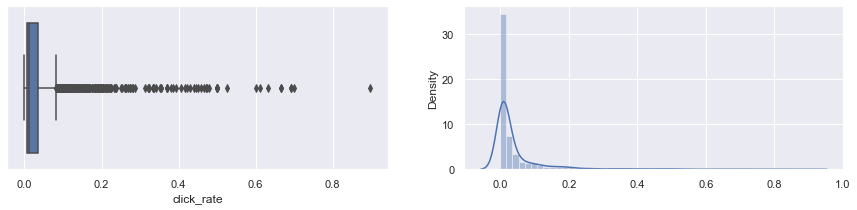

In [22]:
# Check distribution of Target Variable
# setup figure size
plt.subplots(figsize=(15,3))

# boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='click_rate', data=train);

# distplot
plt.subplot(1, 2, 2)
sns.distplot(x=train['click_rate']);

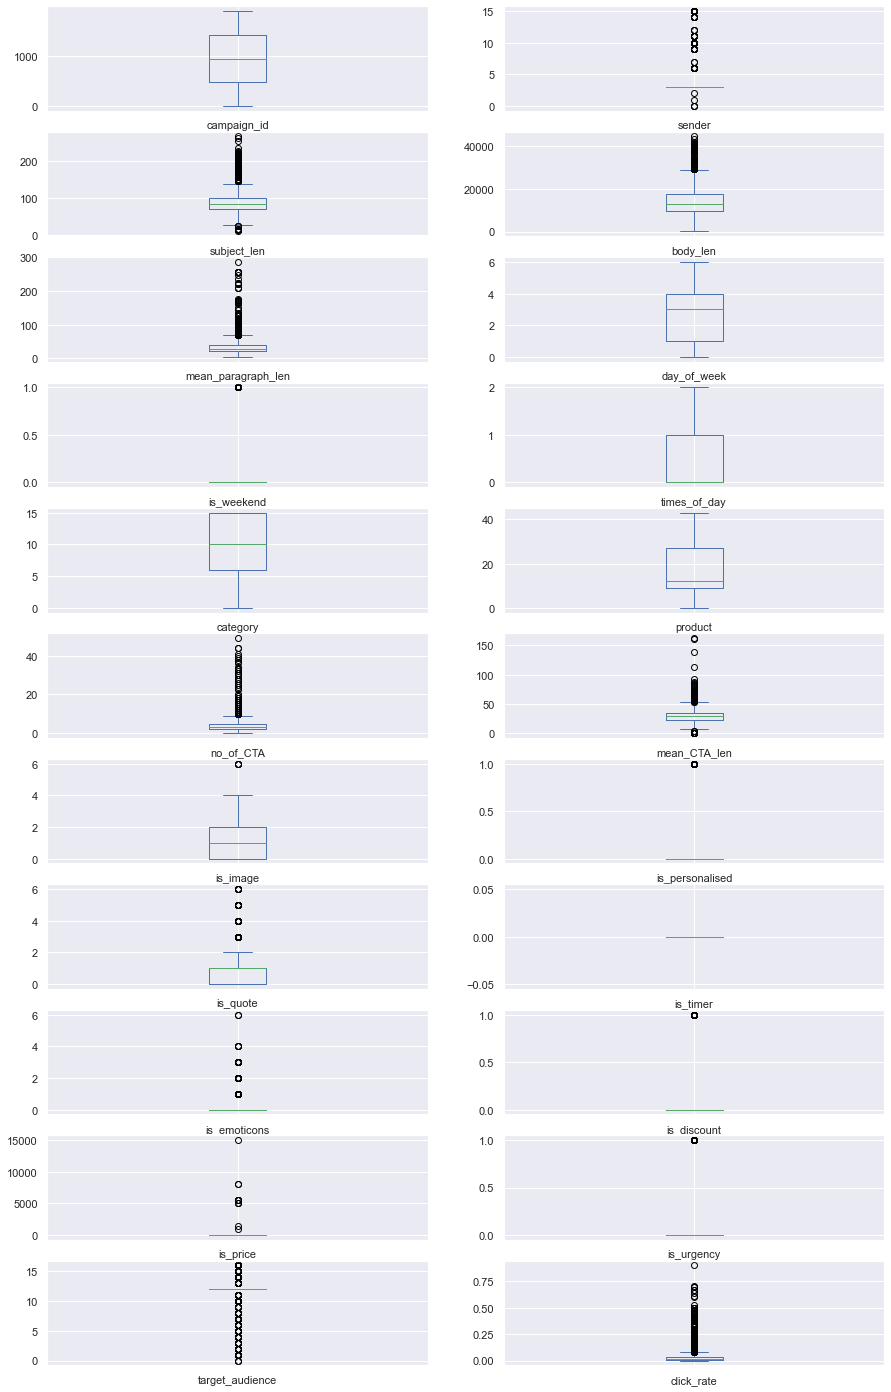

In [28]:
train.plot(kind="box",subplots=True,layout=(11,2),figsize=(15,25));

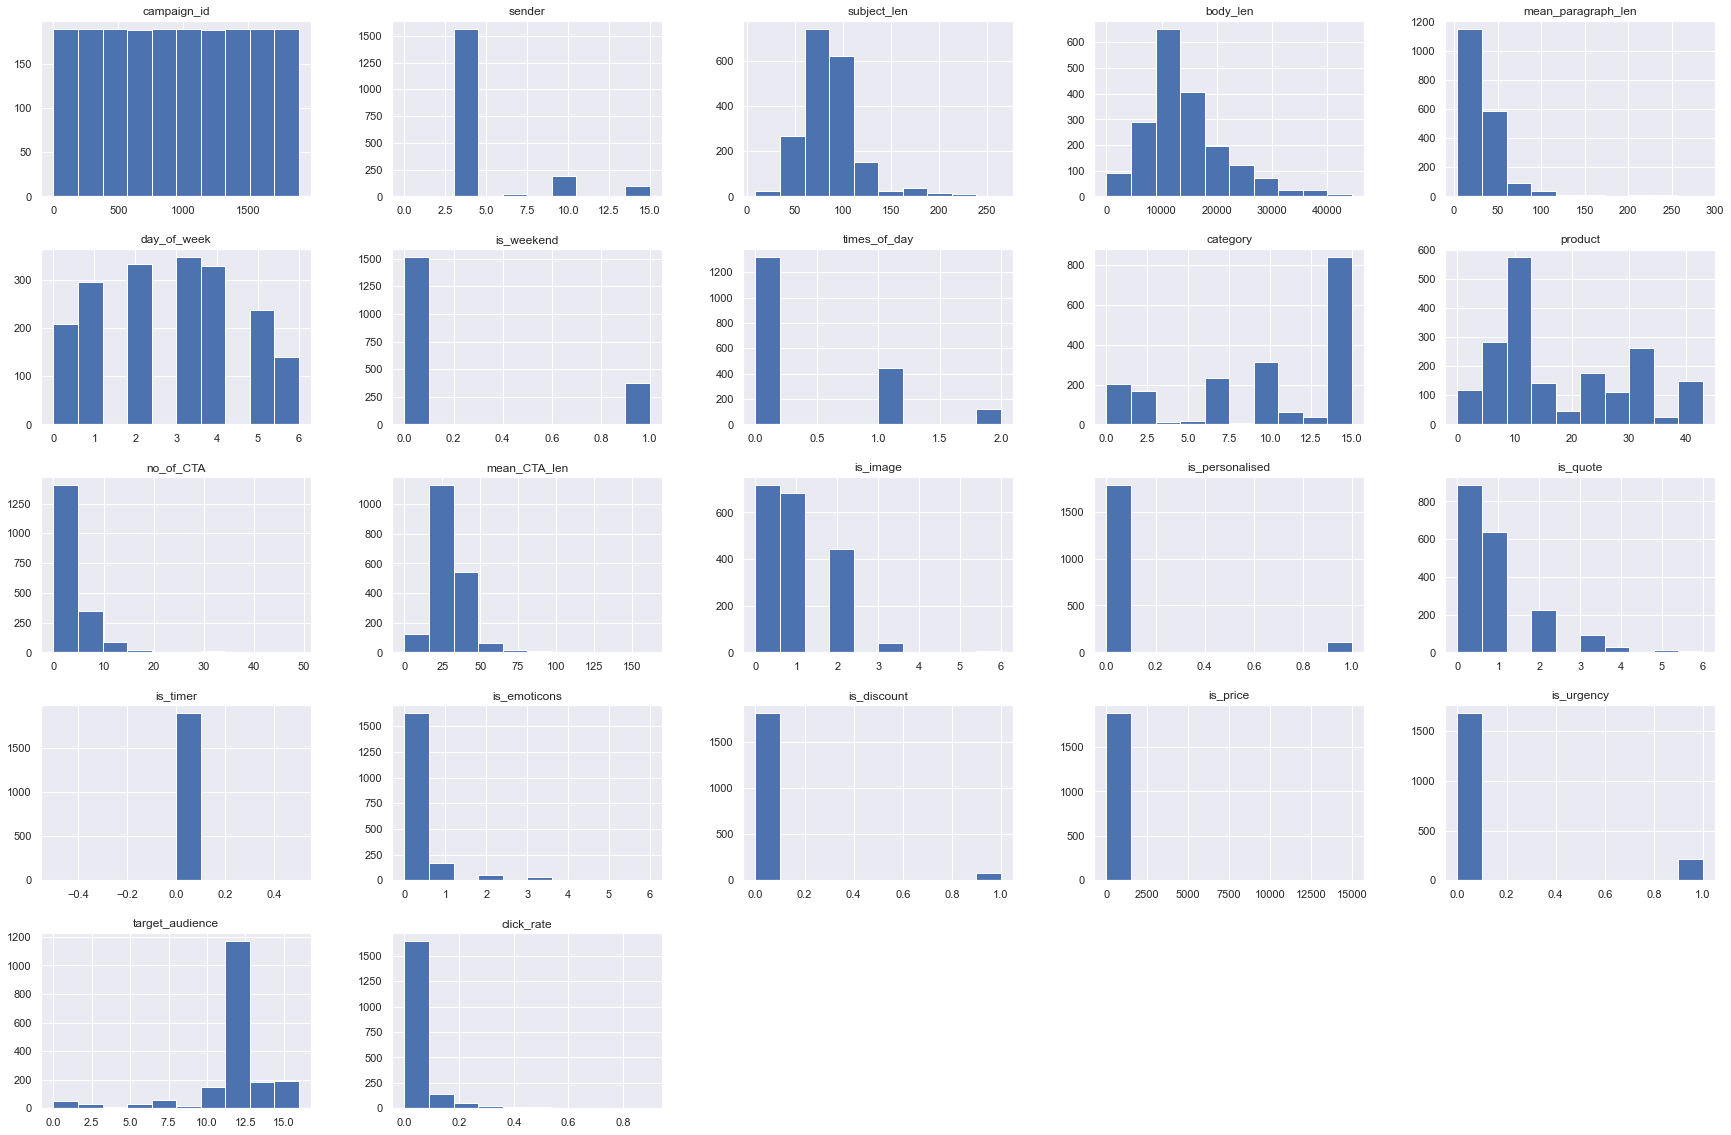

In [30]:
# Histogram to check for Data Distribution
train.hist(figsize=(30,20));

<AxesSubplot:>

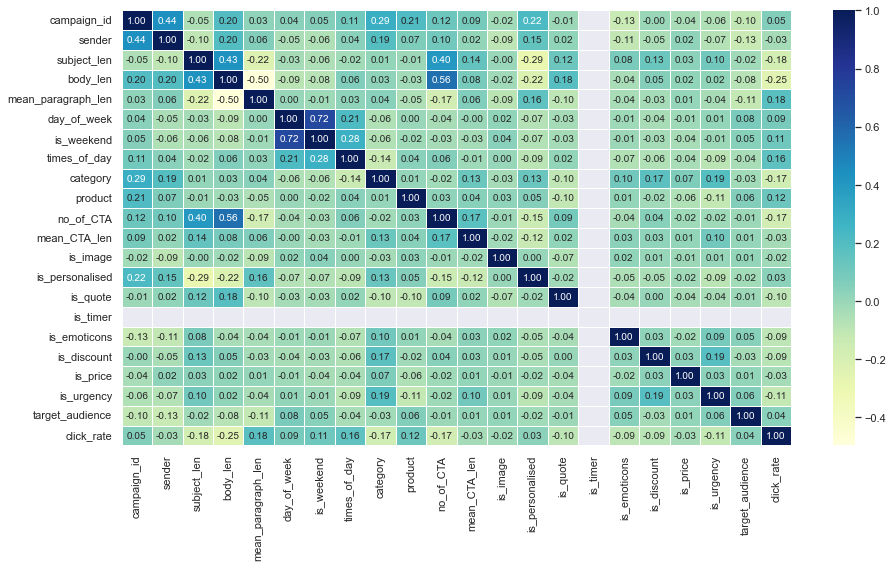

In [37]:
# Check the correlation
fig , ax = plt.subplots(figsize=(15,8))
sns.heatmap(train.corr(),annot = True,fmt='.2f',cmap='YlGnBu',linewidth=0.5)

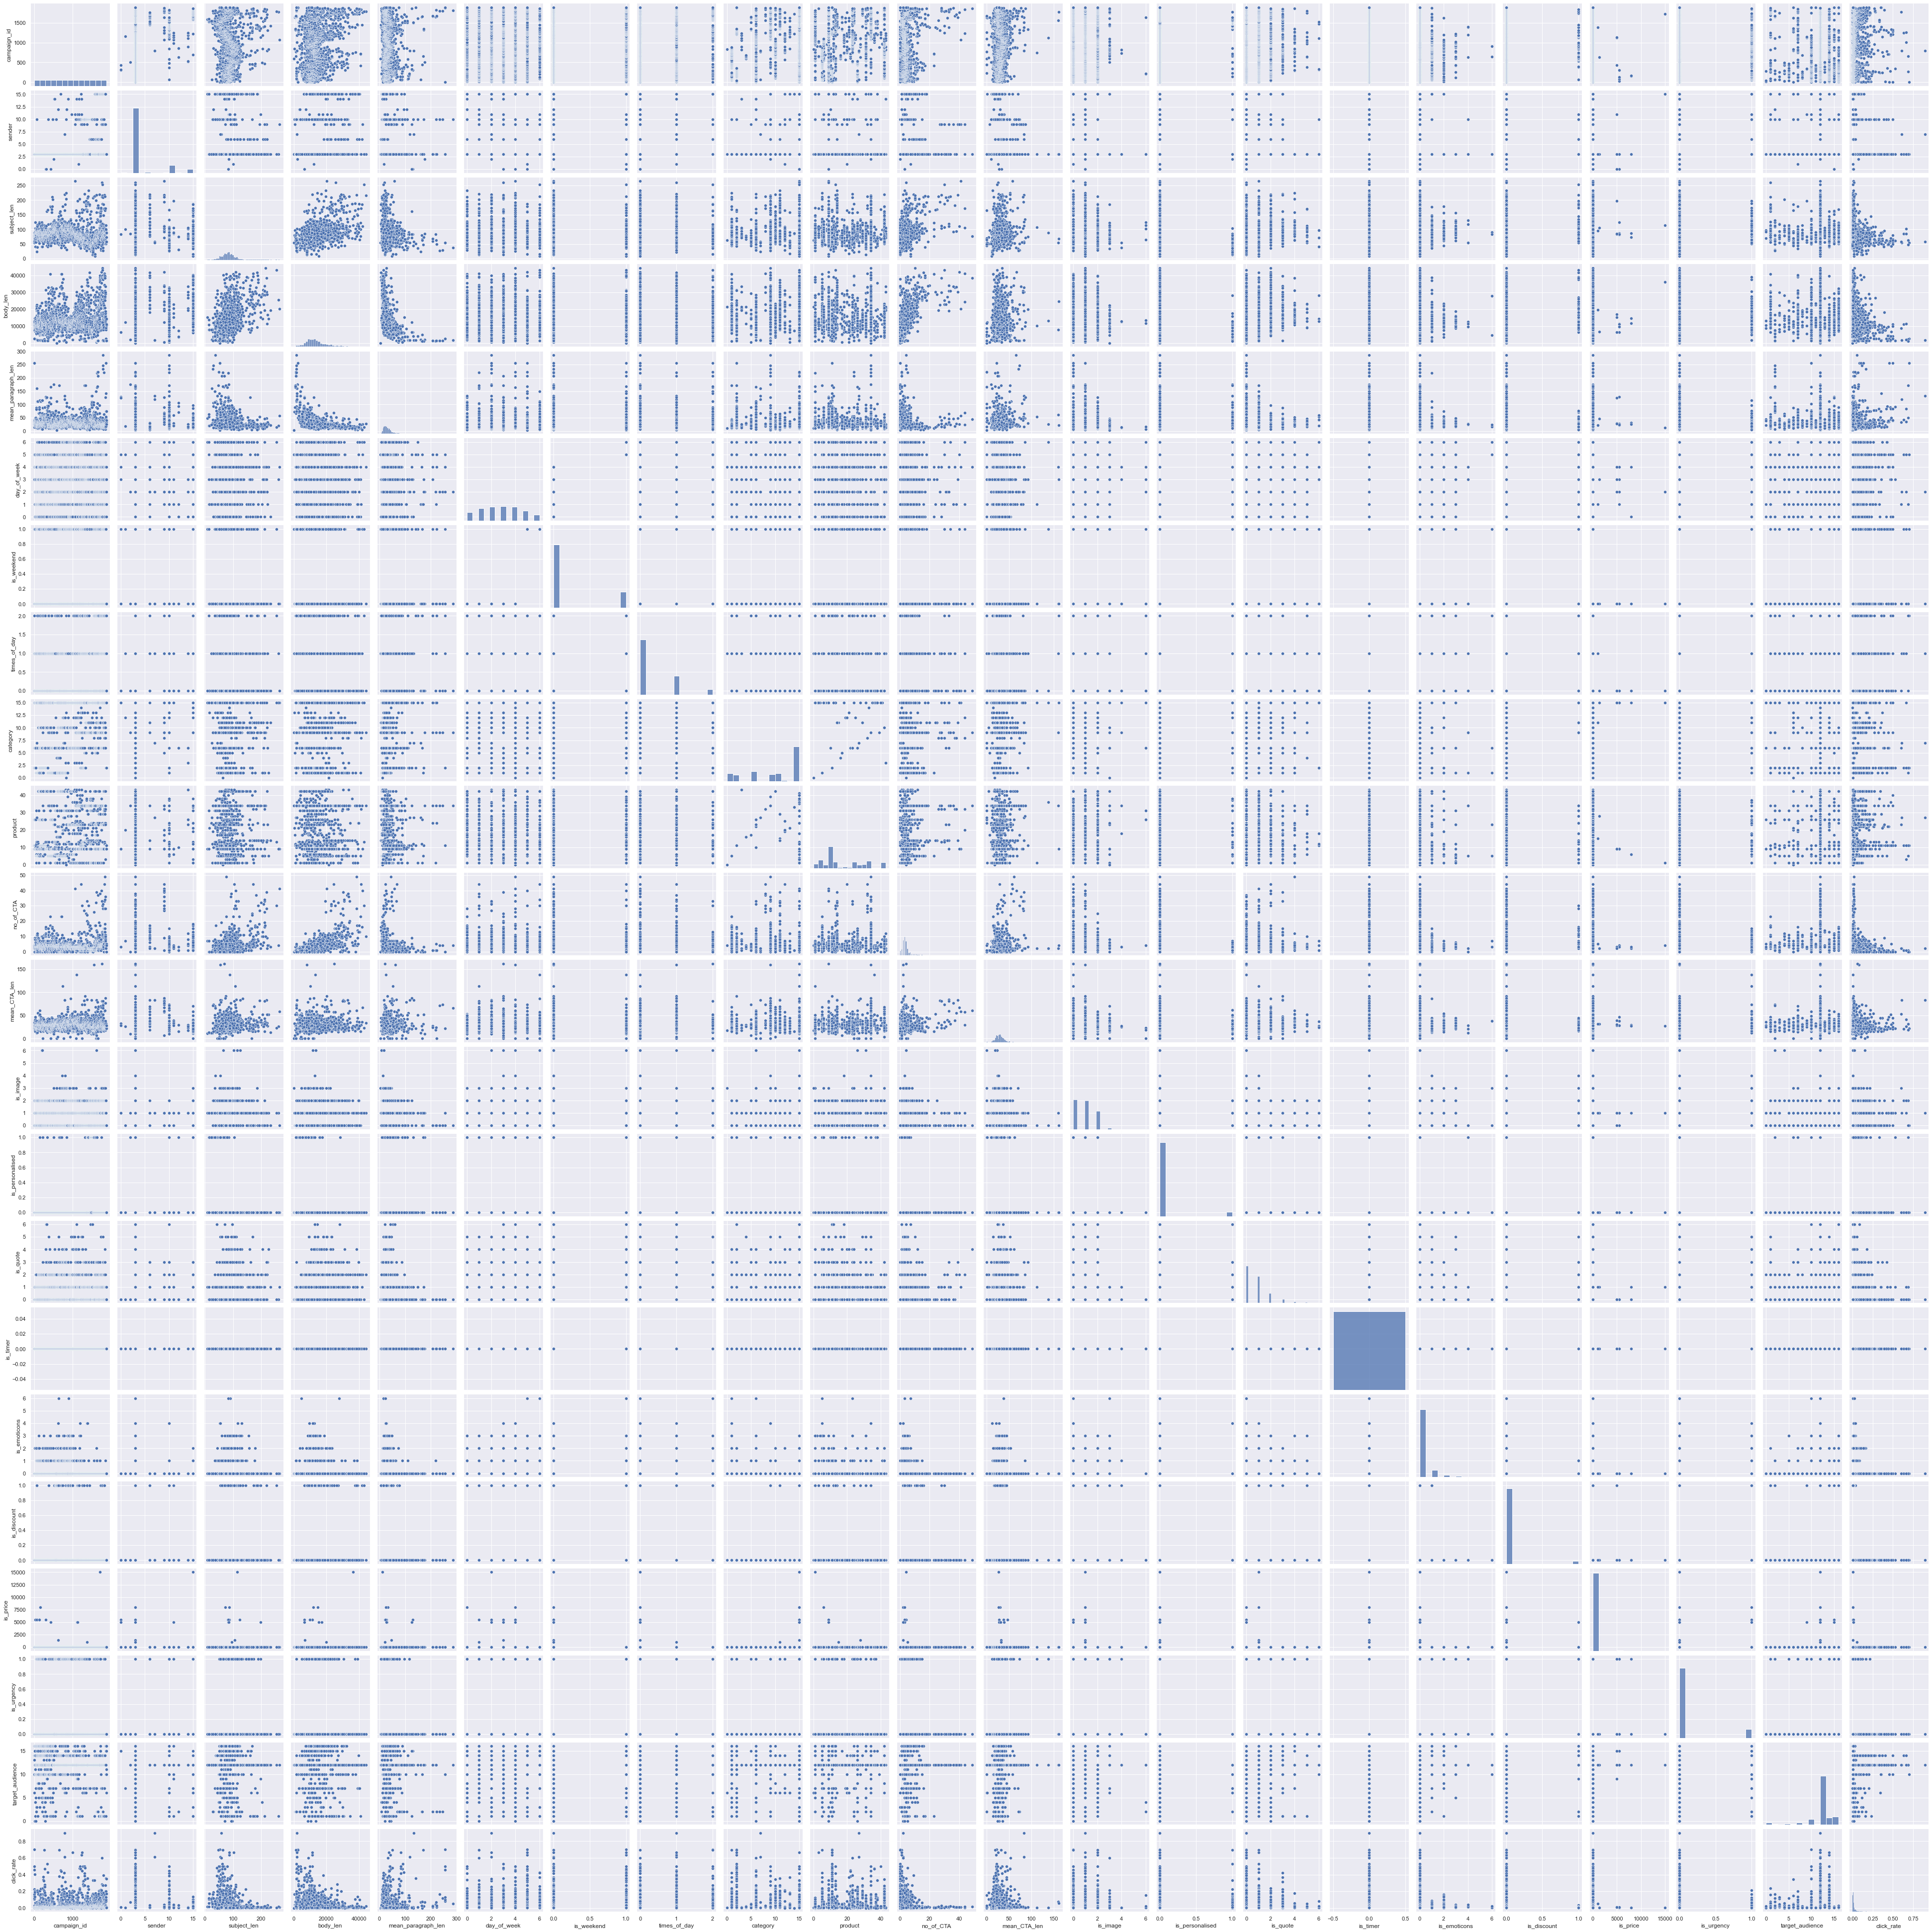

In [38]:
# Pair Plots to know the relation between different features
ax = sns.pairplot(train)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Train DataSet</h2>
</div>


In [39]:
train.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Test DataSet</h2>
</div>


In [40]:
test.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Drop Irrelevant Columns from Train and Test DataSet</h2>
</div>


In [41]:
train = train.drop(['campaign_id','is_timer'],axis=1)
print('-------------'*9)
test = test.drop(['campaign_id','is_timer'],axis=1)
print('-------------'*9)

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Datatypes in Train and Test DataSet</h2>
</div>


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sender              1888 non-null   int64  
 1   subject_len         1888 non-null   int64  
 2   body_len            1888 non-null   int64  
 3   mean_paragraph_len  1888 non-null   int64  
 4   day_of_week         1888 non-null   int64  
 5   is_weekend          1888 non-null   int64  
 6   times_of_day        1888 non-null   int64  
 7   category            1888 non-null   int64  
 8   product             1888 non-null   int64  
 9   no_of_CTA           1888 non-null   int64  
 10  mean_CTA_len        1888 non-null   int64  
 11  is_image            1888 non-null   int64  
 12  is_personalised     1888 non-null   int64  
 13  is_quote            1888 non-null   int64  
 14  is_emoticons        1888 non-null   int64  
 15  is_discount         1888 non-null   int64  
 16  is_pri

In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   sender              762 non-null    int64
 1   subject_len         762 non-null    int64
 2   body_len            762 non-null    int64
 3   mean_paragraph_len  762 non-null    int64
 4   day_of_week         762 non-null    int64
 5   is_weekend          762 non-null    int64
 6   times_of_day        762 non-null    int64
 7   category            762 non-null    int64
 8   product             762 non-null    int64
 9   no_of_CTA           762 non-null    int64
 10  mean_CTA_len        762 non-null    int64
 11  is_image            762 non-null    int64
 12  is_personalised     762 non-null    int64
 13  is_quote            762 non-null    int64
 14  is_emoticons        762 non-null    int64
 15  is_discount         762 non-null    int64
 16  is_price            762 non-null    int64
 1

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Preprocessing for Model Building</h2>
</div>


In [46]:
train_temp,test_temp=train_test_split(train,test_size=0.01,random_state=0)
print("Length of Original Data:-",len(train),"\nLength of Train Data:-",len(train_temp),"\nLength of Test Data:-",len(test_temp))

features=list(train.columns)
label='click_rate'

features.remove(label)

print('-------------'*9)
print("\nFEATURES ARE:-",features)

print('-------------'*9)
print("\nLABELS ARE:-",label)

print('-------------'*9)

# To check the data points in "Train" & "Test" datasets after split
X_train=train_temp[features]
y_train=train_temp[label]

X_test=test_temp[features]
y_test=test_temp[label]

Length of Original Data:- 1888 
Length of Train Data:- 1869 
Length of Test Data:- 19
---------------------------------------------------------------------------------------------------------------------

FEATURES ARE:- ['sender', 'subject_len', 'body_len', 'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day', 'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image', 'is_personalised', 'is_quote', 'is_emoticons', 'is_discount', 'is_price', 'is_urgency', 'target_audience']
---------------------------------------------------------------------------------------------------------------------

LABELS ARE:- click_rate
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 1- Linear Regression</h2>
</div>

In [54]:
model1 = LinearRegression()
model1.fit(X_train,y_train) 
print('Accuracy of Linear Regression on training set: {:.2f}'
     .format(model1.score(X_train, y_train)))

print('Accuracy of Linear Regression on test set: {:.2f}'
     .format(model1.score(X_test, y_test)))
print('-------------'*9)

Accuracy of Linear Regression on training set: 0.15
Accuracy of Linear Regression on test set: 0.26
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 2- Decision Tree Regressor</h2>
</div>

In [56]:
model2 = DecisionTreeRegressor()
model2.fit(X_train,y_train) 
print('Accuracy of Decision Tree Regressor on training set: {:.2f}'
     .format(model2.score(X_train, y_train)))

print('Accuracy of Decision Tree Regressor on test set: {:.2f}'
     .format(model2.score(X_test, y_test)))
print('-------------'*9)

Accuracy of Decision Tree Regressor on training set: 1.00
Accuracy of Decision Tree Regressor on test set: 0.54
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 3- Support Vector Regression</h2>
</div>

In [60]:
model3 = SVR(kernel = 'rbf')
model3.fit(X_train,y_train) 
print('Accuracy of Support Vector Regression on training set: {:.2f}'
     .format(model3.score(X_train, y_train)))

print('Accuracy of Support Vector Regression on test set: {:.2f}'
     .format(model3.score(X_test, y_test)))
print('-------------'*9)

Accuracy of Support Vector Regression on training set: -0.48
Accuracy of Support Vector Regression on test set: -0.40
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 4- Random Forest Regressor</h2>
</div>

In [71]:
model4 = RandomForestRegressor(random_state = 1211)
model4.fit(X_train,y_train) 
print('Accuracy of Random Forest Regressor on training set: {:.2f}'
     .format(model4.score(X_train, y_train)))

print('Accuracy of Random Forest Regressor on test set: {:.2f}'
     .format(model4.score(X_test, y_test)))
print('-------------'*9)

Accuracy of Random Forest Regressor on training set: 0.94
Accuracy of Random Forest Regressor on test set: 0.58
---------------------------------------------------------------------------------------------------------------------


#### * Hyper Parameter Tuning for Random Forest Regressor

In [75]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print('-------------'*9)
print(random_grid)
print('-------------'*9)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)
print('-------------'*9)
print(rf_random.best_params_)

---------------------------------------------------------------------------------------------------------------------
{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
---------------------------------------------------------------------------------------------------------------------
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------------------------------------------------------------------------------------------------------------
{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 5- Fitting Random Forest Regressor Model with best Hyperparameters generated by Random Search</h2>
</div>

In [76]:
model5 = RandomForestRegressor(random_state = 42, n_estimators= 400
                              , min_samples_split = 2, min_samples_leaf = 1
                              , max_features = 'sqrt', max_depth = None
                              ,bootstrap = False)
model5.fit(X_train,y_train) 
print('Accuracy of Random Forest Regressor on training set: {:.2f}'
     .format(model5.score(X_train, y_train)))

print('Accuracy of Random Forest Regressor on test set: {:.2f}'
     .format(model5.score(X_test, y_test)))
print('-------------'*9)

Accuracy of Random Forest Regressor on training set: 1.00
Accuracy of Random Forest Regressor on test set: 0.59
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 6- Cat Boost Regressor</h2>
</div>

In [80]:
model6 = CatBoostRegressor()
model6.fit(X_train,y_train) 
print('Accuracy of Cat Boost Regressor on training set: {:.2f}'
     .format(model6.score(X_train, y_train)))

print('Accuracy of Cat Boost Regressor on test set: {:.2f}'
     .format(model6.score(X_test, y_test)))
print('-------------'*9)

Learning rate set to 0.045195
0:	learn: 0.0832252	total: 3.34ms	remaining: 3.33s
1:	learn: 0.0823010	total: 6.61ms	remaining: 3.3s
2:	learn: 0.0814128	total: 10.1ms	remaining: 3.37s
3:	learn: 0.0805053	total: 13.4ms	remaining: 3.33s
4:	learn: 0.0795570	total: 16.5ms	remaining: 3.27s
5:	learn: 0.0788080	total: 18.9ms	remaining: 3.13s
6:	learn: 0.0781080	total: 21.3ms	remaining: 3.03s
7:	learn: 0.0773285	total: 23.5ms	remaining: 2.91s
8:	learn: 0.0766529	total: 25.6ms	remaining: 2.82s
9:	learn: 0.0760617	total: 27.5ms	remaining: 2.72s
10:	learn: 0.0753407	total: 29.4ms	remaining: 2.64s
11:	learn: 0.0747740	total: 31ms	remaining: 2.55s
12:	learn: 0.0741033	total: 32.3ms	remaining: 2.46s
13:	learn: 0.0735056	total: 33.7ms	remaining: 2.38s
14:	learn: 0.0728530	total: 35ms	remaining: 2.3s
15:	learn: 0.0723846	total: 36.3ms	remaining: 2.23s
16:	learn: 0.0718407	total: 37.6ms	remaining: 2.17s
17:	learn: 0.0713650	total: 39ms	remaining: 2.13s
18:	learn: 0.0709005	total: 40.6ms	remaining: 2.09s


234:	learn: 0.0421083	total: 316ms	remaining: 1.03s
235:	learn: 0.0420703	total: 317ms	remaining: 1.02s
236:	learn: 0.0420389	total: 318ms	remaining: 1.02s
237:	learn: 0.0420126	total: 319ms	remaining: 1.02s
238:	learn: 0.0419941	total: 320ms	remaining: 1.02s
239:	learn: 0.0418687	total: 321ms	remaining: 1.02s
240:	learn: 0.0418334	total: 323ms	remaining: 1.02s
241:	learn: 0.0417965	total: 324ms	remaining: 1.02s
242:	learn: 0.0417240	total: 326ms	remaining: 1.01s
243:	learn: 0.0416909	total: 327ms	remaining: 1.01s
244:	learn: 0.0415947	total: 328ms	remaining: 1.01s
245:	learn: 0.0415446	total: 330ms	remaining: 1.01s
246:	learn: 0.0414263	total: 331ms	remaining: 1.01s
247:	learn: 0.0413928	total: 332ms	remaining: 1.01s
248:	learn: 0.0413606	total: 334ms	remaining: 1.01s
249:	learn: 0.0412378	total: 335ms	remaining: 1s
250:	learn: 0.0412066	total: 336ms	remaining: 1s
251:	learn: 0.0411083	total: 339ms	remaining: 1s
252:	learn: 0.0410781	total: 340ms	remaining: 1s
253:	learn: 0.0409755	to

506:	learn: 0.0301534	total: 651ms	remaining: 633ms
507:	learn: 0.0301373	total: 652ms	remaining: 632ms
508:	learn: 0.0301005	total: 654ms	remaining: 631ms
509:	learn: 0.0300526	total: 655ms	remaining: 629ms
510:	learn: 0.0300293	total: 656ms	remaining: 628ms
511:	learn: 0.0299900	total: 657ms	remaining: 627ms
512:	learn: 0.0299744	total: 659ms	remaining: 625ms
513:	learn: 0.0299513	total: 660ms	remaining: 624ms
514:	learn: 0.0299267	total: 661ms	remaining: 623ms
515:	learn: 0.0299061	total: 662ms	remaining: 621ms
516:	learn: 0.0298757	total: 664ms	remaining: 620ms
517:	learn: 0.0298233	total: 665ms	remaining: 619ms
518:	learn: 0.0297985	total: 667ms	remaining: 618ms
519:	learn: 0.0297709	total: 668ms	remaining: 617ms
520:	learn: 0.0297428	total: 669ms	remaining: 615ms
521:	learn: 0.0297352	total: 670ms	remaining: 614ms
522:	learn: 0.0297151	total: 672ms	remaining: 613ms
523:	learn: 0.0296525	total: 673ms	remaining: 611ms
524:	learn: 0.0296277	total: 674ms	remaining: 610ms
525:	learn: 

745:	learn: 0.0249671	total: 977ms	remaining: 333ms
746:	learn: 0.0249594	total: 979ms	remaining: 332ms
747:	learn: 0.0249416	total: 982ms	remaining: 331ms
748:	learn: 0.0249103	total: 984ms	remaining: 330ms
749:	learn: 0.0248679	total: 986ms	remaining: 329ms
750:	learn: 0.0248582	total: 991ms	remaining: 329ms
751:	learn: 0.0248408	total: 994ms	remaining: 328ms
752:	learn: 0.0248114	total: 996ms	remaining: 327ms
753:	learn: 0.0247956	total: 998ms	remaining: 326ms
754:	learn: 0.0247777	total: 1s	remaining: 325ms
755:	learn: 0.0247739	total: 1s	remaining: 323ms
756:	learn: 0.0247575	total: 1s	remaining: 322ms
757:	learn: 0.0247074	total: 1.01s	remaining: 321ms
758:	learn: 0.0246767	total: 1.01s	remaining: 320ms
759:	learn: 0.0246706	total: 1.01s	remaining: 319ms
760:	learn: 0.0246467	total: 1.01s	remaining: 318ms
761:	learn: 0.0246380	total: 1.01s	remaining: 317ms
762:	learn: 0.0246182	total: 1.02s	remaining: 316ms
763:	learn: 0.0246107	total: 1.02s	remaining: 315ms
764:	learn: 0.0245969

937:	learn: 0.0217703	total: 1.29s	remaining: 85.6ms
938:	learn: 0.0217466	total: 1.3s	remaining: 84.2ms
939:	learn: 0.0217290	total: 1.3s	remaining: 82.8ms
940:	learn: 0.0217087	total: 1.3s	remaining: 81.4ms
941:	learn: 0.0217037	total: 1.3s	remaining: 80.1ms
942:	learn: 0.0216944	total: 1.3s	remaining: 78.7ms
943:	learn: 0.0216885	total: 1.3s	remaining: 77.3ms
944:	learn: 0.0216814	total: 1.3s	remaining: 75.9ms
945:	learn: 0.0216798	total: 1.3s	remaining: 74.5ms
946:	learn: 0.0216722	total: 1.31s	remaining: 73.1ms
947:	learn: 0.0216666	total: 1.31s	remaining: 71.7ms
948:	learn: 0.0216618	total: 1.31s	remaining: 70.3ms
949:	learn: 0.0216480	total: 1.32s	remaining: 69.4ms
950:	learn: 0.0216327	total: 1.32s	remaining: 68.2ms
951:	learn: 0.0216087	total: 1.33s	remaining: 66.9ms
952:	learn: 0.0216028	total: 1.33s	remaining: 65.7ms
953:	learn: 0.0215816	total: 1.33s	remaining: 64.4ms
954:	learn: 0.0215690	total: 1.34s	remaining: 63.1ms
955:	learn: 0.0215544	total: 1.34s	remaining: 61.8ms
9

#### * Hyper Parameter Tuning for Cat Boost Regressor

In [82]:
model = cb.CatBoostRegressor()
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
gscv = GridSearchCV (estimator = model, param_grid = grid, scoring ='accuracy', cv = 5)
gscv.fit(X_train,y_train)

#returns the estimator with the best performance
print(gscv.best_estimator_)

#returns the best score
print(gscv.best_score_)

#returns the best parameters
print(gscv.best_params_)

0:	learn: 0.0829480	total: 18.7ms	remaining: 1.85s
1:	learn: 0.0825546	total: 23.2ms	remaining: 1.14s
2:	learn: 0.0822396	total: 23.8ms	remaining: 771ms
3:	learn: 0.0819019	total: 24.4ms	remaining: 585ms
4:	learn: 0.0815102	total: 24.9ms	remaining: 472ms
5:	learn: 0.0811641	total: 25.3ms	remaining: 397ms
6:	learn: 0.0808102	total: 25.8ms	remaining: 343ms
7:	learn: 0.0805434	total: 26.3ms	remaining: 303ms
8:	learn: 0.0801910	total: 26.8ms	remaining: 271ms
9:	learn: 0.0799192	total: 27.3ms	remaining: 246ms
10:	learn: 0.0796193	total: 27.8ms	remaining: 225ms
11:	learn: 0.0793064	total: 28.3ms	remaining: 207ms
12:	learn: 0.0790340	total: 28.9ms	remaining: 193ms
13:	learn: 0.0788612	total: 29.5ms	remaining: 181ms
14:	learn: 0.0786109	total: 29.9ms	remaining: 170ms
15:	learn: 0.0784425	total: 30.4ms	remaining: 160ms
16:	learn: 0.0781509	total: 31.1ms	remaining: 152ms
17:	learn: 0.0779105	total: 31.7ms	remaining: 144ms
18:	learn: 0.0776723	total: 32.4ms	remaining: 138ms
19:	learn: 0.0773952	t

88:	learn: 0.0690672	total: 48.8ms	remaining: 6.03ms
89:	learn: 0.0689899	total: 49.4ms	remaining: 5.49ms
90:	learn: 0.0689448	total: 50ms	remaining: 4.94ms
91:	learn: 0.0688975	total: 50.5ms	remaining: 4.39ms
92:	learn: 0.0687647	total: 51ms	remaining: 3.84ms
93:	learn: 0.0686792	total: 51.5ms	remaining: 3.28ms
94:	learn: 0.0686267	total: 52.1ms	remaining: 2.74ms
95:	learn: 0.0685743	total: 52.9ms	remaining: 2.2ms
96:	learn: 0.0684533	total: 53.7ms	remaining: 1.66ms
97:	learn: 0.0684058	total: 54.2ms	remaining: 1.11ms
98:	learn: 0.0683322	total: 54.7ms	remaining: 552us
99:	learn: 0.0682868	total: 55.2ms	remaining: 0us
0:	learn: 0.0833784	total: 6.23ms	remaining: 617ms
1:	learn: 0.0829044	total: 6.89ms	remaining: 337ms
2:	learn: 0.0825651	total: 7.95ms	remaining: 257ms
3:	learn: 0.0820853	total: 8.58ms	remaining: 206ms
4:	learn: 0.0816301	total: 9.02ms	remaining: 171ms
5:	learn: 0.0811964	total: 9.44ms	remaining: 148ms
6:	learn: 0.0808452	total: 9.82ms	remaining: 130ms
7:	learn: 0.0805

0:	learn: 0.0820193	total: 9.29ms	remaining: 919ms
1:	learn: 0.0808165	total: 13ms	remaining: 635ms
2:	learn: 0.0799650	total: 15.4ms	remaining: 499ms
3:	learn: 0.0790803	total: 17.7ms	remaining: 424ms
4:	learn: 0.0779814	total: 19.9ms	remaining: 378ms
5:	learn: 0.0771113	total: 22ms	remaining: 345ms
6:	learn: 0.0763689	total: 24.4ms	remaining: 324ms
7:	learn: 0.0758564	total: 26ms	remaining: 299ms
8:	learn: 0.0751181	total: 27.9ms	remaining: 282ms
9:	learn: 0.0747115	total: 29.3ms	remaining: 264ms
10:	learn: 0.0741373	total: 30.9ms	remaining: 250ms
11:	learn: 0.0737772	total: 32.8ms	remaining: 240ms
12:	learn: 0.0733214	total: 34.5ms	remaining: 231ms
13:	learn: 0.0731085	total: 36.2ms	remaining: 222ms
14:	learn: 0.0726475	total: 37.8ms	remaining: 214ms
15:	learn: 0.0722855	total: 39.4ms	remaining: 207ms
16:	learn: 0.0717627	total: 41ms	remaining: 200ms
17:	learn: 0.0715102	total: 42.4ms	remaining: 193ms
18:	learn: 0.0713153	total: 44.3ms	remaining: 189ms
19:	learn: 0.0708758	total: 45

21:	learn: 0.0697335	total: 64.9ms	remaining: 230ms
22:	learn: 0.0695296	total: 66.5ms	remaining: 223ms
23:	learn: 0.0693480	total: 68.2ms	remaining: 216ms
24:	learn: 0.0691662	total: 69.8ms	remaining: 209ms
25:	learn: 0.0689695	total: 71.4ms	remaining: 203ms
26:	learn: 0.0688281	total: 73ms	remaining: 197ms
27:	learn: 0.0685636	total: 74.6ms	remaining: 192ms
28:	learn: 0.0684708	total: 76.2ms	remaining: 186ms
29:	learn: 0.0682908	total: 77.6ms	remaining: 181ms
30:	learn: 0.0681645	total: 79.3ms	remaining: 176ms
31:	learn: 0.0679915	total: 81ms	remaining: 172ms
32:	learn: 0.0678515	total: 82.6ms	remaining: 168ms
33:	learn: 0.0674341	total: 84.2ms	remaining: 163ms
34:	learn: 0.0673016	total: 85.8ms	remaining: 159ms
35:	learn: 0.0672339	total: 87.2ms	remaining: 155ms
36:	learn: 0.0670016	total: 88.8ms	remaining: 151ms
37:	learn: 0.0668650	total: 90.3ms	remaining: 147ms
38:	learn: 0.0667359	total: 92.2ms	remaining: 144ms
39:	learn: 0.0666570	total: 93.8ms	remaining: 141ms
40:	learn: 0.066

1:	learn: 0.0818969	total: 3.8ms	remaining: 186ms
2:	learn: 0.0808896	total: 5.24ms	remaining: 169ms
3:	learn: 0.0798226	total: 6.27ms	remaining: 150ms
4:	learn: 0.0788847	total: 7.81ms	remaining: 148ms
5:	learn: 0.0779493	total: 9.52ms	remaining: 149ms
6:	learn: 0.0773398	total: 10.7ms	remaining: 142ms
7:	learn: 0.0766853	total: 12.2ms	remaining: 140ms
8:	learn: 0.0761552	total: 13.4ms	remaining: 135ms
9:	learn: 0.0754217	total: 14.6ms	remaining: 131ms
10:	learn: 0.0749082	total: 16.2ms	remaining: 131ms
11:	learn: 0.0744820	total: 17ms	remaining: 125ms
12:	learn: 0.0740676	total: 17.6ms	remaining: 118ms
13:	learn: 0.0736258	total: 18.6ms	remaining: 114ms
14:	learn: 0.0733765	total: 19.4ms	remaining: 110ms
15:	learn: 0.0731269	total: 20.3ms	remaining: 106ms
16:	learn: 0.0727370	total: 21.1ms	remaining: 103ms
17:	learn: 0.0724081	total: 22.2ms	remaining: 101ms
18:	learn: 0.0721691	total: 23.2ms	remaining: 99.1ms
19:	learn: 0.0719431	total: 24.8ms	remaining: 99.2ms
20:	learn: 0.0717320	t

4:	learn: 0.0830383	total: 24.4ms	remaining: 464ms
5:	learn: 0.0826723	total: 26.1ms	remaining: 409ms
6:	learn: 0.0822684	total: 28.3ms	remaining: 376ms
7:	learn: 0.0818612	total: 30.1ms	remaining: 346ms
8:	learn: 0.0815714	total: 31.8ms	remaining: 322ms
9:	learn: 0.0812012	total: 33.5ms	remaining: 302ms
10:	learn: 0.0808800	total: 35.1ms	remaining: 284ms
11:	learn: 0.0805921	total: 36.8ms	remaining: 270ms
12:	learn: 0.0803148	total: 38.5ms	remaining: 258ms
13:	learn: 0.0801098	total: 40.3ms	remaining: 247ms
14:	learn: 0.0798068	total: 42ms	remaining: 238ms
15:	learn: 0.0796025	total: 43.7ms	remaining: 229ms
16:	learn: 0.0793433	total: 45.4ms	remaining: 222ms
17:	learn: 0.0790791	total: 47.2ms	remaining: 215ms
18:	learn: 0.0787986	total: 48.9ms	remaining: 208ms
19:	learn: 0.0785682	total: 50.5ms	remaining: 202ms
20:	learn: 0.0783699	total: 52.4ms	remaining: 197ms
21:	learn: 0.0781483	total: 54.1ms	remaining: 192ms
22:	learn: 0.0779442	total: 56.1ms	remaining: 188ms
23:	learn: 0.0776691

17:	learn: 0.0775366	total: 26.4ms	remaining: 120ms
18:	learn: 0.0772893	total: 28.1ms	remaining: 120ms
19:	learn: 0.0770087	total: 29.5ms	remaining: 118ms
20:	learn: 0.0767244	total: 31ms	remaining: 117ms
21:	learn: 0.0764827	total: 32.1ms	remaining: 114ms
22:	learn: 0.0762511	total: 33.6ms	remaining: 112ms
23:	learn: 0.0760233	total: 34.9ms	remaining: 111ms
24:	learn: 0.0758870	total: 36.4ms	remaining: 109ms
25:	learn: 0.0756704	total: 37.8ms	remaining: 108ms
26:	learn: 0.0754697	total: 39.2ms	remaining: 106ms
27:	learn: 0.0752505	total: 40.7ms	remaining: 105ms
28:	learn: 0.0750517	total: 42.2ms	remaining: 103ms
29:	learn: 0.0748952	total: 43.6ms	remaining: 102ms
30:	learn: 0.0746848	total: 45ms	remaining: 100ms
31:	learn: 0.0745303	total: 46.4ms	remaining: 98.6ms
32:	learn: 0.0744214	total: 47.9ms	remaining: 97.2ms
33:	learn: 0.0742136	total: 49.2ms	remaining: 95.6ms
34:	learn: 0.0740489	total: 50.6ms	remaining: 94ms
35:	learn: 0.0738843	total: 51.7ms	remaining: 92ms
36:	learn: 0.07

84:	learn: 0.0707126	total: 160ms	remaining: 28.2ms
85:	learn: 0.0706499	total: 161ms	remaining: 26.3ms
86:	learn: 0.0706183	total: 163ms	remaining: 24.3ms
87:	learn: 0.0705558	total: 165ms	remaining: 22.5ms
88:	learn: 0.0704952	total: 166ms	remaining: 20.5ms
89:	learn: 0.0704547	total: 167ms	remaining: 18.6ms
90:	learn: 0.0704101	total: 168ms	remaining: 16.7ms
91:	learn: 0.0703554	total: 169ms	remaining: 14.7ms
92:	learn: 0.0702738	total: 170ms	remaining: 12.8ms
93:	learn: 0.0702050	total: 171ms	remaining: 10.9ms
94:	learn: 0.0701562	total: 172ms	remaining: 9.06ms
95:	learn: 0.0701071	total: 173ms	remaining: 7.21ms
96:	learn: 0.0699973	total: 174ms	remaining: 5.38ms
97:	learn: 0.0699331	total: 175ms	remaining: 3.56ms
98:	learn: 0.0698805	total: 175ms	remaining: 1.77ms
99:	learn: 0.0698320	total: 176ms	remaining: 0us
0:	learn: 0.0820319	total: 26.9ms	remaining: 2.66s
1:	learn: 0.0808415	total: 27.9ms	remaining: 1.36s
2:	learn: 0.0799914	total: 28.6ms	remaining: 926ms
3:	learn: 0.079108

39:	learn: 0.0669421	total: 20.4ms	remaining: 30.5ms
40:	learn: 0.0668477	total: 21.4ms	remaining: 30.7ms
41:	learn: 0.0667627	total: 22ms	remaining: 30.4ms
42:	learn: 0.0665091	total: 22.7ms	remaining: 30.1ms
43:	learn: 0.0663574	total: 23.3ms	remaining: 29.7ms
44:	learn: 0.0661449	total: 23.7ms	remaining: 29ms
45:	learn: 0.0659119	total: 24.2ms	remaining: 28.4ms
46:	learn: 0.0658538	total: 24.6ms	remaining: 27.7ms
47:	learn: 0.0657937	total: 25ms	remaining: 27.1ms
48:	learn: 0.0655946	total: 25.5ms	remaining: 26.5ms
49:	learn: 0.0655100	total: 25.9ms	remaining: 25.9ms
50:	learn: 0.0654700	total: 26.4ms	remaining: 25.4ms
51:	learn: 0.0653742	total: 26.9ms	remaining: 24.9ms
52:	learn: 0.0652843	total: 27.5ms	remaining: 24.4ms
53:	learn: 0.0651108	total: 27.9ms	remaining: 23.8ms
54:	learn: 0.0650218	total: 28.4ms	remaining: 23.3ms
55:	learn: 0.0648692	total: 28.9ms	remaining: 22.7ms
56:	learn: 0.0646418	total: 29.3ms	remaining: 22.1ms
57:	learn: 0.0645215	total: 29.7ms	remaining: 21.5ms

0:	learn: 0.0833062	total: 13.4ms	remaining: 1.33s
1:	learn: 0.0819102	total: 15.7ms	remaining: 771ms
2:	learn: 0.0809035	total: 17.6ms	remaining: 569ms
3:	learn: 0.0798393	total: 19.4ms	remaining: 465ms
4:	learn: 0.0789071	total: 21.4ms	remaining: 406ms
5:	learn: 0.0779765	total: 23.4ms	remaining: 366ms
6:	learn: 0.0773663	total: 25.1ms	remaining: 334ms
7:	learn: 0.0767138	total: 27.1ms	remaining: 311ms
8:	learn: 0.0762002	total: 29ms	remaining: 293ms
9:	learn: 0.0754719	total: 31ms	remaining: 279ms
10:	learn: 0.0749604	total: 33ms	remaining: 267ms
11:	learn: 0.0745336	total: 34.8ms	remaining: 255ms
12:	learn: 0.0741188	total: 36.8ms	remaining: 246ms
13:	learn: 0.0736960	total: 38.7ms	remaining: 238ms
14:	learn: 0.0734593	total: 40.6ms	remaining: 230ms
15:	learn: 0.0732324	total: 42.3ms	remaining: 222ms
16:	learn: 0.0728413	total: 44.1ms	remaining: 215ms
17:	learn: 0.0724915	total: 45.9ms	remaining: 209ms
18:	learn: 0.0722495	total: 47.6ms	remaining: 203ms
19:	learn: 0.0720214	total: 

1:	learn: 0.0842332	total: 11.8ms	remaining: 579ms
2:	learn: 0.0838824	total: 13.5ms	remaining: 437ms
3:	learn: 0.0834601	total: 15.4ms	remaining: 370ms
4:	learn: 0.0830810	total: 17ms	remaining: 323ms
5:	learn: 0.0827207	total: 18.8ms	remaining: 294ms
6:	learn: 0.0823202	total: 20.2ms	remaining: 269ms
7:	learn: 0.0820029	total: 22ms	remaining: 253ms
8:	learn: 0.0816878	total: 23.6ms	remaining: 239ms
9:	learn: 0.0813299	total: 25.1ms	remaining: 226ms
10:	learn: 0.0810222	total: 26.4ms	remaining: 213ms
11:	learn: 0.0807322	total: 27.9ms	remaining: 204ms
12:	learn: 0.0804686	total: 29.3ms	remaining: 196ms
13:	learn: 0.0802613	total: 30.9ms	remaining: 190ms
14:	learn: 0.0799549	total: 32.5ms	remaining: 184ms
15:	learn: 0.0796621	total: 34.2ms	remaining: 179ms
16:	learn: 0.0794574	total: 35.7ms	remaining: 174ms
17:	learn: 0.0791803	total: 37.1ms	remaining: 169ms
18:	learn: 0.0789083	total: 38.4ms	remaining: 164ms
19:	learn: 0.0787044	total: 39.7ms	remaining: 159ms
20:	learn: 0.0785057	tota

1:	learn: 0.0829258	total: 8.71ms	remaining: 427ms
2:	learn: 0.0825888	total: 11ms	remaining: 357ms
3:	learn: 0.0821186	total: 12.9ms	remaining: 309ms
4:	learn: 0.0816717	total: 14.4ms	remaining: 273ms
5:	learn: 0.0812460	total: 15.8ms	remaining: 248ms
6:	learn: 0.0808977	total: 17.5ms	remaining: 232ms
7:	learn: 0.0805913	total: 19ms	remaining: 219ms
8:	learn: 0.0802295	total: 20.5ms	remaining: 207ms
9:	learn: 0.0798780	total: 21.9ms	remaining: 197ms
10:	learn: 0.0795460	total: 23.5ms	remaining: 190ms
11:	learn: 0.0792404	total: 25.1ms	remaining: 184ms
12:	learn: 0.0789310	total: 26.5ms	remaining: 177ms
13:	learn: 0.0786516	total: 28ms	remaining: 172ms
14:	learn: 0.0783708	total: 29.4ms	remaining: 166ms
15:	learn: 0.0781517	total: 30.8ms	remaining: 162ms
16:	learn: 0.0778917	total: 32.4ms	remaining: 158ms
17:	learn: 0.0776924	total: 33.9ms	remaining: 155ms
18:	learn: 0.0774481	total: 35.6ms	remaining: 152ms
19:	learn: 0.0771876	total: 37.1ms	remaining: 149ms
20:	learn: 0.0769035	total:

92:	learn: 0.0613576	total: 70.3ms	remaining: 5.29ms
93:	learn: 0.0612817	total: 70.9ms	remaining: 4.53ms
94:	learn: 0.0612151	total: 71.5ms	remaining: 3.76ms
95:	learn: 0.0611442	total: 72ms	remaining: 3ms
96:	learn: 0.0610470	total: 72.5ms	remaining: 2.24ms
97:	learn: 0.0609180	total: 73.2ms	remaining: 1.49ms
98:	learn: 0.0608352	total: 73.7ms	remaining: 744us
99:	learn: 0.0607628	total: 74.1ms	remaining: 0us
0:	learn: 0.0835898	total: 14.7ms	remaining: 1.46s
1:	learn: 0.0822458	total: 16.7ms	remaining: 820ms
2:	learn: 0.0812232	total: 18.7ms	remaining: 605ms
3:	learn: 0.0803436	total: 20.7ms	remaining: 496ms
4:	learn: 0.0793858	total: 23ms	remaining: 436ms
5:	learn: 0.0784332	total: 25.7ms	remaining: 403ms
6:	learn: 0.0776696	total: 27.9ms	remaining: 370ms
7:	learn: 0.0768388	total: 29.8ms	remaining: 343ms
8:	learn: 0.0763619	total: 31.8ms	remaining: 321ms
9:	learn: 0.0757099	total: 33.8ms	remaining: 304ms
10:	learn: 0.0750910	total: 35.9ms	remaining: 290ms
11:	learn: 0.0746996	tota

99:	learn: 0.0603134	total: 159ms	remaining: 0us
0:	learn: 0.0822583	total: 7.24ms	remaining: 717ms
1:	learn: 0.0809397	total: 8.44ms	remaining: 414ms
2:	learn: 0.0800758	total: 9.55ms	remaining: 309ms
3:	learn: 0.0791556	total: 10.7ms	remaining: 257ms
4:	learn: 0.0780512	total: 11.5ms	remaining: 218ms
5:	learn: 0.0772389	total: 12.3ms	remaining: 192ms
6:	learn: 0.0762820	total: 13.4ms	remaining: 178ms
7:	learn: 0.0755426	total: 15.2ms	remaining: 174ms
8:	learn: 0.0748940	total: 16.2ms	remaining: 164ms
9:	learn: 0.0743971	total: 17.2ms	remaining: 155ms
10:	learn: 0.0737924	total: 18.1ms	remaining: 147ms
11:	learn: 0.0733490	total: 19.1ms	remaining: 140ms
12:	learn: 0.0729359	total: 20.1ms	remaining: 134ms
13:	learn: 0.0724527	total: 20.9ms	remaining: 128ms
14:	learn: 0.0721122	total: 21.6ms	remaining: 123ms
15:	learn: 0.0719016	total: 22.3ms	remaining: 117ms
16:	learn: 0.0715345	total: 23ms	remaining: 112ms
17:	learn: 0.0712109	total: 23.8ms	remaining: 108ms
18:	learn: 0.0709755	total:

1:	learn: 0.0826208	total: 13.7ms	remaining: 672ms
2:	learn: 0.0823132	total: 14.4ms	remaining: 467ms
3:	learn: 0.0819886	total: 15ms	remaining: 361ms
4:	learn: 0.0817316	total: 15.8ms	remaining: 301ms
5:	learn: 0.0814105	total: 16.5ms	remaining: 259ms
6:	learn: 0.0810865	total: 17.2ms	remaining: 229ms
7:	learn: 0.0808270	total: 17.7ms	remaining: 203ms
8:	learn: 0.0805450	total: 18.2ms	remaining: 184ms
9:	learn: 0.0802869	total: 18.8ms	remaining: 169ms
10:	learn: 0.0800067	total: 19.4ms	remaining: 157ms
11:	learn: 0.0797774	total: 20ms	remaining: 147ms
12:	learn: 0.0795518	total: 20.5ms	remaining: 137ms
13:	learn: 0.0793804	total: 21.2ms	remaining: 130ms
14:	learn: 0.0791720	total: 22ms	remaining: 125ms
15:	learn: 0.0790123	total: 22.8ms	remaining: 119ms
16:	learn: 0.0787858	total: 23.5ms	remaining: 115ms
17:	learn: 0.0785658	total: 24.1ms	remaining: 110ms
18:	learn: 0.0783454	total: 24.8ms	remaining: 106ms
19:	learn: 0.0781624	total: 25.4ms	remaining: 102ms
20:	learn: 0.0779375	total:

0:	learn: 0.0834104	total: 15.4ms	remaining: 1.52s
1:	learn: 0.0829717	total: 16.9ms	remaining: 826ms
2:	learn: 0.0826400	total: 18.4ms	remaining: 596ms
3:	learn: 0.0821911	total: 19.8ms	remaining: 476ms
4:	learn: 0.0817640	total: 21.2ms	remaining: 403ms
5:	learn: 0.0813567	total: 22.5ms	remaining: 353ms
6:	learn: 0.0810161	total: 23.9ms	remaining: 318ms
7:	learn: 0.0807207	total: 25.4ms	remaining: 292ms
8:	learn: 0.0803792	total: 26.7ms	remaining: 270ms
9:	learn: 0.0800401	total: 28.1ms	remaining: 253ms
10:	learn: 0.0797170	total: 29.5ms	remaining: 239ms
11:	learn: 0.0794537	total: 31ms	remaining: 228ms
12:	learn: 0.0791608	total: 32.4ms	remaining: 217ms
13:	learn: 0.0789637	total: 33.8ms	remaining: 208ms
14:	learn: 0.0787320	total: 35.1ms	remaining: 199ms
15:	learn: 0.0785195	total: 36.5ms	remaining: 191ms
16:	learn: 0.0782498	total: 37.8ms	remaining: 185ms
17:	learn: 0.0779962	total: 39.3ms	remaining: 179ms
18:	learn: 0.0777715	total: 40.8ms	remaining: 174ms
19:	learn: 0.0775601	tot

2:	learn: 0.0801795	total: 6.81ms	remaining: 220ms
3:	learn: 0.0793091	total: 9.23ms	remaining: 222ms
4:	learn: 0.0784467	total: 11.5ms	remaining: 219ms
5:	learn: 0.0777495	total: 13.7ms	remaining: 215ms
6:	learn: 0.0771884	total: 15.9ms	remaining: 211ms
7:	learn: 0.0766881	total: 18.1ms	remaining: 208ms
8:	learn: 0.0762137	total: 20.2ms	remaining: 204ms
9:	learn: 0.0758007	total: 22.2ms	remaining: 200ms
10:	learn: 0.0752717	total: 24.3ms	remaining: 197ms
11:	learn: 0.0749221	total: 26.4ms	remaining: 194ms
12:	learn: 0.0745086	total: 28.7ms	remaining: 192ms
13:	learn: 0.0740957	total: 31ms	remaining: 190ms
14:	learn: 0.0736311	total: 33.6ms	remaining: 190ms
15:	learn: 0.0732845	total: 36.3ms	remaining: 190ms
16:	learn: 0.0729263	total: 38.6ms	remaining: 189ms
17:	learn: 0.0726625	total: 41.2ms	remaining: 187ms
18:	learn: 0.0724836	total: 43.4ms	remaining: 185ms
19:	learn: 0.0722549	total: 45.7ms	remaining: 183ms
20:	learn: 0.0718681	total: 48.2ms	remaining: 181ms
21:	learn: 0.0716178	t

0:	learn: 0.0823638	total: 2.62ms	remaining: 260ms
1:	learn: 0.0814593	total: 4.92ms	remaining: 241ms
2:	learn: 0.0807165	total: 6.42ms	remaining: 208ms
3:	learn: 0.0796756	total: 7.99ms	remaining: 192ms
4:	learn: 0.0787703	total: 9.85ms	remaining: 187ms
5:	learn: 0.0779065	total: 11.6ms	remaining: 181ms
6:	learn: 0.0772103	total: 13.2ms	remaining: 175ms
7:	learn: 0.0768618	total: 14.7ms	remaining: 169ms
8:	learn: 0.0763481	total: 16.4ms	remaining: 165ms
9:	learn: 0.0757220	total: 18ms	remaining: 162ms
10:	learn: 0.0752409	total: 19.7ms	remaining: 159ms
11:	learn: 0.0748264	total: 21.3ms	remaining: 156ms
12:	learn: 0.0744127	total: 22.8ms	remaining: 153ms
13:	learn: 0.0740840	total: 24.8ms	remaining: 152ms
14:	learn: 0.0739297	total: 26.6ms	remaining: 151ms
15:	learn: 0.0738095	total: 28.2ms	remaining: 148ms
16:	learn: 0.0734136	total: 29.6ms	remaining: 145ms
17:	learn: 0.0731630	total: 30.9ms	remaining: 141ms
18:	learn: 0.0729455	total: 32.3ms	remaining: 138ms
19:	learn: 0.0725939	tot

21:	learn: 0.0720904	total: 15.7ms	remaining: 55.6ms
22:	learn: 0.0719220	total: 16.3ms	remaining: 54.4ms
23:	learn: 0.0717426	total: 16.9ms	remaining: 53.5ms
24:	learn: 0.0715962	total: 17.4ms	remaining: 52.3ms
25:	learn: 0.0713427	total: 18ms	remaining: 51.1ms
26:	learn: 0.0711510	total: 18.6ms	remaining: 50.3ms
27:	learn: 0.0710519	total: 19.2ms	remaining: 49.4ms
28:	learn: 0.0708826	total: 19.7ms	remaining: 48.3ms
29:	learn: 0.0706374	total: 20.2ms	remaining: 47.1ms
30:	learn: 0.0703584	total: 20.7ms	remaining: 46.1ms
31:	learn: 0.0701368	total: 21.3ms	remaining: 45.3ms
32:	learn: 0.0700270	total: 21.9ms	remaining: 44.5ms
33:	learn: 0.0698445	total: 22.5ms	remaining: 43.7ms
34:	learn: 0.0696984	total: 23ms	remaining: 42.7ms
35:	learn: 0.0695901	total: 23.5ms	remaining: 41.8ms
36:	learn: 0.0695111	total: 24ms	remaining: 40.8ms
37:	learn: 0.0692931	total: 24.5ms	remaining: 40ms
38:	learn: 0.0691493	total: 25.1ms	remaining: 39.2ms
39:	learn: 0.0690612	total: 25.8ms	remaining: 38.6ms
4

131:	learn: 0.0670817	total: 227ms	remaining: 31ms
132:	learn: 0.0670364	total: 229ms	remaining: 29.2ms
133:	learn: 0.0670111	total: 230ms	remaining: 27.5ms
134:	learn: 0.0669421	total: 232ms	remaining: 25.7ms
135:	learn: 0.0668874	total: 233ms	remaining: 24ms
136:	learn: 0.0668160	total: 234ms	remaining: 22.2ms
137:	learn: 0.0667592	total: 236ms	remaining: 20.5ms
138:	learn: 0.0667110	total: 237ms	remaining: 18.7ms
139:	learn: 0.0666588	total: 238ms	remaining: 17ms
140:	learn: 0.0666079	total: 240ms	remaining: 15.3ms
141:	learn: 0.0665544	total: 241ms	remaining: 13.6ms
142:	learn: 0.0665114	total: 242ms	remaining: 11.9ms
143:	learn: 0.0664814	total: 244ms	remaining: 10.2ms
144:	learn: 0.0664292	total: 245ms	remaining: 8.45ms
145:	learn: 0.0663948	total: 247ms	remaining: 6.75ms
146:	learn: 0.0663522	total: 248ms	remaining: 5.06ms
147:	learn: 0.0663205	total: 250ms	remaining: 3.37ms
148:	learn: 0.0662453	total: 251ms	remaining: 1.68ms
149:	learn: 0.0662016	total: 252ms	remaining: 0us
0:

0:	learn: 0.0832635	total: 9.9ms	remaining: 1.48s
1:	learn: 0.0828263	total: 11.7ms	remaining: 866ms
2:	learn: 0.0825447	total: 13.3ms	remaining: 650ms
3:	learn: 0.0821399	total: 14.8ms	remaining: 541ms
4:	learn: 0.0817782	total: 16.3ms	remaining: 474ms
5:	learn: 0.0814412	total: 17.8ms	remaining: 428ms
6:	learn: 0.0810744	total: 19.4ms	remaining: 397ms
7:	learn: 0.0807200	total: 20.9ms	remaining: 371ms
8:	learn: 0.0803947	total: 22.4ms	remaining: 351ms
9:	learn: 0.0800362	total: 23.9ms	remaining: 334ms
10:	learn: 0.0797246	total: 25.2ms	remaining: 318ms
11:	learn: 0.0794175	total: 26.5ms	remaining: 305ms
12:	learn: 0.0790976	total: 28.1ms	remaining: 296ms
13:	learn: 0.0788139	total: 29.7ms	remaining: 289ms
14:	learn: 0.0785894	total: 31.3ms	remaining: 281ms
15:	learn: 0.0783978	total: 32.9ms	remaining: 276ms
16:	learn: 0.0781225	total: 34.5ms	remaining: 270ms
17:	learn: 0.0778693	total: 36ms	remaining: 264ms
18:	learn: 0.0776408	total: 37.5ms	remaining: 259ms
19:	learn: 0.0773597	tota

149:	learn: 0.0651378	total: 145ms	remaining: 0us
0:	learn: 0.0842465	total: 30.9ms	remaining: 4.6s
1:	learn: 0.0837699	total: 32.8ms	remaining: 2.43s
2:	learn: 0.0833847	total: 34.9ms	remaining: 1.71s
3:	learn: 0.0829717	total: 37.1ms	remaining: 1.35s
4:	learn: 0.0825323	total: 39.1ms	remaining: 1.14s
5:	learn: 0.0821315	total: 41.5ms	remaining: 995ms
6:	learn: 0.0817413	total: 44.2ms	remaining: 903ms
7:	learn: 0.0814170	total: 46.4ms	remaining: 824ms
8:	learn: 0.0811497	total: 48.8ms	remaining: 764ms
9:	learn: 0.0808023	total: 51ms	remaining: 714ms
10:	learn: 0.0804646	total: 53.1ms	remaining: 671ms
11:	learn: 0.0801680	total: 55.3ms	remaining: 636ms
12:	learn: 0.0799186	total: 57.2ms	remaining: 603ms
13:	learn: 0.0796006	total: 59.8ms	remaining: 580ms
14:	learn: 0.0793792	total: 62.1ms	remaining: 559ms
15:	learn: 0.0791436	total: 64.4ms	remaining: 540ms
16:	learn: 0.0788470	total: 66.6ms	remaining: 521ms
17:	learn: 0.0785586	total: 68.9ms	remaining: 506ms
18:	learn: 0.0783180	total:

15:	learn: 0.0723376	total: 28.5ms	remaining: 239ms
16:	learn: 0.0719933	total: 30.1ms	remaining: 235ms
17:	learn: 0.0716446	total: 31.7ms	remaining: 233ms
18:	learn: 0.0712666	total: 33.6ms	remaining: 231ms
19:	learn: 0.0710025	total: 35.1ms	remaining: 228ms
20:	learn: 0.0707507	total: 36.6ms	remaining: 225ms
21:	learn: 0.0705957	total: 38ms	remaining: 221ms
22:	learn: 0.0704344	total: 39.6ms	remaining: 218ms
23:	learn: 0.0700482	total: 40.9ms	remaining: 215ms
24:	learn: 0.0698469	total: 42.3ms	remaining: 212ms
25:	learn: 0.0697182	total: 43.8ms	remaining: 209ms
26:	learn: 0.0695637	total: 45.2ms	remaining: 206ms
27:	learn: 0.0693791	total: 46.6ms	remaining: 203ms
28:	learn: 0.0692244	total: 47.9ms	remaining: 200ms
29:	learn: 0.0690143	total: 49.2ms	remaining: 197ms
30:	learn: 0.0688854	total: 50.5ms	remaining: 194ms
31:	learn: 0.0687417	total: 51.9ms	remaining: 191ms
32:	learn: 0.0686182	total: 53.2ms	remaining: 188ms
33:	learn: 0.0682943	total: 54.9ms	remaining: 187ms
34:	learn: 0.0

119:	learn: 0.0576972	total: 196ms	remaining: 49ms
120:	learn: 0.0575735	total: 198ms	remaining: 47.4ms
121:	learn: 0.0575344	total: 200ms	remaining: 45.8ms
122:	learn: 0.0574963	total: 201ms	remaining: 44.2ms
123:	learn: 0.0573854	total: 203ms	remaining: 42.5ms
124:	learn: 0.0573369	total: 204ms	remaining: 40.9ms
125:	learn: 0.0572195	total: 206ms	remaining: 39.2ms
126:	learn: 0.0571850	total: 207ms	remaining: 37.5ms
127:	learn: 0.0570631	total: 209ms	remaining: 35.9ms
128:	learn: 0.0570374	total: 210ms	remaining: 34.2ms
129:	learn: 0.0569964	total: 212ms	remaining: 32.6ms
130:	learn: 0.0568931	total: 213ms	remaining: 30.9ms
131:	learn: 0.0568307	total: 215ms	remaining: 29.3ms
132:	learn: 0.0567280	total: 216ms	remaining: 27.7ms
133:	learn: 0.0566955	total: 218ms	remaining: 26ms
134:	learn: 0.0566566	total: 219ms	remaining: 24.4ms
135:	learn: 0.0565338	total: 221ms	remaining: 22.7ms
136:	learn: 0.0565019	total: 222ms	remaining: 21ms
137:	learn: 0.0564257	total: 223ms	remaining: 19.4ms

22:	learn: 0.0712650	total: 36ms	remaining: 199ms
23:	learn: 0.0711142	total: 37.4ms	remaining: 196ms
24:	learn: 0.0709338	total: 38.6ms	remaining: 193ms
25:	learn: 0.0706186	total: 40.1ms	remaining: 191ms
26:	learn: 0.0704611	total: 41.4ms	remaining: 188ms
27:	learn: 0.0701904	total: 42.7ms	remaining: 186ms
28:	learn: 0.0700169	total: 44ms	remaining: 184ms
29:	learn: 0.0698107	total: 45.4ms	remaining: 181ms
30:	learn: 0.0696440	total: 46.8ms	remaining: 180ms
31:	learn: 0.0694784	total: 48.3ms	remaining: 178ms
32:	learn: 0.0693552	total: 49.7ms	remaining: 176ms
33:	learn: 0.0691036	total: 51.1ms	remaining: 174ms
34:	learn: 0.0689607	total: 52.4ms	remaining: 172ms
35:	learn: 0.0688705	total: 53.7ms	remaining: 170ms
36:	learn: 0.0686874	total: 55.1ms	remaining: 168ms
37:	learn: 0.0685050	total: 57ms	remaining: 168ms
38:	learn: 0.0684037	total: 59.6ms	remaining: 170ms
39:	learn: 0.0682422	total: 63.1ms	remaining: 174ms
40:	learn: 0.0681859	total: 64.7ms	remaining: 172ms
41:	learn: 0.06807

0:	learn: 0.0847193	total: 15ms	remaining: 2.24s
1:	learn: 0.0842168	total: 16.5ms	remaining: 1.22s
2:	learn: 0.0838508	total: 17.9ms	remaining: 876ms
3:	learn: 0.0834245	total: 19.1ms	remaining: 698ms
4:	learn: 0.0830383	total: 20.5ms	remaining: 594ms
5:	learn: 0.0826723	total: 21.9ms	remaining: 525ms
6:	learn: 0.0822684	total: 23.2ms	remaining: 473ms
7:	learn: 0.0818612	total: 24.4ms	remaining: 434ms
8:	learn: 0.0815714	total: 25.8ms	remaining: 405ms
9:	learn: 0.0812012	total: 27.2ms	remaining: 381ms
10:	learn: 0.0808800	total: 28.6ms	remaining: 361ms
11:	learn: 0.0805921	total: 29.9ms	remaining: 344ms
12:	learn: 0.0803148	total: 31.2ms	remaining: 329ms
13:	learn: 0.0801098	total: 32.6ms	remaining: 316ms
14:	learn: 0.0798068	total: 34.1ms	remaining: 307ms
15:	learn: 0.0796025	total: 35.8ms	remaining: 300ms
16:	learn: 0.0793433	total: 37.2ms	remaining: 291ms
17:	learn: 0.0790791	total: 38.7ms	remaining: 284ms
18:	learn: 0.0787986	total: 40ms	remaining: 276ms
19:	learn: 0.0785682	total

13:	learn: 0.0789464	total: 19.9ms	remaining: 193ms
14:	learn: 0.0787231	total: 21.3ms	remaining: 192ms
15:	learn: 0.0785345	total: 22.5ms	remaining: 189ms
16:	learn: 0.0782622	total: 23.7ms	remaining: 185ms
17:	learn: 0.0780107	total: 25ms	remaining: 183ms
18:	learn: 0.0777837	total: 26.2ms	remaining: 181ms
19:	learn: 0.0775206	total: 27.3ms	remaining: 178ms
20:	learn: 0.0772720	total: 28.5ms	remaining: 175ms
21:	learn: 0.0770766	total: 29.7ms	remaining: 173ms
22:	learn: 0.0768803	total: 30.8ms	remaining: 170ms
23:	learn: 0.0766771	total: 32.1ms	remaining: 168ms
24:	learn: 0.0764369	total: 33.2ms	remaining: 166ms
25:	learn: 0.0762547	total: 34.4ms	remaining: 164ms
26:	learn: 0.0760409	total: 35.7ms	remaining: 162ms
27:	learn: 0.0758557	total: 36.9ms	remaining: 161ms
28:	learn: 0.0757385	total: 38.1ms	remaining: 159ms
29:	learn: 0.0755748	total: 39.3ms	remaining: 157ms
30:	learn: 0.0753582	total: 40.4ms	remaining: 155ms
31:	learn: 0.0751961	total: 41.4ms	remaining: 153ms
32:	learn: 0.0

146:	learn: 0.0655089	total: 149ms	remaining: 3.04ms
147:	learn: 0.0654782	total: 150ms	remaining: 2.03ms
148:	learn: 0.0654433	total: 151ms	remaining: 1.01ms
149:	learn: 0.0654167	total: 152ms	remaining: 0us
0:	learn: 0.0842477	total: 20.6ms	remaining: 3.07s
1:	learn: 0.0837744	total: 21.5ms	remaining: 1.59s
2:	learn: 0.0833898	total: 22.3ms	remaining: 1.09s
3:	learn: 0.0829783	total: 23.3ms	remaining: 849ms
4:	learn: 0.0825475	total: 24.1ms	remaining: 698ms
5:	learn: 0.0821520	total: 24.9ms	remaining: 598ms
6:	learn: 0.0817638	total: 25.8ms	remaining: 527ms
7:	learn: 0.0814435	total: 26.6ms	remaining: 472ms
8:	learn: 0.0811808	total: 27.2ms	remaining: 426ms
9:	learn: 0.0808373	total: 27.8ms	remaining: 389ms
10:	learn: 0.0805000	total: 28.5ms	remaining: 360ms
11:	learn: 0.0801814	total: 29.2ms	remaining: 335ms
12:	learn: 0.0799252	total: 29.8ms	remaining: 314ms
13:	learn: 0.0796210	total: 30.4ms	remaining: 296ms
14:	learn: 0.0794048	total: 31ms	remaining: 279ms
15:	learn: 0.0791720	to

64:	learn: 0.0637266	total: 97ms	remaining: 127ms
65:	learn: 0.0636146	total: 98.6ms	remaining: 125ms
66:	learn: 0.0634298	total: 100ms	remaining: 124ms
67:	learn: 0.0632937	total: 102ms	remaining: 123ms
68:	learn: 0.0631390	total: 103ms	remaining: 121ms
69:	learn: 0.0630534	total: 105ms	remaining: 120ms
70:	learn: 0.0628886	total: 106ms	remaining: 118ms
71:	learn: 0.0627911	total: 108ms	remaining: 117ms
72:	learn: 0.0626641	total: 109ms	remaining: 115ms
73:	learn: 0.0625590	total: 110ms	remaining: 113ms
74:	learn: 0.0624445	total: 112ms	remaining: 112ms
75:	learn: 0.0623746	total: 113ms	remaining: 110ms
76:	learn: 0.0622894	total: 115ms	remaining: 109ms
77:	learn: 0.0621903	total: 116ms	remaining: 107ms
78:	learn: 0.0620982	total: 118ms	remaining: 106ms
79:	learn: 0.0620100	total: 119ms	remaining: 104ms
80:	learn: 0.0619313	total: 121ms	remaining: 103ms
81:	learn: 0.0618728	total: 122ms	remaining: 101ms
82:	learn: 0.0617558	total: 124ms	remaining: 99.8ms
83:	learn: 0.0616892	total: 12

99:	learn: 0.0606657	total: 170ms	remaining: 85.1ms
100:	learn: 0.0605147	total: 172ms	remaining: 83.4ms
101:	learn: 0.0604273	total: 174ms	remaining: 81.7ms
102:	learn: 0.0603709	total: 175ms	remaining: 79.9ms
103:	learn: 0.0602667	total: 176ms	remaining: 78ms
104:	learn: 0.0600767	total: 178ms	remaining: 76.1ms
105:	learn: 0.0599788	total: 179ms	remaining: 74.3ms
106:	learn: 0.0599017	total: 180ms	remaining: 72.4ms
107:	learn: 0.0597736	total: 182ms	remaining: 70.6ms
108:	learn: 0.0596587	total: 183ms	remaining: 68.8ms
109:	learn: 0.0595554	total: 184ms	remaining: 67.1ms
110:	learn: 0.0594969	total: 186ms	remaining: 65.3ms
111:	learn: 0.0594154	total: 187ms	remaining: 63.5ms
112:	learn: 0.0592486	total: 189ms	remaining: 61.7ms
113:	learn: 0.0592019	total: 190ms	remaining: 60ms
114:	learn: 0.0590925	total: 191ms	remaining: 58.2ms
115:	learn: 0.0590174	total: 193ms	remaining: 56.5ms
116:	learn: 0.0589602	total: 194ms	remaining: 54.8ms
117:	learn: 0.0588843	total: 196ms	remaining: 53.1m

135:	learn: 0.0569174	total: 172ms	remaining: 17.7ms
136:	learn: 0.0568795	total: 173ms	remaining: 16.4ms
137:	learn: 0.0568111	total: 174ms	remaining: 15.1ms
138:	learn: 0.0567380	total: 175ms	remaining: 13.9ms
139:	learn: 0.0566956	total: 176ms	remaining: 12.6ms
140:	learn: 0.0566225	total: 177ms	remaining: 11.3ms
141:	learn: 0.0565890	total: 178ms	remaining: 10.1ms
142:	learn: 0.0565710	total: 179ms	remaining: 8.78ms
143:	learn: 0.0565486	total: 180ms	remaining: 7.51ms
144:	learn: 0.0564968	total: 181ms	remaining: 6.25ms
145:	learn: 0.0563977	total: 182ms	remaining: 5ms
146:	learn: 0.0563699	total: 183ms	remaining: 3.74ms
147:	learn: 0.0562524	total: 184ms	remaining: 2.49ms
148:	learn: 0.0561983	total: 185ms	remaining: 1.24ms
149:	learn: 0.0561695	total: 186ms	remaining: 0us
0:	learn: 0.0822389	total: 3.27ms	remaining: 487ms
1:	learn: 0.0809029	total: 4.33ms	remaining: 321ms
2:	learn: 0.0800367	total: 5.3ms	remaining: 260ms
3:	learn: 0.0791045	total: 6.26ms	remaining: 228ms
4:	learn

37:	learn: 0.0685338	total: 52.4ms	remaining: 154ms
38:	learn: 0.0684399	total: 53.2ms	remaining: 151ms
39:	learn: 0.0682764	total: 54.2ms	remaining: 149ms
40:	learn: 0.0681885	total: 55.2ms	remaining: 147ms
41:	learn: 0.0680654	total: 56.3ms	remaining: 145ms
42:	learn: 0.0679600	total: 58.2ms	remaining: 145ms
43:	learn: 0.0678096	total: 59.3ms	remaining: 143ms
44:	learn: 0.0677773	total: 60.1ms	remaining: 140ms
45:	learn: 0.0675517	total: 61ms	remaining: 138ms
46:	learn: 0.0674420	total: 61.8ms	remaining: 135ms
47:	learn: 0.0672915	total: 62.7ms	remaining: 133ms
48:	learn: 0.0672034	total: 63.7ms	remaining: 131ms
49:	learn: 0.0671387	total: 64.6ms	remaining: 129ms
50:	learn: 0.0670979	total: 65.6ms	remaining: 127ms
51:	learn: 0.0668017	total: 66.5ms	remaining: 125ms
52:	learn: 0.0667292	total: 67.4ms	remaining: 123ms
53:	learn: 0.0666210	total: 68.4ms	remaining: 122ms
54:	learn: 0.0665329	total: 69.6ms	remaining: 120ms
55:	learn: 0.0664591	total: 70.8ms	remaining: 119ms
56:	learn: 0.0

77:	learn: 0.0707489	total: 156ms	remaining: 144ms
78:	learn: 0.0707182	total: 158ms	remaining: 142ms
79:	learn: 0.0706323	total: 160ms	remaining: 140ms
80:	learn: 0.0705600	total: 162ms	remaining: 138ms
81:	learn: 0.0705227	total: 163ms	remaining: 135ms
82:	learn: 0.0704463	total: 165ms	remaining: 133ms
83:	learn: 0.0703374	total: 166ms	remaining: 131ms
84:	learn: 0.0702459	total: 168ms	remaining: 129ms
85:	learn: 0.0702137	total: 170ms	remaining: 126ms
86:	learn: 0.0701688	total: 172ms	remaining: 124ms
87:	learn: 0.0700887	total: 173ms	remaining: 122ms
88:	learn: 0.0700126	total: 175ms	remaining: 120ms
89:	learn: 0.0699623	total: 176ms	remaining: 118ms
90:	learn: 0.0698978	total: 178ms	remaining: 115ms
91:	learn: 0.0698602	total: 180ms	remaining: 113ms
92:	learn: 0.0697839	total: 181ms	remaining: 111ms
93:	learn: 0.0697112	total: 183ms	remaining: 109ms
94:	learn: 0.0696215	total: 184ms	remaining: 107ms
95:	learn: 0.0695516	total: 185ms	remaining: 104ms
96:	learn: 0.0695041	total: 187

37:	learn: 0.0745210	total: 37.2ms	remaining: 110ms
38:	learn: 0.0743941	total: 38.1ms	remaining: 109ms
39:	learn: 0.0742701	total: 39.3ms	remaining: 108ms
40:	learn: 0.0741469	total: 40.3ms	remaining: 107ms
41:	learn: 0.0739923	total: 41.2ms	remaining: 106ms
42:	learn: 0.0738637	total: 42.4ms	remaining: 106ms
43:	learn: 0.0737487	total: 43.7ms	remaining: 105ms
44:	learn: 0.0736047	total: 44.6ms	remaining: 104ms
45:	learn: 0.0734564	total: 45.4ms	remaining: 103ms
46:	learn: 0.0732955	total: 46.3ms	remaining: 101ms
47:	learn: 0.0731822	total: 47.2ms	remaining: 100ms
48:	learn: 0.0730483	total: 48.1ms	remaining: 99.1ms
49:	learn: 0.0728955	total: 49ms	remaining: 98ms
50:	learn: 0.0728183	total: 50.1ms	remaining: 97.3ms
51:	learn: 0.0727232	total: 51.1ms	remaining: 96.3ms
52:	learn: 0.0726384	total: 52.1ms	remaining: 95.3ms
53:	learn: 0.0725796	total: 53ms	remaining: 94.3ms
54:	learn: 0.0724298	total: 54.1ms	remaining: 93.4ms
55:	learn: 0.0722950	total: 55.2ms	remaining: 92.6ms
56:	learn:

83:	learn: 0.0693585	total: 174ms	remaining: 137ms
84:	learn: 0.0692863	total: 176ms	remaining: 135ms
85:	learn: 0.0692181	total: 178ms	remaining: 132ms
86:	learn: 0.0691715	total: 180ms	remaining: 130ms
87:	learn: 0.0691080	total: 181ms	remaining: 128ms
88:	learn: 0.0690238	total: 183ms	remaining: 125ms
89:	learn: 0.0689619	total: 184ms	remaining: 123ms
90:	learn: 0.0689130	total: 185ms	remaining: 120ms
91:	learn: 0.0688500	total: 187ms	remaining: 118ms
92:	learn: 0.0688064	total: 189ms	remaining: 116ms
93:	learn: 0.0687323	total: 190ms	remaining: 113ms
94:	learn: 0.0686670	total: 192ms	remaining: 111ms
95:	learn: 0.0686412	total: 193ms	remaining: 109ms
96:	learn: 0.0685967	total: 195ms	remaining: 106ms
97:	learn: 0.0685443	total: 197ms	remaining: 104ms
98:	learn: 0.0684964	total: 198ms	remaining: 102ms
99:	learn: 0.0684430	total: 200ms	remaining: 99.9ms
100:	learn: 0.0683596	total: 201ms	remaining: 97.7ms
101:	learn: 0.0683079	total: 203ms	remaining: 95.6ms
102:	learn: 0.0682493	tota

101:	learn: 0.0698488	total: 159ms	remaining: 74.9ms
102:	learn: 0.0698138	total: 161ms	remaining: 73.4ms
103:	learn: 0.0697466	total: 163ms	remaining: 71.9ms
104:	learn: 0.0696955	total: 164ms	remaining: 70.4ms
105:	learn: 0.0696307	total: 166ms	remaining: 68.8ms
106:	learn: 0.0695303	total: 167ms	remaining: 67.2ms
107:	learn: 0.0694848	total: 169ms	remaining: 65.6ms
108:	learn: 0.0694566	total: 170ms	remaining: 64ms
109:	learn: 0.0693966	total: 172ms	remaining: 62.4ms
110:	learn: 0.0693625	total: 173ms	remaining: 60.8ms
111:	learn: 0.0693293	total: 175ms	remaining: 59.2ms
112:	learn: 0.0693016	total: 176ms	remaining: 57.7ms
113:	learn: 0.0692699	total: 178ms	remaining: 56.1ms
114:	learn: 0.0692168	total: 179ms	remaining: 54.5ms
115:	learn: 0.0691645	total: 181ms	remaining: 52.9ms
116:	learn: 0.0691286	total: 182ms	remaining: 51.3ms
117:	learn: 0.0690873	total: 184ms	remaining: 49.8ms
118:	learn: 0.0690596	total: 186ms	remaining: 48.3ms
119:	learn: 0.0690283	total: 187ms	remaining: 46

22:	learn: 0.0714313	total: 50ms	remaining: 276ms
23:	learn: 0.0710504	total: 51.9ms	remaining: 272ms
24:	learn: 0.0708505	total: 53.7ms	remaining: 269ms
25:	learn: 0.0705901	total: 55.4ms	remaining: 264ms
26:	learn: 0.0704660	total: 57.1ms	remaining: 260ms
27:	learn: 0.0702830	total: 58.6ms	remaining: 255ms
28:	learn: 0.0701939	total: 60.2ms	remaining: 251ms
29:	learn: 0.0700031	total: 61.8ms	remaining: 247ms
30:	learn: 0.0699014	total: 63.4ms	remaining: 243ms
31:	learn: 0.0697648	total: 65.1ms	remaining: 240ms
32:	learn: 0.0696771	total: 66.6ms	remaining: 236ms
33:	learn: 0.0693914	total: 68.2ms	remaining: 233ms
34:	learn: 0.0692688	total: 69.6ms	remaining: 229ms
35:	learn: 0.0690299	total: 71.1ms	remaining: 225ms
36:	learn: 0.0688450	total: 72.6ms	remaining: 222ms
37:	learn: 0.0686837	total: 74.3ms	remaining: 219ms
38:	learn: 0.0685775	total: 75.8ms	remaining: 216ms
39:	learn: 0.0684987	total: 77.4ms	remaining: 213ms
40:	learn: 0.0682912	total: 79ms	remaining: 210ms
41:	learn: 0.068

74:	learn: 0.0628994	total: 84.3ms	remaining: 84.3ms
75:	learn: 0.0628372	total: 84.8ms	remaining: 82.6ms
76:	learn: 0.0627344	total: 85.4ms	remaining: 81ms
77:	learn: 0.0625898	total: 86.1ms	remaining: 79.4ms
78:	learn: 0.0624776	total: 86.7ms	remaining: 77.9ms
79:	learn: 0.0624239	total: 87.2ms	remaining: 76.3ms
80:	learn: 0.0622845	total: 87.7ms	remaining: 74.7ms
81:	learn: 0.0622356	total: 88.2ms	remaining: 73.1ms
82:	learn: 0.0621571	total: 88.6ms	remaining: 71.5ms
83:	learn: 0.0620543	total: 89.1ms	remaining: 70ms
84:	learn: 0.0619892	total: 89.6ms	remaining: 68.5ms
85:	learn: 0.0618286	total: 90.1ms	remaining: 67ms
86:	learn: 0.0617019	total: 90.6ms	remaining: 65.6ms
87:	learn: 0.0616361	total: 91ms	remaining: 64.1ms
88:	learn: 0.0615417	total: 91.5ms	remaining: 62.7ms
89:	learn: 0.0613444	total: 92ms	remaining: 61.3ms
90:	learn: 0.0612865	total: 92.4ms	remaining: 59.9ms
91:	learn: 0.0611044	total: 92.9ms	remaining: 58.6ms
92:	learn: 0.0609494	total: 93.4ms	remaining: 57.2ms
93:

0:	learn: 0.0833124	total: 5.04ms	remaining: 750ms
1:	learn: 0.0819317	total: 6.74ms	remaining: 499ms
2:	learn: 0.0809260	total: 8.27ms	remaining: 405ms
3:	learn: 0.0798662	total: 9.8ms	remaining: 358ms
4:	learn: 0.0789437	total: 11.3ms	remaining: 328ms
5:	learn: 0.0780208	total: 12.9ms	remaining: 309ms
6:	learn: 0.0774095	total: 14.6ms	remaining: 299ms
7:	learn: 0.0769977	total: 16ms	remaining: 285ms
8:	learn: 0.0764767	total: 17.8ms	remaining: 278ms
9:	learn: 0.0759903	total: 19.5ms	remaining: 273ms
10:	learn: 0.0754275	total: 21.3ms	remaining: 270ms
11:	learn: 0.0749982	total: 23.5ms	remaining: 270ms
12:	learn: 0.0745558	total: 25.2ms	remaining: 265ms
13:	learn: 0.0741327	total: 26.8ms	remaining: 261ms
14:	learn: 0.0738974	total: 28.3ms	remaining: 255ms
15:	learn: 0.0736899	total: 29.5ms	remaining: 247ms
16:	learn: 0.0732875	total: 30.8ms	remaining: 241ms
17:	learn: 0.0729180	total: 32.1ms	remaining: 236ms
18:	learn: 0.0726754	total: 33.4ms	remaining: 230ms
19:	learn: 0.0724402	tota

103:	learn: 0.0698312	total: 157ms	remaining: 69.6ms
104:	learn: 0.0697777	total: 158ms	remaining: 67.8ms
105:	learn: 0.0697161	total: 159ms	remaining: 66.1ms
106:	learn: 0.0696500	total: 160ms	remaining: 64.3ms
107:	learn: 0.0696094	total: 161ms	remaining: 62.6ms
108:	learn: 0.0695560	total: 162ms	remaining: 60.9ms
109:	learn: 0.0694978	total: 163ms	remaining: 59.2ms
110:	learn: 0.0694276	total: 164ms	remaining: 57.5ms
111:	learn: 0.0693646	total: 164ms	remaining: 55.8ms
112:	learn: 0.0693324	total: 165ms	remaining: 54.2ms
113:	learn: 0.0693050	total: 166ms	remaining: 52.5ms
114:	learn: 0.0692591	total: 167ms	remaining: 50.9ms
115:	learn: 0.0691823	total: 168ms	remaining: 49.3ms
116:	learn: 0.0691471	total: 170ms	remaining: 47.9ms
117:	learn: 0.0691100	total: 171ms	remaining: 46.3ms
118:	learn: 0.0690448	total: 172ms	remaining: 44.7ms
119:	learn: 0.0690152	total: 172ms	remaining: 43.1ms
120:	learn: 0.0689242	total: 173ms	remaining: 41.5ms
121:	learn: 0.0688566	total: 174ms	remaining: 

52:	learn: 0.0736850	total: 90.2ms	remaining: 165ms
53:	learn: 0.0736364	total: 91.8ms	remaining: 163ms
54:	learn: 0.0734766	total: 93.3ms	remaining: 161ms
55:	learn: 0.0733393	total: 94.7ms	remaining: 159ms
56:	learn: 0.0732419	total: 96ms	remaining: 157ms
57:	learn: 0.0731592	total: 97.3ms	remaining: 154ms
58:	learn: 0.0730813	total: 98.6ms	remaining: 152ms
59:	learn: 0.0730156	total: 99.9ms	remaining: 150ms
60:	learn: 0.0729423	total: 101ms	remaining: 148ms
61:	learn: 0.0728447	total: 103ms	remaining: 146ms
62:	learn: 0.0727751	total: 104ms	remaining: 143ms
63:	learn: 0.0727294	total: 105ms	remaining: 141ms
64:	learn: 0.0726481	total: 106ms	remaining: 139ms
65:	learn: 0.0725464	total: 108ms	remaining: 137ms
66:	learn: 0.0724371	total: 109ms	remaining: 135ms
67:	learn: 0.0723684	total: 110ms	remaining: 133ms
68:	learn: 0.0722937	total: 112ms	remaining: 131ms
69:	learn: 0.0721850	total: 113ms	remaining: 129ms
70:	learn: 0.0720771	total: 114ms	remaining: 127ms
71:	learn: 0.0720176	tota

70:	learn: 0.0713042	total: 97.5ms	remaining: 109ms
71:	learn: 0.0712438	total: 99ms	remaining: 107ms
72:	learn: 0.0711785	total: 101ms	remaining: 106ms
73:	learn: 0.0710977	total: 102ms	remaining: 105ms
74:	learn: 0.0710419	total: 103ms	remaining: 103ms
75:	learn: 0.0709441	total: 105ms	remaining: 102ms
76:	learn: 0.0709041	total: 106ms	remaining: 100ms
77:	learn: 0.0708104	total: 107ms	remaining: 99ms
78:	learn: 0.0707805	total: 109ms	remaining: 97.6ms
79:	learn: 0.0707138	total: 110ms	remaining: 96.2ms
80:	learn: 0.0706557	total: 111ms	remaining: 94.7ms
81:	learn: 0.0705810	total: 113ms	remaining: 93.3ms
82:	learn: 0.0705351	total: 114ms	remaining: 92ms
83:	learn: 0.0704310	total: 115ms	remaining: 90.5ms
84:	learn: 0.0703743	total: 117ms	remaining: 89.1ms
85:	learn: 0.0702963	total: 118ms	remaining: 87.8ms
86:	learn: 0.0702513	total: 119ms	remaining: 86.5ms
87:	learn: 0.0701966	total: 121ms	remaining: 85.2ms
88:	learn: 0.0701111	total: 123ms	remaining: 84ms
89:	learn: 0.0700604	tota

106:	learn: 0.0699981	total: 153ms	remaining: 61.6ms
107:	learn: 0.0699492	total: 154ms	remaining: 60ms
108:	learn: 0.0699190	total: 155ms	remaining: 58.4ms
109:	learn: 0.0698558	total: 156ms	remaining: 56.8ms
110:	learn: 0.0698017	total: 158ms	remaining: 55.5ms
111:	learn: 0.0697317	total: 159ms	remaining: 53.8ms
112:	learn: 0.0697005	total: 159ms	remaining: 52.1ms
113:	learn: 0.0696707	total: 160ms	remaining: 50.5ms
114:	learn: 0.0696166	total: 161ms	remaining: 48.9ms
115:	learn: 0.0695518	total: 161ms	remaining: 47.3ms
116:	learn: 0.0695157	total: 162ms	remaining: 45.7ms
117:	learn: 0.0694724	total: 163ms	remaining: 44.1ms
118:	learn: 0.0694454	total: 163ms	remaining: 42.5ms
119:	learn: 0.0693928	total: 164ms	remaining: 41ms
120:	learn: 0.0693367	total: 165ms	remaining: 39.4ms
121:	learn: 0.0692400	total: 165ms	remaining: 37.9ms
122:	learn: 0.0691875	total: 166ms	remaining: 36.4ms
123:	learn: 0.0691510	total: 166ms	remaining: 34.9ms
124:	learn: 0.0691164	total: 167ms	remaining: 33.4

0:	learn: 0.0837007	total: 12.2ms	remaining: 1.82s
1:	learn: 0.0824338	total: 13.5ms	remaining: 996ms
2:	learn: 0.0814209	total: 14.3ms	remaining: 701ms
3:	learn: 0.0803833	total: 15ms	remaining: 547ms
4:	learn: 0.0795474	total: 15.6ms	remaining: 453ms
5:	learn: 0.0786690	total: 16.3ms	remaining: 391ms
6:	learn: 0.0779469	total: 17ms	remaining: 347ms
7:	learn: 0.0771603	total: 17.6ms	remaining: 313ms
8:	learn: 0.0766230	total: 18.3ms	remaining: 287ms
9:	learn: 0.0759635	total: 19ms	remaining: 266ms
10:	learn: 0.0753389	total: 19.6ms	remaining: 247ms
11:	learn: 0.0749674	total: 20.3ms	remaining: 233ms
12:	learn: 0.0745587	total: 21ms	remaining: 221ms
13:	learn: 0.0740004	total: 21.6ms	remaining: 210ms
14:	learn: 0.0737120	total: 22.3ms	remaining: 201ms
15:	learn: 0.0735491	total: 22.9ms	remaining: 192ms
16:	learn: 0.0732032	total: 23.5ms	remaining: 184ms
17:	learn: 0.0729331	total: 24.1ms	remaining: 177ms
18:	learn: 0.0727334	total: 24.7ms	remaining: 171ms
19:	learn: 0.0724732	total: 25

73:	learn: 0.0642737	total: 39.8ms	remaining: 40.9ms
74:	learn: 0.0641346	total: 40.4ms	remaining: 40.4ms
75:	learn: 0.0640772	total: 40.9ms	remaining: 39.8ms
76:	learn: 0.0639500	total: 41.5ms	remaining: 39.3ms
77:	learn: 0.0638251	total: 42.2ms	remaining: 39ms
78:	learn: 0.0636038	total: 42.7ms	remaining: 38.3ms
79:	learn: 0.0635607	total: 43.1ms	remaining: 37.7ms
80:	learn: 0.0634497	total: 43.5ms	remaining: 37ms
81:	learn: 0.0632948	total: 43.8ms	remaining: 36.4ms
82:	learn: 0.0632684	total: 44.2ms	remaining: 35.7ms
83:	learn: 0.0631552	total: 44.7ms	remaining: 35.1ms
84:	learn: 0.0631075	total: 45.1ms	remaining: 34.5ms
85:	learn: 0.0629957	total: 45.5ms	remaining: 33.9ms
86:	learn: 0.0629277	total: 45.9ms	remaining: 33.2ms
87:	learn: 0.0628921	total: 46.4ms	remaining: 32.7ms
88:	learn: 0.0627099	total: 46.8ms	remaining: 32.1ms
89:	learn: 0.0625953	total: 47.2ms	remaining: 31.5ms
90:	learn: 0.0624548	total: 47.6ms	remaining: 30.9ms
91:	learn: 0.0623831	total: 48ms	remaining: 30.3ms

138:	learn: 0.0582760	total: 220ms	remaining: 17.4ms
139:	learn: 0.0582546	total: 221ms	remaining: 15.8ms
140:	learn: 0.0582075	total: 223ms	remaining: 14.2ms
141:	learn: 0.0581481	total: 224ms	remaining: 12.6ms
142:	learn: 0.0580000	total: 225ms	remaining: 11ms
143:	learn: 0.0579755	total: 226ms	remaining: 9.41ms
144:	learn: 0.0578620	total: 227ms	remaining: 7.83ms
145:	learn: 0.0578556	total: 228ms	remaining: 6.25ms
146:	learn: 0.0578151	total: 229ms	remaining: 4.67ms
147:	learn: 0.0577918	total: 230ms	remaining: 3.11ms
148:	learn: 0.0577171	total: 231ms	remaining: 1.55ms
149:	learn: 0.0576950	total: 232ms	remaining: 0us
0:	learn: 0.0833366	total: 1.34ms	remaining: 199ms
1:	learn: 0.0820106	total: 2.75ms	remaining: 203ms
2:	learn: 0.0810091	total: 4.32ms	remaining: 212ms
3:	learn: 0.0799669	total: 5.76ms	remaining: 210ms
4:	learn: 0.0789699	total: 7.23ms	remaining: 210ms
5:	learn: 0.0782553	total: 8.87ms	remaining: 213ms
6:	learn: 0.0776171	total: 10.4ms	remaining: 212ms
7:	learn: 0.

149:	learn: 0.0605423	total: 224ms	remaining: 0us
0:	learn: 0.0829480	total: 3.94ms	remaining: 785ms
1:	learn: 0.0825546	total: 5.52ms	remaining: 546ms
2:	learn: 0.0822396	total: 7.11ms	remaining: 467ms
3:	learn: 0.0819019	total: 8.62ms	remaining: 422ms
4:	learn: 0.0815102	total: 10ms	remaining: 390ms
5:	learn: 0.0811641	total: 11.4ms	remaining: 369ms
6:	learn: 0.0808102	total: 13ms	remaining: 360ms
7:	learn: 0.0805434	total: 14.5ms	remaining: 348ms
8:	learn: 0.0801910	total: 16ms	remaining: 339ms
9:	learn: 0.0799192	total: 17.4ms	remaining: 331ms
10:	learn: 0.0796193	total: 18.9ms	remaining: 325ms
11:	learn: 0.0793064	total: 20.5ms	remaining: 321ms
12:	learn: 0.0790340	total: 22ms	remaining: 316ms
13:	learn: 0.0788612	total: 23.5ms	remaining: 312ms
14:	learn: 0.0786109	total: 24.9ms	remaining: 307ms
15:	learn: 0.0784425	total: 26.4ms	remaining: 303ms
16:	learn: 0.0781509	total: 27.8ms	remaining: 299ms
17:	learn: 0.0779105	total: 29.4ms	remaining: 297ms
18:	learn: 0.0776723	total: 30.8

165:	learn: 0.0655368	total: 240ms	remaining: 49.1ms
166:	learn: 0.0655147	total: 241ms	remaining: 47.6ms
167:	learn: 0.0654697	total: 242ms	remaining: 46.2ms
168:	learn: 0.0654465	total: 244ms	remaining: 44.8ms
169:	learn: 0.0654344	total: 245ms	remaining: 43.2ms
170:	learn: 0.0653741	total: 246ms	remaining: 41.7ms
171:	learn: 0.0653027	total: 247ms	remaining: 40.2ms
172:	learn: 0.0652820	total: 248ms	remaining: 38.7ms
173:	learn: 0.0652173	total: 249ms	remaining: 37.2ms
174:	learn: 0.0651832	total: 250ms	remaining: 35.7ms
175:	learn: 0.0651334	total: 250ms	remaining: 34.1ms
176:	learn: 0.0650963	total: 251ms	remaining: 32.6ms
177:	learn: 0.0650341	total: 252ms	remaining: 31.1ms
178:	learn: 0.0650093	total: 253ms	remaining: 29.7ms
179:	learn: 0.0649488	total: 254ms	remaining: 28.3ms
180:	learn: 0.0649299	total: 255ms	remaining: 26.8ms
181:	learn: 0.0648509	total: 256ms	remaining: 25.3ms
182:	learn: 0.0648289	total: 257ms	remaining: 23.9ms
183:	learn: 0.0647685	total: 257ms	remaining: 

16:	learn: 0.0781225	total: 41.1ms	remaining: 442ms
17:	learn: 0.0778693	total: 42.9ms	remaining: 434ms
18:	learn: 0.0776408	total: 44.6ms	remaining: 425ms
19:	learn: 0.0773597	total: 46.3ms	remaining: 416ms
20:	learn: 0.0771170	total: 47.9ms	remaining: 409ms
21:	learn: 0.0769123	total: 49.5ms	remaining: 401ms
22:	learn: 0.0767071	total: 51.1ms	remaining: 393ms
23:	learn: 0.0765042	total: 52.7ms	remaining: 386ms
24:	learn: 0.0762460	total: 54.3ms	remaining: 380ms
25:	learn: 0.0760637	total: 55.8ms	remaining: 373ms
26:	learn: 0.0758502	total: 57.4ms	remaining: 368ms
27:	learn: 0.0756573	total: 58.9ms	remaining: 362ms
28:	learn: 0.0755400	total: 60.4ms	remaining: 356ms
29:	learn: 0.0753701	total: 61.9ms	remaining: 351ms
30:	learn: 0.0752080	total: 63.4ms	remaining: 346ms
31:	learn: 0.0750148	total: 65ms	remaining: 341ms
32:	learn: 0.0748400	total: 66.6ms	remaining: 337ms
33:	learn: 0.0746104	total: 68.2ms	remaining: 333ms
34:	learn: 0.0744707	total: 69.9ms	remaining: 329ms
35:	learn: 0.0

197:	learn: 0.0641406	total: 186ms	remaining: 1.87ms
198:	learn: 0.0640841	total: 186ms	remaining: 936us
199:	learn: 0.0640024	total: 187ms	remaining: 0us
0:	learn: 0.0833784	total: 24.4ms	remaining: 4.85s
1:	learn: 0.0829044	total: 25.7ms	remaining: 2.55s
2:	learn: 0.0825651	total: 26.4ms	remaining: 1.74s
3:	learn: 0.0820853	total: 27.1ms	remaining: 1.33s
4:	learn: 0.0816301	total: 27.6ms	remaining: 1.08s
5:	learn: 0.0811964	total: 28.2ms	remaining: 911ms
6:	learn: 0.0808452	total: 28.8ms	remaining: 795ms
7:	learn: 0.0805803	total: 29.5ms	remaining: 708ms
8:	learn: 0.0801606	total: 30.1ms	remaining: 639ms
9:	learn: 0.0797819	total: 30.7ms	remaining: 583ms
10:	learn: 0.0794415	total: 31.3ms	remaining: 538ms
11:	learn: 0.0790915	total: 31.9ms	remaining: 499ms
12:	learn: 0.0787409	total: 32.3ms	remaining: 465ms
13:	learn: 0.0784256	total: 32.9ms	remaining: 437ms
14:	learn: 0.0781101	total: 33.5ms	remaining: 413ms
15:	learn: 0.0778844	total: 34ms	remaining: 391ms
16:	learn: 0.0775948	tota

157:	learn: 0.0648859	total: 121ms	remaining: 32.2ms
158:	learn: 0.0648543	total: 122ms	remaining: 31.5ms
159:	learn: 0.0648149	total: 123ms	remaining: 30.8ms
160:	learn: 0.0647904	total: 124ms	remaining: 30ms
161:	learn: 0.0647572	total: 125ms	remaining: 29.4ms
162:	learn: 0.0646852	total: 127ms	remaining: 28.9ms
163:	learn: 0.0646407	total: 128ms	remaining: 28.2ms
164:	learn: 0.0646004	total: 129ms	remaining: 27.5ms
165:	learn: 0.0645481	total: 130ms	remaining: 26.7ms
166:	learn: 0.0644893	total: 131ms	remaining: 25.9ms
167:	learn: 0.0644592	total: 132ms	remaining: 25.2ms
168:	learn: 0.0644415	total: 133ms	remaining: 24.4ms
169:	learn: 0.0644156	total: 134ms	remaining: 23.6ms
170:	learn: 0.0643880	total: 134ms	remaining: 22.8ms
171:	learn: 0.0643212	total: 135ms	remaining: 22ms
172:	learn: 0.0642753	total: 136ms	remaining: 21.2ms
173:	learn: 0.0642496	total: 137ms	remaining: 20.4ms
174:	learn: 0.0642310	total: 137ms	remaining: 19.6ms
175:	learn: 0.0642011	total: 138ms	remaining: 18.8

114:	learn: 0.0589352	total: 55ms	remaining: 40.6ms
115:	learn: 0.0588568	total: 55.4ms	remaining: 40.1ms
116:	learn: 0.0588221	total: 55.9ms	remaining: 39.6ms
117:	learn: 0.0587583	total: 56.4ms	remaining: 39.2ms
118:	learn: 0.0587036	total: 57ms	remaining: 38.8ms
119:	learn: 0.0586514	total: 57.6ms	remaining: 38.4ms
120:	learn: 0.0586030	total: 58.1ms	remaining: 38ms
121:	learn: 0.0585371	total: 58.6ms	remaining: 37.5ms
122:	learn: 0.0584860	total: 59.1ms	remaining: 37ms
123:	learn: 0.0584442	total: 59.5ms	remaining: 36.5ms
124:	learn: 0.0583624	total: 60ms	remaining: 36ms
125:	learn: 0.0582862	total: 60.5ms	remaining: 35.5ms
126:	learn: 0.0582606	total: 60.9ms	remaining: 35ms
127:	learn: 0.0582206	total: 61.4ms	remaining: 34.5ms
128:	learn: 0.0581660	total: 61.8ms	remaining: 34ms
129:	learn: 0.0580627	total: 62.3ms	remaining: 33.5ms
130:	learn: 0.0580218	total: 62.8ms	remaining: 33.1ms
131:	learn: 0.0579453	total: 63.2ms	remaining: 32.6ms
132:	learn: 0.0579200	total: 63.7ms	remainin

0:	learn: 0.0822353	total: 8.38ms	remaining: 1.67s
1:	learn: 0.0810949	total: 9.9ms	remaining: 980ms
2:	learn: 0.0803473	total: 11.4ms	remaining: 751ms
3:	learn: 0.0792952	total: 12.7ms	remaining: 621ms
4:	learn: 0.0781548	total: 13.8ms	remaining: 537ms
5:	learn: 0.0772423	total: 14.8ms	remaining: 479ms
6:	learn: 0.0765377	total: 15.9ms	remaining: 437ms
7:	learn: 0.0758859	total: 16.9ms	remaining: 405ms
8:	learn: 0.0754397	total: 17.8ms	remaining: 378ms
9:	learn: 0.0747819	total: 18.7ms	remaining: 355ms
10:	learn: 0.0741847	total: 19.9ms	remaining: 341ms
11:	learn: 0.0734483	total: 20.9ms	remaining: 327ms
12:	learn: 0.0727933	total: 21.8ms	remaining: 313ms
13:	learn: 0.0723922	total: 22.6ms	remaining: 300ms
14:	learn: 0.0720525	total: 23.4ms	remaining: 289ms
15:	learn: 0.0718171	total: 24.3ms	remaining: 279ms
16:	learn: 0.0714743	total: 25.1ms	remaining: 271ms
17:	learn: 0.0711926	total: 26.1ms	remaining: 264ms
18:	learn: 0.0709686	total: 27ms	remaining: 257ms
19:	learn: 0.0706795	tota

0:	learn: 0.0822269	total: 17.7ms	remaining: 3.53s
1:	learn: 0.0808798	total: 20.1ms	remaining: 1.99s
2:	learn: 0.0800123	total: 21.5ms	remaining: 1.41s
3:	learn: 0.0790726	total: 22.9ms	remaining: 1.12s
4:	learn: 0.0777949	total: 23.8ms	remaining: 928ms
5:	learn: 0.0769706	total: 24.6ms	remaining: 796ms
6:	learn: 0.0761789	total: 25.4ms	remaining: 701ms
7:	learn: 0.0752717	total: 26.2ms	remaining: 629ms
8:	learn: 0.0744830	total: 26.9ms	remaining: 570ms
9:	learn: 0.0739821	total: 27.5ms	remaining: 523ms
10:	learn: 0.0733706	total: 28.2ms	remaining: 484ms
11:	learn: 0.0729066	total: 28.9ms	remaining: 453ms
12:	learn: 0.0724840	total: 29.8ms	remaining: 428ms
13:	learn: 0.0719944	total: 32.3ms	remaining: 428ms
14:	learn: 0.0716452	total: 35.2ms	remaining: 434ms
15:	learn: 0.0713994	total: 36.2ms	remaining: 417ms
16:	learn: 0.0710942	total: 37ms	remaining: 399ms
17:	learn: 0.0707336	total: 37.7ms	remaining: 382ms
18:	learn: 0.0705190	total: 38.4ms	remaining: 366ms
19:	learn: 0.0702048	tot

103:	learn: 0.0606800	total: 70.2ms	remaining: 64.8ms
104:	learn: 0.0605851	total: 71.2ms	remaining: 64.4ms
105:	learn: 0.0605447	total: 72ms	remaining: 63.9ms
106:	learn: 0.0604249	total: 72.8ms	remaining: 63.3ms
107:	learn: 0.0603315	total: 73.3ms	remaining: 62.4ms
108:	learn: 0.0602973	total: 73.7ms	remaining: 61.5ms
109:	learn: 0.0602180	total: 74.1ms	remaining: 60.7ms
110:	learn: 0.0601578	total: 74.5ms	remaining: 59.8ms
111:	learn: 0.0601085	total: 75ms	remaining: 58.9ms
112:	learn: 0.0600685	total: 75.6ms	remaining: 58.2ms
113:	learn: 0.0599084	total: 76.1ms	remaining: 57.4ms
114:	learn: 0.0598551	total: 76.6ms	remaining: 56.6ms
115:	learn: 0.0597379	total: 77ms	remaining: 55.7ms
116:	learn: 0.0596933	total: 77.4ms	remaining: 54.9ms
117:	learn: 0.0596412	total: 77.9ms	remaining: 54.1ms
118:	learn: 0.0595245	total: 78.4ms	remaining: 53.3ms
119:	learn: 0.0593988	total: 78.8ms	remaining: 52.5ms
120:	learn: 0.0593702	total: 79.2ms	remaining: 51.7ms
121:	learn: 0.0593159	total: 79.7m

60:	learn: 0.0725751	total: 35.2ms	remaining: 80.2ms
61:	learn: 0.0724868	total: 35.6ms	remaining: 79.2ms
62:	learn: 0.0724199	total: 36.2ms	remaining: 78.8ms
63:	learn: 0.0723541	total: 36.8ms	remaining: 78.2ms
64:	learn: 0.0722475	total: 37.3ms	remaining: 77.5ms
65:	learn: 0.0721555	total: 37.8ms	remaining: 76.7ms
66:	learn: 0.0720390	total: 38.3ms	remaining: 76ms
67:	learn: 0.0719624	total: 38.8ms	remaining: 75.3ms
68:	learn: 0.0718893	total: 39.4ms	remaining: 74.7ms
69:	learn: 0.0717621	total: 39.9ms	remaining: 74.1ms
70:	learn: 0.0716629	total: 40.3ms	remaining: 73.3ms
71:	learn: 0.0715929	total: 40.8ms	remaining: 72.5ms
72:	learn: 0.0715501	total: 41.2ms	remaining: 71.6ms
73:	learn: 0.0714441	total: 41.6ms	remaining: 70.9ms
74:	learn: 0.0713396	total: 42.1ms	remaining: 70.2ms
75:	learn: 0.0712537	total: 42.7ms	remaining: 69.6ms
76:	learn: 0.0711808	total: 43.2ms	remaining: 69ms
77:	learn: 0.0710985	total: 43.7ms	remaining: 68.4ms
78:	learn: 0.0710323	total: 44.2ms	remaining: 67.7

56:	learn: 0.0718755	total: 46ms	remaining: 115ms
57:	learn: 0.0717845	total: 47.1ms	remaining: 115ms
58:	learn: 0.0716940	total: 47.8ms	remaining: 114ms
59:	learn: 0.0716193	total: 48.4ms	remaining: 113ms
60:	learn: 0.0715413	total: 48.9ms	remaining: 111ms
61:	learn: 0.0714572	total: 49.5ms	remaining: 110ms
62:	learn: 0.0713538	total: 50ms	remaining: 109ms
63:	learn: 0.0712777	total: 50.4ms	remaining: 107ms
64:	learn: 0.0711953	total: 51ms	remaining: 106ms
65:	learn: 0.0711055	total: 51.5ms	remaining: 105ms
66:	learn: 0.0709557	total: 52.1ms	remaining: 103ms
67:	learn: 0.0708808	total: 52.7ms	remaining: 102ms
68:	learn: 0.0708175	total: 53.2ms	remaining: 101ms
69:	learn: 0.0707179	total: 53.7ms	remaining: 99.7ms
70:	learn: 0.0706151	total: 54.1ms	remaining: 98.3ms
71:	learn: 0.0705539	total: 54.5ms	remaining: 97ms
72:	learn: 0.0705036	total: 55ms	remaining: 95.6ms
73:	learn: 0.0704494	total: 55.6ms	remaining: 94.6ms
74:	learn: 0.0703906	total: 56.1ms	remaining: 93.5ms
75:	learn: 0.070

125:	learn: 0.0666200	total: 185ms	remaining: 108ms
126:	learn: 0.0665841	total: 185ms	remaining: 107ms
127:	learn: 0.0665294	total: 186ms	remaining: 105ms
128:	learn: 0.0664829	total: 187ms	remaining: 103ms
129:	learn: 0.0663817	total: 187ms	remaining: 101ms
130:	learn: 0.0663379	total: 188ms	remaining: 99.1ms
131:	learn: 0.0662909	total: 189ms	remaining: 97.1ms
132:	learn: 0.0662490	total: 189ms	remaining: 95.3ms
133:	learn: 0.0662091	total: 190ms	remaining: 93.4ms
134:	learn: 0.0661726	total: 190ms	remaining: 91.6ms
135:	learn: 0.0660807	total: 191ms	remaining: 89.8ms
136:	learn: 0.0660506	total: 191ms	remaining: 88ms
137:	learn: 0.0659926	total: 192ms	remaining: 86.2ms
138:	learn: 0.0659486	total: 193ms	remaining: 84.5ms
139:	learn: 0.0658617	total: 193ms	remaining: 82.7ms
140:	learn: 0.0658042	total: 194ms	remaining: 81ms
141:	learn: 0.0657769	total: 194ms	remaining: 79.3ms
142:	learn: 0.0657264	total: 195ms	remaining: 77.6ms
143:	learn: 0.0656739	total: 195ms	remaining: 75.9ms
14

0:	learn: 0.0820319	total: 3.47ms	remaining: 691ms
1:	learn: 0.0808415	total: 4.84ms	remaining: 479ms
2:	learn: 0.0799914	total: 5.95ms	remaining: 391ms
3:	learn: 0.0791081	total: 7.17ms	remaining: 351ms
4:	learn: 0.0780908	total: 8.96ms	remaining: 349ms
5:	learn: 0.0772761	total: 10.3ms	remaining: 333ms
6:	learn: 0.0765528	total: 11.4ms	remaining: 313ms
7:	learn: 0.0760399	total: 12.4ms	remaining: 298ms
8:	learn: 0.0753382	total: 13.5ms	remaining: 287ms
9:	learn: 0.0749290	total: 14.6ms	remaining: 278ms
10:	learn: 0.0743581	total: 15.8ms	remaining: 272ms
11:	learn: 0.0739956	total: 17ms	remaining: 266ms
12:	learn: 0.0735497	total: 18.4ms	remaining: 265ms
13:	learn: 0.0733361	total: 19.8ms	remaining: 263ms
14:	learn: 0.0728748	total: 21.3ms	remaining: 262ms
15:	learn: 0.0725130	total: 22.5ms	remaining: 259ms
16:	learn: 0.0720099	total: 24.2ms	remaining: 261ms
17:	learn: 0.0717561	total: 25.7ms	remaining: 260ms
18:	learn: 0.0715612	total: 27.1ms	remaining: 259ms
19:	learn: 0.0711305	tot

183:	learn: 0.0558156	total: 138ms	remaining: 12ms
184:	learn: 0.0557752	total: 138ms	remaining: 11.2ms
185:	learn: 0.0557531	total: 139ms	remaining: 10.5ms
186:	learn: 0.0557384	total: 140ms	remaining: 9.73ms
187:	learn: 0.0556810	total: 141ms	remaining: 8.99ms
188:	learn: 0.0555278	total: 141ms	remaining: 8.23ms
189:	learn: 0.0555008	total: 142ms	remaining: 7.48ms
190:	learn: 0.0554399	total: 143ms	remaining: 6.74ms
191:	learn: 0.0553957	total: 144ms	remaining: 5.98ms
192:	learn: 0.0553585	total: 144ms	remaining: 5.23ms
193:	learn: 0.0553488	total: 145ms	remaining: 4.47ms
194:	learn: 0.0553338	total: 145ms	remaining: 3.73ms
195:	learn: 0.0553030	total: 146ms	remaining: 2.98ms
196:	learn: 0.0552639	total: 147ms	remaining: 2.24ms
197:	learn: 0.0552498	total: 148ms	remaining: 1.49ms
198:	learn: 0.0552385	total: 149ms	remaining: 747us
199:	learn: 0.0551129	total: 150ms	remaining: 0us
0:	learn: 0.0835591	total: 16.8ms	remaining: 3.34s
1:	learn: 0.0821944	total: 18.2ms	remaining: 1.8s
2:	l

173:	learn: 0.0555205	total: 256ms	remaining: 38.2ms
174:	learn: 0.0554916	total: 257ms	remaining: 36.7ms
175:	learn: 0.0554644	total: 258ms	remaining: 35.2ms
176:	learn: 0.0554482	total: 259ms	remaining: 33.7ms
177:	learn: 0.0554010	total: 261ms	remaining: 32.2ms
178:	learn: 0.0553601	total: 262ms	remaining: 30.7ms
179:	learn: 0.0553408	total: 263ms	remaining: 29.2ms
180:	learn: 0.0553087	total: 264ms	remaining: 27.7ms
181:	learn: 0.0552724	total: 265ms	remaining: 26.2ms
182:	learn: 0.0552350	total: 267ms	remaining: 24.8ms
183:	learn: 0.0552086	total: 268ms	remaining: 23.3ms
184:	learn: 0.0551405	total: 269ms	remaining: 21.8ms
185:	learn: 0.0550852	total: 270ms	remaining: 20.3ms
186:	learn: 0.0550472	total: 271ms	remaining: 18.9ms
187:	learn: 0.0549986	total: 273ms	remaining: 17.4ms
188:	learn: 0.0549732	total: 274ms	remaining: 15.9ms
189:	learn: 0.0549520	total: 275ms	remaining: 14.5ms
190:	learn: 0.0549330	total: 277ms	remaining: 13ms
191:	learn: 0.0548459	total: 278ms	remaining: 11

1:	learn: 0.0809029	total: 13.2ms	remaining: 1.3s
2:	learn: 0.0800367	total: 14.8ms	remaining: 974ms
3:	learn: 0.0791045	total: 16.5ms	remaining: 808ms
4:	learn: 0.0779042	total: 18.2ms	remaining: 710ms
5:	learn: 0.0770843	total: 19.9ms	remaining: 644ms
6:	learn: 0.0763287	total: 21.4ms	remaining: 591ms
7:	learn: 0.0754725	total: 22.8ms	remaining: 548ms
8:	learn: 0.0747159	total: 24.1ms	remaining: 512ms
9:	learn: 0.0742148	total: 25.6ms	remaining: 486ms
10:	learn: 0.0736085	total: 27.1ms	remaining: 466ms
11:	learn: 0.0731371	total: 29.1ms	remaining: 455ms
12:	learn: 0.0727121	total: 30.6ms	remaining: 440ms
13:	learn: 0.0722444	total: 32ms	remaining: 425ms
14:	learn: 0.0719091	total: 33.4ms	remaining: 412ms
15:	learn: 0.0716880	total: 34.9ms	remaining: 401ms
16:	learn: 0.0713804	total: 36.5ms	remaining: 392ms
17:	learn: 0.0710217	total: 37.6ms	remaining: 380ms
18:	learn: 0.0708086	total: 39.1ms	remaining: 372ms
19:	learn: 0.0704933	total: 40.5ms	remaining: 365ms
20:	learn: 0.0702422	tot

7:	learn: 0.0767138	total: 19.6ms	remaining: 471ms
8:	learn: 0.0762002	total: 21.6ms	remaining: 459ms
9:	learn: 0.0754719	total: 23.4ms	remaining: 444ms
10:	learn: 0.0749604	total: 25ms	remaining: 430ms
11:	learn: 0.0745336	total: 26.6ms	remaining: 416ms
12:	learn: 0.0741188	total: 28ms	remaining: 403ms
13:	learn: 0.0736960	total: 29.4ms	remaining: 391ms
14:	learn: 0.0734593	total: 30.9ms	remaining: 381ms
15:	learn: 0.0732324	total: 32.6ms	remaining: 375ms
16:	learn: 0.0728413	total: 34.3ms	remaining: 369ms
17:	learn: 0.0724915	total: 35.9ms	remaining: 363ms
18:	learn: 0.0722495	total: 37.3ms	remaining: 355ms
19:	learn: 0.0720214	total: 38.7ms	remaining: 348ms
20:	learn: 0.0718171	total: 40.1ms	remaining: 342ms
21:	learn: 0.0715158	total: 41.6ms	remaining: 337ms
22:	learn: 0.0711910	total: 43.1ms	remaining: 332ms
23:	learn: 0.0710192	total: 44.7ms	remaining: 328ms
24:	learn: 0.0708427	total: 46.3ms	remaining: 324ms
25:	learn: 0.0705218	total: 47.8ms	remaining: 320ms
26:	learn: 0.070334

47:	learn: 0.0734878	total: 66.7ms	remaining: 211ms
48:	learn: 0.0733493	total: 67.9ms	remaining: 209ms
49:	learn: 0.0732130	total: 69.1ms	remaining: 207ms
50:	learn: 0.0730937	total: 70.3ms	remaining: 205ms
51:	learn: 0.0729968	total: 71.4ms	remaining: 203ms
52:	learn: 0.0729080	total: 72.5ms	remaining: 201ms
53:	learn: 0.0728040	total: 73.3ms	remaining: 198ms
54:	learn: 0.0726792	total: 74.2ms	remaining: 196ms
55:	learn: 0.0725875	total: 75.3ms	remaining: 194ms
56:	learn: 0.0724878	total: 76.3ms	remaining: 191ms
57:	learn: 0.0724056	total: 77.4ms	remaining: 190ms
58:	learn: 0.0723003	total: 78.7ms	remaining: 188ms
59:	learn: 0.0721864	total: 80.4ms	remaining: 188ms
60:	learn: 0.0720741	total: 81.2ms	remaining: 185ms
61:	learn: 0.0719978	total: 82.5ms	remaining: 184ms
62:	learn: 0.0719216	total: 83.5ms	remaining: 182ms
63:	learn: 0.0718706	total: 84.1ms	remaining: 179ms
64:	learn: 0.0717605	total: 84.9ms	remaining: 176ms
65:	learn: 0.0716830	total: 85.6ms	remaining: 174ms
66:	learn: 0

100:	learn: 0.0698343	total: 161ms	remaining: 158ms
101:	learn: 0.0697549	total: 163ms	remaining: 156ms
102:	learn: 0.0697130	total: 164ms	remaining: 155ms
103:	learn: 0.0696530	total: 166ms	remaining: 153ms
104:	learn: 0.0695984	total: 168ms	remaining: 152ms
105:	learn: 0.0695729	total: 169ms	remaining: 150ms
106:	learn: 0.0694930	total: 171ms	remaining: 148ms
107:	learn: 0.0694161	total: 172ms	remaining: 147ms
108:	learn: 0.0693934	total: 174ms	remaining: 145ms
109:	learn: 0.0693079	total: 175ms	remaining: 143ms
110:	learn: 0.0692615	total: 177ms	remaining: 142ms
111:	learn: 0.0692073	total: 178ms	remaining: 140ms
112:	learn: 0.0691764	total: 180ms	remaining: 138ms
113:	learn: 0.0691432	total: 181ms	remaining: 137ms
114:	learn: 0.0690968	total: 183ms	remaining: 135ms
115:	learn: 0.0690661	total: 184ms	remaining: 133ms
116:	learn: 0.0690327	total: 186ms	remaining: 132ms
117:	learn: 0.0689907	total: 187ms	remaining: 130ms
118:	learn: 0.0689321	total: 189ms	remaining: 129ms
119:	learn: 

97:	learn: 0.0690169	total: 153ms	remaining: 159ms
98:	learn: 0.0689676	total: 154ms	remaining: 158ms
99:	learn: 0.0689233	total: 156ms	remaining: 156ms
100:	learn: 0.0688349	total: 158ms	remaining: 155ms
101:	learn: 0.0687726	total: 159ms	remaining: 153ms
102:	learn: 0.0687379	total: 161ms	remaining: 151ms
103:	learn: 0.0686951	total: 162ms	remaining: 150ms
104:	learn: 0.0686266	total: 164ms	remaining: 148ms
105:	learn: 0.0685707	total: 165ms	remaining: 147ms
106:	learn: 0.0685064	total: 167ms	remaining: 145ms
107:	learn: 0.0684580	total: 168ms	remaining: 143ms
108:	learn: 0.0684059	total: 170ms	remaining: 142ms
109:	learn: 0.0683539	total: 171ms	remaining: 140ms
110:	learn: 0.0683171	total: 173ms	remaining: 139ms
111:	learn: 0.0682805	total: 174ms	remaining: 137ms
112:	learn: 0.0682425	total: 176ms	remaining: 135ms
113:	learn: 0.0682228	total: 178ms	remaining: 134ms
114:	learn: 0.0681884	total: 179ms	remaining: 132ms
115:	learn: 0.0681091	total: 181ms	remaining: 131ms
116:	learn: 0.0

179:	learn: 0.0649215	total: 149ms	remaining: 16.6ms
180:	learn: 0.0648388	total: 150ms	remaining: 15.7ms
181:	learn: 0.0647835	total: 151ms	remaining: 14.9ms
182:	learn: 0.0647718	total: 151ms	remaining: 14ms
183:	learn: 0.0647218	total: 152ms	remaining: 13.2ms
184:	learn: 0.0646885	total: 152ms	remaining: 12.3ms
185:	learn: 0.0646490	total: 153ms	remaining: 11.5ms
186:	learn: 0.0645904	total: 153ms	remaining: 10.7ms
187:	learn: 0.0645400	total: 154ms	remaining: 9.81ms
188:	learn: 0.0645037	total: 154ms	remaining: 8.97ms
189:	learn: 0.0644805	total: 155ms	remaining: 8.14ms
190:	learn: 0.0644096	total: 155ms	remaining: 7.31ms
191:	learn: 0.0643334	total: 156ms	remaining: 6.48ms
192:	learn: 0.0642677	total: 156ms	remaining: 5.67ms
193:	learn: 0.0642177	total: 158ms	remaining: 4.88ms
194:	learn: 0.0641727	total: 161ms	remaining: 4.12ms
195:	learn: 0.0641400	total: 161ms	remaining: 3.29ms
196:	learn: 0.0641031	total: 162ms	remaining: 2.46ms
197:	learn: 0.0640605	total: 162ms	remaining: 1.

164:	learn: 0.0671999	total: 258ms	remaining: 54.7ms
165:	learn: 0.0671597	total: 260ms	remaining: 53.2ms
166:	learn: 0.0671184	total: 261ms	remaining: 51.7ms
167:	learn: 0.0670807	total: 263ms	remaining: 50.1ms
168:	learn: 0.0670374	total: 264ms	remaining: 48.5ms
169:	learn: 0.0670054	total: 266ms	remaining: 46.9ms
170:	learn: 0.0669690	total: 267ms	remaining: 45.3ms
171:	learn: 0.0669510	total: 268ms	remaining: 43.7ms
172:	learn: 0.0669193	total: 270ms	remaining: 42.1ms
173:	learn: 0.0669053	total: 271ms	remaining: 40.5ms
174:	learn: 0.0668709	total: 272ms	remaining: 38.9ms
175:	learn: 0.0668171	total: 273ms	remaining: 37.3ms
176:	learn: 0.0667956	total: 274ms	remaining: 35.7ms
177:	learn: 0.0667684	total: 275ms	remaining: 34ms
178:	learn: 0.0667467	total: 276ms	remaining: 32.4ms
179:	learn: 0.0667088	total: 277ms	remaining: 30.8ms
180:	learn: 0.0666923	total: 278ms	remaining: 29.2ms
181:	learn: 0.0666325	total: 280ms	remaining: 27.6ms
182:	learn: 0.0666147	total: 281ms	remaining: 26

0:	learn: 0.0835898	total: 18.1ms	remaining: 3.6s
1:	learn: 0.0822458	total: 18.9ms	remaining: 1.87s
2:	learn: 0.0812232	total: 20ms	remaining: 1.32s
3:	learn: 0.0803436	total: 21.2ms	remaining: 1.04s
4:	learn: 0.0793858	total: 22.1ms	remaining: 862ms
5:	learn: 0.0784332	total: 23.5ms	remaining: 759ms
6:	learn: 0.0776696	total: 24.6ms	remaining: 677ms
7:	learn: 0.0768388	total: 25.6ms	remaining: 614ms
8:	learn: 0.0763619	total: 26.5ms	remaining: 562ms
9:	learn: 0.0757099	total: 27.2ms	remaining: 517ms
10:	learn: 0.0750910	total: 28.1ms	remaining: 482ms
11:	learn: 0.0746996	total: 28.9ms	remaining: 452ms
12:	learn: 0.0742441	total: 29.7ms	remaining: 427ms
13:	learn: 0.0737009	total: 30.4ms	remaining: 404ms
14:	learn: 0.0734257	total: 31.1ms	remaining: 384ms
15:	learn: 0.0732355	total: 31.9ms	remaining: 367ms
16:	learn: 0.0728981	total: 32.6ms	remaining: 351ms
17:	learn: 0.0725731	total: 33.5ms	remaining: 339ms
18:	learn: 0.0722915	total: 34.5ms	remaining: 328ms
19:	learn: 0.0720310	tota

165:	learn: 0.0568151	total: 151ms	remaining: 30.9ms
166:	learn: 0.0567242	total: 152ms	remaining: 30ms
167:	learn: 0.0566917	total: 153ms	remaining: 29.1ms
168:	learn: 0.0566419	total: 154ms	remaining: 28.2ms
169:	learn: 0.0565858	total: 154ms	remaining: 27.2ms
170:	learn: 0.0565577	total: 155ms	remaining: 26.3ms
171:	learn: 0.0564538	total: 156ms	remaining: 25.3ms
172:	learn: 0.0564340	total: 156ms	remaining: 24.4ms
173:	learn: 0.0563571	total: 157ms	remaining: 23.4ms
174:	learn: 0.0563063	total: 158ms	remaining: 22.5ms
175:	learn: 0.0562663	total: 158ms	remaining: 21.6ms
176:	learn: 0.0562217	total: 159ms	remaining: 20.6ms
177:	learn: 0.0562000	total: 159ms	remaining: 19.7ms
178:	learn: 0.0561707	total: 160ms	remaining: 18.8ms
179:	learn: 0.0561438	total: 161ms	remaining: 17.8ms
180:	learn: 0.0561210	total: 161ms	remaining: 16.9ms
181:	learn: 0.0560794	total: 162ms	remaining: 16ms
182:	learn: 0.0560387	total: 162ms	remaining: 15.1ms
183:	learn: 0.0560158	total: 163ms	remaining: 14.2

157:	learn: 0.0563311	total: 246ms	remaining: 65.3ms
158:	learn: 0.0562710	total: 247ms	remaining: 63.7ms
159:	learn: 0.0561549	total: 248ms	remaining: 62.1ms
160:	learn: 0.0561343	total: 250ms	remaining: 60.4ms
161:	learn: 0.0560585	total: 251ms	remaining: 58.8ms
162:	learn: 0.0560210	total: 252ms	remaining: 57.2ms
163:	learn: 0.0559401	total: 253ms	remaining: 55.6ms
164:	learn: 0.0559215	total: 254ms	remaining: 53.9ms
165:	learn: 0.0558439	total: 256ms	remaining: 52.4ms
166:	learn: 0.0557903	total: 257ms	remaining: 50.7ms
167:	learn: 0.0557588	total: 258ms	remaining: 49.1ms
168:	learn: 0.0557421	total: 259ms	remaining: 47.5ms
169:	learn: 0.0556896	total: 260ms	remaining: 45.9ms
170:	learn: 0.0555910	total: 262ms	remaining: 44.4ms
171:	learn: 0.0555282	total: 263ms	remaining: 42.8ms
172:	learn: 0.0554579	total: 264ms	remaining: 41.2ms
173:	learn: 0.0553973	total: 265ms	remaining: 39.6ms
174:	learn: 0.0553844	total: 266ms	remaining: 38ms
175:	learn: 0.0553068	total: 267ms	remaining: 36

0:	learn: 0.0833124	total: 15.5ms	remaining: 3.09s
1:	learn: 0.0819317	total: 17.2ms	remaining: 1.7s
2:	learn: 0.0809260	total: 18.8ms	remaining: 1.24s
3:	learn: 0.0798662	total: 20.4ms	remaining: 998ms
4:	learn: 0.0789437	total: 22ms	remaining: 859ms
5:	learn: 0.0780208	total: 23.9ms	remaining: 773ms
6:	learn: 0.0774095	total: 25.4ms	remaining: 700ms
7:	learn: 0.0769977	total: 27ms	remaining: 647ms
8:	learn: 0.0764767	total: 28.7ms	remaining: 610ms
9:	learn: 0.0759903	total: 30.4ms	remaining: 578ms
10:	learn: 0.0754275	total: 32ms	remaining: 550ms
11:	learn: 0.0749982	total: 33.6ms	remaining: 527ms
12:	learn: 0.0745558	total: 35.4ms	remaining: 509ms
13:	learn: 0.0741327	total: 36.8ms	remaining: 490ms
14:	learn: 0.0738974	total: 38.3ms	remaining: 472ms
15:	learn: 0.0736899	total: 39.8ms	remaining: 457ms
16:	learn: 0.0732875	total: 41.3ms	remaining: 445ms
17:	learn: 0.0729180	total: 43ms	remaining: 434ms
18:	learn: 0.0726754	total: 44.6ms	remaining: 424ms
19:	learn: 0.0724402	total: 46.

0:	learn: 0.0829799	total: 29.7ms	remaining: 5.92s
1:	learn: 0.0826208	total: 31.2ms	remaining: 3.09s
2:	learn: 0.0823132	total: 32.9ms	remaining: 2.16s
3:	learn: 0.0819886	total: 34.8ms	remaining: 1.7s
4:	learn: 0.0817316	total: 36ms	remaining: 1.4s
5:	learn: 0.0814105	total: 37ms	remaining: 1.2s
6:	learn: 0.0810865	total: 38ms	remaining: 1.05s
7:	learn: 0.0808270	total: 39ms	remaining: 937ms
8:	learn: 0.0805450	total: 40.1ms	remaining: 850ms
9:	learn: 0.0802869	total: 41.1ms	remaining: 780ms
10:	learn: 0.0800067	total: 42.1ms	remaining: 723ms
11:	learn: 0.0797774	total: 43ms	remaining: 674ms
12:	learn: 0.0795518	total: 43.9ms	remaining: 632ms
13:	learn: 0.0793804	total: 44.8ms	remaining: 596ms
14:	learn: 0.0791720	total: 45.8ms	remaining: 565ms
15:	learn: 0.0790123	total: 46.9ms	remaining: 539ms
16:	learn: 0.0787858	total: 47.9ms	remaining: 515ms
17:	learn: 0.0785658	total: 48.8ms	remaining: 493ms
18:	learn: 0.0783454	total: 49.7ms	remaining: 473ms
19:	learn: 0.0781624	total: 50.8ms	

1:	learn: 0.0842921	total: 8.46ms	remaining: 838ms
2:	learn: 0.0838435	total: 9.93ms	remaining: 652ms
3:	learn: 0.0834446	total: 11.3ms	remaining: 553ms
4:	learn: 0.0830379	total: 12.5ms	remaining: 488ms
5:	learn: 0.0826535	total: 14ms	remaining: 452ms
6:	learn: 0.0822759	total: 15.3ms	remaining: 420ms
7:	learn: 0.0819067	total: 16.6ms	remaining: 399ms
8:	learn: 0.0816031	total: 17.9ms	remaining: 379ms
9:	learn: 0.0812608	total: 19.2ms	remaining: 364ms
10:	learn: 0.0809374	total: 20.6ms	remaining: 353ms
11:	learn: 0.0806604	total: 22ms	remaining: 344ms
12:	learn: 0.0804111	total: 23.3ms	remaining: 336ms
13:	learn: 0.0802177	total: 24.6ms	remaining: 326ms
14:	learn: 0.0799350	total: 25.8ms	remaining: 318ms
15:	learn: 0.0797452	total: 26.9ms	remaining: 309ms
16:	learn: 0.0795350	total: 28ms	remaining: 302ms
17:	learn: 0.0792802	total: 29.4ms	remaining: 297ms
18:	learn: 0.0790081	total: 30.8ms	remaining: 293ms
19:	learn: 0.0788031	total: 32ms	remaining: 288ms
20:	learn: 0.0786047	total: 3

16:	learn: 0.0788774	total: 36.9ms	remaining: 397ms
17:	learn: 0.0786375	total: 38.6ms	remaining: 390ms
18:	learn: 0.0784064	total: 40.1ms	remaining: 382ms
19:	learn: 0.0781337	total: 41.8ms	remaining: 376ms
20:	learn: 0.0778976	total: 43.2ms	remaining: 368ms
21:	learn: 0.0777447	total: 44.6ms	remaining: 361ms
22:	learn: 0.0775874	total: 46ms	remaining: 354ms
23:	learn: 0.0773824	total: 47.5ms	remaining: 348ms
24:	learn: 0.0772579	total: 48.9ms	remaining: 343ms
25:	learn: 0.0770696	total: 50.4ms	remaining: 337ms
26:	learn: 0.0768501	total: 51.8ms	remaining: 332ms
27:	learn: 0.0766998	total: 53.2ms	remaining: 327ms
28:	learn: 0.0765798	total: 54.4ms	remaining: 321ms
29:	learn: 0.0764474	total: 55.7ms	remaining: 316ms
30:	learn: 0.0763197	total: 57.2ms	remaining: 312ms
31:	learn: 0.0762161	total: 58.8ms	remaining: 308ms
32:	learn: 0.0760364	total: 60.2ms	remaining: 305ms
33:	learn: 0.0758847	total: 61.7ms	remaining: 301ms
34:	learn: 0.0757057	total: 63.1ms	remaining: 297ms
35:	learn: 0.0

72:	learn: 0.0711785	total: 65.2ms	remaining: 113ms
73:	learn: 0.0710977	total: 66ms	remaining: 112ms
74:	learn: 0.0710419	total: 66.8ms	remaining: 111ms
75:	learn: 0.0709441	total: 67.8ms	remaining: 111ms
76:	learn: 0.0709041	total: 68.5ms	remaining: 109ms
77:	learn: 0.0708104	total: 69.1ms	remaining: 108ms
78:	learn: 0.0707805	total: 69.8ms	remaining: 107ms
79:	learn: 0.0707138	total: 70.6ms	remaining: 106ms
80:	learn: 0.0706557	total: 71.3ms	remaining: 105ms
81:	learn: 0.0705810	total: 72.3ms	remaining: 104ms
82:	learn: 0.0705351	total: 73ms	remaining: 103ms
83:	learn: 0.0704310	total: 73.8ms	remaining: 102ms
84:	learn: 0.0703743	total: 74.4ms	remaining: 101ms
85:	learn: 0.0702963	total: 75.1ms	remaining: 99.5ms
86:	learn: 0.0702513	total: 75.9ms	remaining: 98.5ms
87:	learn: 0.0701966	total: 76.6ms	remaining: 97.5ms
88:	learn: 0.0701111	total: 77.4ms	remaining: 96.6ms
89:	learn: 0.0700604	total: 78.2ms	remaining: 95.5ms
90:	learn: 0.0700291	total: 78.9ms	remaining: 94.5ms
91:	learn:

1:	learn: 0.0810180	total: 16.1ms	remaining: 1.59s
2:	learn: 0.0801795	total: 16.7ms	remaining: 1.1s
3:	learn: 0.0793091	total: 17.4ms	remaining: 851ms
4:	learn: 0.0784467	total: 18.2ms	remaining: 708ms
5:	learn: 0.0777495	total: 18.8ms	remaining: 608ms
6:	learn: 0.0771884	total: 19.3ms	remaining: 533ms
7:	learn: 0.0766881	total: 19.8ms	remaining: 476ms
8:	learn: 0.0762137	total: 20.4ms	remaining: 433ms
9:	learn: 0.0758007	total: 21ms	remaining: 399ms
10:	learn: 0.0752717	total: 21.6ms	remaining: 371ms
11:	learn: 0.0749221	total: 22ms	remaining: 345ms
12:	learn: 0.0745086	total: 22.5ms	remaining: 324ms
13:	learn: 0.0740957	total: 23ms	remaining: 306ms
14:	learn: 0.0736311	total: 23.5ms	remaining: 290ms
15:	learn: 0.0732845	total: 24.1ms	remaining: 277ms
16:	learn: 0.0729263	total: 24.6ms	remaining: 265ms
17:	learn: 0.0726625	total: 25.1ms	remaining: 254ms
18:	learn: 0.0724836	total: 25.7ms	remaining: 245ms
19:	learn: 0.0722549	total: 26.2ms	remaining: 236ms
20:	learn: 0.0718681	total: 

0:	learn: 0.0837007	total: 1.24ms	remaining: 247ms
1:	learn: 0.0824338	total: 2.75ms	remaining: 272ms
2:	learn: 0.0814209	total: 4.17ms	remaining: 274ms
3:	learn: 0.0803833	total: 5.49ms	remaining: 269ms
4:	learn: 0.0795474	total: 6.78ms	remaining: 264ms
5:	learn: 0.0786690	total: 8.36ms	remaining: 270ms
6:	learn: 0.0779469	total: 9.9ms	remaining: 273ms
7:	learn: 0.0771603	total: 11.3ms	remaining: 271ms
8:	learn: 0.0766230	total: 12.6ms	remaining: 268ms
9:	learn: 0.0759635	total: 14ms	remaining: 265ms
10:	learn: 0.0753389	total: 15.5ms	remaining: 266ms
11:	learn: 0.0749674	total: 17ms	remaining: 266ms
12:	learn: 0.0745587	total: 18.5ms	remaining: 266ms
13:	learn: 0.0740004	total: 19.8ms	remaining: 263ms
14:	learn: 0.0737120	total: 21.1ms	remaining: 261ms
15:	learn: 0.0735491	total: 22.7ms	remaining: 261ms
16:	learn: 0.0732032	total: 24.4ms	remaining: 263ms
17:	learn: 0.0729331	total: 25.9ms	remaining: 262ms
18:	learn: 0.0727334	total: 27.5ms	remaining: 262ms
19:	learn: 0.0724732	total:

32:	learn: 0.0697443	total: 32.3ms	remaining: 163ms
33:	learn: 0.0694796	total: 33.1ms	remaining: 162ms
34:	learn: 0.0693102	total: 33.9ms	remaining: 160ms
35:	learn: 0.0692555	total: 34.7ms	remaining: 158ms
36:	learn: 0.0690202	total: 35.5ms	remaining: 157ms
37:	learn: 0.0688634	total: 36.4ms	remaining: 155ms
38:	learn: 0.0688154	total: 37ms	remaining: 153ms
39:	learn: 0.0686812	total: 37.5ms	remaining: 150ms
40:	learn: 0.0686213	total: 38.1ms	remaining: 148ms
41:	learn: 0.0684970	total: 38.6ms	remaining: 145ms
42:	learn: 0.0682166	total: 39.2ms	remaining: 143ms
43:	learn: 0.0679798	total: 39.7ms	remaining: 141ms
44:	learn: 0.0677612	total: 40.2ms	remaining: 138ms
45:	learn: 0.0675684	total: 40.7ms	remaining: 136ms
46:	learn: 0.0674435	total: 41.2ms	remaining: 134ms
47:	learn: 0.0673882	total: 41.7ms	remaining: 132ms
48:	learn: 0.0671916	total: 42.2ms	remaining: 130ms
49:	learn: 0.0669899	total: 42.7ms	remaining: 128ms
50:	learn: 0.0669136	total: 43.2ms	remaining: 126ms
51:	learn: 0.0

15:	learn: 0.0732705	total: 37.8ms	remaining: 435ms
16:	learn: 0.0728827	total: 39.7ms	remaining: 427ms
17:	learn: 0.0726264	total: 41.3ms	remaining: 417ms
18:	learn: 0.0724092	total: 42.8ms	remaining: 407ms
19:	learn: 0.0721057	total: 44.3ms	remaining: 398ms
20:	learn: 0.0719101	total: 45.7ms	remaining: 390ms
21:	learn: 0.0716517	total: 47.1ms	remaining: 381ms
22:	learn: 0.0714686	total: 48.5ms	remaining: 373ms
23:	learn: 0.0711230	total: 49.9ms	remaining: 366ms
24:	learn: 0.0708666	total: 51.3ms	remaining: 359ms
25:	learn: 0.0706744	total: 52.8ms	remaining: 353ms
26:	learn: 0.0704839	total: 54.2ms	remaining: 348ms
27:	learn: 0.0703782	total: 55.7ms	remaining: 342ms
28:	learn: 0.0702158	total: 57.2ms	remaining: 337ms
29:	learn: 0.0700621	total: 58.7ms	remaining: 333ms
30:	learn: 0.0699464	total: 60.1ms	remaining: 328ms
31:	learn: 0.0697864	total: 61.6ms	remaining: 323ms
32:	learn: 0.0695949	total: 63ms	remaining: 319ms
33:	learn: 0.0693319	total: 64.5ms	remaining: 315ms
34:	learn: 0.0

44:	learn: 0.0685375	total: 75.6ms	remaining: 261ms
45:	learn: 0.0682858	total: 77.2ms	remaining: 259ms
46:	learn: 0.0681386	total: 78.8ms	remaining: 257ms
47:	learn: 0.0680329	total: 80.5ms	remaining: 255ms
48:	learn: 0.0679476	total: 82ms	remaining: 253ms
49:	learn: 0.0678765	total: 83.4ms	remaining: 250ms
50:	learn: 0.0678077	total: 84.7ms	remaining: 248ms
51:	learn: 0.0675731	total: 86.1ms	remaining: 245ms
52:	learn: 0.0674937	total: 87.5ms	remaining: 243ms
53:	learn: 0.0674181	total: 88.9ms	remaining: 240ms
54:	learn: 0.0672812	total: 90.3ms	remaining: 238ms
55:	learn: 0.0672022	total: 91.7ms	remaining: 236ms
56:	learn: 0.0671616	total: 93.1ms	remaining: 234ms
57:	learn: 0.0669497	total: 94.6ms	remaining: 232ms
58:	learn: 0.0668137	total: 96.1ms	remaining: 230ms
59:	learn: 0.0667569	total: 97.4ms	remaining: 227ms
60:	learn: 0.0666658	total: 98.7ms	remaining: 225ms
61:	learn: 0.0666132	total: 100ms	remaining: 223ms
62:	learn: 0.0665181	total: 101ms	remaining: 220ms
63:	learn: 0.066

20:	learn: 0.0736714	total: 60.9ms	remaining: 229ms
21:	learn: 0.0733054	total: 63.7ms	remaining: 226ms
22:	learn: 0.0729592	total: 66.3ms	remaining: 222ms
23:	learn: 0.0726465	total: 68.6ms	remaining: 217ms
24:	learn: 0.0724090	total: 70.8ms	remaining: 212ms
25:	learn: 0.0721724	total: 73ms	remaining: 208ms
26:	learn: 0.0718167	total: 75.4ms	remaining: 204ms
27:	learn: 0.0715699	total: 77.8ms	remaining: 200ms
28:	learn: 0.0711962	total: 80.2ms	remaining: 196ms
29:	learn: 0.0710211	total: 82.5ms	remaining: 193ms
30:	learn: 0.0707449	total: 85ms	remaining: 189ms
31:	learn: 0.0705073	total: 87.3ms	remaining: 186ms
32:	learn: 0.0702939	total: 89.6ms	remaining: 182ms
33:	learn: 0.0700191	total: 91.9ms	remaining: 178ms
34:	learn: 0.0697624	total: 94.3ms	remaining: 175ms
35:	learn: 0.0695045	total: 96.5ms	remaining: 172ms
36:	learn: 0.0692218	total: 98.4ms	remaining: 167ms
37:	learn: 0.0690255	total: 100ms	remaining: 163ms
38:	learn: 0.0687759	total: 102ms	remaining: 159ms
39:	learn: 0.06852

2:	learn: 0.0816676	total: 25.1ms	remaining: 810ms
3:	learn: 0.0811153	total: 27.7ms	remaining: 665ms
4:	learn: 0.0804975	total: 30ms	remaining: 570ms
5:	learn: 0.0799305	total: 32.4ms	remaining: 507ms
6:	learn: 0.0793519	total: 34.6ms	remaining: 459ms
7:	learn: 0.0788569	total: 36.9ms	remaining: 424ms
8:	learn: 0.0783740	total: 39.1ms	remaining: 396ms
9:	learn: 0.0778895	total: 41.6ms	remaining: 375ms
10:	learn: 0.0774505	total: 43.9ms	remaining: 355ms
11:	learn: 0.0769183	total: 46.2ms	remaining: 339ms
12:	learn: 0.0765006	total: 48.8ms	remaining: 327ms
13:	learn: 0.0760325	total: 51.3ms	remaining: 315ms
14:	learn: 0.0756517	total: 53.5ms	remaining: 303ms
15:	learn: 0.0751649	total: 55.8ms	remaining: 293ms
16:	learn: 0.0747426	total: 58.3ms	remaining: 285ms
17:	learn: 0.0743825	total: 61ms	remaining: 278ms
18:	learn: 0.0740898	total: 63.4ms	remaining: 270ms
19:	learn: 0.0737284	total: 65.6ms	remaining: 262ms
20:	learn: 0.0734830	total: 67.9ms	remaining: 255ms
21:	learn: 0.0731172	tot

71:	learn: 0.0627068	total: 88.5ms	remaining: 34.4ms
72:	learn: 0.0625693	total: 89.7ms	remaining: 33.2ms
73:	learn: 0.0623923	total: 90.6ms	remaining: 31.8ms
74:	learn: 0.0623079	total: 91.4ms	remaining: 30.5ms
75:	learn: 0.0622342	total: 92.2ms	remaining: 29.1ms
76:	learn: 0.0621547	total: 93ms	remaining: 27.8ms
77:	learn: 0.0620227	total: 93.9ms	remaining: 26.5ms
78:	learn: 0.0618557	total: 94.8ms	remaining: 25.2ms
79:	learn: 0.0617158	total: 95.7ms	remaining: 23.9ms
80:	learn: 0.0616298	total: 96.5ms	remaining: 22.6ms
81:	learn: 0.0614687	total: 97.4ms	remaining: 21.4ms
82:	learn: 0.0613524	total: 98.2ms	remaining: 20.1ms
83:	learn: 0.0611873	total: 99.2ms	remaining: 18.9ms
84:	learn: 0.0611048	total: 100ms	remaining: 17.7ms
85:	learn: 0.0609791	total: 101ms	remaining: 16.5ms
86:	learn: 0.0609048	total: 102ms	remaining: 15.3ms
87:	learn: 0.0608115	total: 103ms	remaining: 14.1ms
88:	learn: 0.0606964	total: 104ms	remaining: 12.9ms
89:	learn: 0.0606003	total: 105ms	remaining: 11.7ms
9

1:	learn: 0.0808233	total: 22.6ms	remaining: 1.1s
2:	learn: 0.0792171	total: 23.8ms	remaining: 770ms
3:	learn: 0.0778761	total: 24.8ms	remaining: 595ms
4:	learn: 0.0765340	total: 25.8ms	remaining: 490ms
5:	learn: 0.0753862	total: 26.9ms	remaining: 422ms
6:	learn: 0.0741262	total: 27.9ms	remaining: 371ms
7:	learn: 0.0731386	total: 29.1ms	remaining: 334ms
8:	learn: 0.0722626	total: 30.1ms	remaining: 305ms
9:	learn: 0.0715321	total: 31.2ms	remaining: 281ms
10:	learn: 0.0707966	total: 32.1ms	remaining: 260ms
11:	learn: 0.0702978	total: 33.2ms	remaining: 243ms
12:	learn: 0.0691245	total: 34.3ms	remaining: 229ms
13:	learn: 0.0684965	total: 35.2ms	remaining: 216ms
14:	learn: 0.0679741	total: 36.7ms	remaining: 208ms
15:	learn: 0.0672745	total: 37.9ms	remaining: 199ms
16:	learn: 0.0670115	total: 39ms	remaining: 190ms
17:	learn: 0.0666874	total: 40.1ms	remaining: 183ms
18:	learn: 0.0657496	total: 41.1ms	remaining: 175ms
19:	learn: 0.0651310	total: 42.3ms	remaining: 169ms
20:	learn: 0.0648513	tot

68:	learn: 0.0504045	total: 77.1ms	remaining: 34.6ms
69:	learn: 0.0502658	total: 78.7ms	remaining: 33.7ms
70:	learn: 0.0501612	total: 80.2ms	remaining: 32.8ms
71:	learn: 0.0499674	total: 81.5ms	remaining: 31.7ms
72:	learn: 0.0497183	total: 82.6ms	remaining: 30.6ms
73:	learn: 0.0495601	total: 83.6ms	remaining: 29.4ms
74:	learn: 0.0493230	total: 84.4ms	remaining: 28.1ms
75:	learn: 0.0491684	total: 85.3ms	remaining: 26.9ms
76:	learn: 0.0488148	total: 86.2ms	remaining: 25.7ms
77:	learn: 0.0486833	total: 87ms	remaining: 24.5ms
78:	learn: 0.0486294	total: 87.8ms	remaining: 23.3ms
79:	learn: 0.0485102	total: 88.5ms	remaining: 22.1ms
80:	learn: 0.0482689	total: 89.2ms	remaining: 20.9ms
81:	learn: 0.0481453	total: 90ms	remaining: 19.7ms
82:	learn: 0.0479909	total: 90.7ms	remaining: 18.6ms
83:	learn: 0.0478269	total: 91.5ms	remaining: 17.4ms
84:	learn: 0.0476096	total: 92.5ms	remaining: 16.3ms
85:	learn: 0.0475091	total: 94ms	remaining: 15.3ms
86:	learn: 0.0473697	total: 95ms	remaining: 14.2ms
8

59:	learn: 0.0651002	total: 90.8ms	remaining: 60.5ms
60:	learn: 0.0649424	total: 92.4ms	remaining: 59.1ms
61:	learn: 0.0647664	total: 93.7ms	remaining: 57.4ms
62:	learn: 0.0645885	total: 94.8ms	remaining: 55.7ms
63:	learn: 0.0644312	total: 95.9ms	remaining: 53.9ms
64:	learn: 0.0642279	total: 96.8ms	remaining: 52.1ms
65:	learn: 0.0640894	total: 97.8ms	remaining: 50.4ms
66:	learn: 0.0639618	total: 98.8ms	remaining: 48.7ms
67:	learn: 0.0638420	total: 99.6ms	remaining: 46.9ms
68:	learn: 0.0636839	total: 100ms	remaining: 45.1ms
69:	learn: 0.0634394	total: 101ms	remaining: 43.4ms
70:	learn: 0.0632932	total: 102ms	remaining: 41.8ms
71:	learn: 0.0631469	total: 103ms	remaining: 40.1ms
72:	learn: 0.0630028	total: 104ms	remaining: 38.5ms
73:	learn: 0.0628716	total: 106ms	remaining: 37.1ms
74:	learn: 0.0627470	total: 108ms	remaining: 35.8ms
75:	learn: 0.0625939	total: 109ms	remaining: 34.3ms
76:	learn: 0.0624734	total: 110ms	remaining: 32.7ms
77:	learn: 0.0623219	total: 111ms	remaining: 31.2ms
78:

54:	learn: 0.0660992	total: 202ms	remaining: 165ms
55:	learn: 0.0659416	total: 205ms	remaining: 161ms
56:	learn: 0.0657963	total: 208ms	remaining: 157ms
57:	learn: 0.0656806	total: 211ms	remaining: 152ms
58:	learn: 0.0654406	total: 213ms	remaining: 148ms
59:	learn: 0.0653445	total: 217ms	remaining: 144ms
60:	learn: 0.0652327	total: 219ms	remaining: 140ms
61:	learn: 0.0650813	total: 222ms	remaining: 136ms
62:	learn: 0.0649124	total: 225ms	remaining: 132ms
63:	learn: 0.0647909	total: 227ms	remaining: 128ms
64:	learn: 0.0646702	total: 230ms	remaining: 124ms
65:	learn: 0.0645822	total: 233ms	remaining: 120ms
66:	learn: 0.0643910	total: 236ms	remaining: 116ms
67:	learn: 0.0642650	total: 239ms	remaining: 112ms
68:	learn: 0.0640638	total: 241ms	remaining: 108ms
69:	learn: 0.0638938	total: 245ms	remaining: 105ms
70:	learn: 0.0637744	total: 247ms	remaining: 101ms
71:	learn: 0.0636515	total: 249ms	remaining: 96.9ms
72:	learn: 0.0635204	total: 251ms	remaining: 92.9ms
73:	learn: 0.0634053	total: 2

14:	learn: 0.0769976	total: 38ms	remaining: 215ms
15:	learn: 0.0765295	total: 41ms	remaining: 215ms
16:	learn: 0.0761367	total: 43.6ms	remaining: 213ms
17:	learn: 0.0758424	total: 46.2ms	remaining: 210ms
18:	learn: 0.0754974	total: 48.7ms	remaining: 208ms
19:	learn: 0.0751550	total: 51.4ms	remaining: 205ms
20:	learn: 0.0747862	total: 53.9ms	remaining: 203ms
21:	learn: 0.0744915	total: 56.2ms	remaining: 199ms
22:	learn: 0.0741921	total: 58.7ms	remaining: 196ms
23:	learn: 0.0738508	total: 61.3ms	remaining: 194ms
24:	learn: 0.0736015	total: 63.6ms	remaining: 191ms
25:	learn: 0.0733586	total: 65.9ms	remaining: 188ms
26:	learn: 0.0729908	total: 68.3ms	remaining: 185ms
27:	learn: 0.0727343	total: 70.9ms	remaining: 182ms
28:	learn: 0.0723538	total: 73.8ms	remaining: 181ms
29:	learn: 0.0719962	total: 76.3ms	remaining: 178ms
30:	learn: 0.0717705	total: 78.3ms	remaining: 174ms
31:	learn: 0.0714705	total: 80.4ms	remaining: 171ms
32:	learn: 0.0711966	total: 82.4ms	remaining: 167ms
33:	learn: 0.070

62:	learn: 0.0539248	total: 81.3ms	remaining: 47.7ms
63:	learn: 0.0537466	total: 82.6ms	remaining: 46.5ms
64:	learn: 0.0536537	total: 84.3ms	remaining: 45.4ms
65:	learn: 0.0534351	total: 86.5ms	remaining: 44.5ms
66:	learn: 0.0532739	total: 87.8ms	remaining: 43.2ms
67:	learn: 0.0530869	total: 88.9ms	remaining: 41.8ms
68:	learn: 0.0530308	total: 89.8ms	remaining: 40.3ms
69:	learn: 0.0529106	total: 90.8ms	remaining: 38.9ms
70:	learn: 0.0526427	total: 91.8ms	remaining: 37.5ms
71:	learn: 0.0524898	total: 92.8ms	remaining: 36.1ms
72:	learn: 0.0523880	total: 93.8ms	remaining: 34.7ms
73:	learn: 0.0522071	total: 94.8ms	remaining: 33.3ms
74:	learn: 0.0518183	total: 96.2ms	remaining: 32.1ms
75:	learn: 0.0516840	total: 97.3ms	remaining: 30.7ms
76:	learn: 0.0516269	total: 98.2ms	remaining: 29.3ms
77:	learn: 0.0513921	total: 99.1ms	remaining: 28ms
78:	learn: 0.0511971	total: 100ms	remaining: 26.6ms
79:	learn: 0.0511113	total: 101ms	remaining: 25.3ms
80:	learn: 0.0509373	total: 102ms	remaining: 24ms


0:	learn: 0.0825115	total: 17.6ms	remaining: 1.74s
1:	learn: 0.0807843	total: 20ms	remaining: 981ms
2:	learn: 0.0795610	total: 22.4ms	remaining: 724ms
3:	learn: 0.0779015	total: 24.9ms	remaining: 599ms
4:	learn: 0.0763323	total: 27.2ms	remaining: 516ms
5:	learn: 0.0750077	total: 29.6ms	remaining: 463ms
6:	learn: 0.0738731	total: 31.9ms	remaining: 424ms
7:	learn: 0.0727146	total: 34.3ms	remaining: 394ms
8:	learn: 0.0718197	total: 36.7ms	remaining: 371ms
9:	learn: 0.0709363	total: 39ms	remaining: 351ms
10:	learn: 0.0699514	total: 41.3ms	remaining: 334ms
11:	learn: 0.0691888	total: 43.7ms	remaining: 320ms
12:	learn: 0.0682512	total: 46.1ms	remaining: 309ms
13:	learn: 0.0675727	total: 48.7ms	remaining: 299ms
14:	learn: 0.0670484	total: 51.2ms	remaining: 290ms
15:	learn: 0.0663703	total: 53.7ms	remaining: 282ms
16:	learn: 0.0657890	total: 56.2ms	remaining: 274ms
17:	learn: 0.0652736	total: 59ms	remaining: 269ms
18:	learn: 0.0650253	total: 61.5ms	remaining: 262ms
19:	learn: 0.0646299	total: 

0:	learn: 0.0845063	total: 16.4ms	remaining: 1.62s
1:	learn: 0.0838567	total: 18.7ms	remaining: 917ms
2:	learn: 0.0834355	total: 20.9ms	remaining: 677ms
3:	learn: 0.0828739	total: 23.2ms	remaining: 557ms
4:	learn: 0.0823550	total: 25.4ms	remaining: 482ms
5:	learn: 0.0817939	total: 27.5ms	remaining: 432ms
6:	learn: 0.0812953	total: 29.8ms	remaining: 396ms
7:	learn: 0.0807426	total: 32.1ms	remaining: 369ms
8:	learn: 0.0802793	total: 34.2ms	remaining: 346ms
9:	learn: 0.0797687	total: 36.4ms	remaining: 327ms
10:	learn: 0.0792972	total: 38.6ms	remaining: 312ms
11:	learn: 0.0788314	total: 40.8ms	remaining: 299ms
12:	learn: 0.0784075	total: 43ms	remaining: 288ms
13:	learn: 0.0779437	total: 45ms	remaining: 276ms
14:	learn: 0.0775360	total: 47.1ms	remaining: 267ms
15:	learn: 0.0771108	total: 49.5ms	remaining: 260ms
16:	learn: 0.0767371	total: 51.8ms	remaining: 253ms
17:	learn: 0.0763897	total: 54ms	remaining: 246ms
18:	learn: 0.0759904	total: 56.2ms	remaining: 240ms
19:	learn: 0.0756676	total: 

83:	learn: 0.0629499	total: 206ms	remaining: 39.2ms
84:	learn: 0.0628781	total: 208ms	remaining: 36.7ms
85:	learn: 0.0627589	total: 210ms	remaining: 34.2ms
86:	learn: 0.0626750	total: 213ms	remaining: 31.8ms
87:	learn: 0.0626276	total: 215ms	remaining: 29.3ms
88:	learn: 0.0625426	total: 217ms	remaining: 26.8ms
89:	learn: 0.0625035	total: 219ms	remaining: 24.4ms
90:	learn: 0.0624149	total: 221ms	remaining: 21.9ms
91:	learn: 0.0623123	total: 224ms	remaining: 19.4ms
92:	learn: 0.0621639	total: 226ms	remaining: 17ms
93:	learn: 0.0621151	total: 228ms	remaining: 14.5ms
94:	learn: 0.0620400	total: 230ms	remaining: 12.1ms
95:	learn: 0.0619377	total: 232ms	remaining: 9.68ms
96:	learn: 0.0617980	total: 234ms	remaining: 7.25ms
97:	learn: 0.0617658	total: 237ms	remaining: 4.83ms
98:	learn: 0.0616808	total: 239ms	remaining: 2.41ms
99:	learn: 0.0616235	total: 241ms	remaining: 0us
0:	learn: 0.0832006	total: 10.3ms	remaining: 1.02s
1:	learn: 0.0826165	total: 12.2ms	remaining: 600ms
2:	learn: 0.0821479

0:	learn: 0.0812847	total: 14.4ms	remaining: 1.43s
1:	learn: 0.0796153	total: 15.7ms	remaining: 769ms
2:	learn: 0.0782824	total: 17ms	remaining: 548ms
3:	learn: 0.0769438	total: 18.1ms	remaining: 435ms
4:	learn: 0.0758189	total: 19.1ms	remaining: 363ms
5:	learn: 0.0745047	total: 20.1ms	remaining: 315ms
6:	learn: 0.0731941	total: 21.1ms	remaining: 280ms
7:	learn: 0.0721754	total: 22.1ms	remaining: 255ms
8:	learn: 0.0713395	total: 23ms	remaining: 233ms
9:	learn: 0.0706628	total: 24.1ms	remaining: 216ms
10:	learn: 0.0700622	total: 25ms	remaining: 202ms
11:	learn: 0.0692314	total: 26.3ms	remaining: 193ms
12:	learn: 0.0682611	total: 27.4ms	remaining: 184ms
13:	learn: 0.0675808	total: 28.5ms	remaining: 175ms
14:	learn: 0.0670669	total: 29.6ms	remaining: 168ms
15:	learn: 0.0665574	total: 30.6ms	remaining: 161ms
16:	learn: 0.0660279	total: 32ms	remaining: 156ms
17:	learn: 0.0655445	total: 33.3ms	remaining: 152ms
18:	learn: 0.0653205	total: 34.5ms	remaining: 147ms
19:	learn: 0.0647878	total: 35

67:	learn: 0.0542590	total: 186ms	remaining: 87.6ms
68:	learn: 0.0541065	total: 190ms	remaining: 85.2ms
69:	learn: 0.0539828	total: 192ms	remaining: 82.2ms
70:	learn: 0.0537971	total: 194ms	remaining: 79.3ms
71:	learn: 0.0536453	total: 197ms	remaining: 76.4ms
72:	learn: 0.0534873	total: 212ms	remaining: 78.2ms
73:	learn: 0.0532221	total: 213ms	remaining: 74.9ms
74:	learn: 0.0528070	total: 215ms	remaining: 71.6ms
75:	learn: 0.0525370	total: 216ms	remaining: 68.3ms
76:	learn: 0.0523773	total: 217ms	remaining: 65ms
77:	learn: 0.0521410	total: 219ms	remaining: 61.7ms
78:	learn: 0.0519220	total: 220ms	remaining: 58.5ms
79:	learn: 0.0517160	total: 221ms	remaining: 55.3ms
80:	learn: 0.0515515	total: 222ms	remaining: 52.1ms
81:	learn: 0.0513576	total: 223ms	remaining: 49ms
82:	learn: 0.0511861	total: 224ms	remaining: 45.9ms
83:	learn: 0.0510306	total: 225ms	remaining: 42.9ms
84:	learn: 0.0508248	total: 226ms	remaining: 39.9ms
85:	learn: 0.0506785	total: 227ms	remaining: 37ms
86:	learn: 0.05053

31:	learn: 0.0610011	total: 34.5ms	remaining: 73.2ms
32:	learn: 0.0605208	total: 35.8ms	remaining: 72.7ms
33:	learn: 0.0603878	total: 37.1ms	remaining: 72ms
34:	learn: 0.0600356	total: 38ms	remaining: 70.6ms
35:	learn: 0.0599182	total: 38.9ms	remaining: 69.1ms
36:	learn: 0.0596540	total: 39.9ms	remaining: 67.9ms
37:	learn: 0.0594785	total: 40.9ms	remaining: 66.7ms
38:	learn: 0.0592756	total: 41.8ms	remaining: 65.4ms
39:	learn: 0.0589942	total: 42.8ms	remaining: 64.2ms
40:	learn: 0.0587894	total: 43.8ms	remaining: 63ms
41:	learn: 0.0585262	total: 44.7ms	remaining: 61.8ms
42:	learn: 0.0584080	total: 45.6ms	remaining: 60.4ms
43:	learn: 0.0582689	total: 46.6ms	remaining: 59.3ms
44:	learn: 0.0581374	total: 47.5ms	remaining: 58.1ms
45:	learn: 0.0578943	total: 48.5ms	remaining: 56.9ms
46:	learn: 0.0577959	total: 49.3ms	remaining: 55.6ms
47:	learn: 0.0576655	total: 50.2ms	remaining: 54.4ms
48:	learn: 0.0575191	total: 51ms	remaining: 53.1ms
49:	learn: 0.0572582	total: 51.9ms	remaining: 51.9ms
5

1:	learn: 0.0840060	total: 12.4ms	remaining: 605ms
2:	learn: 0.0836390	total: 14.5ms	remaining: 469ms
3:	learn: 0.0831598	total: 16.1ms	remaining: 386ms
4:	learn: 0.0826344	total: 17.7ms	remaining: 337ms
5:	learn: 0.0821369	total: 19.3ms	remaining: 302ms
6:	learn: 0.0816167	total: 21.1ms	remaining: 280ms
7:	learn: 0.0811177	total: 22.5ms	remaining: 259ms
8:	learn: 0.0806550	total: 23.8ms	remaining: 241ms
9:	learn: 0.0801712	total: 25.3ms	remaining: 228ms
10:	learn: 0.0798299	total: 26.5ms	remaining: 215ms
11:	learn: 0.0794327	total: 27.7ms	remaining: 203ms
12:	learn: 0.0790540	total: 28.9ms	remaining: 193ms
13:	learn: 0.0786986	total: 30ms	remaining: 185ms
14:	learn: 0.0783486	total: 31.6ms	remaining: 179ms
15:	learn: 0.0780078	total: 32.8ms	remaining: 172ms
16:	learn: 0.0775690	total: 33.8ms	remaining: 165ms
17:	learn: 0.0771890	total: 34.9ms	remaining: 159ms
18:	learn: 0.0768251	total: 36ms	remaining: 153ms
19:	learn: 0.0765303	total: 37ms	remaining: 148ms
20:	learn: 0.0763141	total:

64:	learn: 0.0672083	total: 193ms	remaining: 104ms
65:	learn: 0.0671337	total: 201ms	remaining: 103ms
66:	learn: 0.0670158	total: 204ms	remaining: 100ms
67:	learn: 0.0669583	total: 207ms	remaining: 97.3ms
68:	learn: 0.0668552	total: 210ms	remaining: 94.4ms
69:	learn: 0.0667719	total: 213ms	remaining: 91.1ms
70:	learn: 0.0665660	total: 215ms	remaining: 87.8ms
71:	learn: 0.0664378	total: 217ms	remaining: 84.6ms
72:	learn: 0.0663364	total: 219ms	remaining: 81.1ms
73:	learn: 0.0662698	total: 221ms	remaining: 77.7ms
74:	learn: 0.0661539	total: 223ms	remaining: 74.5ms
75:	learn: 0.0659620	total: 225ms	remaining: 71.1ms
76:	learn: 0.0658615	total: 227ms	remaining: 67.8ms
77:	learn: 0.0656865	total: 228ms	remaining: 64.4ms
78:	learn: 0.0655665	total: 230ms	remaining: 61.1ms
79:	learn: 0.0654081	total: 231ms	remaining: 57.8ms
80:	learn: 0.0652813	total: 232ms	remaining: 54.5ms
81:	learn: 0.0651705	total: 234ms	remaining: 51.5ms
82:	learn: 0.0650284	total: 236ms	remaining: 48.4ms
83:	learn: 0.06

30:	learn: 0.0730841	total: 117ms	remaining: 261ms
31:	learn: 0.0728175	total: 122ms	remaining: 259ms
32:	learn: 0.0725687	total: 125ms	remaining: 255ms
33:	learn: 0.0722901	total: 129ms	remaining: 251ms
34:	learn: 0.0720556	total: 133ms	remaining: 246ms
35:	learn: 0.0718059	total: 136ms	remaining: 242ms
36:	learn: 0.0715453	total: 140ms	remaining: 239ms
37:	learn: 0.0713385	total: 144ms	remaining: 235ms
38:	learn: 0.0711737	total: 148ms	remaining: 231ms
39:	learn: 0.0709815	total: 152ms	remaining: 227ms
40:	learn: 0.0707685	total: 155ms	remaining: 223ms
41:	learn: 0.0705981	total: 157ms	remaining: 217ms
42:	learn: 0.0704319	total: 159ms	remaining: 211ms
43:	learn: 0.0702120	total: 162ms	remaining: 206ms
44:	learn: 0.0699836	total: 164ms	remaining: 201ms
45:	learn: 0.0698239	total: 166ms	remaining: 195ms
46:	learn: 0.0696971	total: 169ms	remaining: 191ms
47:	learn: 0.0695519	total: 171ms	remaining: 186ms
48:	learn: 0.0694407	total: 174ms	remaining: 181ms
49:	learn: 0.0692822	total: 177

36:	learn: 0.0615238	total: 69.5ms	remaining: 118ms
37:	learn: 0.0613206	total: 70.8ms	remaining: 116ms
38:	learn: 0.0610094	total: 72.3ms	remaining: 113ms
39:	learn: 0.0608250	total: 74.4ms	remaining: 112ms
40:	learn: 0.0606095	total: 75.8ms	remaining: 109ms
41:	learn: 0.0604603	total: 77.1ms	remaining: 106ms
42:	learn: 0.0602894	total: 78.4ms	remaining: 104ms
43:	learn: 0.0602036	total: 79.5ms	remaining: 101ms
44:	learn: 0.0599840	total: 80.9ms	remaining: 98.8ms
45:	learn: 0.0598065	total: 82ms	remaining: 96.3ms
46:	learn: 0.0594882	total: 83.4ms	remaining: 94.1ms
47:	learn: 0.0592976	total: 84.7ms	remaining: 91.8ms
48:	learn: 0.0591588	total: 85.9ms	remaining: 89.5ms
49:	learn: 0.0588174	total: 87.2ms	remaining: 87.2ms
50:	learn: 0.0585834	total: 88.9ms	remaining: 85.4ms
51:	learn: 0.0583225	total: 90.8ms	remaining: 83.8ms
52:	learn: 0.0581082	total: 92.1ms	remaining: 81.7ms
53:	learn: 0.0580427	total: 93.8ms	remaining: 79.9ms
54:	learn: 0.0578739	total: 95.5ms	remaining: 78.2ms
55:

45:	learn: 0.0586995	total: 46.8ms	remaining: 55ms
46:	learn: 0.0586441	total: 47.9ms	remaining: 54ms
47:	learn: 0.0584868	total: 48.7ms	remaining: 52.8ms
48:	learn: 0.0583218	total: 49.5ms	remaining: 51.5ms
49:	learn: 0.0581627	total: 50.3ms	remaining: 50.3ms
50:	learn: 0.0580145	total: 51.1ms	remaining: 49.1ms
51:	learn: 0.0576613	total: 51.9ms	remaining: 47.9ms
52:	learn: 0.0573001	total: 52.8ms	remaining: 46.8ms
53:	learn: 0.0570404	total: 53.6ms	remaining: 45.7ms
54:	learn: 0.0568927	total: 55ms	remaining: 45ms
55:	learn: 0.0568258	total: 56.5ms	remaining: 44.4ms
56:	learn: 0.0566609	total: 57.4ms	remaining: 43.3ms
57:	learn: 0.0564583	total: 58.2ms	remaining: 42.2ms
58:	learn: 0.0562932	total: 59.2ms	remaining: 41.1ms
59:	learn: 0.0562115	total: 60.1ms	remaining: 40.1ms
60:	learn: 0.0560626	total: 60.9ms	remaining: 38.9ms
61:	learn: 0.0559162	total: 61.8ms	remaining: 37.9ms
62:	learn: 0.0557884	total: 62.6ms	remaining: 36.8ms
63:	learn: 0.0556482	total: 63.5ms	remaining: 35.7ms
6

133:	learn: 0.0566895	total: 108ms	remaining: 12.9ms
134:	learn: 0.0566561	total: 109ms	remaining: 12.1ms
135:	learn: 0.0565831	total: 110ms	remaining: 11.3ms
136:	learn: 0.0565538	total: 111ms	remaining: 10.5ms
137:	learn: 0.0565192	total: 112ms	remaining: 9.74ms
138:	learn: 0.0564401	total: 113ms	remaining: 8.95ms
139:	learn: 0.0563434	total: 114ms	remaining: 8.14ms
140:	learn: 0.0562689	total: 115ms	remaining: 7.33ms
141:	learn: 0.0562028	total: 116ms	remaining: 6.52ms
142:	learn: 0.0560467	total: 116ms	remaining: 5.7ms
143:	learn: 0.0559248	total: 117ms	remaining: 4.88ms
144:	learn: 0.0558610	total: 118ms	remaining: 4.07ms
145:	learn: 0.0557761	total: 119ms	remaining: 3.25ms
146:	learn: 0.0556908	total: 120ms	remaining: 2.44ms
147:	learn: 0.0556424	total: 120ms	remaining: 1.63ms
148:	learn: 0.0555524	total: 121ms	remaining: 813us
149:	learn: 0.0554857	total: 122ms	remaining: 0us
0:	learn: 0.0844517	total: 12.8ms	remaining: 1.91s
1:	learn: 0.0838315	total: 15.3ms	remaining: 1.13s
2:

0:	learn: 0.0830299	total: 21.3ms	remaining: 3.18s
1:	learn: 0.0824523	total: 22.6ms	remaining: 1.67s
2:	learn: 0.0816676	total: 24.9ms	remaining: 1.22s
3:	learn: 0.0811153	total: 26.3ms	remaining: 961ms
4:	learn: 0.0804975	total: 27.8ms	remaining: 805ms
5:	learn: 0.0799305	total: 29.1ms	remaining: 699ms
6:	learn: 0.0793519	total: 30.5ms	remaining: 623ms
7:	learn: 0.0788569	total: 32.2ms	remaining: 572ms
8:	learn: 0.0783740	total: 33.8ms	remaining: 530ms
9:	learn: 0.0778895	total: 35.2ms	remaining: 493ms
10:	learn: 0.0774505	total: 36.5ms	remaining: 461ms
11:	learn: 0.0769183	total: 37.8ms	remaining: 434ms
12:	learn: 0.0765006	total: 39.2ms	remaining: 413ms
13:	learn: 0.0760325	total: 40.7ms	remaining: 395ms
14:	learn: 0.0756517	total: 44.7ms	remaining: 403ms
15:	learn: 0.0751649	total: 46.8ms	remaining: 392ms
16:	learn: 0.0747426	total: 48.7ms	remaining: 381ms
17:	learn: 0.0743825	total: 50.5ms	remaining: 370ms
18:	learn: 0.0740898	total: 51.8ms	remaining: 357ms
19:	learn: 0.0737284	t

108:	learn: 0.0588114	total: 185ms	remaining: 69.7ms
109:	learn: 0.0587439	total: 186ms	remaining: 67.7ms
110:	learn: 0.0586870	total: 187ms	remaining: 65.8ms
111:	learn: 0.0586031	total: 188ms	remaining: 63.9ms
112:	learn: 0.0585149	total: 189ms	remaining: 61.9ms
113:	learn: 0.0583904	total: 190ms	remaining: 60ms
114:	learn: 0.0583062	total: 191ms	remaining: 58.1ms
115:	learn: 0.0582672	total: 192ms	remaining: 56.2ms
116:	learn: 0.0582300	total: 193ms	remaining: 54.4ms
117:	learn: 0.0581972	total: 194ms	remaining: 52.5ms
118:	learn: 0.0581130	total: 194ms	remaining: 50.6ms
119:	learn: 0.0580424	total: 195ms	remaining: 48.8ms
120:	learn: 0.0579631	total: 196ms	remaining: 47ms
121:	learn: 0.0578876	total: 197ms	remaining: 45.2ms
122:	learn: 0.0578103	total: 198ms	remaining: 43.5ms
123:	learn: 0.0577473	total: 199ms	remaining: 41.7ms
124:	learn: 0.0576611	total: 199ms	remaining: 39.9ms
125:	learn: 0.0575958	total: 200ms	remaining: 38.1ms
126:	learn: 0.0574768	total: 201ms	remaining: 36.4

146:	learn: 0.0568211	total: 255ms	remaining: 5.21ms
147:	learn: 0.0567902	total: 256ms	remaining: 3.46ms
148:	learn: 0.0567459	total: 257ms	remaining: 1.73ms
149:	learn: 0.0566770	total: 258ms	remaining: 0us
0:	learn: 0.0810193	total: 12.4ms	remaining: 1.85s
1:	learn: 0.0791769	total: 14.8ms	remaining: 1.09s
2:	learn: 0.0775801	total: 17.3ms	remaining: 850ms
3:	learn: 0.0759078	total: 20.3ms	remaining: 742ms
4:	learn: 0.0744189	total: 23.1ms	remaining: 670ms
5:	learn: 0.0731706	total: 25.8ms	remaining: 620ms
6:	learn: 0.0721273	total: 28.4ms	remaining: 580ms
7:	learn: 0.0710250	total: 31.1ms	remaining: 551ms
8:	learn: 0.0703716	total: 33.4ms	remaining: 524ms
9:	learn: 0.0696883	total: 37.4ms	remaining: 524ms
10:	learn: 0.0690339	total: 40.1ms	remaining: 507ms
11:	learn: 0.0681792	total: 43.2ms	remaining: 497ms
12:	learn: 0.0672695	total: 46.1ms	remaining: 486ms
13:	learn: 0.0665478	total: 48.8ms	remaining: 474ms
14:	learn: 0.0659260	total: 51.7ms	remaining: 466ms
15:	learn: 0.0654795	

12:	learn: 0.0691245	total: 16.4ms	remaining: 172ms
13:	learn: 0.0684965	total: 18.6ms	remaining: 181ms
14:	learn: 0.0679741	total: 20ms	remaining: 180ms
15:	learn: 0.0672745	total: 21.1ms	remaining: 177ms
16:	learn: 0.0670115	total: 22.2ms	remaining: 173ms
17:	learn: 0.0666874	total: 23.1ms	remaining: 170ms
18:	learn: 0.0657496	total: 24.1ms	remaining: 166ms
19:	learn: 0.0651310	total: 25.2ms	remaining: 164ms
20:	learn: 0.0648513	total: 26.3ms	remaining: 162ms
21:	learn: 0.0644767	total: 27.8ms	remaining: 162ms
22:	learn: 0.0641391	total: 30ms	remaining: 166ms
23:	learn: 0.0638324	total: 31.7ms	remaining: 167ms
24:	learn: 0.0635654	total: 33.4ms	remaining: 167ms
25:	learn: 0.0632318	total: 35.5ms	remaining: 169ms
26:	learn: 0.0627969	total: 36.8ms	remaining: 168ms
27:	learn: 0.0623956	total: 38.3ms	remaining: 167ms
28:	learn: 0.0621915	total: 39.7ms	remaining: 165ms
29:	learn: 0.0618268	total: 41ms	remaining: 164ms
30:	learn: 0.0614827	total: 42ms	remaining: 161ms
31:	learn: 0.0611952

97:	learn: 0.0467873	total: 94.8ms	remaining: 50.3ms
98:	learn: 0.0465758	total: 96.1ms	remaining: 49.5ms
99:	learn: 0.0463673	total: 97.2ms	remaining: 48.6ms
100:	learn: 0.0461556	total: 98.2ms	remaining: 47.6ms
101:	learn: 0.0459827	total: 98.9ms	remaining: 46.5ms
102:	learn: 0.0457262	total: 99.6ms	remaining: 45.5ms
103:	learn: 0.0455174	total: 100ms	remaining: 44.4ms
104:	learn: 0.0453505	total: 101ms	remaining: 43.3ms
105:	learn: 0.0452586	total: 102ms	remaining: 42.2ms
106:	learn: 0.0451603	total: 102ms	remaining: 41.2ms
107:	learn: 0.0450290	total: 103ms	remaining: 40.1ms
108:	learn: 0.0447854	total: 104ms	remaining: 39.1ms
109:	learn: 0.0446994	total: 105ms	remaining: 38.1ms
110:	learn: 0.0446054	total: 105ms	remaining: 37ms
111:	learn: 0.0444824	total: 106ms	remaining: 36ms
112:	learn: 0.0444061	total: 108ms	remaining: 35.3ms
113:	learn: 0.0442828	total: 109ms	remaining: 34.5ms
114:	learn: 0.0440869	total: 110ms	remaining: 33.6ms
115:	learn: 0.0438912	total: 111ms	remaining: 3

4:	learn: 0.0760973	total: 33.9ms	remaining: 983ms
5:	learn: 0.0746498	total: 36.4ms	remaining: 873ms
6:	learn: 0.0734988	total: 38.7ms	remaining: 791ms
7:	learn: 0.0722908	total: 40.9ms	remaining: 726ms
8:	learn: 0.0713966	total: 43ms	remaining: 674ms
9:	learn: 0.0706893	total: 45.3ms	remaining: 634ms
10:	learn: 0.0700023	total: 47.6ms	remaining: 602ms
11:	learn: 0.0691397	total: 49.9ms	remaining: 574ms
12:	learn: 0.0684792	total: 52.2ms	remaining: 550ms
13:	learn: 0.0677843	total: 54.5ms	remaining: 529ms
14:	learn: 0.0672104	total: 57ms	remaining: 513ms
15:	learn: 0.0666593	total: 59.3ms	remaining: 496ms
16:	learn: 0.0661370	total: 61.7ms	remaining: 483ms
17:	learn: 0.0655884	total: 64.1ms	remaining: 470ms
18:	learn: 0.0652517	total: 66.4ms	remaining: 458ms
19:	learn: 0.0648430	total: 68.8ms	remaining: 447ms
20:	learn: 0.0643886	total: 71ms	remaining: 436ms
21:	learn: 0.0637694	total: 73.4ms	remaining: 427ms
22:	learn: 0.0634284	total: 75.6ms	remaining: 418ms
23:	learn: 0.0632278	tot

46:	learn: 0.0672818	total: 54.3ms	remaining: 119ms
47:	learn: 0.0670958	total: 55.2ms	remaining: 117ms
48:	learn: 0.0669366	total: 56.3ms	remaining: 116ms
49:	learn: 0.0667370	total: 57.2ms	remaining: 114ms
50:	learn: 0.0665065	total: 57.9ms	remaining: 112ms
51:	learn: 0.0663218	total: 58.7ms	remaining: 111ms
52:	learn: 0.0661438	total: 59.4ms	remaining: 109ms
53:	learn: 0.0659090	total: 60.2ms	remaining: 107ms
54:	learn: 0.0657554	total: 60.9ms	remaining: 105ms
55:	learn: 0.0656157	total: 61.6ms	remaining: 103ms
56:	learn: 0.0654941	total: 62.4ms	remaining: 102ms
57:	learn: 0.0653746	total: 63.2ms	remaining: 100ms
58:	learn: 0.0652478	total: 63.9ms	remaining: 98.6ms
59:	learn: 0.0651002	total: 64.7ms	remaining: 97ms
60:	learn: 0.0649424	total: 65.5ms	remaining: 95.6ms
61:	learn: 0.0647664	total: 66.3ms	remaining: 94.1ms
62:	learn: 0.0645885	total: 67.2ms	remaining: 92.7ms
63:	learn: 0.0644312	total: 68ms	remaining: 91.3ms
64:	learn: 0.0642279	total: 68.8ms	remaining: 89.9ms
65:	learn

60:	learn: 0.0658883	total: 176ms	remaining: 256ms
61:	learn: 0.0657386	total: 177ms	remaining: 251ms
62:	learn: 0.0656044	total: 179ms	remaining: 247ms
63:	learn: 0.0654673	total: 180ms	remaining: 242ms
64:	learn: 0.0653702	total: 181ms	remaining: 237ms
65:	learn: 0.0652452	total: 182ms	remaining: 232ms
66:	learn: 0.0651227	total: 183ms	remaining: 227ms
67:	learn: 0.0650240	total: 185ms	remaining: 223ms
68:	learn: 0.0648488	total: 186ms	remaining: 219ms
69:	learn: 0.0646637	total: 188ms	remaining: 214ms
70:	learn: 0.0645247	total: 189ms	remaining: 210ms
71:	learn: 0.0643866	total: 190ms	remaining: 206ms
72:	learn: 0.0642747	total: 191ms	remaining: 202ms
73:	learn: 0.0641818	total: 193ms	remaining: 198ms
74:	learn: 0.0640771	total: 194ms	remaining: 194ms
75:	learn: 0.0639865	total: 195ms	remaining: 190ms
76:	learn: 0.0639025	total: 196ms	remaining: 186ms
77:	learn: 0.0637353	total: 197ms	remaining: 182ms
78:	learn: 0.0636421	total: 198ms	remaining: 178ms
79:	learn: 0.0635116	total: 199

139:	learn: 0.0573149	total: 192ms	remaining: 13.7ms
140:	learn: 0.0572601	total: 193ms	remaining: 12.3ms
141:	learn: 0.0572223	total: 195ms	remaining: 11ms
142:	learn: 0.0571544	total: 197ms	remaining: 9.63ms
143:	learn: 0.0570636	total: 198ms	remaining: 8.24ms
144:	learn: 0.0570289	total: 199ms	remaining: 6.87ms
145:	learn: 0.0569652	total: 200ms	remaining: 5.49ms
146:	learn: 0.0568395	total: 201ms	remaining: 4.11ms
147:	learn: 0.0567942	total: 202ms	remaining: 2.73ms
148:	learn: 0.0567538	total: 204ms	remaining: 1.37ms
149:	learn: 0.0565773	total: 205ms	remaining: 0us
0:	learn: 0.0831768	total: 13.8ms	remaining: 2.05s
1:	learn: 0.0825677	total: 15ms	remaining: 1.11s
2:	learn: 0.0820789	total: 16.1ms	remaining: 791ms
3:	learn: 0.0814017	total: 17.6ms	remaining: 642ms
4:	learn: 0.0807788	total: 19.9ms	remaining: 577ms
5:	learn: 0.0801546	total: 21.8ms	remaining: 524ms
6:	learn: 0.0795552	total: 22.8ms	remaining: 466ms
7:	learn: 0.0789667	total: 24.6ms	remaining: 436ms
8:	learn: 0.0784

26:	learn: 0.0729908	total: 82.7ms	remaining: 377ms
27:	learn: 0.0727343	total: 85.7ms	remaining: 374ms
28:	learn: 0.0723538	total: 88.5ms	remaining: 369ms
29:	learn: 0.0719962	total: 91ms	remaining: 364ms
30:	learn: 0.0717705	total: 93.4ms	remaining: 359ms
31:	learn: 0.0714705	total: 95.7ms	remaining: 353ms
32:	learn: 0.0711966	total: 98.1ms	remaining: 348ms
33:	learn: 0.0709399	total: 100ms	remaining: 342ms
34:	learn: 0.0706934	total: 103ms	remaining: 337ms
35:	learn: 0.0704180	total: 105ms	remaining: 333ms
36:	learn: 0.0702366	total: 108ms	remaining: 329ms
37:	learn: 0.0700284	total: 110ms	remaining: 324ms
38:	learn: 0.0698439	total: 113ms	remaining: 320ms
39:	learn: 0.0695432	total: 115ms	remaining: 316ms
40:	learn: 0.0692793	total: 117ms	remaining: 312ms
41:	learn: 0.0690865	total: 120ms	remaining: 308ms
42:	learn: 0.0688419	total: 122ms	remaining: 305ms
43:	learn: 0.0686412	total: 125ms	remaining: 302ms
44:	learn: 0.0683807	total: 128ms	remaining: 298ms
45:	learn: 0.0682366	total

40:	learn: 0.0568459	total: 80.4ms	remaining: 214ms
41:	learn: 0.0566668	total: 81.7ms	remaining: 210ms
42:	learn: 0.0564122	total: 82.9ms	remaining: 206ms
43:	learn: 0.0561077	total: 84ms	remaining: 202ms
44:	learn: 0.0556958	total: 85ms	remaining: 198ms
45:	learn: 0.0553596	total: 85.9ms	remaining: 194ms
46:	learn: 0.0551933	total: 86.7ms	remaining: 190ms
47:	learn: 0.0549641	total: 87.7ms	remaining: 186ms
48:	learn: 0.0547339	total: 88.5ms	remaining: 182ms
49:	learn: 0.0545672	total: 89.4ms	remaining: 179ms
50:	learn: 0.0543872	total: 90.5ms	remaining: 176ms
51:	learn: 0.0542026	total: 91.8ms	remaining: 173ms
52:	learn: 0.0538564	total: 92.7ms	remaining: 170ms
53:	learn: 0.0536346	total: 93.6ms	remaining: 166ms
54:	learn: 0.0534723	total: 94.6ms	remaining: 163ms
55:	learn: 0.0533111	total: 95.6ms	remaining: 160ms
56:	learn: 0.0532464	total: 96.5ms	remaining: 158ms
57:	learn: 0.0530651	total: 97.6ms	remaining: 155ms
58:	learn: 0.0527553	total: 98.5ms	remaining: 152ms
59:	learn: 0.052

0:	learn: 0.0816030	total: 32.8ms	remaining: 4.89s
1:	learn: 0.0799321	total: 35.4ms	remaining: 2.62s
2:	learn: 0.0778163	total: 37.6ms	remaining: 1.84s
3:	learn: 0.0764035	total: 39.9ms	remaining: 1.46s
4:	learn: 0.0750833	total: 42.3ms	remaining: 1.23s
5:	learn: 0.0737338	total: 45.1ms	remaining: 1.08s
6:	learn: 0.0727750	total: 47.8ms	remaining: 976ms
7:	learn: 0.0719509	total: 50.3ms	remaining: 892ms
8:	learn: 0.0709211	total: 52.6ms	remaining: 825ms
9:	learn: 0.0702305	total: 55.1ms	remaining: 772ms
10:	learn: 0.0694286	total: 57.5ms	remaining: 727ms
11:	learn: 0.0690168	total: 59.9ms	remaining: 688ms
12:	learn: 0.0682002	total: 62.5ms	remaining: 658ms
13:	learn: 0.0674662	total: 65ms	remaining: 631ms
14:	learn: 0.0670108	total: 67.4ms	remaining: 607ms
15:	learn: 0.0662894	total: 69.9ms	remaining: 586ms
16:	learn: 0.0656654	total: 72.3ms	remaining: 566ms
17:	learn: 0.0652926	total: 74.7ms	remaining: 548ms
18:	learn: 0.0649661	total: 77.3ms	remaining: 533ms
19:	learn: 0.0643884	tot

91:	learn: 0.0479954	total: 168ms	remaining: 106ms
92:	learn: 0.0477808	total: 170ms	remaining: 104ms
93:	learn: 0.0476808	total: 171ms	remaining: 102ms
94:	learn: 0.0475375	total: 172ms	remaining: 99.5ms
95:	learn: 0.0474262	total: 173ms	remaining: 97.1ms
96:	learn: 0.0472658	total: 174ms	remaining: 94.9ms
97:	learn: 0.0471254	total: 175ms	remaining: 92.7ms
98:	learn: 0.0469676	total: 175ms	remaining: 90.4ms
99:	learn: 0.0467274	total: 176ms	remaining: 88.2ms
100:	learn: 0.0465468	total: 177ms	remaining: 86ms
101:	learn: 0.0463168	total: 178ms	remaining: 83.8ms
102:	learn: 0.0462434	total: 179ms	remaining: 81.8ms
103:	learn: 0.0460442	total: 180ms	remaining: 79.8ms
104:	learn: 0.0458173	total: 182ms	remaining: 77.8ms
105:	learn: 0.0456281	total: 183ms	remaining: 75.9ms
106:	learn: 0.0454548	total: 184ms	remaining: 73.9ms
107:	learn: 0.0452298	total: 185ms	remaining: 72ms
108:	learn: 0.0451522	total: 187ms	remaining: 70.2ms
109:	learn: 0.0450013	total: 188ms	remaining: 68.3ms
110:	lear

0:	learn: 0.0827257	total: 14.6ms	remaining: 2.17s
1:	learn: 0.0821624	total: 17.3ms	remaining: 1.28s
2:	learn: 0.0816849	total: 19.5ms	remaining: 957ms
3:	learn: 0.0811861	total: 21.7ms	remaining: 792ms
4:	learn: 0.0806856	total: 23.8ms	remaining: 692ms
5:	learn: 0.0801505	total: 26ms	remaining: 623ms
6:	learn: 0.0796715	total: 28.3ms	remaining: 577ms
7:	learn: 0.0791703	total: 30.5ms	remaining: 541ms
8:	learn: 0.0787742	total: 32.6ms	remaining: 510ms
9:	learn: 0.0784228	total: 34.8ms	remaining: 487ms
10:	learn: 0.0779557	total: 37.1ms	remaining: 468ms
11:	learn: 0.0775593	total: 39.3ms	remaining: 452ms
12:	learn: 0.0771745	total: 41.5ms	remaining: 438ms
13:	learn: 0.0767371	total: 43.6ms	remaining: 424ms
14:	learn: 0.0763633	total: 45.9ms	remaining: 413ms
15:	learn: 0.0759171	total: 48.3ms	remaining: 405ms
16:	learn: 0.0755535	total: 50.8ms	remaining: 397ms
17:	learn: 0.0752853	total: 53.2ms	remaining: 390ms
18:	learn: 0.0749821	total: 55.5ms	remaining: 383ms
19:	learn: 0.0747089	tot

16:	learn: 0.0767371	total: 47.8ms	remaining: 374ms
17:	learn: 0.0763897	total: 50.4ms	remaining: 370ms
18:	learn: 0.0759904	total: 53ms	remaining: 365ms
19:	learn: 0.0756676	total: 55.3ms	remaining: 360ms
20:	learn: 0.0754331	total: 57.6ms	remaining: 354ms
21:	learn: 0.0750582	total: 59.7ms	remaining: 347ms
22:	learn: 0.0746349	total: 62ms	remaining: 342ms
23:	learn: 0.0744030	total: 64.2ms	remaining: 337ms
24:	learn: 0.0741029	total: 66.7ms	remaining: 333ms
25:	learn: 0.0737856	total: 69.1ms	remaining: 329ms
26:	learn: 0.0734821	total: 71.6ms	remaining: 326ms
27:	learn: 0.0730924	total: 73.8ms	remaining: 321ms
28:	learn: 0.0728634	total: 76.1ms	remaining: 318ms
29:	learn: 0.0725092	total: 78.4ms	remaining: 314ms
30:	learn: 0.0721504	total: 80.7ms	remaining: 310ms
31:	learn: 0.0718954	total: 83.1ms	remaining: 307ms
32:	learn: 0.0717086	total: 85.6ms	remaining: 304ms
33:	learn: 0.0714522	total: 87.9ms	remaining: 300ms
34:	learn: 0.0712666	total: 90.4ms	remaining: 297ms
35:	learn: 0.071

59:	learn: 0.0660790	total: 66.2ms	remaining: 99.3ms
60:	learn: 0.0659206	total: 67.1ms	remaining: 97.9ms
61:	learn: 0.0657730	total: 68.1ms	remaining: 96.6ms
62:	learn: 0.0656804	total: 68.9ms	remaining: 95.2ms
63:	learn: 0.0655548	total: 70ms	remaining: 94.1ms
64:	learn: 0.0654660	total: 71ms	remaining: 92.8ms
65:	learn: 0.0653932	total: 71.8ms	remaining: 91.3ms
66:	learn: 0.0652024	total: 72.6ms	remaining: 89.9ms
67:	learn: 0.0650763	total: 73.3ms	remaining: 88.4ms
68:	learn: 0.0649054	total: 74.2ms	remaining: 87.1ms
69:	learn: 0.0648151	total: 74.9ms	remaining: 85.6ms
70:	learn: 0.0646644	total: 75.7ms	remaining: 84.2ms
71:	learn: 0.0645429	total: 76.4ms	remaining: 82.8ms
72:	learn: 0.0644122	total: 77.2ms	remaining: 81.4ms
73:	learn: 0.0643460	total: 78ms	remaining: 80.1ms
74:	learn: 0.0641375	total: 78.7ms	remaining: 78.7ms
75:	learn: 0.0640426	total: 79.5ms	remaining: 77.4ms
76:	learn: 0.0639434	total: 80.3ms	remaining: 76.1ms
77:	learn: 0.0637984	total: 81.1ms	remaining: 74.8ms

85:	learn: 0.0621359	total: 180ms	remaining: 134ms
86:	learn: 0.0620608	total: 181ms	remaining: 131ms
87:	learn: 0.0620026	total: 182ms	remaining: 128ms
88:	learn: 0.0618651	total: 183ms	remaining: 126ms
89:	learn: 0.0618021	total: 184ms	remaining: 123ms
90:	learn: 0.0617143	total: 185ms	remaining: 120ms
91:	learn: 0.0616252	total: 186ms	remaining: 117ms
92:	learn: 0.0615156	total: 187ms	remaining: 115ms
93:	learn: 0.0614390	total: 188ms	remaining: 112ms
94:	learn: 0.0612967	total: 189ms	remaining: 110ms
95:	learn: 0.0611986	total: 190ms	remaining: 107ms
96:	learn: 0.0611076	total: 191ms	remaining: 104ms
97:	learn: 0.0610160	total: 192ms	remaining: 102ms
98:	learn: 0.0609744	total: 193ms	remaining: 99.3ms
99:	learn: 0.0609041	total: 194ms	remaining: 96.8ms
100:	learn: 0.0608448	total: 195ms	remaining: 94.5ms
101:	learn: 0.0607546	total: 196ms	remaining: 92.1ms
102:	learn: 0.0607164	total: 197ms	remaining: 89.7ms
103:	learn: 0.0605690	total: 197ms	remaining: 87.3ms
104:	learn: 0.0604534

96:	learn: 0.0616793	total: 181ms	remaining: 98.7ms
97:	learn: 0.0616221	total: 183ms	remaining: 96.8ms
98:	learn: 0.0615741	total: 184ms	remaining: 95ms
99:	learn: 0.0614949	total: 186ms	remaining: 93.1ms
100:	learn: 0.0614333	total: 188ms	remaining: 91.1ms
101:	learn: 0.0613700	total: 190ms	remaining: 89.3ms
102:	learn: 0.0612995	total: 191ms	remaining: 87.3ms
103:	learn: 0.0612201	total: 193ms	remaining: 85.4ms
104:	learn: 0.0611354	total: 195ms	remaining: 83.5ms
105:	learn: 0.0610786	total: 197ms	remaining: 81.6ms
106:	learn: 0.0610006	total: 198ms	remaining: 79.6ms
107:	learn: 0.0609568	total: 201ms	remaining: 78ms
108:	learn: 0.0608676	total: 203ms	remaining: 76.3ms
109:	learn: 0.0608213	total: 205ms	remaining: 74.7ms
110:	learn: 0.0607028	total: 207ms	remaining: 72.9ms
111:	learn: 0.0605965	total: 210ms	remaining: 71.2ms
112:	learn: 0.0605115	total: 212ms	remaining: 69.3ms
113:	learn: 0.0604500	total: 213ms	remaining: 67.4ms
114:	learn: 0.0603610	total: 215ms	remaining: 65.5ms
1

1:	learn: 0.0812154	total: 4.58ms	remaining: 339ms
2:	learn: 0.0798813	total: 7.16ms	remaining: 351ms
3:	learn: 0.0786411	total: 9.46ms	remaining: 345ms
4:	learn: 0.0773351	total: 11.6ms	remaining: 336ms
5:	learn: 0.0760857	total: 13.5ms	remaining: 325ms
6:	learn: 0.0748743	total: 15.5ms	remaining: 316ms
7:	learn: 0.0740309	total: 17.4ms	remaining: 309ms
8:	learn: 0.0730538	total: 19.5ms	remaining: 306ms
9:	learn: 0.0722564	total: 21.7ms	remaining: 304ms
10:	learn: 0.0714944	total: 23.8ms	remaining: 301ms
11:	learn: 0.0706725	total: 25.9ms	remaining: 298ms
12:	learn: 0.0696406	total: 28ms	remaining: 295ms
13:	learn: 0.0690427	total: 30ms	remaining: 291ms
14:	learn: 0.0685827	total: 32.2ms	remaining: 289ms
15:	learn: 0.0679629	total: 34.1ms	remaining: 286ms
16:	learn: 0.0674539	total: 36.1ms	remaining: 282ms
17:	learn: 0.0669451	total: 38.3ms	remaining: 281ms
18:	learn: 0.0666388	total: 40.8ms	remaining: 281ms
19:	learn: 0.0662455	total: 43.2ms	remaining: 280ms
20:	learn: 0.0660077	tota

58:	learn: 0.0547585	total: 106ms	remaining: 164ms
59:	learn: 0.0546810	total: 108ms	remaining: 161ms
60:	learn: 0.0544927	total: 109ms	remaining: 158ms
61:	learn: 0.0542927	total: 110ms	remaining: 156ms
62:	learn: 0.0542123	total: 110ms	remaining: 152ms
63:	learn: 0.0540164	total: 111ms	remaining: 149ms
64:	learn: 0.0539217	total: 112ms	remaining: 146ms
65:	learn: 0.0538249	total: 113ms	remaining: 144ms
66:	learn: 0.0535926	total: 114ms	remaining: 141ms
67:	learn: 0.0532948	total: 114ms	remaining: 138ms
68:	learn: 0.0531880	total: 115ms	remaining: 135ms
69:	learn: 0.0531267	total: 116ms	remaining: 133ms
70:	learn: 0.0530193	total: 117ms	remaining: 130ms
71:	learn: 0.0528903	total: 118ms	remaining: 128ms
72:	learn: 0.0526657	total: 119ms	remaining: 125ms
73:	learn: 0.0525165	total: 120ms	remaining: 123ms
74:	learn: 0.0523457	total: 120ms	remaining: 120ms
75:	learn: 0.0522513	total: 121ms	remaining: 118ms
76:	learn: 0.0520221	total: 122ms	remaining: 116ms
77:	learn: 0.0517971	total: 123

0:	learn: 0.0825518	total: 18.6ms	remaining: 2.77s
1:	learn: 0.0808495	total: 20.9ms	remaining: 1.54s
2:	learn: 0.0797879	total: 23ms	remaining: 1.13s
3:	learn: 0.0781160	total: 25.5ms	remaining: 932ms
4:	learn: 0.0765949	total: 28.2ms	remaining: 817ms
5:	learn: 0.0754127	total: 30.3ms	remaining: 728ms
6:	learn: 0.0742548	total: 32.4ms	remaining: 661ms
7:	learn: 0.0729131	total: 34.3ms	remaining: 609ms
8:	learn: 0.0717984	total: 36.3ms	remaining: 569ms
9:	learn: 0.0711481	total: 38.3ms	remaining: 536ms
10:	learn: 0.0700521	total: 40.5ms	remaining: 512ms
11:	learn: 0.0696221	total: 43ms	remaining: 494ms
12:	learn: 0.0686966	total: 45.1ms	remaining: 475ms
13:	learn: 0.0680222	total: 47.1ms	remaining: 458ms
14:	learn: 0.0675402	total: 49ms	remaining: 441ms
15:	learn: 0.0670063	total: 51ms	remaining: 427ms
16:	learn: 0.0665210	total: 53ms	remaining: 414ms
17:	learn: 0.0662397	total: 54.9ms	remaining: 402ms
18:	learn: 0.0657946	total: 56.8ms	remaining: 392ms
19:	learn: 0.0654147	total: 58.9

84:	learn: 0.0641693	total: 166ms	remaining: 127ms
85:	learn: 0.0640671	total: 167ms	remaining: 124ms
86:	learn: 0.0639878	total: 168ms	remaining: 122ms
87:	learn: 0.0638802	total: 169ms	remaining: 119ms
88:	learn: 0.0637693	total: 170ms	remaining: 117ms
89:	learn: 0.0636522	total: 171ms	remaining: 114ms
90:	learn: 0.0635260	total: 172ms	remaining: 112ms
91:	learn: 0.0634635	total: 173ms	remaining: 109ms
92:	learn: 0.0634076	total: 174ms	remaining: 107ms
93:	learn: 0.0633117	total: 175ms	remaining: 104ms
94:	learn: 0.0631976	total: 176ms	remaining: 102ms
95:	learn: 0.0630919	total: 177ms	remaining: 99.5ms
96:	learn: 0.0629488	total: 178ms	remaining: 97.2ms
97:	learn: 0.0628515	total: 179ms	remaining: 94.8ms
98:	learn: 0.0627959	total: 180ms	remaining: 92.5ms
99:	learn: 0.0627256	total: 181ms	remaining: 90.3ms
100:	learn: 0.0626471	total: 181ms	remaining: 88ms
101:	learn: 0.0625511	total: 182ms	remaining: 85.7ms
102:	learn: 0.0624528	total: 183ms	remaining: 83.6ms
103:	learn: 0.0623566	

1:	learn: 0.0827489	total: 4.71ms	remaining: 348ms
2:	learn: 0.0821418	total: 5.8ms	remaining: 284ms
3:	learn: 0.0815866	total: 6.85ms	remaining: 250ms
4:	learn: 0.0810982	total: 7.83ms	remaining: 227ms
5:	learn: 0.0807078	total: 8.71ms	remaining: 209ms
6:	learn: 0.0802601	total: 9.6ms	remaining: 196ms
7:	learn: 0.0797992	total: 10.5ms	remaining: 186ms
8:	learn: 0.0793859	total: 11.3ms	remaining: 177ms
9:	learn: 0.0789373	total: 12.1ms	remaining: 170ms
10:	learn: 0.0785545	total: 12.9ms	remaining: 163ms
11:	learn: 0.0781445	total: 13.8ms	remaining: 158ms
12:	learn: 0.0778353	total: 14.6ms	remaining: 154ms
13:	learn: 0.0774404	total: 15.5ms	remaining: 151ms
14:	learn: 0.0771612	total: 16.4ms	remaining: 147ms
15:	learn: 0.0767008	total: 17.2ms	remaining: 144ms
16:	learn: 0.0762858	total: 18.1ms	remaining: 141ms
17:	learn: 0.0759967	total: 18.9ms	remaining: 139ms
18:	learn: 0.0757301	total: 19.7ms	remaining: 136ms
19:	learn: 0.0754342	total: 20.5ms	remaining: 133ms
20:	learn: 0.0750922	to

123:	learn: 0.0610010	total: 166ms	remaining: 34.9ms
124:	learn: 0.0609074	total: 167ms	remaining: 33.5ms
125:	learn: 0.0607846	total: 169ms	remaining: 32.1ms
126:	learn: 0.0607471	total: 170ms	remaining: 30.8ms
127:	learn: 0.0606806	total: 171ms	remaining: 29.4ms
128:	learn: 0.0605672	total: 172ms	remaining: 27.9ms
129:	learn: 0.0604790	total: 173ms	remaining: 26.5ms
130:	learn: 0.0603994	total: 173ms	remaining: 25.1ms
131:	learn: 0.0602640	total: 174ms	remaining: 23.8ms
132:	learn: 0.0602002	total: 175ms	remaining: 22.4ms
133:	learn: 0.0601332	total: 176ms	remaining: 21ms
134:	learn: 0.0600942	total: 177ms	remaining: 19.6ms
135:	learn: 0.0600317	total: 178ms	remaining: 18.3ms
136:	learn: 0.0599655	total: 179ms	remaining: 16.9ms
137:	learn: 0.0599267	total: 180ms	remaining: 15.6ms
138:	learn: 0.0598086	total: 180ms	remaining: 14.3ms
139:	learn: 0.0597617	total: 181ms	remaining: 13ms
140:	learn: 0.0596864	total: 182ms	remaining: 11.6ms
141:	learn: 0.0596354	total: 183ms	remaining: 10.3

0:	learn: 0.0816456	total: 21.8ms	remaining: 3.25s
1:	learn: 0.0802232	total: 23.3ms	remaining: 1.72s
2:	learn: 0.0787708	total: 24.6ms	remaining: 1.21s
3:	learn: 0.0774537	total: 25.7ms	remaining: 939ms
4:	learn: 0.0764926	total: 27.3ms	remaining: 791ms
5:	learn: 0.0752330	total: 28.7ms	remaining: 690ms
6:	learn: 0.0740569	total: 30ms	remaining: 612ms
7:	learn: 0.0730807	total: 34.2ms	remaining: 608ms
8:	learn: 0.0723854	total: 35.9ms	remaining: 562ms
9:	learn: 0.0717558	total: 37.9ms	remaining: 530ms
10:	learn: 0.0709826	total: 39ms	remaining: 493ms
11:	learn: 0.0702394	total: 40.8ms	remaining: 469ms
12:	learn: 0.0694279	total: 42.3ms	remaining: 445ms
13:	learn: 0.0687400	total: 43.9ms	remaining: 426ms
14:	learn: 0.0682922	total: 45.4ms	remaining: 409ms
15:	learn: 0.0678744	total: 47.2ms	remaining: 395ms
16:	learn: 0.0673675	total: 48.9ms	remaining: 383ms
17:	learn: 0.0668216	total: 50.9ms	remaining: 373ms
18:	learn: 0.0663742	total: 52.2ms	remaining: 360ms
19:	learn: 0.0658324	total

67:	learn: 0.0559587	total: 181ms	remaining: 218ms
68:	learn: 0.0558340	total: 183ms	remaining: 215ms
69:	learn: 0.0557179	total: 186ms	remaining: 212ms
70:	learn: 0.0556047	total: 188ms	remaining: 209ms
71:	learn: 0.0555151	total: 190ms	remaining: 206ms
72:	learn: 0.0554120	total: 192ms	remaining: 203ms
73:	learn: 0.0552447	total: 194ms	remaining: 200ms
74:	learn: 0.0549116	total: 197ms	remaining: 197ms
75:	learn: 0.0548418	total: 199ms	remaining: 194ms
76:	learn: 0.0547629	total: 201ms	remaining: 190ms
77:	learn: 0.0545299	total: 203ms	remaining: 187ms
78:	learn: 0.0544396	total: 204ms	remaining: 184ms
79:	learn: 0.0543599	total: 206ms	remaining: 180ms
80:	learn: 0.0542722	total: 208ms	remaining: 177ms
81:	learn: 0.0540657	total: 210ms	remaining: 174ms
82:	learn: 0.0538752	total: 211ms	remaining: 170ms
83:	learn: 0.0537472	total: 212ms	remaining: 167ms
84:	learn: 0.0535388	total: 214ms	remaining: 163ms
85:	learn: 0.0533737	total: 215ms	remaining: 160ms
86:	learn: 0.0532199	total: 216

136:	learn: 0.0478668	total: 190ms	remaining: 18ms
137:	learn: 0.0478159	total: 191ms	remaining: 16.6ms
138:	learn: 0.0477608	total: 193ms	remaining: 15.3ms
139:	learn: 0.0476385	total: 195ms	remaining: 13.9ms
140:	learn: 0.0474460	total: 196ms	remaining: 12.5ms
141:	learn: 0.0473964	total: 198ms	remaining: 11.1ms
142:	learn: 0.0472417	total: 199ms	remaining: 9.75ms
143:	learn: 0.0471925	total: 201ms	remaining: 8.36ms
144:	learn: 0.0470262	total: 203ms	remaining: 7.01ms
145:	learn: 0.0469529	total: 205ms	remaining: 5.61ms
146:	learn: 0.0468866	total: 206ms	remaining: 4.2ms
147:	learn: 0.0468222	total: 207ms	remaining: 2.8ms
148:	learn: 0.0466462	total: 209ms	remaining: 1.4ms
149:	learn: 0.0465930	total: 210ms	remaining: 0us
0:	learn: 0.0819572	total: 21.1ms	remaining: 3.14s
1:	learn: 0.0804094	total: 22.2ms	remaining: 1.64s
2:	learn: 0.0790768	total: 23.4ms	remaining: 1.15s
3:	learn: 0.0776221	total: 24.9ms	remaining: 907ms
4:	learn: 0.0763558	total: 26.5ms	remaining: 769ms
5:	learn: 0

16:	learn: 0.0686058	total: 77.1ms	remaining: 603ms
17:	learn: 0.0681146	total: 80.4ms	remaining: 589ms
18:	learn: 0.0673169	total: 83ms	remaining: 572ms
19:	learn: 0.0669798	total: 85.6ms	remaining: 556ms
20:	learn: 0.0666449	total: 88.5ms	remaining: 544ms
21:	learn: 0.0662082	total: 91.1ms	remaining: 530ms
22:	learn: 0.0660174	total: 93.4ms	remaining: 516ms
23:	learn: 0.0657073	total: 95.8ms	remaining: 503ms
24:	learn: 0.0652526	total: 98.2ms	remaining: 491ms
25:	learn: 0.0649323	total: 101ms	remaining: 480ms
26:	learn: 0.0645869	total: 103ms	remaining: 470ms
27:	learn: 0.0643107	total: 106ms	remaining: 462ms
28:	learn: 0.0639961	total: 109ms	remaining: 454ms
29:	learn: 0.0637332	total: 111ms	remaining: 446ms
30:	learn: 0.0634894	total: 114ms	remaining: 438ms
31:	learn: 0.0631529	total: 117ms	remaining: 430ms
32:	learn: 0.0630314	total: 119ms	remaining: 422ms
33:	learn: 0.0628438	total: 122ms	remaining: 415ms
34:	learn: 0.0622724	total: 124ms	remaining: 409ms
35:	learn: 0.0617963	tot

27:	learn: 0.0715699	total: 40.8ms	remaining: 250ms
28:	learn: 0.0711962	total: 41.9ms	remaining: 247ms
29:	learn: 0.0710211	total: 43ms	remaining: 243ms
30:	learn: 0.0707449	total: 43.9ms	remaining: 239ms
31:	learn: 0.0705073	total: 44.9ms	remaining: 235ms
32:	learn: 0.0702939	total: 45.8ms	remaining: 232ms
33:	learn: 0.0700191	total: 46.7ms	remaining: 228ms
34:	learn: 0.0697624	total: 47.6ms	remaining: 224ms
35:	learn: 0.0695045	total: 48.6ms	remaining: 221ms
36:	learn: 0.0692218	total: 49.5ms	remaining: 218ms
37:	learn: 0.0690255	total: 50.4ms	remaining: 215ms
38:	learn: 0.0687759	total: 51.3ms	remaining: 212ms
39:	learn: 0.0685286	total: 52.9ms	remaining: 212ms
40:	learn: 0.0682982	total: 54.7ms	remaining: 212ms
41:	learn: 0.0681326	total: 55.8ms	remaining: 210ms
42:	learn: 0.0679221	total: 56.7ms	remaining: 207ms
43:	learn: 0.0677477	total: 57.8ms	remaining: 205ms
44:	learn: 0.0674717	total: 58.9ms	remaining: 203ms
45:	learn: 0.0671646	total: 60.3ms	remaining: 202ms
46:	learn: 0.0

34:	learn: 0.0705157	total: 32.5ms	remaining: 153ms
35:	learn: 0.0702681	total: 33.7ms	remaining: 154ms
36:	learn: 0.0699938	total: 34.9ms	remaining: 154ms
37:	learn: 0.0697686	total: 36.1ms	remaining: 154ms
38:	learn: 0.0695326	total: 37.1ms	remaining: 153ms
39:	learn: 0.0692884	total: 38.1ms	remaining: 152ms
40:	learn: 0.0690888	total: 39.5ms	remaining: 153ms
41:	learn: 0.0688274	total: 40.6ms	remaining: 153ms
42:	learn: 0.0686142	total: 41.7ms	remaining: 152ms
43:	learn: 0.0684153	total: 42.7ms	remaining: 151ms
44:	learn: 0.0682629	total: 44.1ms	remaining: 152ms
45:	learn: 0.0680713	total: 45.2ms	remaining: 151ms
46:	learn: 0.0679419	total: 46.2ms	remaining: 150ms
47:	learn: 0.0677776	total: 47.3ms	remaining: 150ms
48:	learn: 0.0675551	total: 48.4ms	remaining: 149ms
49:	learn: 0.0673484	total: 49.7ms	remaining: 149ms
50:	learn: 0.0671924	total: 50.8ms	remaining: 148ms
51:	learn: 0.0669854	total: 52.1ms	remaining: 148ms
52:	learn: 0.0667974	total: 53.8ms	remaining: 149ms
53:	learn: 0

0:	learn: 0.0830299	total: 10.4ms	remaining: 2.08s
1:	learn: 0.0824523	total: 13.2ms	remaining: 1.3s
2:	learn: 0.0816676	total: 15.8ms	remaining: 1.03s
3:	learn: 0.0811153	total: 18.4ms	remaining: 899ms
4:	learn: 0.0804975	total: 20.8ms	remaining: 811ms
5:	learn: 0.0799305	total: 23.1ms	remaining: 748ms
6:	learn: 0.0793519	total: 25.5ms	remaining: 704ms
7:	learn: 0.0788569	total: 27.9ms	remaining: 670ms
8:	learn: 0.0783740	total: 30.5ms	remaining: 648ms
9:	learn: 0.0778895	total: 33.2ms	remaining: 631ms
10:	learn: 0.0774505	total: 36.2ms	remaining: 622ms
11:	learn: 0.0769183	total: 38.6ms	remaining: 605ms
12:	learn: 0.0765006	total: 41.2ms	remaining: 593ms
13:	learn: 0.0760325	total: 43.7ms	remaining: 581ms
14:	learn: 0.0756517	total: 46.2ms	remaining: 570ms
15:	learn: 0.0751649	total: 48.8ms	remaining: 561ms
16:	learn: 0.0747426	total: 51.7ms	remaining: 556ms
17:	learn: 0.0743825	total: 55ms	remaining: 556ms
18:	learn: 0.0740898	total: 57.5ms	remaining: 548ms
19:	learn: 0.0737284	tota

8:	learn: 0.0784263	total: 24.9ms	remaining: 529ms
9:	learn: 0.0779658	total: 27.1ms	remaining: 515ms
10:	learn: 0.0776259	total: 29.1ms	remaining: 500ms
11:	learn: 0.0771527	total: 30.9ms	remaining: 484ms
12:	learn: 0.0766458	total: 32.7ms	remaining: 471ms
13:	learn: 0.0761769	total: 34.6ms	remaining: 460ms
14:	learn: 0.0758241	total: 36.4ms	remaining: 449ms
15:	learn: 0.0753529	total: 38.4ms	remaining: 442ms
16:	learn: 0.0749368	total: 40.4ms	remaining: 435ms
17:	learn: 0.0745625	total: 42.4ms	remaining: 428ms
18:	learn: 0.0742396	total: 44.4ms	remaining: 423ms
19:	learn: 0.0738209	total: 46.3ms	remaining: 416ms
20:	learn: 0.0735230	total: 48ms	remaining: 409ms
21:	learn: 0.0731317	total: 49.5ms	remaining: 401ms
22:	learn: 0.0726802	total: 51.1ms	remaining: 393ms
23:	learn: 0.0723628	total: 52.6ms	remaining: 386ms
24:	learn: 0.0721001	total: 54.1ms	remaining: 379ms
25:	learn: 0.0718064	total: 55.6ms	remaining: 372ms
26:	learn: 0.0715014	total: 57.3ms	remaining: 367ms
27:	learn: 0.071

13:	learn: 0.0772313	total: 42.7ms	remaining: 567ms
14:	learn: 0.0767928	total: 43.9ms	remaining: 542ms
15:	learn: 0.0763189	total: 45ms	remaining: 517ms
16:	learn: 0.0759902	total: 45.8ms	remaining: 493ms
17:	learn: 0.0756809	total: 46.6ms	remaining: 472ms
18:	learn: 0.0753250	total: 47.4ms	remaining: 452ms
19:	learn: 0.0749839	total: 48.3ms	remaining: 434ms
20:	learn: 0.0746496	total: 49.1ms	remaining: 418ms
21:	learn: 0.0742404	total: 49.8ms	remaining: 403ms
22:	learn: 0.0738160	total: 50.6ms	remaining: 390ms
23:	learn: 0.0735191	total: 51.4ms	remaining: 377ms
24:	learn: 0.0732526	total: 52.3ms	remaining: 366ms
25:	learn: 0.0729296	total: 53.1ms	remaining: 356ms
26:	learn: 0.0726024	total: 54ms	remaining: 346ms
27:	learn: 0.0723210	total: 54.8ms	remaining: 337ms
28:	learn: 0.0719339	total: 55.8ms	remaining: 329ms
29:	learn: 0.0715798	total: 57ms	remaining: 323ms
30:	learn: 0.0713144	total: 57.9ms	remaining: 316ms
31:	learn: 0.0710679	total: 59ms	remaining: 310ms
32:	learn: 0.0707907

178:	learn: 0.0549136	total: 196ms	remaining: 23ms
179:	learn: 0.0548916	total: 197ms	remaining: 21.9ms
180:	learn: 0.0548167	total: 198ms	remaining: 20.8ms
181:	learn: 0.0547443	total: 199ms	remaining: 19.7ms
182:	learn: 0.0547164	total: 200ms	remaining: 18.6ms
183:	learn: 0.0546836	total: 201ms	remaining: 17.5ms
184:	learn: 0.0546317	total: 202ms	remaining: 16.3ms
185:	learn: 0.0545881	total: 202ms	remaining: 15.2ms
186:	learn: 0.0545648	total: 203ms	remaining: 14.1ms
187:	learn: 0.0545184	total: 204ms	remaining: 13ms
188:	learn: 0.0544674	total: 205ms	remaining: 11.9ms
189:	learn: 0.0544308	total: 205ms	remaining: 10.8ms
190:	learn: 0.0542900	total: 206ms	remaining: 9.72ms
191:	learn: 0.0542752	total: 207ms	remaining: 8.63ms
192:	learn: 0.0542213	total: 208ms	remaining: 7.54ms
193:	learn: 0.0541463	total: 209ms	remaining: 6.45ms
194:	learn: 0.0539044	total: 209ms	remaining: 5.37ms
195:	learn: 0.0538406	total: 210ms	remaining: 4.29ms
196:	learn: 0.0538106	total: 211ms	remaining: 3.21

1:	learn: 0.0808233	total: 5.83ms	remaining: 578ms
2:	learn: 0.0792171	total: 7.32ms	remaining: 481ms
3:	learn: 0.0778761	total: 8.57ms	remaining: 420ms
4:	learn: 0.0765340	total: 9.9ms	remaining: 386ms
5:	learn: 0.0753862	total: 11ms	remaining: 354ms
6:	learn: 0.0741262	total: 12ms	remaining: 331ms
7:	learn: 0.0731386	total: 13.1ms	remaining: 315ms
8:	learn: 0.0722626	total: 14.3ms	remaining: 303ms
9:	learn: 0.0715321	total: 15.5ms	remaining: 294ms
10:	learn: 0.0707966	total: 16.9ms	remaining: 291ms
11:	learn: 0.0702978	total: 18.2ms	remaining: 286ms
12:	learn: 0.0691245	total: 19.4ms	remaining: 279ms
13:	learn: 0.0684965	total: 20.6ms	remaining: 274ms
14:	learn: 0.0679741	total: 21.7ms	remaining: 267ms
15:	learn: 0.0672745	total: 22.9ms	remaining: 263ms
16:	learn: 0.0670115	total: 24ms	remaining: 259ms
17:	learn: 0.0666874	total: 25.2ms	remaining: 255ms
18:	learn: 0.0657496	total: 26.5ms	remaining: 252ms
19:	learn: 0.0651310	total: 27.8ms	remaining: 250ms
20:	learn: 0.0648513	total: 

189:	learn: 0.0366617	total: 156ms	remaining: 8.19ms
190:	learn: 0.0366172	total: 156ms	remaining: 7.37ms
191:	learn: 0.0365484	total: 157ms	remaining: 6.55ms
192:	learn: 0.0364920	total: 158ms	remaining: 5.73ms
193:	learn: 0.0364388	total: 159ms	remaining: 4.9ms
194:	learn: 0.0363712	total: 159ms	remaining: 4.08ms
195:	learn: 0.0363079	total: 160ms	remaining: 3.26ms
196:	learn: 0.0362473	total: 161ms	remaining: 2.44ms
197:	learn: 0.0361918	total: 161ms	remaining: 1.63ms
198:	learn: 0.0361689	total: 162ms	remaining: 813us
199:	learn: 0.0360798	total: 162ms	remaining: 0us
0:	learn: 0.0814689	total: 11ms	remaining: 2.19s
1:	learn: 0.0797586	total: 14.1ms	remaining: 1.4s
2:	learn: 0.0775849	total: 17.3ms	remaining: 1.14s
3:	learn: 0.0761444	total: 20.4ms	remaining: 998ms
4:	learn: 0.0746532	total: 23.2ms	remaining: 906ms
5:	learn: 0.0734455	total: 26ms	remaining: 841ms
6:	learn: 0.0724949	total: 28.9ms	remaining: 796ms
7:	learn: 0.0716064	total: 32.2ms	remaining: 772ms
8:	learn: 0.0707914

175:	learn: 0.0380131	total: 240ms	remaining: 32.7ms
176:	learn: 0.0379473	total: 241ms	remaining: 31.3ms
177:	learn: 0.0376938	total: 242ms	remaining: 29.9ms
178:	learn: 0.0375932	total: 243ms	remaining: 28.5ms
179:	learn: 0.0374991	total: 244ms	remaining: 27.1ms
180:	learn: 0.0374287	total: 245ms	remaining: 25.7ms
181:	learn: 0.0373264	total: 245ms	remaining: 24.3ms
182:	learn: 0.0372190	total: 246ms	remaining: 22.9ms
183:	learn: 0.0371747	total: 247ms	remaining: 21.5ms
184:	learn: 0.0371385	total: 248ms	remaining: 20.1ms
185:	learn: 0.0371040	total: 249ms	remaining: 18.7ms
186:	learn: 0.0370013	total: 250ms	remaining: 17.4ms
187:	learn: 0.0368994	total: 251ms	remaining: 16ms
188:	learn: 0.0368366	total: 252ms	remaining: 14.6ms
189:	learn: 0.0367842	total: 253ms	remaining: 13.3ms
190:	learn: 0.0366964	total: 254ms	remaining: 12ms
191:	learn: 0.0366626	total: 255ms	remaining: 10.6ms
192:	learn: 0.0365725	total: 256ms	remaining: 9.28ms
193:	learn: 0.0365345	total: 257ms	remaining: 7.95

185:	learn: 0.0358966	total: 235ms	remaining: 17.7ms
186:	learn: 0.0358000	total: 237ms	remaining: 16.5ms
187:	learn: 0.0357480	total: 240ms	remaining: 15.3ms
188:	learn: 0.0357043	total: 242ms	remaining: 14.1ms
189:	learn: 0.0356759	total: 244ms	remaining: 12.8ms
190:	learn: 0.0355802	total: 245ms	remaining: 11.6ms
191:	learn: 0.0354995	total: 247ms	remaining: 10.3ms
192:	learn: 0.0353890	total: 248ms	remaining: 8.99ms
193:	learn: 0.0353524	total: 250ms	remaining: 7.72ms
194:	learn: 0.0352539	total: 251ms	remaining: 6.44ms
195:	learn: 0.0352045	total: 252ms	remaining: 5.15ms
196:	learn: 0.0350588	total: 253ms	remaining: 3.85ms
197:	learn: 0.0350223	total: 254ms	remaining: 2.57ms
198:	learn: 0.0349699	total: 255ms	remaining: 1.28ms
199:	learn: 0.0349352	total: 256ms	remaining: 0us
0:	learn: 0.0824863	total: 13.4ms	remaining: 2.67s
1:	learn: 0.0807205	total: 16.5ms	remaining: 1.63s
2:	learn: 0.0794386	total: 20.2ms	remaining: 1.32s
3:	learn: 0.0777146	total: 23.4ms	remaining: 1.14s
4:	l

25:	learn: 0.0725123	total: 63.2ms	remaining: 423ms
26:	learn: 0.0721636	total: 65.3ms	remaining: 418ms
27:	learn: 0.0719148	total: 67.3ms	remaining: 414ms
28:	learn: 0.0715451	total: 69.1ms	remaining: 408ms
29:	learn: 0.0713429	total: 70.7ms	remaining: 401ms
30:	learn: 0.0710671	total: 72.6ms	remaining: 396ms
31:	learn: 0.0707700	total: 74.1ms	remaining: 389ms
32:	learn: 0.0705585	total: 76ms	remaining: 384ms
33:	learn: 0.0703032	total: 78.7ms	remaining: 384ms
34:	learn: 0.0700475	total: 80.3ms	remaining: 378ms
35:	learn: 0.0697276	total: 81.6ms	remaining: 372ms
36:	learn: 0.0694494	total: 83ms	remaining: 366ms
37:	learn: 0.0692484	total: 84.4ms	remaining: 360ms
38:	learn: 0.0690072	total: 85.5ms	remaining: 353ms
39:	learn: 0.0687585	total: 86.6ms	remaining: 346ms
40:	learn: 0.0685724	total: 87.7ms	remaining: 340ms
41:	learn: 0.0684050	total: 89ms	remaining: 335ms
42:	learn: 0.0681919	total: 90.5ms	remaining: 330ms
43:	learn: 0.0680152	total: 92ms	remaining: 326ms
44:	learn: 0.0677373

26:	learn: 0.0731353	total: 77.7ms	remaining: 498ms
27:	learn: 0.0728323	total: 80.6ms	remaining: 495ms
28:	learn: 0.0724748	total: 83.3ms	remaining: 491ms
29:	learn: 0.0721069	total: 85.9ms	remaining: 487ms
30:	learn: 0.0718849	total: 88.3ms	remaining: 482ms
31:	learn: 0.0716387	total: 90.8ms	remaining: 477ms
32:	learn: 0.0713521	total: 93.3ms	remaining: 472ms
33:	learn: 0.0711102	total: 95.9ms	remaining: 468ms
34:	learn: 0.0708518	total: 98.2ms	remaining: 463ms
35:	learn: 0.0706090	total: 101ms	remaining: 458ms
36:	learn: 0.0703857	total: 103ms	remaining: 454ms
37:	learn: 0.0701497	total: 106ms	remaining: 451ms
38:	learn: 0.0699072	total: 108ms	remaining: 447ms
39:	learn: 0.0696643	total: 111ms	remaining: 443ms
40:	learn: 0.0694759	total: 113ms	remaining: 439ms
41:	learn: 0.0693177	total: 116ms	remaining: 435ms
42:	learn: 0.0691161	total: 118ms	remaining: 431ms
43:	learn: 0.0689401	total: 121ms	remaining: 428ms
44:	learn: 0.0687284	total: 123ms	remaining: 425ms
45:	learn: 0.0685382	t

4:	learn: 0.0805351	total: 20.4ms	remaining: 795ms
5:	learn: 0.0799845	total: 22.9ms	remaining: 740ms
6:	learn: 0.0794358	total: 24.8ms	remaining: 684ms
7:	learn: 0.0789626	total: 26.5ms	remaining: 637ms
8:	learn: 0.0785048	total: 28.3ms	remaining: 600ms
9:	learn: 0.0780142	total: 30ms	remaining: 570ms
10:	learn: 0.0775907	total: 31.8ms	remaining: 546ms
11:	learn: 0.0770855	total: 33.6ms	remaining: 527ms
12:	learn: 0.0766693	total: 35.7ms	remaining: 513ms
13:	learn: 0.0762168	total: 37.9ms	remaining: 503ms
14:	learn: 0.0758595	total: 39.6ms	remaining: 488ms
15:	learn: 0.0753785	total: 41.4ms	remaining: 476ms
16:	learn: 0.0750697	total: 43.1ms	remaining: 464ms
17:	learn: 0.0747287	total: 44.9ms	remaining: 454ms
18:	learn: 0.0744373	total: 46.6ms	remaining: 444ms
19:	learn: 0.0740893	total: 48.4ms	remaining: 436ms
20:	learn: 0.0737672	total: 50.4ms	remaining: 430ms
21:	learn: 0.0734082	total: 52.3ms	remaining: 423ms
22:	learn: 0.0730892	total: 54.3ms	remaining: 418ms
23:	learn: 0.0727429

1:	learn: 0.0825677	total: 22.9ms	remaining: 2.26s
2:	learn: 0.0820789	total: 26.4ms	remaining: 1.73s
3:	learn: 0.0814017	total: 29.2ms	remaining: 1.43s
4:	learn: 0.0807788	total: 32ms	remaining: 1.25s
5:	learn: 0.0801546	total: 34.9ms	remaining: 1.13s
6:	learn: 0.0795552	total: 37.8ms	remaining: 1.04s
7:	learn: 0.0789667	total: 40.3ms	remaining: 966ms
8:	learn: 0.0784140	total: 42.9ms	remaining: 911ms
9:	learn: 0.0779652	total: 45.7ms	remaining: 868ms
10:	learn: 0.0776303	total: 48.3ms	remaining: 830ms
11:	learn: 0.0772443	total: 51ms	remaining: 799ms
12:	learn: 0.0767557	total: 53.6ms	remaining: 771ms
13:	learn: 0.0762949	total: 56.1ms	remaining: 745ms
14:	learn: 0.0758940	total: 58.4ms	remaining: 721ms
15:	learn: 0.0754212	total: 60.8ms	remaining: 699ms
16:	learn: 0.0750024	total: 63.4ms	remaining: 682ms
17:	learn: 0.0746308	total: 66ms	remaining: 667ms
18:	learn: 0.0743273	total: 68.7ms	remaining: 654ms
19:	learn: 0.0739232	total: 71.4ms	remaining: 642ms
20:	learn: 0.0736639	total:

194:	learn: 0.0530394	total: 337ms	remaining: 8.64ms
195:	learn: 0.0529734	total: 338ms	remaining: 6.9ms
196:	learn: 0.0529246	total: 339ms	remaining: 5.16ms
197:	learn: 0.0528670	total: 340ms	remaining: 3.44ms
198:	learn: 0.0527665	total: 341ms	remaining: 1.72ms
199:	learn: 0.0527378	total: 342ms	remaining: 0us
0:	learn: 0.0840045	total: 9.95ms	remaining: 1.98s
1:	learn: 0.0834271	total: 10.9ms	remaining: 1.08s
2:	learn: 0.0828648	total: 11.9ms	remaining: 784ms
3:	learn: 0.0822730	total: 12.9ms	remaining: 632ms
4:	learn: 0.0816846	total: 14ms	remaining: 547ms
5:	learn: 0.0811356	total: 15.2ms	remaining: 493ms
6:	learn: 0.0805854	total: 16.3ms	remaining: 451ms
7:	learn: 0.0800602	total: 17.3ms	remaining: 415ms
8:	learn: 0.0796134	total: 18.2ms	remaining: 387ms
9:	learn: 0.0791206	total: 19ms	remaining: 362ms
10:	learn: 0.0786831	total: 20.1ms	remaining: 346ms
11:	learn: 0.0782862	total: 21.1ms	remaining: 330ms
12:	learn: 0.0778850	total: 22.1ms	remaining: 318ms
13:	learn: 0.0774307	tot

1:	learn: 0.0793651	total: 10.6ms	remaining: 1.05s
2:	learn: 0.0779651	total: 11.7ms	remaining: 765ms
3:	learn: 0.0766085	total: 12.5ms	remaining: 612ms
4:	learn: 0.0753057	total: 13.3ms	remaining: 519ms
5:	learn: 0.0738915	total: 14ms	remaining: 454ms
6:	learn: 0.0725668	total: 14.8ms	remaining: 408ms
7:	learn: 0.0714609	total: 15.6ms	remaining: 374ms
8:	learn: 0.0704369	total: 16.3ms	remaining: 347ms
9:	learn: 0.0696407	total: 17.2ms	remaining: 327ms
10:	learn: 0.0689989	total: 18ms	remaining: 310ms
11:	learn: 0.0680897	total: 18.8ms	remaining: 295ms
12:	learn: 0.0674664	total: 19.6ms	remaining: 282ms
13:	learn: 0.0667650	total: 20.3ms	remaining: 270ms
14:	learn: 0.0663589	total: 21.2ms	remaining: 261ms
15:	learn: 0.0657794	total: 22ms	remaining: 254ms
16:	learn: 0.0652014	total: 22.8ms	remaining: 246ms
17:	learn: 0.0646472	total: 23.7ms	remaining: 240ms
18:	learn: 0.0642008	total: 24.6ms	remaining: 235ms
19:	learn: 0.0638169	total: 25.4ms	remaining: 229ms
20:	learn: 0.0632163	total:

0:	learn: 0.0827562	total: 3.18ms	remaining: 633ms
1:	learn: 0.0809467	total: 4.39ms	remaining: 434ms
2:	learn: 0.0793166	total: 5.45ms	remaining: 358ms
3:	learn: 0.0780269	total: 6.32ms	remaining: 310ms
4:	learn: 0.0766738	total: 7.21ms	remaining: 281ms
5:	learn: 0.0755653	total: 8.12ms	remaining: 263ms
6:	learn: 0.0743182	total: 9.01ms	remaining: 248ms
7:	learn: 0.0733163	total: 9.79ms	remaining: 235ms
8:	learn: 0.0721246	total: 10.6ms	remaining: 224ms
9:	learn: 0.0713573	total: 11.6ms	remaining: 221ms
10:	learn: 0.0702802	total: 13ms	remaining: 224ms
11:	learn: 0.0697374	total: 14.2ms	remaining: 222ms
12:	learn: 0.0686504	total: 15.1ms	remaining: 217ms
13:	learn: 0.0680264	total: 16.1ms	remaining: 214ms
14:	learn: 0.0674909	total: 17ms	remaining: 210ms
15:	learn: 0.0668497	total: 17.8ms	remaining: 205ms
16:	learn: 0.0665996	total: 18.7ms	remaining: 201ms
17:	learn: 0.0661669	total: 19.5ms	remaining: 197ms
18:	learn: 0.0653672	total: 20.3ms	remaining: 194ms
19:	learn: 0.0649642	total

43:	learn: 0.0564986	total: 66.6ms	remaining: 236ms
44:	learn: 0.0560914	total: 68.4ms	remaining: 236ms
45:	learn: 0.0558480	total: 69.9ms	remaining: 234ms
46:	learn: 0.0557990	total: 71.1ms	remaining: 232ms
47:	learn: 0.0554797	total: 72.4ms	remaining: 229ms
48:	learn: 0.0553081	total: 73.6ms	remaining: 227ms
49:	learn: 0.0550453	total: 75ms	remaining: 225ms
50:	learn: 0.0549218	total: 76.3ms	remaining: 223ms
51:	learn: 0.0548163	total: 78.2ms	remaining: 223ms
52:	learn: 0.0545729	total: 79.6ms	remaining: 221ms
53:	learn: 0.0544761	total: 80.8ms	remaining: 219ms
54:	learn: 0.0542978	total: 82ms	remaining: 216ms
55:	learn: 0.0541114	total: 83.3ms	remaining: 214ms
56:	learn: 0.0539978	total: 84.7ms	remaining: 212ms
57:	learn: 0.0539313	total: 86.1ms	remaining: 211ms
58:	learn: 0.0537123	total: 87.7ms	remaining: 210ms
59:	learn: 0.0536204	total: 89.1ms	remaining: 208ms
60:	learn: 0.0534254	total: 90.3ms	remaining: 206ms
61:	learn: 0.0532150	total: 91.5ms	remaining: 204ms
62:	learn: 0.053

44:	learn: 0.0564862	total: 113ms	remaining: 388ms
45:	learn: 0.0562412	total: 115ms	remaining: 386ms
46:	learn: 0.0561370	total: 118ms	remaining: 385ms
47:	learn: 0.0560275	total: 121ms	remaining: 383ms
48:	learn: 0.0557765	total: 124ms	remaining: 381ms
49:	learn: 0.0556886	total: 126ms	remaining: 378ms
50:	learn: 0.0554626	total: 129ms	remaining: 377ms
51:	learn: 0.0551536	total: 131ms	remaining: 374ms
52:	learn: 0.0546918	total: 134ms	remaining: 371ms
53:	learn: 0.0543562	total: 137ms	remaining: 369ms
54:	learn: 0.0541990	total: 139ms	remaining: 367ms
55:	learn: 0.0539343	total: 142ms	remaining: 365ms
56:	learn: 0.0538338	total: 144ms	remaining: 362ms
57:	learn: 0.0535999	total: 147ms	remaining: 360ms
58:	learn: 0.0533510	total: 149ms	remaining: 357ms
59:	learn: 0.0531823	total: 152ms	remaining: 354ms
60:	learn: 0.0530039	total: 154ms	remaining: 351ms
61:	learn: 0.0528297	total: 156ms	remaining: 348ms
62:	learn: 0.0527843	total: 159ms	remaining: 345ms
63:	learn: 0.0526711	total: 161

64:	learn: 0.0540407	total: 87ms	remaining: 181ms
65:	learn: 0.0538169	total: 88.5ms	remaining: 180ms
66:	learn: 0.0535290	total: 89.8ms	remaining: 178ms
67:	learn: 0.0534323	total: 91.5ms	remaining: 178ms
68:	learn: 0.0532811	total: 92.7ms	remaining: 176ms
69:	learn: 0.0531242	total: 93.9ms	remaining: 174ms
70:	learn: 0.0528412	total: 95ms	remaining: 173ms
71:	learn: 0.0526583	total: 96.1ms	remaining: 171ms
72:	learn: 0.0524620	total: 97.2ms	remaining: 169ms
73:	learn: 0.0522451	total: 98.3ms	remaining: 167ms
74:	learn: 0.0519710	total: 99.5ms	remaining: 166ms
75:	learn: 0.0517875	total: 101ms	remaining: 164ms
76:	learn: 0.0516956	total: 102ms	remaining: 162ms
77:	learn: 0.0515420	total: 103ms	remaining: 162ms
78:	learn: 0.0514297	total: 105ms	remaining: 161ms
79:	learn: 0.0510745	total: 106ms	remaining: 159ms
80:	learn: 0.0509422	total: 107ms	remaining: 158ms
81:	learn: 0.0507446	total: 109ms	remaining: 156ms
82:	learn: 0.0505379	total: 110ms	remaining: 155ms
83:	learn: 0.0504263	tot

59:	learn: 0.0656427	total: 121ms	remaining: 282ms
60:	learn: 0.0654591	total: 122ms	remaining: 278ms
61:	learn: 0.0652507	total: 123ms	remaining: 274ms
62:	learn: 0.0650794	total: 124ms	remaining: 270ms
63:	learn: 0.0649208	total: 125ms	remaining: 266ms
64:	learn: 0.0647052	total: 126ms	remaining: 262ms
65:	learn: 0.0645658	total: 127ms	remaining: 257ms
66:	learn: 0.0644443	total: 128ms	remaining: 253ms
67:	learn: 0.0643208	total: 128ms	remaining: 249ms
68:	learn: 0.0641517	total: 129ms	remaining: 245ms
69:	learn: 0.0639900	total: 130ms	remaining: 241ms
70:	learn: 0.0638642	total: 131ms	remaining: 238ms
71:	learn: 0.0637400	total: 132ms	remaining: 234ms
72:	learn: 0.0636230	total: 132ms	remaining: 230ms
73:	learn: 0.0634463	total: 133ms	remaining: 227ms
74:	learn: 0.0633296	total: 134ms	remaining: 223ms
75:	learn: 0.0631854	total: 135ms	remaining: 220ms
76:	learn: 0.0630380	total: 135ms	remaining: 216ms
77:	learn: 0.0628977	total: 136ms	remaining: 213ms
78:	learn: 0.0628012	total: 137

157:	learn: 0.0576687	total: 168ms	remaining: 44.8ms
158:	learn: 0.0576412	total: 170ms	remaining: 43.8ms
159:	learn: 0.0575707	total: 172ms	remaining: 42.9ms
160:	learn: 0.0575178	total: 173ms	remaining: 41.9ms
161:	learn: 0.0573978	total: 174ms	remaining: 40.8ms
162:	learn: 0.0573892	total: 176ms	remaining: 39.9ms
163:	learn: 0.0573113	total: 177ms	remaining: 38.9ms
164:	learn: 0.0572454	total: 178ms	remaining: 37.8ms
165:	learn: 0.0571938	total: 180ms	remaining: 36.8ms
166:	learn: 0.0571092	total: 181ms	remaining: 35.7ms
167:	learn: 0.0570826	total: 182ms	remaining: 34.7ms
168:	learn: 0.0570592	total: 183ms	remaining: 33.6ms
169:	learn: 0.0570053	total: 185ms	remaining: 32.7ms
170:	learn: 0.0569553	total: 187ms	remaining: 31.6ms
171:	learn: 0.0568987	total: 188ms	remaining: 30.6ms
172:	learn: 0.0568275	total: 189ms	remaining: 29.5ms
173:	learn: 0.0567705	total: 190ms	remaining: 28.4ms
174:	learn: 0.0566981	total: 192ms	remaining: 27.4ms
175:	learn: 0.0566537	total: 193ms	remaining: 

2:	learn: 0.0821479	total: 33.7ms	remaining: 2.21s
3:	learn: 0.0815128	total: 37ms	remaining: 1.81s
4:	learn: 0.0809206	total: 40ms	remaining: 1.56s
5:	learn: 0.0802883	total: 42.8ms	remaining: 1.38s
6:	learn: 0.0797239	total: 45.5ms	remaining: 1.25s
7:	learn: 0.0792070	total: 48.4ms	remaining: 1.16s
8:	learn: 0.0786803	total: 51.1ms	remaining: 1.08s
9:	learn: 0.0782484	total: 53.7ms	remaining: 1.02s
10:	learn: 0.0777805	total: 56.1ms	remaining: 964ms
11:	learn: 0.0773440	total: 58.7ms	remaining: 920ms
12:	learn: 0.0768765	total: 61.4ms	remaining: 883ms
13:	learn: 0.0764419	total: 63.6ms	remaining: 845ms
14:	learn: 0.0760612	total: 65.9ms	remaining: 813ms
15:	learn: 0.0756170	total: 68.4ms	remaining: 786ms
16:	learn: 0.0752061	total: 70.7ms	remaining: 761ms
17:	learn: 0.0748412	total: 73ms	remaining: 738ms
18:	learn: 0.0745601	total: 75.3ms	remaining: 717ms
19:	learn: 0.0741764	total: 77.6ms	remaining: 699ms
20:	learn: 0.0738231	total: 80ms	remaining: 682ms
21:	learn: 0.0734710	total: 

0:	learn: 0.0840172	total: 16.6ms	remaining: 3.3s
1:	learn: 0.0834546	total: 18.5ms	remaining: 1.83s
2:	learn: 0.0830634	total: 20.1ms	remaining: 1.32s
3:	learn: 0.0824891	total: 21.6ms	remaining: 1.06s
4:	learn: 0.0819095	total: 23ms	remaining: 895ms
5:	learn: 0.0814101	total: 24.2ms	remaining: 783ms
6:	learn: 0.0808729	total: 25.3ms	remaining: 697ms
7:	learn: 0.0803566	total: 26.4ms	remaining: 634ms
8:	learn: 0.0798415	total: 27.6ms	remaining: 586ms
9:	learn: 0.0794352	total: 29.2ms	remaining: 554ms
10:	learn: 0.0790148	total: 30.4ms	remaining: 523ms
11:	learn: 0.0786480	total: 31.6ms	remaining: 494ms
12:	learn: 0.0781606	total: 32.5ms	remaining: 468ms
13:	learn: 0.0776906	total: 33.6ms	remaining: 446ms
14:	learn: 0.0772737	total: 34.6ms	remaining: 427ms
15:	learn: 0.0768306	total: 35.6ms	remaining: 409ms
16:	learn: 0.0765211	total: 36.8ms	remaining: 396ms
17:	learn: 0.0761148	total: 38ms	remaining: 384ms
18:	learn: 0.0757940	total: 39ms	remaining: 372ms
19:	learn: 0.0754775	total: 3

0:	learn: 0.0812847	total: 11.3ms	remaining: 2.25s
1:	learn: 0.0796153	total: 14.4ms	remaining: 1.43s
2:	learn: 0.0782824	total: 17.3ms	remaining: 1.14s
3:	learn: 0.0769438	total: 20.3ms	remaining: 995ms
4:	learn: 0.0758189	total: 23.3ms	remaining: 910ms
5:	learn: 0.0745047	total: 26.2ms	remaining: 847ms
6:	learn: 0.0731941	total: 29.1ms	remaining: 803ms
7:	learn: 0.0721754	total: 31.7ms	remaining: 761ms
8:	learn: 0.0713395	total: 34.5ms	remaining: 731ms
9:	learn: 0.0706628	total: 37.6ms	remaining: 715ms
10:	learn: 0.0700622	total: 40.7ms	remaining: 700ms
11:	learn: 0.0692314	total: 43.9ms	remaining: 687ms
12:	learn: 0.0682611	total: 46.8ms	remaining: 673ms
13:	learn: 0.0675808	total: 49.5ms	remaining: 658ms
14:	learn: 0.0670669	total: 52.2ms	remaining: 644ms
15:	learn: 0.0665574	total: 54.8ms	remaining: 630ms
16:	learn: 0.0660279	total: 57.7ms	remaining: 621ms
17:	learn: 0.0655445	total: 61.7ms	remaining: 624ms
18:	learn: 0.0653205	total: 65ms	remaining: 619ms
19:	learn: 0.0647878	tot

0:	learn: 0.0828570	total: 2.76ms	remaining: 549ms
1:	learn: 0.0812154	total: 3.92ms	remaining: 388ms
2:	learn: 0.0798813	total: 5.18ms	remaining: 340ms
3:	learn: 0.0786411	total: 6.3ms	remaining: 309ms
4:	learn: 0.0773351	total: 7.2ms	remaining: 281ms
5:	learn: 0.0760857	total: 8.08ms	remaining: 261ms
6:	learn: 0.0748743	total: 8.88ms	remaining: 245ms
7:	learn: 0.0740309	total: 9.75ms	remaining: 234ms
8:	learn: 0.0730538	total: 10.7ms	remaining: 227ms
9:	learn: 0.0722564	total: 11.8ms	remaining: 223ms
10:	learn: 0.0714944	total: 12.7ms	remaining: 219ms
11:	learn: 0.0706725	total: 13.6ms	remaining: 213ms
12:	learn: 0.0696406	total: 14.9ms	remaining: 215ms
13:	learn: 0.0690427	total: 16.2ms	remaining: 215ms
14:	learn: 0.0685827	total: 17.5ms	remaining: 216ms
15:	learn: 0.0679629	total: 18.8ms	remaining: 216ms
16:	learn: 0.0674539	total: 20ms	remaining: 215ms
17:	learn: 0.0669451	total: 21.2ms	remaining: 215ms
18:	learn: 0.0666388	total: 22.6ms	remaining: 215ms
19:	learn: 0.0662455	total

9:	learn: 0.0708810	total: 24.7ms	remaining: 469ms
10:	learn: 0.0702490	total: 26.9ms	remaining: 462ms
11:	learn: 0.0692632	total: 28.9ms	remaining: 453ms
12:	learn: 0.0688372	total: 30.9ms	remaining: 445ms
13:	learn: 0.0681910	total: 33.5ms	remaining: 445ms
14:	learn: 0.0677295	total: 35.7ms	remaining: 440ms
15:	learn: 0.0670623	total: 37.6ms	remaining: 432ms
16:	learn: 0.0664638	total: 39.4ms	remaining: 424ms
17:	learn: 0.0661144	total: 41.3ms	remaining: 418ms
18:	learn: 0.0656329	total: 43.4ms	remaining: 414ms
19:	learn: 0.0651627	total: 45.2ms	remaining: 407ms
20:	learn: 0.0645812	total: 47.3ms	remaining: 403ms
21:	learn: 0.0640508	total: 49.7ms	remaining: 402ms
22:	learn: 0.0638112	total: 51.8ms	remaining: 398ms
23:	learn: 0.0634628	total: 53.8ms	remaining: 394ms
24:	learn: 0.0627946	total: 55.7ms	remaining: 390ms
25:	learn: 0.0623635	total: 57.8ms	remaining: 387ms
26:	learn: 0.0620725	total: 59.8ms	remaining: 383ms
27:	learn: 0.0617442	total: 61.8ms	remaining: 380ms
28:	learn: 0.

2:	learn: 0.0784127	total: 16.8ms	remaining: 1.1s
3:	learn: 0.0767102	total: 19.7ms	remaining: 963ms
4:	learn: 0.0753676	total: 22.2ms	remaining: 867ms
5:	learn: 0.0742420	total: 24.8ms	remaining: 801ms
6:	learn: 0.0730235	total: 26.9ms	remaining: 743ms
7:	learn: 0.0721101	total: 28.8ms	remaining: 690ms
8:	learn: 0.0712567	total: 30.7ms	remaining: 651ms
9:	learn: 0.0704941	total: 32.5ms	remaining: 618ms
10:	learn: 0.0696383	total: 34.4ms	remaining: 591ms
11:	learn: 0.0688892	total: 36.2ms	remaining: 568ms
12:	learn: 0.0681159	total: 37.9ms	remaining: 545ms
13:	learn: 0.0676166	total: 39.7ms	remaining: 527ms
14:	learn: 0.0672105	total: 41.2ms	remaining: 508ms
15:	learn: 0.0666289	total: 42.8ms	remaining: 492ms
16:	learn: 0.0660307	total: 44.4ms	remaining: 478ms
17:	learn: 0.0655845	total: 45.9ms	remaining: 464ms
18:	learn: 0.0651338	total: 47.4ms	remaining: 452ms
19:	learn: 0.0644895	total: 49.3ms	remaining: 444ms
20:	learn: 0.0642114	total: 50.8ms	remaining: 433ms
21:	learn: 0.0638964	

11:	learn: 0.0696221	total: 46ms	remaining: 721ms
12:	learn: 0.0686966	total: 49.2ms	remaining: 708ms
13:	learn: 0.0680222	total: 52.2ms	remaining: 694ms
14:	learn: 0.0675402	total: 56.5ms	remaining: 697ms
15:	learn: 0.0670063	total: 59.2ms	remaining: 681ms
16:	learn: 0.0665210	total: 61.9ms	remaining: 667ms
17:	learn: 0.0662397	total: 64.7ms	remaining: 655ms
18:	learn: 0.0657946	total: 67.2ms	remaining: 640ms
19:	learn: 0.0654147	total: 69.8ms	remaining: 629ms
20:	learn: 0.0650787	total: 72.4ms	remaining: 617ms
21:	learn: 0.0646014	total: 74.9ms	remaining: 606ms
22:	learn: 0.0642573	total: 77.4ms	remaining: 596ms
23:	learn: 0.0636829	total: 80.9ms	remaining: 593ms
24:	learn: 0.0632437	total: 83.8ms	remaining: 586ms
25:	learn: 0.0628334	total: 86.4ms	remaining: 578ms
26:	learn: 0.0625400	total: 89ms	remaining: 570ms
27:	learn: 0.0621826	total: 91.7ms	remaining: 563ms
28:	learn: 0.0618474	total: 94.4ms	remaining: 556ms
29:	learn: 0.0616305	total: 96.7ms	remaining: 548ms
30:	learn: 0.061

0:	learn: 0.0828375	total: 15.7ms	remaining: 3.13s
1:	learn: 0.0823635	total: 17.6ms	remaining: 1.74s
2:	learn: 0.0819376	total: 19.8ms	remaining: 1.3s
3:	learn: 0.0814738	total: 21.4ms	remaining: 1.05s
4:	learn: 0.0809926	total: 23ms	remaining: 896ms
5:	learn: 0.0804935	total: 24.3ms	remaining: 787ms
6:	learn: 0.0800720	total: 25.7ms	remaining: 709ms
7:	learn: 0.0796060	total: 27.2ms	remaining: 652ms
8:	learn: 0.0791938	total: 28.7ms	remaining: 610ms
9:	learn: 0.0788828	total: 29.9ms	remaining: 568ms
10:	learn: 0.0784673	total: 31.2ms	remaining: 536ms
11:	learn: 0.0781111	total: 32.4ms	remaining: 507ms
12:	learn: 0.0778085	total: 33.5ms	remaining: 483ms
13:	learn: 0.0774316	total: 34.8ms	remaining: 463ms
14:	learn: 0.0771295	total: 36.1ms	remaining: 445ms
15:	learn: 0.0768499	total: 37.1ms	remaining: 427ms
16:	learn: 0.0765138	total: 38.3ms	remaining: 413ms
17:	learn: 0.0761433	total: 39.4ms	remaining: 399ms
18:	learn: 0.0758515	total: 40.6ms	remaining: 386ms
19:	learn: 0.0755825	tota

44:	learn: 0.0702558	total: 45.2ms	remaining: 156ms
45:	learn: 0.0700464	total: 46.2ms	remaining: 155ms
46:	learn: 0.0698524	total: 47.2ms	remaining: 154ms
47:	learn: 0.0697227	total: 48.1ms	remaining: 152ms
48:	learn: 0.0695384	total: 48.9ms	remaining: 151ms
49:	learn: 0.0693518	total: 49.7ms	remaining: 149ms
50:	learn: 0.0692383	total: 50.5ms	remaining: 147ms
51:	learn: 0.0690523	total: 51.2ms	remaining: 146ms
52:	learn: 0.0688968	total: 52ms	remaining: 144ms
53:	learn: 0.0687291	total: 52.9ms	remaining: 143ms
54:	learn: 0.0685964	total: 53.7ms	remaining: 141ms
55:	learn: 0.0684349	total: 54.4ms	remaining: 140ms
56:	learn: 0.0683195	total: 55.2ms	remaining: 138ms
57:	learn: 0.0682408	total: 55.8ms	remaining: 137ms
58:	learn: 0.0680700	total: 56.5ms	remaining: 135ms
59:	learn: 0.0679821	total: 57.3ms	remaining: 134ms
60:	learn: 0.0677600	total: 58.1ms	remaining: 132ms
61:	learn: 0.0676391	total: 58.8ms	remaining: 131ms
62:	learn: 0.0675782	total: 59.5ms	remaining: 129ms
63:	learn: 0.0

0:	learn: 0.0832005	total: 16ms	remaining: 3.18s
1:	learn: 0.0827489	total: 18.1ms	remaining: 1.79s
2:	learn: 0.0821418	total: 20.3ms	remaining: 1.33s
3:	learn: 0.0815866	total: 23.1ms	remaining: 1.13s
4:	learn: 0.0810982	total: 25.5ms	remaining: 995ms
5:	learn: 0.0807078	total: 27.7ms	remaining: 895ms
6:	learn: 0.0802601	total: 30.1ms	remaining: 831ms
7:	learn: 0.0797992	total: 32.3ms	remaining: 776ms
8:	learn: 0.0793859	total: 34.9ms	remaining: 741ms
9:	learn: 0.0789373	total: 37.5ms	remaining: 712ms
10:	learn: 0.0785545	total: 40.4ms	remaining: 694ms
11:	learn: 0.0781445	total: 42.9ms	remaining: 672ms
12:	learn: 0.0778353	total: 45.3ms	remaining: 652ms
13:	learn: 0.0774404	total: 47.8ms	remaining: 635ms
14:	learn: 0.0771612	total: 50.2ms	remaining: 619ms
15:	learn: 0.0767008	total: 52.8ms	remaining: 607ms
16:	learn: 0.0762858	total: 55.5ms	remaining: 597ms
17:	learn: 0.0759967	total: 58.3ms	remaining: 590ms
18:	learn: 0.0757301	total: 60.8ms	remaining: 580ms
19:	learn: 0.0754342	tot

1:	learn: 0.0827832	total: 7.14ms	remaining: 707ms
2:	learn: 0.0823956	total: 9.18ms	remaining: 603ms
3:	learn: 0.0818722	total: 10.9ms	remaining: 533ms
4:	learn: 0.0813932	total: 12.4ms	remaining: 484ms
5:	learn: 0.0808893	total: 13.7ms	remaining: 443ms
6:	learn: 0.0804018	total: 14.7ms	remaining: 404ms
7:	learn: 0.0798948	total: 15.9ms	remaining: 381ms
8:	learn: 0.0794108	total: 17.1ms	remaining: 362ms
9:	learn: 0.0789992	total: 18.3ms	remaining: 348ms
10:	learn: 0.0785301	total: 19.7ms	remaining: 339ms
11:	learn: 0.0781571	total: 21ms	remaining: 330ms
12:	learn: 0.0777350	total: 22ms	remaining: 316ms
13:	learn: 0.0773452	total: 23.2ms	remaining: 308ms
14:	learn: 0.0770392	total: 24.3ms	remaining: 300ms
15:	learn: 0.0766541	total: 26.3ms	remaining: 303ms
16:	learn: 0.0762951	total: 27.6ms	remaining: 297ms
17:	learn: 0.0759416	total: 28.8ms	remaining: 291ms
18:	learn: 0.0756354	total: 30.1ms	remaining: 287ms
19:	learn: 0.0753641	total: 31.7ms	remaining: 285ms
20:	learn: 0.0750454	tota

92:	learn: 0.0642233	total: 72.9ms	remaining: 83.8ms
93:	learn: 0.0641832	total: 74ms	remaining: 83.4ms
94:	learn: 0.0640870	total: 74.9ms	remaining: 82.8ms
95:	learn: 0.0639950	total: 76ms	remaining: 82.3ms
96:	learn: 0.0638621	total: 77.2ms	remaining: 82ms
97:	learn: 0.0638029	total: 78.1ms	remaining: 81.3ms
98:	learn: 0.0637532	total: 78.8ms	remaining: 80.4ms
99:	learn: 0.0636820	total: 79.6ms	remaining: 79.6ms
100:	learn: 0.0636334	total: 80.6ms	remaining: 79ms
101:	learn: 0.0635657	total: 81.7ms	remaining: 78.5ms
102:	learn: 0.0634903	total: 82.5ms	remaining: 77.7ms
103:	learn: 0.0634100	total: 83.3ms	remaining: 76.9ms
104:	learn: 0.0633421	total: 84.1ms	remaining: 76.1ms
105:	learn: 0.0632880	total: 85ms	remaining: 75.4ms
106:	learn: 0.0632193	total: 85.8ms	remaining: 74.6ms
107:	learn: 0.0631276	total: 86.7ms	remaining: 73.8ms
108:	learn: 0.0630306	total: 87.5ms	remaining: 73ms
109:	learn: 0.0629919	total: 88.2ms	remaining: 72.2ms
110:	learn: 0.0629083	total: 89ms	remaining: 71.

83:	learn: 0.0520101	total: 185ms	remaining: 255ms
84:	learn: 0.0518174	total: 187ms	remaining: 252ms
85:	learn: 0.0517432	total: 188ms	remaining: 249ms
86:	learn: 0.0515735	total: 190ms	remaining: 246ms
87:	learn: 0.0515019	total: 191ms	remaining: 243ms
88:	learn: 0.0514470	total: 193ms	remaining: 240ms
89:	learn: 0.0513009	total: 194ms	remaining: 237ms
90:	learn: 0.0510830	total: 196ms	remaining: 234ms
91:	learn: 0.0509826	total: 197ms	remaining: 231ms
92:	learn: 0.0508898	total: 198ms	remaining: 228ms
93:	learn: 0.0507005	total: 200ms	remaining: 225ms
94:	learn: 0.0505476	total: 201ms	remaining: 222ms
95:	learn: 0.0504339	total: 203ms	remaining: 220ms
96:	learn: 0.0501668	total: 204ms	remaining: 217ms
97:	learn: 0.0501145	total: 206ms	remaining: 214ms
98:	learn: 0.0498487	total: 207ms	remaining: 211ms
99:	learn: 0.0497412	total: 209ms	remaining: 209ms
100:	learn: 0.0496883	total: 210ms	remaining: 206ms
101:	learn: 0.0494866	total: 212ms	remaining: 203ms
102:	learn: 0.0494395	total: 

188:	learn: 0.0440652	total: 164ms	remaining: 9.54ms
189:	learn: 0.0439233	total: 165ms	remaining: 8.67ms
190:	learn: 0.0438077	total: 166ms	remaining: 7.8ms
191:	learn: 0.0437199	total: 167ms	remaining: 6.94ms
192:	learn: 0.0436868	total: 167ms	remaining: 6.07ms
193:	learn: 0.0436368	total: 168ms	remaining: 5.2ms
194:	learn: 0.0435637	total: 169ms	remaining: 4.33ms
195:	learn: 0.0434593	total: 170ms	remaining: 3.46ms
196:	learn: 0.0434008	total: 170ms	remaining: 2.59ms
197:	learn: 0.0432555	total: 171ms	remaining: 1.73ms
198:	learn: 0.0432096	total: 172ms	remaining: 862us
199:	learn: 0.0431969	total: 172ms	remaining: 0us
0:	learn: 0.0820204	total: 13ms	remaining: 2.59s
1:	learn: 0.0805894	total: 15.1ms	remaining: 1.49s
2:	learn: 0.0788248	total: 17.1ms	remaining: 1.13s
3:	learn: 0.0773760	total: 19.1ms	remaining: 934ms
4:	learn: 0.0760893	total: 21.1ms	remaining: 822ms
5:	learn: 0.0750484	total: 23ms	remaining: 745ms
6:	learn: 0.0742776	total: 25.1ms	remaining: 691ms
7:	learn: 0.07343

195:	learn: 0.0435961	total: 276ms	remaining: 5.63ms
196:	learn: 0.0435549	total: 277ms	remaining: 4.22ms
197:	learn: 0.0434990	total: 278ms	remaining: 2.81ms
198:	learn: 0.0433825	total: 279ms	remaining: 1.4ms
199:	learn: 0.0432880	total: 280ms	remaining: 0us
0:	learn: 0.0819572	total: 12ms	remaining: 2.39s
1:	learn: 0.0804094	total: 13.8ms	remaining: 1.37s
2:	learn: 0.0790768	total: 15.6ms	remaining: 1.02s
3:	learn: 0.0776221	total: 17.6ms	remaining: 865ms
4:	learn: 0.0763558	total: 19.1ms	remaining: 747ms
5:	learn: 0.0754083	total: 20.6ms	remaining: 667ms
6:	learn: 0.0741389	total: 22.2ms	remaining: 612ms
7:	learn: 0.0732018	total: 23.8ms	remaining: 571ms
8:	learn: 0.0724347	total: 25.2ms	remaining: 535ms
9:	learn: 0.0717332	total: 26.6ms	remaining: 505ms
10:	learn: 0.0708507	total: 28ms	remaining: 482ms
11:	learn: 0.0699905	total: 29.3ms	remaining: 459ms
12:	learn: 0.0692604	total: 30.8ms	remaining: 443ms
13:	learn: 0.0687019	total: 32.2ms	remaining: 428ms
14:	learn: 0.0683354	tota

0:	learn: 0.0826938	total: 16.4ms	remaining: 3.25s
1:	learn: 0.0811236	total: 18.6ms	remaining: 1.84s
2:	learn: 0.0800222	total: 20.7ms	remaining: 1.36s
3:	learn: 0.0785933	total: 22.9ms	remaining: 1.12s
4:	learn: 0.0772546	total: 25ms	remaining: 975ms
5:	learn: 0.0762629	total: 27.1ms	remaining: 877ms
6:	learn: 0.0753207	total: 29.2ms	remaining: 805ms
7:	learn: 0.0744692	total: 31.4ms	remaining: 753ms
8:	learn: 0.0732363	total: 33.7ms	remaining: 715ms
9:	learn: 0.0723376	total: 36.1ms	remaining: 687ms
10:	learn: 0.0716578	total: 38.6ms	remaining: 662ms
11:	learn: 0.0713033	total: 41.1ms	remaining: 643ms
12:	learn: 0.0705345	total: 44.1ms	remaining: 634ms
13:	learn: 0.0697781	total: 46.2ms	remaining: 613ms
14:	learn: 0.0693666	total: 48.2ms	remaining: 595ms
15:	learn: 0.0689023	total: 50.3ms	remaining: 578ms
16:	learn: 0.0686058	total: 52.8ms	remaining: 568ms
17:	learn: 0.0681146	total: 55.2ms	remaining: 558ms
18:	learn: 0.0673169	total: 57.1ms	remaining: 544ms
19:	learn: 0.0669798	tot

8:	learn: 0.0765872	total: 22ms	remaining: 223ms
9:	learn: 0.0760392	total: 23.8ms	remaining: 215ms
10:	learn: 0.0754159	total: 25.4ms	remaining: 206ms
11:	learn: 0.0748138	total: 27.1ms	remaining: 199ms
12:	learn: 0.0743059	total: 28.7ms	remaining: 192ms
13:	learn: 0.0738179	total: 30.2ms	remaining: 186ms
14:	learn: 0.0733955	total: 31.8ms	remaining: 180ms
15:	learn: 0.0728191	total: 33.3ms	remaining: 175ms
16:	learn: 0.0721942	total: 34.8ms	remaining: 170ms
17:	learn: 0.0717568	total: 36.3ms	remaining: 165ms
18:	learn: 0.0712074	total: 37.9ms	remaining: 162ms
19:	learn: 0.0705891	total: 39.4ms	remaining: 158ms
20:	learn: 0.0701180	total: 41ms	remaining: 154ms
21:	learn: 0.0696459	total: 42.4ms	remaining: 150ms
22:	learn: 0.0691435	total: 43.9ms	remaining: 147ms
23:	learn: 0.0687087	total: 45.4ms	remaining: 144ms
24:	learn: 0.0682580	total: 47.1ms	remaining: 141ms
25:	learn: 0.0677819	total: 48.6ms	remaining: 138ms
26:	learn: 0.0673936	total: 50.2ms	remaining: 136ms
27:	learn: 0.06702

24:	learn: 0.0685509	total: 69.4ms	remaining: 208ms
25:	learn: 0.0681684	total: 71.6ms	remaining: 204ms
26:	learn: 0.0676415	total: 73.6ms	remaining: 199ms
27:	learn: 0.0673561	total: 75ms	remaining: 193ms
28:	learn: 0.0669701	total: 76.5ms	remaining: 187ms
29:	learn: 0.0666378	total: 78.1ms	remaining: 182ms
30:	learn: 0.0662325	total: 79.6ms	remaining: 177ms
31:	learn: 0.0658118	total: 81ms	remaining: 172ms
32:	learn: 0.0654433	total: 82.7ms	remaining: 168ms
33:	learn: 0.0650416	total: 84.5ms	remaining: 164ms
34:	learn: 0.0646551	total: 86.3ms	remaining: 160ms
35:	learn: 0.0643853	total: 88.1ms	remaining: 157ms
36:	learn: 0.0641362	total: 89.7ms	remaining: 153ms
37:	learn: 0.0638467	total: 91.3ms	remaining: 149ms
38:	learn: 0.0635445	total: 93.1ms	remaining: 146ms
39:	learn: 0.0632519	total: 94.7ms	remaining: 142ms
40:	learn: 0.0628883	total: 96.2ms	remaining: 138ms
41:	learn: 0.0625323	total: 97.7ms	remaining: 135ms
42:	learn: 0.0622356	total: 99.2ms	remaining: 131ms
43:	learn: 0.061

32:	learn: 0.0653024	total: 50.9ms	remaining: 103ms
33:	learn: 0.0650350	total: 52.9ms	remaining: 103ms
34:	learn: 0.0647020	total: 55.1ms	remaining: 102ms
35:	learn: 0.0642448	total: 57.3ms	remaining: 102ms
36:	learn: 0.0639408	total: 59.2ms	remaining: 101ms
37:	learn: 0.0636198	total: 60.9ms	remaining: 99.4ms
38:	learn: 0.0632755	total: 62.6ms	remaining: 98ms
39:	learn: 0.0629938	total: 64.5ms	remaining: 96.7ms
40:	learn: 0.0625725	total: 66ms	remaining: 95ms
41:	learn: 0.0622903	total: 68.7ms	remaining: 94.9ms
42:	learn: 0.0620368	total: 70.6ms	remaining: 93.6ms
43:	learn: 0.0616277	total: 72.5ms	remaining: 92.3ms
44:	learn: 0.0613907	total: 74.1ms	remaining: 90.6ms
45:	learn: 0.0610511	total: 75.8ms	remaining: 89ms
46:	learn: 0.0607543	total: 77.6ms	remaining: 87.5ms
47:	learn: 0.0604988	total: 79.3ms	remaining: 85.9ms
48:	learn: 0.0603015	total: 81ms	remaining: 84.4ms
49:	learn: 0.0601171	total: 83ms	remaining: 83ms
50:	learn: 0.0599646	total: 84.8ms	remaining: 81.5ms
51:	learn: 0

35:	learn: 0.0483596	total: 90.8ms	remaining: 161ms
36:	learn: 0.0480789	total: 92.9ms	remaining: 158ms
37:	learn: 0.0478365	total: 94.8ms	remaining: 155ms
38:	learn: 0.0475778	total: 96.6ms	remaining: 151ms
39:	learn: 0.0472882	total: 98.3ms	remaining: 147ms
40:	learn: 0.0471268	total: 99.8ms	remaining: 144ms
41:	learn: 0.0469371	total: 101ms	remaining: 140ms
42:	learn: 0.0467156	total: 103ms	remaining: 136ms
43:	learn: 0.0463409	total: 104ms	remaining: 133ms
44:	learn: 0.0461995	total: 107ms	remaining: 131ms
45:	learn: 0.0456867	total: 109ms	remaining: 128ms
46:	learn: 0.0455542	total: 111ms	remaining: 125ms
47:	learn: 0.0452521	total: 112ms	remaining: 122ms
48:	learn: 0.0451229	total: 114ms	remaining: 118ms
49:	learn: 0.0448617	total: 116ms	remaining: 116ms
50:	learn: 0.0447183	total: 117ms	remaining: 113ms
51:	learn: 0.0442454	total: 119ms	remaining: 110ms
52:	learn: 0.0441488	total: 121ms	remaining: 107ms
53:	learn: 0.0439761	total: 122ms	remaining: 104ms
54:	learn: 0.0439039	tota

0:	learn: 0.0806601	total: 3.93ms	remaining: 389ms
1:	learn: 0.0778437	total: 7.45ms	remaining: 365ms
2:	learn: 0.0757589	total: 10.7ms	remaining: 347ms
3:	learn: 0.0736396	total: 13.8ms	remaining: 332ms
4:	learn: 0.0713984	total: 16.9ms	remaining: 321ms
5:	learn: 0.0697658	total: 20.2ms	remaining: 317ms
6:	learn: 0.0681804	total: 23.3ms	remaining: 310ms
7:	learn: 0.0666619	total: 26.5ms	remaining: 304ms
8:	learn: 0.0655136	total: 29.6ms	remaining: 299ms
9:	learn: 0.0642024	total: 32.8ms	remaining: 295ms
10:	learn: 0.0632487	total: 35.8ms	remaining: 290ms
11:	learn: 0.0622699	total: 39.5ms	remaining: 289ms
12:	learn: 0.0612265	total: 42.3ms	remaining: 283ms
13:	learn: 0.0601667	total: 45ms	remaining: 276ms
14:	learn: 0.0594591	total: 47.4ms	remaining: 269ms
15:	learn: 0.0589338	total: 50.1ms	remaining: 263ms
16:	learn: 0.0580486	total: 52.7ms	remaining: 257ms
17:	learn: 0.0573837	total: 55ms	remaining: 251ms
18:	learn: 0.0566336	total: 57.9ms	remaining: 247ms
19:	learn: 0.0562017	total

88:	learn: 0.0368240	total: 176ms	remaining: 21.8ms
89:	learn: 0.0366681	total: 179ms	remaining: 19.9ms
90:	learn: 0.0362852	total: 182ms	remaining: 18ms
91:	learn: 0.0359723	total: 185ms	remaining: 16.1ms
92:	learn: 0.0356986	total: 188ms	remaining: 14.1ms
93:	learn: 0.0354868	total: 191ms	remaining: 12.2ms
94:	learn: 0.0352590	total: 193ms	remaining: 10.1ms
95:	learn: 0.0349407	total: 195ms	remaining: 8.12ms
96:	learn: 0.0347070	total: 198ms	remaining: 6.12ms
97:	learn: 0.0344946	total: 202ms	remaining: 4.11ms
98:	learn: 0.0342677	total: 204ms	remaining: 2.06ms
99:	learn: 0.0341094	total: 206ms	remaining: 0us
0:	learn: 0.0825544	total: 2.07ms	remaining: 205ms
1:	learn: 0.0817900	total: 3.88ms	remaining: 190ms
2:	learn: 0.0810393	total: 6.54ms	remaining: 211ms
3:	learn: 0.0803988	total: 8.54ms	remaining: 205ms
4:	learn: 0.0796052	total: 10.6ms	remaining: 202ms
5:	learn: 0.0790266	total: 12.5ms	remaining: 195ms
6:	learn: 0.0784095	total: 14.6ms	remaining: 193ms
7:	learn: 0.0777108	tota

73:	learn: 0.0568734	total: 191ms	remaining: 67ms
74:	learn: 0.0567213	total: 193ms	remaining: 64.2ms
75:	learn: 0.0566131	total: 194ms	remaining: 61.3ms
76:	learn: 0.0563153	total: 196ms	remaining: 58.5ms
77:	learn: 0.0560467	total: 197ms	remaining: 55.6ms
78:	learn: 0.0558610	total: 199ms	remaining: 52.8ms
79:	learn: 0.0557216	total: 200ms	remaining: 50.1ms
80:	learn: 0.0555992	total: 203ms	remaining: 47.7ms
81:	learn: 0.0553680	total: 206ms	remaining: 45.1ms
82:	learn: 0.0552399	total: 207ms	remaining: 42.5ms
83:	learn: 0.0551293	total: 209ms	remaining: 39.8ms
84:	learn: 0.0550197	total: 211ms	remaining: 37.2ms
85:	learn: 0.0548260	total: 213ms	remaining: 34.6ms
86:	learn: 0.0546224	total: 214ms	remaining: 32ms
87:	learn: 0.0545706	total: 216ms	remaining: 29.4ms
88:	learn: 0.0544650	total: 217ms	remaining: 26.9ms
89:	learn: 0.0543426	total: 219ms	remaining: 24.3ms
90:	learn: 0.0541794	total: 222ms	remaining: 21.9ms
91:	learn: 0.0540580	total: 223ms	remaining: 19.4ms
92:	learn: 0.053

0:	learn: 0.0837771	total: 19.4ms	remaining: 1.92s
1:	learn: 0.0830483	total: 23.3ms	remaining: 1.14s
2:	learn: 0.0821456	total: 26.6ms	remaining: 861ms
3:	learn: 0.0814006	total: 30ms	remaining: 721ms
4:	learn: 0.0806284	total: 33.3ms	remaining: 633ms
5:	learn: 0.0798027	total: 36.7ms	remaining: 576ms
6:	learn: 0.0791847	total: 40.1ms	remaining: 533ms
7:	learn: 0.0785371	total: 43.6ms	remaining: 502ms
8:	learn: 0.0778810	total: 47.3ms	remaining: 479ms
9:	learn: 0.0772951	total: 51.1ms	remaining: 460ms
10:	learn: 0.0765968	total: 54.8ms	remaining: 444ms
11:	learn: 0.0760886	total: 58.8ms	remaining: 431ms
12:	learn: 0.0755962	total: 62.3ms	remaining: 417ms
13:	learn: 0.0752170	total: 66ms	remaining: 406ms
14:	learn: 0.0745536	total: 69.6ms	remaining: 395ms
15:	learn: 0.0738915	total: 73.4ms	remaining: 386ms
16:	learn: 0.0733249	total: 77.5ms	remaining: 378ms
17:	learn: 0.0727501	total: 81.4ms	remaining: 371ms
18:	learn: 0.0722803	total: 85.9ms	remaining: 366ms
19:	learn: 0.0717987	total

1:	learn: 0.0794004	total: 4.15ms	remaining: 203ms
2:	learn: 0.0777059	total: 6.13ms	remaining: 198ms
3:	learn: 0.0759262	total: 7.89ms	remaining: 189ms
4:	learn: 0.0739914	total: 10.7ms	remaining: 204ms
5:	learn: 0.0721770	total: 13.2ms	remaining: 208ms
6:	learn: 0.0705998	total: 16.1ms	remaining: 213ms
7:	learn: 0.0688799	total: 19.1ms	remaining: 219ms
8:	learn: 0.0672682	total: 27.4ms	remaining: 277ms
9:	learn: 0.0662344	total: 29.9ms	remaining: 269ms
10:	learn: 0.0653059	total: 34.9ms	remaining: 283ms
11:	learn: 0.0641660	total: 37.3ms	remaining: 273ms
12:	learn: 0.0632892	total: 39.5ms	remaining: 264ms
13:	learn: 0.0624849	total: 41.6ms	remaining: 256ms
14:	learn: 0.0617568	total: 43.3ms	remaining: 245ms
15:	learn: 0.0610719	total: 45ms	remaining: 236ms
16:	learn: 0.0603371	total: 47.4ms	remaining: 232ms
17:	learn: 0.0597210	total: 49.2ms	remaining: 224ms
18:	learn: 0.0590021	total: 50.7ms	remaining: 216ms
19:	learn: 0.0581930	total: 52.4ms	remaining: 210ms
20:	learn: 0.0573521	to

25:	learn: 0.0531063	total: 45.5ms	remaining: 129ms
26:	learn: 0.0524762	total: 47.4ms	remaining: 128ms
27:	learn: 0.0522071	total: 49ms	remaining: 126ms
28:	learn: 0.0516380	total: 50.4ms	remaining: 123ms
29:	learn: 0.0513163	total: 51.6ms	remaining: 120ms
30:	learn: 0.0510088	total: 53.1ms	remaining: 118ms
31:	learn: 0.0509061	total: 54.6ms	remaining: 116ms
32:	learn: 0.0504903	total: 56.2ms	remaining: 114ms
33:	learn: 0.0501401	total: 57.8ms	remaining: 112ms
34:	learn: 0.0498848	total: 59.4ms	remaining: 110ms
35:	learn: 0.0495863	total: 61ms	remaining: 108ms
36:	learn: 0.0490133	total: 62.9ms	remaining: 107ms
37:	learn: 0.0488204	total: 64.6ms	remaining: 105ms
38:	learn: 0.0483545	total: 66.3ms	remaining: 104ms
39:	learn: 0.0482476	total: 67.9ms	remaining: 102ms
40:	learn: 0.0478938	total: 69.5ms	remaining: 100ms
41:	learn: 0.0475023	total: 71.6ms	remaining: 98.9ms
42:	learn: 0.0471403	total: 73.6ms	remaining: 97.6ms
43:	learn: 0.0468834	total: 75.5ms	remaining: 96.1ms
44:	learn: 0.

97:	learn: 0.0363657	total: 168ms	remaining: 3.43ms
98:	learn: 0.0361807	total: 170ms	remaining: 1.72ms
99:	learn: 0.0360810	total: 172ms	remaining: 0us
0:	learn: 0.0826472	total: 19.2ms	remaining: 1.9s
1:	learn: 0.0819554	total: 23.2ms	remaining: 1.13s
2:	learn: 0.0812580	total: 27ms	remaining: 872ms
3:	learn: 0.0805159	total: 30.7ms	remaining: 737ms
4:	learn: 0.0798434	total: 34.5ms	remaining: 655ms
5:	learn: 0.0792014	total: 38.4ms	remaining: 602ms
6:	learn: 0.0786406	total: 42ms	remaining: 558ms
7:	learn: 0.0779880	total: 45.7ms	remaining: 526ms
8:	learn: 0.0772955	total: 49.5ms	remaining: 500ms
9:	learn: 0.0768376	total: 53.1ms	remaining: 478ms
10:	learn: 0.0762320	total: 56.7ms	remaining: 458ms
11:	learn: 0.0757058	total: 60.4ms	remaining: 443ms
12:	learn: 0.0752428	total: 64.3ms	remaining: 430ms
13:	learn: 0.0748031	total: 68.1ms	remaining: 418ms
14:	learn: 0.0742543	total: 71.9ms	remaining: 407ms
15:	learn: 0.0738864	total: 75.6ms	remaining: 397ms
16:	learn: 0.0733243	total: 79

64:	learn: 0.0600223	total: 199ms	remaining: 107ms
65:	learn: 0.0599035	total: 201ms	remaining: 104ms
66:	learn: 0.0596194	total: 203ms	remaining: 100ms
67:	learn: 0.0594206	total: 210ms	remaining: 99ms
68:	learn: 0.0592629	total: 212ms	remaining: 95.4ms
69:	learn: 0.0590961	total: 214ms	remaining: 91.8ms
70:	learn: 0.0589231	total: 216ms	remaining: 88.2ms
71:	learn: 0.0587407	total: 218ms	remaining: 84.7ms
72:	learn: 0.0586533	total: 220ms	remaining: 81.4ms
73:	learn: 0.0584949	total: 223ms	remaining: 78.3ms
74:	learn: 0.0583533	total: 225ms	remaining: 75.1ms
75:	learn: 0.0582106	total: 228ms	remaining: 71.9ms
76:	learn: 0.0579252	total: 230ms	remaining: 68.6ms
77:	learn: 0.0576648	total: 232ms	remaining: 65.3ms
78:	learn: 0.0575505	total: 233ms	remaining: 62.1ms
79:	learn: 0.0572661	total: 236ms	remaining: 58.9ms
80:	learn: 0.0571436	total: 238ms	remaining: 55.7ms
81:	learn: 0.0569368	total: 240ms	remaining: 52.6ms
82:	learn: 0.0568058	total: 242ms	remaining: 49.5ms
83:	learn: 0.0566

0:	learn: 0.0837790	total: 3.45ms	remaining: 342ms
1:	learn: 0.0830751	total: 6.91ms	remaining: 338ms
2:	learn: 0.0822698	total: 10.4ms	remaining: 338ms
3:	learn: 0.0815363	total: 14ms	remaining: 336ms
4:	learn: 0.0808384	total: 16.7ms	remaining: 317ms
5:	learn: 0.0801807	total: 19.5ms	remaining: 306ms
6:	learn: 0.0795544	total: 22.2ms	remaining: 295ms
7:	learn: 0.0789394	total: 24.5ms	remaining: 282ms
8:	learn: 0.0782147	total: 26.6ms	remaining: 269ms
9:	learn: 0.0776755	total: 28.8ms	remaining: 260ms
10:	learn: 0.0769819	total: 31.3ms	remaining: 253ms
11:	learn: 0.0765179	total: 33.4ms	remaining: 245ms
12:	learn: 0.0759974	total: 35.8ms	remaining: 239ms
13:	learn: 0.0754299	total: 37.7ms	remaining: 232ms
14:	learn: 0.0750500	total: 39.3ms	remaining: 223ms
15:	learn: 0.0744227	total: 40.8ms	remaining: 214ms
16:	learn: 0.0738247	total: 42.4ms	remaining: 207ms
17:	learn: 0.0733651	total: 44ms	remaining: 201ms
18:	learn: 0.0728198	total: 45.6ms	remaining: 194ms
19:	learn: 0.0723165	total

12:	learn: 0.0653371	total: 58.5ms	remaining: 391ms
13:	learn: 0.0647524	total: 62.6ms	remaining: 384ms
14:	learn: 0.0638334	total: 66.5ms	remaining: 377ms
15:	learn: 0.0630850	total: 70.2ms	remaining: 368ms
16:	learn: 0.0623137	total: 73.7ms	remaining: 360ms
17:	learn: 0.0617958	total: 77ms	remaining: 351ms
18:	learn: 0.0611361	total: 80.5ms	remaining: 343ms
19:	learn: 0.0605906	total: 84.5ms	remaining: 338ms
20:	learn: 0.0601325	total: 88.2ms	remaining: 332ms
21:	learn: 0.0595528	total: 92ms	remaining: 326ms
22:	learn: 0.0590686	total: 95.9ms	remaining: 321ms
23:	learn: 0.0586139	total: 99.5ms	remaining: 315ms
24:	learn: 0.0580837	total: 104ms	remaining: 311ms
25:	learn: 0.0571246	total: 108ms	remaining: 307ms
26:	learn: 0.0564585	total: 112ms	remaining: 302ms
27:	learn: 0.0558735	total: 115ms	remaining: 296ms
28:	learn: 0.0557520	total: 119ms	remaining: 291ms
29:	learn: 0.0554265	total: 122ms	remaining: 286ms
30:	learn: 0.0548192	total: 126ms	remaining: 281ms
31:	learn: 0.0545286	to

21:	learn: 0.0568592	total: 33.6ms	remaining: 119ms
22:	learn: 0.0563382	total: 35.2ms	remaining: 118ms
23:	learn: 0.0557483	total: 36.9ms	remaining: 117ms
24:	learn: 0.0553144	total: 38.2ms	remaining: 115ms
25:	learn: 0.0548213	total: 39.5ms	remaining: 112ms
26:	learn: 0.0540900	total: 40.8ms	remaining: 110ms
27:	learn: 0.0537853	total: 42.1ms	remaining: 108ms
28:	learn: 0.0533041	total: 43.4ms	remaining: 106ms
29:	learn: 0.0529979	total: 44.8ms	remaining: 104ms
30:	learn: 0.0525463	total: 46.2ms	remaining: 103ms
31:	learn: 0.0522696	total: 47.6ms	remaining: 101ms
32:	learn: 0.0516548	total: 49.1ms	remaining: 99.8ms
33:	learn: 0.0512026	total: 50.7ms	remaining: 98.4ms
34:	learn: 0.0510357	total: 52.1ms	remaining: 96.8ms
35:	learn: 0.0508452	total: 53.6ms	remaining: 95.3ms
36:	learn: 0.0504275	total: 55.3ms	remaining: 94.1ms
37:	learn: 0.0500503	total: 56.7ms	remaining: 92.5ms
38:	learn: 0.0497829	total: 58.1ms	remaining: 90.8ms
39:	learn: 0.0492460	total: 59.5ms	remaining: 89.3ms
40:	

0:	learn: 0.0828271	total: 1.99ms	remaining: 197ms
1:	learn: 0.0822319	total: 3.86ms	remaining: 189ms
2:	learn: 0.0816475	total: 6.2ms	remaining: 200ms
3:	learn: 0.0811094	total: 8.78ms	remaining: 211ms
4:	learn: 0.0805201	total: 10.8ms	remaining: 206ms
5:	learn: 0.0799086	total: 13.7ms	remaining: 214ms
6:	learn: 0.0794845	total: 15.6ms	remaining: 207ms
7:	learn: 0.0789774	total: 17.8ms	remaining: 205ms
8:	learn: 0.0785356	total: 20.6ms	remaining: 208ms
9:	learn: 0.0781020	total: 23.1ms	remaining: 208ms
10:	learn: 0.0776297	total: 25.5ms	remaining: 206ms
11:	learn: 0.0771173	total: 27.4ms	remaining: 201ms
12:	learn: 0.0765855	total: 29.1ms	remaining: 195ms
13:	learn: 0.0762220	total: 34.6ms	remaining: 212ms
14:	learn: 0.0758181	total: 36.5ms	remaining: 207ms
15:	learn: 0.0754983	total: 41ms	remaining: 215ms
16:	learn: 0.0750423	total: 47.7ms	remaining: 233ms
17:	learn: 0.0746515	total: 52.3ms	remaining: 238ms
18:	learn: 0.0742871	total: 55.9ms	remaining: 238ms
19:	learn: 0.0739034	tota

0:	learn: 0.0831085	total: 3.06ms	remaining: 303ms
1:	learn: 0.0825002	total: 5.5ms	remaining: 270ms
2:	learn: 0.0819437	total: 7.81ms	remaining: 252ms
3:	learn: 0.0812932	total: 10.1ms	remaining: 242ms
4:	learn: 0.0807288	total: 12.3ms	remaining: 234ms
5:	learn: 0.0802243	total: 14.1ms	remaining: 221ms
6:	learn: 0.0797079	total: 16.1ms	remaining: 214ms
7:	learn: 0.0791007	total: 17.9ms	remaining: 206ms
8:	learn: 0.0785601	total: 19.6ms	remaining: 198ms
9:	learn: 0.0780475	total: 21.1ms	remaining: 190ms
10:	learn: 0.0775086	total: 22.6ms	remaining: 183ms
11:	learn: 0.0770008	total: 24.2ms	remaining: 177ms
12:	learn: 0.0764391	total: 27.9ms	remaining: 187ms
13:	learn: 0.0760320	total: 31.4ms	remaining: 193ms
14:	learn: 0.0755937	total: 36ms	remaining: 204ms
15:	learn: 0.0750915	total: 37.8ms	remaining: 199ms
16:	learn: 0.0746754	total: 39.7ms	remaining: 194ms
17:	learn: 0.0742494	total: 41.8ms	remaining: 190ms
18:	learn: 0.0737644	total: 44ms	remaining: 188ms
19:	learn: 0.0733502	total:

14:	learn: 0.0766835	total: 25.2ms	remaining: 143ms
15:	learn: 0.0761967	total: 27.1ms	remaining: 142ms
16:	learn: 0.0758420	total: 28.6ms	remaining: 140ms
17:	learn: 0.0754685	total: 30.2ms	remaining: 137ms
18:	learn: 0.0749403	total: 31.7ms	remaining: 135ms
19:	learn: 0.0744587	total: 33.2ms	remaining: 133ms
20:	learn: 0.0741537	total: 34.8ms	remaining: 131ms
21:	learn: 0.0737535	total: 36.5ms	remaining: 129ms
22:	learn: 0.0733855	total: 38.2ms	remaining: 128ms
23:	learn: 0.0730180	total: 39.7ms	remaining: 126ms
24:	learn: 0.0725492	total: 41.4ms	remaining: 124ms
25:	learn: 0.0721716	total: 42.9ms	remaining: 122ms
26:	learn: 0.0718106	total: 44.4ms	remaining: 120ms
27:	learn: 0.0714546	total: 46.1ms	remaining: 118ms
28:	learn: 0.0710387	total: 47.7ms	remaining: 117ms
29:	learn: 0.0707030	total: 49.6ms	remaining: 116ms
30:	learn: 0.0703770	total: 51.2ms	remaining: 114ms
31:	learn: 0.0702024	total: 52.1ms	remaining: 111ms
32:	learn: 0.0698412	total: 53.6ms	remaining: 109ms
33:	learn: 0

0:	learn: 0.0831407	total: 3.37ms	remaining: 333ms
1:	learn: 0.0813217	total: 6.94ms	remaining: 340ms
2:	learn: 0.0793411	total: 10.6ms	remaining: 342ms
3:	learn: 0.0779153	total: 14.3ms	remaining: 342ms
4:	learn: 0.0763357	total: 17.8ms	remaining: 337ms
5:	learn: 0.0749284	total: 21.2ms	remaining: 332ms
6:	learn: 0.0737249	total: 24.7ms	remaining: 329ms
7:	learn: 0.0726021	total: 28.3ms	remaining: 326ms
8:	learn: 0.0715512	total: 32.5ms	remaining: 329ms
9:	learn: 0.0707064	total: 36.7ms	remaining: 330ms
10:	learn: 0.0697396	total: 40.4ms	remaining: 327ms
11:	learn: 0.0687124	total: 44ms	remaining: 323ms
12:	learn: 0.0678770	total: 47.6ms	remaining: 318ms
13:	learn: 0.0672429	total: 51.1ms	remaining: 314ms
14:	learn: 0.0663097	total: 54.7ms	remaining: 310ms
15:	learn: 0.0655761	total: 58.4ms	remaining: 306ms
16:	learn: 0.0648051	total: 62ms	remaining: 303ms
17:	learn: 0.0641443	total: 65.7ms	remaining: 299ms
18:	learn: 0.0636991	total: 69.3ms	remaining: 295ms
19:	learn: 0.0629956	total

1:	learn: 0.0796404	total: 4.29ms	remaining: 210ms
2:	learn: 0.0780938	total: 6.67ms	remaining: 216ms
3:	learn: 0.0764110	total: 9.96ms	remaining: 239ms
4:	learn: 0.0747202	total: 14.1ms	remaining: 268ms
5:	learn: 0.0732525	total: 18.9ms	remaining: 296ms
6:	learn: 0.0721901	total: 24.6ms	remaining: 326ms
7:	learn: 0.0709718	total: 27.4ms	remaining: 315ms
8:	learn: 0.0698655	total: 30ms	remaining: 303ms
9:	learn: 0.0688563	total: 34.3ms	remaining: 309ms
10:	learn: 0.0676769	total: 37ms	remaining: 300ms
11:	learn: 0.0667544	total: 39.1ms	remaining: 286ms
12:	learn: 0.0657383	total: 40.8ms	remaining: 273ms
13:	learn: 0.0647458	total: 42.3ms	remaining: 260ms
14:	learn: 0.0640165	total: 43.9ms	remaining: 249ms
15:	learn: 0.0633013	total: 45.5ms	remaining: 239ms
16:	learn: 0.0626209	total: 47.4ms	remaining: 232ms
17:	learn: 0.0620124	total: 49ms	remaining: 223ms
18:	learn: 0.0614647	total: 50.5ms	remaining: 215ms
19:	learn: 0.0608672	total: 52.1ms	remaining: 208ms
20:	learn: 0.0604034	total:

19:	learn: 0.0705891	total: 32.7ms	remaining: 213ms
20:	learn: 0.0701180	total: 34.3ms	remaining: 211ms
21:	learn: 0.0696459	total: 35.9ms	remaining: 209ms
22:	learn: 0.0691435	total: 37.5ms	remaining: 207ms
23:	learn: 0.0687087	total: 39ms	remaining: 205ms
24:	learn: 0.0682580	total: 40.6ms	remaining: 203ms
25:	learn: 0.0677819	total: 42.2ms	remaining: 201ms
26:	learn: 0.0673936	total: 43.7ms	remaining: 199ms
27:	learn: 0.0670291	total: 45.1ms	remaining: 197ms
28:	learn: 0.0666505	total: 46.6ms	remaining: 194ms
29:	learn: 0.0663282	total: 48ms	remaining: 192ms
30:	learn: 0.0659008	total: 49.4ms	remaining: 190ms
31:	learn: 0.0655682	total: 50.8ms	remaining: 187ms
32:	learn: 0.0651901	total: 52.1ms	remaining: 185ms
33:	learn: 0.0647737	total: 53.5ms	remaining: 182ms
34:	learn: 0.0643036	total: 55.3ms	remaining: 182ms
35:	learn: 0.0638023	total: 57.1ms	remaining: 181ms
36:	learn: 0.0634843	total: 58.6ms	remaining: 179ms
37:	learn: 0.0631792	total: 60ms	remaining: 177ms
38:	learn: 0.06285

39:	learn: 0.0638222	total: 66.8ms	remaining: 184ms
40:	learn: 0.0634780	total: 68.5ms	remaining: 182ms
41:	learn: 0.0632379	total: 69.9ms	remaining: 180ms
42:	learn: 0.0629870	total: 71.6ms	remaining: 178ms
43:	learn: 0.0627093	total: 73ms	remaining: 176ms
44:	learn: 0.0623794	total: 74.3ms	remaining: 173ms
45:	learn: 0.0620644	total: 75.7ms	remaining: 171ms
46:	learn: 0.0617612	total: 77ms	remaining: 169ms
47:	learn: 0.0615120	total: 78.5ms	remaining: 167ms
48:	learn: 0.0612758	total: 80ms	remaining: 165ms
49:	learn: 0.0610826	total: 81.3ms	remaining: 163ms
50:	learn: 0.0607877	total: 82.8ms	remaining: 161ms
51:	learn: 0.0605119	total: 84.1ms	remaining: 159ms
52:	learn: 0.0603189	total: 85.5ms	remaining: 157ms
53:	learn: 0.0601545	total: 87ms	remaining: 155ms
54:	learn: 0.0599830	total: 88.7ms	remaining: 153ms
55:	learn: 0.0596949	total: 90.1ms	remaining: 151ms
56:	learn: 0.0594048	total: 91.3ms	remaining: 149ms
57:	learn: 0.0592016	total: 92.6ms	remaining: 147ms
58:	learn: 0.0590179

89:	learn: 0.0539435	total: 165ms	remaining: 110ms
90:	learn: 0.0537975	total: 167ms	remaining: 108ms
91:	learn: 0.0536147	total: 169ms	remaining: 106ms
92:	learn: 0.0534548	total: 170ms	remaining: 104ms
93:	learn: 0.0533609	total: 171ms	remaining: 102ms
94:	learn: 0.0532723	total: 173ms	remaining: 100ms
95:	learn: 0.0532065	total: 174ms	remaining: 97.9ms
96:	learn: 0.0530564	total: 176ms	remaining: 95.9ms
97:	learn: 0.0529113	total: 177ms	remaining: 94ms
98:	learn: 0.0525670	total: 179ms	remaining: 92ms
99:	learn: 0.0524299	total: 180ms	remaining: 90ms
100:	learn: 0.0522142	total: 182ms	remaining: 88.1ms
101:	learn: 0.0520516	total: 183ms	remaining: 86.1ms
102:	learn: 0.0519701	total: 184ms	remaining: 84.2ms
103:	learn: 0.0518026	total: 186ms	remaining: 82.3ms
104:	learn: 0.0517478	total: 205ms	remaining: 87.9ms
105:	learn: 0.0516075	total: 209ms	remaining: 86.8ms
106:	learn: 0.0514468	total: 213ms	remaining: 85.5ms
107:	learn: 0.0513005	total: 217ms	remaining: 84.4ms
108:	learn: 0.05

0:	learn: 0.0837270	total: 1.53ms	remaining: 228ms
1:	learn: 0.0829819	total: 3.1ms	remaining: 229ms
2:	learn: 0.0820116	total: 4.66ms	remaining: 228ms
3:	learn: 0.0810713	total: 5.89ms	remaining: 215ms
4:	learn: 0.0801715	total: 7.17ms	remaining: 208ms
5:	learn: 0.0794714	total: 8.47ms	remaining: 203ms
6:	learn: 0.0787583	total: 9.74ms	remaining: 199ms
7:	learn: 0.0780945	total: 11.1ms	remaining: 197ms
8:	learn: 0.0772563	total: 12.5ms	remaining: 195ms
9:	learn: 0.0766549	total: 13.8ms	remaining: 193ms
10:	learn: 0.0759082	total: 15ms	remaining: 190ms
11:	learn: 0.0753373	total: 16.3ms	remaining: 187ms
12:	learn: 0.0746496	total: 17.7ms	remaining: 187ms
13:	learn: 0.0741043	total: 19.1ms	remaining: 186ms
14:	learn: 0.0735283	total: 20.7ms	remaining: 186ms
15:	learn: 0.0729146	total: 22.6ms	remaining: 189ms
16:	learn: 0.0723685	total: 24.4ms	remaining: 191ms
17:	learn: 0.0718783	total: 26ms	remaining: 191ms
18:	learn: 0.0713867	total: 27.6ms	remaining: 191ms
19:	learn: 0.0708288	total:

32:	learn: 0.0495557	total: 69.8ms	remaining: 248ms
33:	learn: 0.0492446	total: 71.6ms	remaining: 244ms
34:	learn: 0.0488044	total: 73.3ms	remaining: 241ms
35:	learn: 0.0482927	total: 75ms	remaining: 237ms
36:	learn: 0.0477935	total: 76.5ms	remaining: 234ms
37:	learn: 0.0474925	total: 78.1ms	remaining: 230ms
38:	learn: 0.0473432	total: 79.8ms	remaining: 227ms
39:	learn: 0.0472332	total: 81.5ms	remaining: 224ms
40:	learn: 0.0471222	total: 83.2ms	remaining: 221ms
41:	learn: 0.0469101	total: 84.9ms	remaining: 218ms
42:	learn: 0.0466974	total: 86.6ms	remaining: 215ms
43:	learn: 0.0463514	total: 88.3ms	remaining: 213ms
44:	learn: 0.0459706	total: 90.1ms	remaining: 210ms
45:	learn: 0.0455437	total: 92ms	remaining: 208ms
46:	learn: 0.0452177	total: 93.7ms	remaining: 205ms
47:	learn: 0.0448681	total: 95.2ms	remaining: 202ms
48:	learn: 0.0447128	total: 96.7ms	remaining: 199ms
49:	learn: 0.0445314	total: 98ms	remaining: 196ms
50:	learn: 0.0443082	total: 99.5ms	remaining: 193ms
51:	learn: 0.04406

58:	learn: 0.0425841	total: 72.4ms	remaining: 112ms
59:	learn: 0.0422157	total: 73.9ms	remaining: 111ms
60:	learn: 0.0419416	total: 75.2ms	remaining: 110ms
61:	learn: 0.0417222	total: 76.4ms	remaining: 108ms
62:	learn: 0.0414657	total: 77.7ms	remaining: 107ms
63:	learn: 0.0412874	total: 78.9ms	remaining: 106ms
64:	learn: 0.0412474	total: 80.1ms	remaining: 105ms
65:	learn: 0.0409384	total: 81.3ms	remaining: 103ms
66:	learn: 0.0408230	total: 82.5ms	remaining: 102ms
67:	learn: 0.0406554	total: 83.7ms	remaining: 101ms
68:	learn: 0.0404610	total: 85ms	remaining: 99.8ms
69:	learn: 0.0402412	total: 86.3ms	remaining: 98.7ms
70:	learn: 0.0399862	total: 87.5ms	remaining: 97.4ms
71:	learn: 0.0397766	total: 88.8ms	remaining: 96.2ms
72:	learn: 0.0395994	total: 90.4ms	remaining: 95.4ms
73:	learn: 0.0395203	total: 91.9ms	remaining: 94.4ms
74:	learn: 0.0392878	total: 93.2ms	remaining: 93.2ms
75:	learn: 0.0390738	total: 94.8ms	remaining: 92.3ms
76:	learn: 0.0388309	total: 96.1ms	remaining: 91.1ms
77:	l

116:	learn: 0.0312238	total: 183ms	remaining: 51.5ms
117:	learn: 0.0310179	total: 184ms	remaining: 50ms
118:	learn: 0.0308969	total: 186ms	remaining: 48.5ms
119:	learn: 0.0306750	total: 188ms	remaining: 46.9ms
120:	learn: 0.0305661	total: 189ms	remaining: 45.4ms
121:	learn: 0.0303238	total: 191ms	remaining: 43.8ms
122:	learn: 0.0301368	total: 192ms	remaining: 42.2ms
123:	learn: 0.0300008	total: 194ms	remaining: 40.6ms
124:	learn: 0.0299052	total: 195ms	remaining: 39ms
125:	learn: 0.0297919	total: 197ms	remaining: 37.5ms
126:	learn: 0.0296562	total: 199ms	remaining: 36ms
127:	learn: 0.0295185	total: 200ms	remaining: 34.4ms
128:	learn: 0.0294421	total: 202ms	remaining: 32.8ms
129:	learn: 0.0292337	total: 203ms	remaining: 31.3ms
130:	learn: 0.0290955	total: 205ms	remaining: 29.7ms
131:	learn: 0.0289828	total: 207ms	remaining: 28.2ms
132:	learn: 0.0288964	total: 209ms	remaining: 26.7ms
133:	learn: 0.0287799	total: 210ms	remaining: 25.1ms
134:	learn: 0.0287106	total: 212ms	remaining: 23.5ms

131:	learn: 0.0280723	total: 226ms	remaining: 30.8ms
132:	learn: 0.0278228	total: 228ms	remaining: 29.1ms
133:	learn: 0.0277124	total: 229ms	remaining: 27.3ms
134:	learn: 0.0276573	total: 230ms	remaining: 25.6ms
135:	learn: 0.0275640	total: 231ms	remaining: 23.8ms
136:	learn: 0.0274483	total: 233ms	remaining: 22.1ms
137:	learn: 0.0272817	total: 234ms	remaining: 20.4ms
138:	learn: 0.0271256	total: 235ms	remaining: 18.6ms
139:	learn: 0.0270153	total: 237ms	remaining: 16.9ms
140:	learn: 0.0269307	total: 238ms	remaining: 15.2ms
141:	learn: 0.0268257	total: 239ms	remaining: 13.5ms
142:	learn: 0.0267458	total: 241ms	remaining: 11.8ms
143:	learn: 0.0266747	total: 242ms	remaining: 10.1ms
144:	learn: 0.0265857	total: 243ms	remaining: 8.39ms
145:	learn: 0.0264326	total: 245ms	remaining: 6.71ms
146:	learn: 0.0263461	total: 247ms	remaining: 5.03ms
147:	learn: 0.0261295	total: 249ms	remaining: 3.36ms
148:	learn: 0.0259451	total: 250ms	remaining: 1.68ms
149:	learn: 0.0258757	total: 252ms	remaining: 

29:	learn: 0.0670478	total: 61.7ms	remaining: 247ms
30:	learn: 0.0666888	total: 64.7ms	remaining: 248ms
31:	learn: 0.0663635	total: 67.9ms	remaining: 250ms
32:	learn: 0.0659931	total: 69.9ms	remaining: 248ms
33:	learn: 0.0657023	total: 72.1ms	remaining: 246ms
34:	learn: 0.0652394	total: 74.6ms	remaining: 245ms
35:	learn: 0.0647603	total: 76.9ms	remaining: 244ms
36:	learn: 0.0643427	total: 79.1ms	remaining: 242ms
37:	learn: 0.0640559	total: 81.1ms	remaining: 239ms
38:	learn: 0.0637155	total: 85ms	remaining: 242ms
39:	learn: 0.0635134	total: 87ms	remaining: 239ms
40:	learn: 0.0632477	total: 89ms	remaining: 237ms
41:	learn: 0.0629928	total: 91.3ms	remaining: 235ms
42:	learn: 0.0626972	total: 93.2ms	remaining: 232ms
43:	learn: 0.0624147	total: 95ms	remaining: 229ms
44:	learn: 0.0621171	total: 96.7ms	remaining: 226ms
45:	learn: 0.0618553	total: 98.6ms	remaining: 223ms
46:	learn: 0.0615547	total: 101ms	remaining: 221ms
47:	learn: 0.0612815	total: 104ms	remaining: 222ms
48:	learn: 0.0611164	t

70:	learn: 0.0573684	total: 239ms	remaining: 266ms
71:	learn: 0.0571909	total: 244ms	remaining: 264ms
72:	learn: 0.0570239	total: 246ms	remaining: 260ms
73:	learn: 0.0568734	total: 249ms	remaining: 256ms
74:	learn: 0.0567213	total: 252ms	remaining: 252ms
75:	learn: 0.0566131	total: 253ms	remaining: 247ms
76:	learn: 0.0563153	total: 255ms	remaining: 242ms
77:	learn: 0.0560467	total: 257ms	remaining: 237ms
78:	learn: 0.0558610	total: 260ms	remaining: 234ms
79:	learn: 0.0557216	total: 262ms	remaining: 229ms
80:	learn: 0.0555992	total: 264ms	remaining: 225ms
81:	learn: 0.0553680	total: 266ms	remaining: 221ms
82:	learn: 0.0552399	total: 268ms	remaining: 216ms
83:	learn: 0.0551293	total: 270ms	remaining: 212ms
84:	learn: 0.0550197	total: 271ms	remaining: 207ms
85:	learn: 0.0548260	total: 273ms	remaining: 203ms
86:	learn: 0.0546224	total: 275ms	remaining: 199ms
87:	learn: 0.0545706	total: 278ms	remaining: 196ms
88:	learn: 0.0544650	total: 280ms	remaining: 192ms
89:	learn: 0.0543426	total: 281

16:	learn: 0.0724636	total: 24.7ms	remaining: 194ms
17:	learn: 0.0719584	total: 26.2ms	remaining: 192ms
18:	learn: 0.0713698	total: 27.5ms	remaining: 190ms
19:	learn: 0.0708690	total: 28.9ms	remaining: 188ms
20:	learn: 0.0704037	total: 30.1ms	remaining: 185ms
21:	learn: 0.0699871	total: 31.4ms	remaining: 183ms
22:	learn: 0.0695552	total: 32.8ms	remaining: 181ms
23:	learn: 0.0690877	total: 34.1ms	remaining: 179ms
24:	learn: 0.0686955	total: 35.4ms	remaining: 177ms
25:	learn: 0.0682765	total: 36.7ms	remaining: 175ms
26:	learn: 0.0678452	total: 38ms	remaining: 173ms
27:	learn: 0.0674824	total: 39.3ms	remaining: 171ms
28:	learn: 0.0672114	total: 40.5ms	remaining: 169ms
29:	learn: 0.0669033	total: 41.7ms	remaining: 167ms
30:	learn: 0.0665358	total: 43.1ms	remaining: 165ms
31:	learn: 0.0661054	total: 44.3ms	remaining: 163ms
32:	learn: 0.0657701	total: 45.6ms	remaining: 162ms
33:	learn: 0.0654899	total: 46.8ms	remaining: 160ms
34:	learn: 0.0651819	total: 48ms	remaining: 158ms
35:	learn: 0.064

34:	learn: 0.0655442	total: 109ms	remaining: 358ms
35:	learn: 0.0651586	total: 111ms	remaining: 352ms
36:	learn: 0.0648397	total: 113ms	remaining: 344ms
37:	learn: 0.0645793	total: 114ms	remaining: 336ms
38:	learn: 0.0642360	total: 116ms	remaining: 329ms
39:	learn: 0.0639753	total: 117ms	remaining: 322ms
40:	learn: 0.0635934	total: 119ms	remaining: 315ms
41:	learn: 0.0633002	total: 122ms	remaining: 314ms
42:	learn: 0.0630434	total: 124ms	remaining: 309ms
43:	learn: 0.0626962	total: 126ms	remaining: 305ms
44:	learn: 0.0623948	total: 129ms	remaining: 301ms
45:	learn: 0.0620622	total: 131ms	remaining: 296ms
46:	learn: 0.0617766	total: 133ms	remaining: 290ms
47:	learn: 0.0615636	total: 134ms	remaining: 286ms
48:	learn: 0.0614238	total: 136ms	remaining: 281ms
49:	learn: 0.0612550	total: 142ms	remaining: 283ms
50:	learn: 0.0609918	total: 145ms	remaining: 281ms
51:	learn: 0.0608345	total: 147ms	remaining: 278ms
52:	learn: 0.0606455	total: 149ms	remaining: 273ms
53:	learn: 0.0604338	total: 151

50:	learn: 0.0453302	total: 184ms	remaining: 357ms
51:	learn: 0.0450478	total: 187ms	remaining: 353ms
52:	learn: 0.0449826	total: 190ms	remaining: 348ms
53:	learn: 0.0447837	total: 193ms	remaining: 343ms
54:	learn: 0.0445474	total: 196ms	remaining: 338ms
55:	learn: 0.0443736	total: 198ms	remaining: 332ms
56:	learn: 0.0440619	total: 200ms	remaining: 327ms
57:	learn: 0.0436990	total: 202ms	remaining: 321ms
58:	learn: 0.0436006	total: 204ms	remaining: 315ms
59:	learn: 0.0432206	total: 206ms	remaining: 310ms
60:	learn: 0.0429237	total: 208ms	remaining: 304ms
61:	learn: 0.0427776	total: 210ms	remaining: 298ms
62:	learn: 0.0426992	total: 212ms	remaining: 293ms
63:	learn: 0.0425646	total: 214ms	remaining: 288ms
64:	learn: 0.0422171	total: 216ms	remaining: 282ms
65:	learn: 0.0418709	total: 218ms	remaining: 277ms
66:	learn: 0.0415601	total: 219ms	remaining: 272ms
67:	learn: 0.0412440	total: 221ms	remaining: 266ms
68:	learn: 0.0411436	total: 222ms	remaining: 261ms
69:	learn: 0.0409615	total: 224

131:	learn: 0.0297315	total: 259ms	remaining: 35.3ms
132:	learn: 0.0296470	total: 261ms	remaining: 33.3ms
133:	learn: 0.0295609	total: 262ms	remaining: 31.3ms
134:	learn: 0.0294369	total: 264ms	remaining: 29.3ms
135:	learn: 0.0292737	total: 265ms	remaining: 27.3ms
136:	learn: 0.0291812	total: 266ms	remaining: 25.3ms
137:	learn: 0.0290030	total: 267ms	remaining: 23.3ms
138:	learn: 0.0289675	total: 269ms	remaining: 21.3ms
139:	learn: 0.0288466	total: 271ms	remaining: 19.4ms
140:	learn: 0.0287156	total: 273ms	remaining: 17.4ms
141:	learn: 0.0286492	total: 275ms	remaining: 15.5ms
142:	learn: 0.0284907	total: 276ms	remaining: 13.5ms
143:	learn: 0.0284522	total: 278ms	remaining: 11.6ms
144:	learn: 0.0283815	total: 279ms	remaining: 9.62ms
145:	learn: 0.0283117	total: 280ms	remaining: 7.67ms
146:	learn: 0.0281822	total: 281ms	remaining: 5.74ms
147:	learn: 0.0281015	total: 283ms	remaining: 3.82ms
148:	learn: 0.0279981	total: 284ms	remaining: 1.91ms
149:	learn: 0.0279373	total: 285ms	remaining: 

6:	learn: 0.0687686	total: 14.8ms	remaining: 303ms
7:	learn: 0.0673257	total: 16.8ms	remaining: 298ms
8:	learn: 0.0662554	total: 18.5ms	remaining: 289ms
9:	learn: 0.0651156	total: 20.3ms	remaining: 285ms
10:	learn: 0.0639568	total: 22.4ms	remaining: 283ms
11:	learn: 0.0630960	total: 24.3ms	remaining: 279ms
12:	learn: 0.0620987	total: 27.1ms	remaining: 285ms
13:	learn: 0.0608318	total: 29.4ms	remaining: 286ms
14:	learn: 0.0601748	total: 31.3ms	remaining: 282ms
15:	learn: 0.0593097	total: 33.4ms	remaining: 280ms
16:	learn: 0.0585286	total: 35.5ms	remaining: 278ms
17:	learn: 0.0577408	total: 37.4ms	remaining: 275ms
18:	learn: 0.0570910	total: 39.4ms	remaining: 272ms
19:	learn: 0.0563945	total: 41.4ms	remaining: 269ms
20:	learn: 0.0558554	total: 44ms	remaining: 270ms
21:	learn: 0.0552298	total: 46.9ms	remaining: 273ms
22:	learn: 0.0545982	total: 49ms	remaining: 271ms
23:	learn: 0.0540036	total: 51.1ms	remaining: 268ms
24:	learn: 0.0536213	total: 53ms	remaining: 265ms
25:	learn: 0.0531063	t

56:	learn: 0.0449390	total: 190ms	remaining: 311ms
57:	learn: 0.0448034	total: 193ms	remaining: 306ms
58:	learn: 0.0446474	total: 195ms	remaining: 301ms
59:	learn: 0.0444965	total: 197ms	remaining: 296ms
60:	learn: 0.0440924	total: 199ms	remaining: 291ms
61:	learn: 0.0439421	total: 201ms	remaining: 286ms
62:	learn: 0.0438654	total: 204ms	remaining: 281ms
63:	learn: 0.0436620	total: 207ms	remaining: 278ms
64:	learn: 0.0433558	total: 209ms	remaining: 273ms
65:	learn: 0.0431990	total: 211ms	remaining: 268ms
66:	learn: 0.0429462	total: 213ms	remaining: 263ms
67:	learn: 0.0428932	total: 215ms	remaining: 259ms
68:	learn: 0.0427017	total: 216ms	remaining: 254ms
69:	learn: 0.0423068	total: 218ms	remaining: 249ms
70:	learn: 0.0419886	total: 219ms	remaining: 244ms
71:	learn: 0.0417267	total: 221ms	remaining: 239ms
72:	learn: 0.0415370	total: 224ms	remaining: 236ms
73:	learn: 0.0411675	total: 226ms	remaining: 232ms
74:	learn: 0.0410970	total: 227ms	remaining: 227ms
75:	learn: 0.0408046	total: 229

1:	learn: 0.0837248	total: 11.5ms	remaining: 854ms
2:	learn: 0.0830376	total: 13.6ms	remaining: 666ms
3:	learn: 0.0823232	total: 15.1ms	remaining: 551ms
4:	learn: 0.0815812	total: 16.5ms	remaining: 479ms
5:	learn: 0.0809279	total: 17.9ms	remaining: 430ms
6:	learn: 0.0803047	total: 19.4ms	remaining: 397ms
7:	learn: 0.0796620	total: 21ms	remaining: 372ms
8:	learn: 0.0789313	total: 22.4ms	remaining: 351ms
9:	learn: 0.0783024	total: 24.1ms	remaining: 337ms
10:	learn: 0.0776552	total: 25.9ms	remaining: 327ms
11:	learn: 0.0770916	total: 27.7ms	remaining: 319ms
12:	learn: 0.0764613	total: 29.2ms	remaining: 308ms
13:	learn: 0.0760461	total: 30.5ms	remaining: 297ms
14:	learn: 0.0755512	total: 31.8ms	remaining: 287ms
15:	learn: 0.0749807	total: 33.2ms	remaining: 278ms
16:	learn: 0.0744852	total: 34.6ms	remaining: 271ms
17:	learn: 0.0740811	total: 36ms	remaining: 264ms
18:	learn: 0.0734698	total: 37.2ms	remaining: 257ms
19:	learn: 0.0729442	total: 38.5ms	remaining: 250ms
20:	learn: 0.0725604	tota

18:	learn: 0.0725321	total: 84.6ms	remaining: 583ms
19:	learn: 0.0720578	total: 88.8ms	remaining: 577ms
20:	learn: 0.0716616	total: 93.4ms	remaining: 573ms
21:	learn: 0.0711065	total: 98.3ms	remaining: 572ms
22:	learn: 0.0706309	total: 103ms	remaining: 568ms
23:	learn: 0.0702604	total: 107ms	remaining: 562ms
24:	learn: 0.0699314	total: 111ms	remaining: 557ms
25:	learn: 0.0695313	total: 117ms	remaining: 560ms
26:	learn: 0.0690465	total: 123ms	remaining: 560ms
27:	learn: 0.0685979	total: 128ms	remaining: 556ms
28:	learn: 0.0681588	total: 132ms	remaining: 552ms
29:	learn: 0.0678562	total: 135ms	remaining: 541ms
30:	learn: 0.0674678	total: 139ms	remaining: 533ms
31:	learn: 0.0671314	total: 142ms	remaining: 523ms
32:	learn: 0.0668500	total: 144ms	remaining: 510ms
33:	learn: 0.0665270	total: 146ms	remaining: 498ms
34:	learn: 0.0661539	total: 148ms	remaining: 486ms
35:	learn: 0.0658911	total: 150ms	remaining: 475ms
36:	learn: 0.0656640	total: 152ms	remaining: 465ms
37:	learn: 0.0653791	total:

45:	learn: 0.0628016	total: 168ms	remaining: 379ms
46:	learn: 0.0625840	total: 171ms	remaining: 376ms
47:	learn: 0.0623112	total: 175ms	remaining: 373ms
48:	learn: 0.0620625	total: 178ms	remaining: 368ms
49:	learn: 0.0619130	total: 181ms	remaining: 363ms
50:	learn: 0.0616744	total: 184ms	remaining: 358ms
51:	learn: 0.0614912	total: 187ms	remaining: 352ms
52:	learn: 0.0611960	total: 190ms	remaining: 348ms
53:	learn: 0.0609820	total: 193ms	remaining: 343ms
54:	learn: 0.0607992	total: 195ms	remaining: 337ms
55:	learn: 0.0606316	total: 197ms	remaining: 331ms
56:	learn: 0.0604350	total: 199ms	remaining: 325ms
57:	learn: 0.0602706	total: 201ms	remaining: 319ms
58:	learn: 0.0601173	total: 203ms	remaining: 313ms
59:	learn: 0.0598552	total: 205ms	remaining: 307ms
60:	learn: 0.0596236	total: 207ms	remaining: 301ms
61:	learn: 0.0593957	total: 208ms	remaining: 296ms
62:	learn: 0.0591911	total: 210ms	remaining: 290ms
63:	learn: 0.0589959	total: 212ms	remaining: 284ms
64:	learn: 0.0587942	total: 213

4:	learn: 0.0735750	total: 11.3ms	remaining: 326ms
5:	learn: 0.0723076	total: 13.8ms	remaining: 331ms
6:	learn: 0.0709749	total: 16ms	remaining: 326ms
7:	learn: 0.0699703	total: 18.2ms	remaining: 324ms
8:	learn: 0.0684990	total: 20.4ms	remaining: 320ms
9:	learn: 0.0674299	total: 21.7ms	remaining: 304ms
10:	learn: 0.0662555	total: 23ms	remaining: 291ms
11:	learn: 0.0651325	total: 24.3ms	remaining: 280ms
12:	learn: 0.0640970	total: 25.7ms	remaining: 271ms
13:	learn: 0.0632500	total: 27ms	remaining: 262ms
14:	learn: 0.0627809	total: 28.2ms	remaining: 254ms
15:	learn: 0.0617465	total: 29.5ms	remaining: 247ms
16:	learn: 0.0608500	total: 30.8ms	remaining: 241ms
17:	learn: 0.0601488	total: 32.1ms	remaining: 235ms
18:	learn: 0.0591654	total: 33.4ms	remaining: 230ms
19:	learn: 0.0583533	total: 34.7ms	remaining: 225ms
20:	learn: 0.0575578	total: 35.9ms	remaining: 221ms
21:	learn: 0.0570294	total: 37.2ms	remaining: 216ms
22:	learn: 0.0566724	total: 38.4ms	remaining: 212ms
23:	learn: 0.0562150	tot

53:	learn: 0.0473788	total: 95.2ms	remaining: 169ms
54:	learn: 0.0470700	total: 97.9ms	remaining: 169ms
55:	learn: 0.0468153	total: 100ms	remaining: 168ms
56:	learn: 0.0464631	total: 102ms	remaining: 167ms
57:	learn: 0.0461710	total: 104ms	remaining: 165ms
58:	learn: 0.0459595	total: 106ms	remaining: 164ms
59:	learn: 0.0455208	total: 109ms	remaining: 163ms
60:	learn: 0.0452291	total: 111ms	remaining: 162ms
61:	learn: 0.0450553	total: 113ms	remaining: 160ms
62:	learn: 0.0447782	total: 115ms	remaining: 159ms
63:	learn: 0.0446469	total: 117ms	remaining: 158ms
64:	learn: 0.0444737	total: 119ms	remaining: 156ms
65:	learn: 0.0441992	total: 121ms	remaining: 154ms
66:	learn: 0.0439769	total: 123ms	remaining: 152ms
67:	learn: 0.0437378	total: 125ms	remaining: 151ms
68:	learn: 0.0435896	total: 127ms	remaining: 149ms
69:	learn: 0.0432104	total: 129ms	remaining: 147ms
70:	learn: 0.0431055	total: 131ms	remaining: 146ms
71:	learn: 0.0429282	total: 133ms	remaining: 144ms
72:	learn: 0.0425482	total: 1

89:	learn: 0.0387369	total: 108ms	remaining: 71.9ms
90:	learn: 0.0385558	total: 109ms	remaining: 70.8ms
91:	learn: 0.0384309	total: 110ms	remaining: 69.7ms
92:	learn: 0.0381273	total: 112ms	remaining: 68.4ms
93:	learn: 0.0379856	total: 113ms	remaining: 67.2ms
94:	learn: 0.0378089	total: 114ms	remaining: 66ms
95:	learn: 0.0375933	total: 115ms	remaining: 64.7ms
96:	learn: 0.0373622	total: 116ms	remaining: 63.5ms
97:	learn: 0.0372687	total: 117ms	remaining: 62.3ms
98:	learn: 0.0370608	total: 118ms	remaining: 61ms
99:	learn: 0.0369808	total: 120ms	remaining: 59.8ms
100:	learn: 0.0368595	total: 121ms	remaining: 58.6ms
101:	learn: 0.0365484	total: 122ms	remaining: 57.4ms
102:	learn: 0.0364737	total: 123ms	remaining: 56.2ms
103:	learn: 0.0363154	total: 124ms	remaining: 54.9ms
104:	learn: 0.0362531	total: 125ms	remaining: 53.7ms
105:	learn: 0.0360501	total: 126ms	remaining: 52.5ms
106:	learn: 0.0358373	total: 128ms	remaining: 51.3ms
107:	learn: 0.0356881	total: 129ms	remaining: 50.1ms
108:	lea

105:	learn: 0.0349911	total: 230ms	remaining: 95.5ms
106:	learn: 0.0347606	total: 232ms	remaining: 93.4ms
107:	learn: 0.0346608	total: 235ms	remaining: 91.3ms
108:	learn: 0.0343963	total: 237ms	remaining: 89.2ms
109:	learn: 0.0341395	total: 240ms	remaining: 87.2ms
110:	learn: 0.0340045	total: 243ms	remaining: 85.2ms
111:	learn: 0.0338756	total: 245ms	remaining: 83ms
112:	learn: 0.0336556	total: 247ms	remaining: 80.9ms
113:	learn: 0.0335627	total: 249ms	remaining: 78.8ms
114:	learn: 0.0333766	total: 251ms	remaining: 76.5ms
115:	learn: 0.0332665	total: 253ms	remaining: 74.3ms
116:	learn: 0.0330342	total: 255ms	remaining: 72ms
117:	learn: 0.0328646	total: 258ms	remaining: 69.9ms
118:	learn: 0.0327332	total: 260ms	remaining: 67.7ms
119:	learn: 0.0326052	total: 262ms	remaining: 65.5ms
120:	learn: 0.0324857	total: 264ms	remaining: 63.2ms
121:	learn: 0.0322990	total: 266ms	remaining: 61ms
122:	learn: 0.0322085	total: 268ms	remaining: 58.7ms
123:	learn: 0.0321521	total: 270ms	remaining: 56.5ms

126:	learn: 0.0326638	total: 205ms	remaining: 37.2ms
127:	learn: 0.0324604	total: 207ms	remaining: 35.5ms
128:	learn: 0.0323516	total: 208ms	remaining: 33.9ms
129:	learn: 0.0322675	total: 209ms	remaining: 32.2ms
130:	learn: 0.0321750	total: 210ms	remaining: 30.5ms
131:	learn: 0.0320360	total: 211ms	remaining: 28.8ms
132:	learn: 0.0318846	total: 212ms	remaining: 27.2ms
133:	learn: 0.0317906	total: 214ms	remaining: 25.5ms
134:	learn: 0.0315812	total: 215ms	remaining: 23.9ms
135:	learn: 0.0314556	total: 216ms	remaining: 22.2ms
136:	learn: 0.0313829	total: 217ms	remaining: 20.6ms
137:	learn: 0.0312691	total: 218ms	remaining: 19ms
138:	learn: 0.0311320	total: 219ms	remaining: 17.4ms
139:	learn: 0.0310600	total: 220ms	remaining: 15.7ms
140:	learn: 0.0309558	total: 221ms	remaining: 14.1ms
141:	learn: 0.0309135	total: 223ms	remaining: 12.5ms
142:	learn: 0.0307770	total: 224ms	remaining: 11ms
143:	learn: 0.0306085	total: 225ms	remaining: 9.37ms
144:	learn: 0.0304990	total: 226ms	remaining: 7.79

34:	learn: 0.0694244	total: 80.1ms	remaining: 263ms
35:	learn: 0.0690659	total: 82.4ms	remaining: 261ms
36:	learn: 0.0687842	total: 84.4ms	remaining: 258ms
37:	learn: 0.0685152	total: 86.1ms	remaining: 254ms
38:	learn: 0.0682684	total: 87.8ms	remaining: 250ms
39:	learn: 0.0680012	total: 89.5ms	remaining: 246ms
40:	learn: 0.0676445	total: 92.6ms	remaining: 246ms
41:	learn: 0.0674146	total: 94.9ms	remaining: 244ms
42:	learn: 0.0671431	total: 97.6ms	remaining: 243ms
43:	learn: 0.0669329	total: 99.8ms	remaining: 240ms
44:	learn: 0.0667157	total: 103ms	remaining: 240ms
45:	learn: 0.0664594	total: 105ms	remaining: 238ms
46:	learn: 0.0662516	total: 107ms	remaining: 235ms
47:	learn: 0.0660367	total: 110ms	remaining: 235ms
48:	learn: 0.0657602	total: 114ms	remaining: 234ms
49:	learn: 0.0656130	total: 116ms	remaining: 232ms
50:	learn: 0.0654666	total: 118ms	remaining: 229ms
51:	learn: 0.0652224	total: 121ms	remaining: 228ms
52:	learn: 0.0650484	total: 123ms	remaining: 225ms
53:	learn: 0.0648811	

105:	learn: 0.0570472	total: 258ms	remaining: 107ms
106:	learn: 0.0569122	total: 260ms	remaining: 104ms
107:	learn: 0.0568249	total: 261ms	remaining: 102ms
108:	learn: 0.0566660	total: 263ms	remaining: 98.9ms
109:	learn: 0.0565835	total: 264ms	remaining: 96.1ms
110:	learn: 0.0565688	total: 266ms	remaining: 93.3ms
111:	learn: 0.0565397	total: 267ms	remaining: 90.5ms
112:	learn: 0.0563543	total: 268ms	remaining: 87.8ms
113:	learn: 0.0562190	total: 270ms	remaining: 85.3ms
114:	learn: 0.0561685	total: 272ms	remaining: 82.8ms
115:	learn: 0.0560823	total: 274ms	remaining: 80.2ms
116:	learn: 0.0560262	total: 275ms	remaining: 77.6ms
117:	learn: 0.0559400	total: 277ms	remaining: 75ms
118:	learn: 0.0557836	total: 278ms	remaining: 72.5ms
119:	learn: 0.0557260	total: 280ms	remaining: 70ms
120:	learn: 0.0556565	total: 281ms	remaining: 67.5ms
121:	learn: 0.0554912	total: 283ms	remaining: 64.9ms
122:	learn: 0.0554130	total: 284ms	remaining: 62.5ms
123:	learn: 0.0553223	total: 286ms	remaining: 60ms
12

9:	learn: 0.0790037	total: 41.4ms	remaining: 579ms
10:	learn: 0.0785092	total: 45.7ms	remaining: 577ms
11:	learn: 0.0780609	total: 49.5ms	remaining: 569ms
12:	learn: 0.0775231	total: 53.3ms	remaining: 562ms
13:	learn: 0.0771537	total: 56.9ms	remaining: 553ms
14:	learn: 0.0766835	total: 60.4ms	remaining: 544ms
15:	learn: 0.0761967	total: 64ms	remaining: 536ms
16:	learn: 0.0758420	total: 68ms	remaining: 532ms
17:	learn: 0.0754685	total: 72ms	remaining: 528ms
18:	learn: 0.0749403	total: 75.7ms	remaining: 522ms
19:	learn: 0.0744587	total: 79.3ms	remaining: 516ms
20:	learn: 0.0741537	total: 83ms	remaining: 510ms
21:	learn: 0.0737535	total: 87.5ms	remaining: 509ms
22:	learn: 0.0733855	total: 91.4ms	remaining: 505ms
23:	learn: 0.0730180	total: 95.7ms	remaining: 502ms
24:	learn: 0.0725492	total: 101ms	remaining: 506ms
25:	learn: 0.0721716	total: 106ms	remaining: 504ms
26:	learn: 0.0718106	total: 110ms	remaining: 500ms
27:	learn: 0.0714546	total: 113ms	remaining: 492ms
28:	learn: 0.0710387	tota

79:	learn: 0.0440509	total: 167ms	remaining: 146ms
80:	learn: 0.0439554	total: 169ms	remaining: 144ms
81:	learn: 0.0438787	total: 171ms	remaining: 142ms
82:	learn: 0.0437785	total: 173ms	remaining: 139ms
83:	learn: 0.0436225	total: 174ms	remaining: 137ms
84:	learn: 0.0434893	total: 176ms	remaining: 134ms
85:	learn: 0.0434638	total: 177ms	remaining: 132ms
86:	learn: 0.0431762	total: 179ms	remaining: 129ms
87:	learn: 0.0430931	total: 180ms	remaining: 127ms
88:	learn: 0.0430263	total: 182ms	remaining: 124ms
89:	learn: 0.0427640	total: 183ms	remaining: 122ms
90:	learn: 0.0426228	total: 184ms	remaining: 120ms
91:	learn: 0.0423586	total: 186ms	remaining: 117ms
92:	learn: 0.0422511	total: 187ms	remaining: 115ms
93:	learn: 0.0422279	total: 188ms	remaining: 112ms
94:	learn: 0.0422070	total: 190ms	remaining: 110ms
95:	learn: 0.0419574	total: 192ms	remaining: 108ms
96:	learn: 0.0419131	total: 193ms	remaining: 106ms
97:	learn: 0.0417710	total: 195ms	remaining: 103ms
98:	learn: 0.0416871	total: 196

90:	learn: 0.0438358	total: 187ms	remaining: 121ms
91:	learn: 0.0436014	total: 189ms	remaining: 119ms
92:	learn: 0.0434289	total: 190ms	remaining: 117ms
93:	learn: 0.0433447	total: 191ms	remaining: 114ms
94:	learn: 0.0432699	total: 193ms	remaining: 112ms
95:	learn: 0.0430132	total: 194ms	remaining: 109ms
96:	learn: 0.0429285	total: 196ms	remaining: 107ms
97:	learn: 0.0427140	total: 197ms	remaining: 105ms
98:	learn: 0.0424495	total: 199ms	remaining: 103ms
99:	learn: 0.0421167	total: 201ms	remaining: 100ms
100:	learn: 0.0420411	total: 202ms	remaining: 98.2ms
101:	learn: 0.0417442	total: 204ms	remaining: 95.9ms
102:	learn: 0.0415599	total: 205ms	remaining: 93.7ms
103:	learn: 0.0414954	total: 207ms	remaining: 91.5ms
104:	learn: 0.0412563	total: 209ms	remaining: 89.6ms
105:	learn: 0.0411701	total: 211ms	remaining: 87.6ms
106:	learn: 0.0410188	total: 213ms	remaining: 85.4ms
107:	learn: 0.0409386	total: 214ms	remaining: 83.3ms
108:	learn: 0.0406608	total: 216ms	remaining: 81.1ms
109:	learn: 0

42:	learn: 0.0531328	total: 63.3ms	remaining: 157ms
43:	learn: 0.0528606	total: 64.7ms	remaining: 156ms
44:	learn: 0.0524479	total: 66ms	remaining: 154ms
45:	learn: 0.0523052	total: 67.2ms	remaining: 152ms
46:	learn: 0.0521236	total: 68.3ms	remaining: 150ms
47:	learn: 0.0519530	total: 69.5ms	remaining: 148ms
48:	learn: 0.0516965	total: 70.8ms	remaining: 146ms
49:	learn: 0.0514902	total: 72ms	remaining: 144ms
50:	learn: 0.0512120	total: 73.2ms	remaining: 142ms
51:	learn: 0.0510040	total: 74.5ms	remaining: 140ms
52:	learn: 0.0509588	total: 75.6ms	remaining: 138ms
53:	learn: 0.0507042	total: 76.9ms	remaining: 137ms
54:	learn: 0.0505565	total: 78.2ms	remaining: 135ms
55:	learn: 0.0503846	total: 79.5ms	remaining: 133ms
56:	learn: 0.0502882	total: 80.8ms	remaining: 132ms
57:	learn: 0.0499750	total: 82.2ms	remaining: 130ms
58:	learn: 0.0497510	total: 83.5ms	remaining: 129ms
59:	learn: 0.0494064	total: 84.9ms	remaining: 127ms
60:	learn: 0.0491671	total: 86.3ms	remaining: 126ms
61:	learn: 0.048

81:	learn: 0.0449908	total: 170ms	remaining: 141ms
82:	learn: 0.0448643	total: 172ms	remaining: 139ms
83:	learn: 0.0447876	total: 174ms	remaining: 137ms
84:	learn: 0.0447132	total: 177ms	remaining: 135ms
85:	learn: 0.0446233	total: 179ms	remaining: 133ms
86:	learn: 0.0443133	total: 181ms	remaining: 131ms
87:	learn: 0.0442341	total: 184ms	remaining: 129ms
88:	learn: 0.0441028	total: 186ms	remaining: 128ms
89:	learn: 0.0439647	total: 188ms	remaining: 126ms
90:	learn: 0.0437517	total: 191ms	remaining: 124ms
91:	learn: 0.0436047	total: 192ms	remaining: 121ms
92:	learn: 0.0434458	total: 195ms	remaining: 120ms
93:	learn: 0.0433724	total: 196ms	remaining: 117ms
94:	learn: 0.0432214	total: 198ms	remaining: 115ms
95:	learn: 0.0429470	total: 201ms	remaining: 113ms
96:	learn: 0.0428811	total: 203ms	remaining: 111ms
97:	learn: 0.0427649	total: 205ms	remaining: 109ms
98:	learn: 0.0427007	total: 206ms	remaining: 106ms
99:	learn: 0.0425958	total: 208ms	remaining: 104ms
100:	learn: 0.0422937	total: 21

153:	learn: 0.0449335	total: 340ms	remaining: 102ms
154:	learn: 0.0448530	total: 342ms	remaining: 99.3ms
155:	learn: 0.0448127	total: 344ms	remaining: 96.9ms
156:	learn: 0.0446870	total: 345ms	remaining: 94.5ms
157:	learn: 0.0446305	total: 347ms	remaining: 92.1ms
158:	learn: 0.0445525	total: 348ms	remaining: 89.7ms
159:	learn: 0.0444219	total: 349ms	remaining: 87.3ms
160:	learn: 0.0443696	total: 351ms	remaining: 84.9ms
161:	learn: 0.0442449	total: 352ms	remaining: 82.6ms
162:	learn: 0.0441799	total: 353ms	remaining: 80.2ms
163:	learn: 0.0441254	total: 355ms	remaining: 77.9ms
164:	learn: 0.0441105	total: 356ms	remaining: 75.5ms
165:	learn: 0.0440136	total: 358ms	remaining: 73.3ms
166:	learn: 0.0439870	total: 359ms	remaining: 71ms
167:	learn: 0.0438701	total: 361ms	remaining: 68.7ms
168:	learn: 0.0438224	total: 362ms	remaining: 66.4ms
169:	learn: 0.0437670	total: 364ms	remaining: 64.2ms
170:	learn: 0.0437351	total: 366ms	remaining: 62ms
171:	learn: 0.0437010	total: 367ms	remaining: 59.8m

118:	learn: 0.0497829	total: 218ms	remaining: 148ms
119:	learn: 0.0496786	total: 219ms	remaining: 146ms
120:	learn: 0.0495687	total: 221ms	remaining: 144ms
121:	learn: 0.0494636	total: 222ms	remaining: 142ms
122:	learn: 0.0493016	total: 223ms	remaining: 140ms
123:	learn: 0.0492448	total: 224ms	remaining: 137ms
124:	learn: 0.0491851	total: 225ms	remaining: 135ms
125:	learn: 0.0490377	total: 227ms	remaining: 133ms
126:	learn: 0.0489426	total: 228ms	remaining: 131ms
127:	learn: 0.0487665	total: 229ms	remaining: 129ms
128:	learn: 0.0486835	total: 231ms	remaining: 127ms
129:	learn: 0.0485271	total: 232ms	remaining: 125ms
130:	learn: 0.0484331	total: 233ms	remaining: 123ms
131:	learn: 0.0483407	total: 234ms	remaining: 121ms
132:	learn: 0.0481937	total: 236ms	remaining: 119ms
133:	learn: 0.0480610	total: 237ms	remaining: 117ms
134:	learn: 0.0479846	total: 239ms	remaining: 115ms
135:	learn: 0.0478614	total: 240ms	remaining: 113ms
136:	learn: 0.0477441	total: 241ms	remaining: 111ms
137:	learn: 

156:	learn: 0.0460859	total: 376ms	remaining: 103ms
157:	learn: 0.0459800	total: 378ms	remaining: 101ms
158:	learn: 0.0459227	total: 380ms	remaining: 98.1ms
159:	learn: 0.0457357	total: 382ms	remaining: 95.5ms
160:	learn: 0.0456751	total: 384ms	remaining: 93.1ms
161:	learn: 0.0456108	total: 386ms	remaining: 90.6ms
162:	learn: 0.0455792	total: 388ms	remaining: 88.1ms
163:	learn: 0.0455517	total: 391ms	remaining: 85.7ms
164:	learn: 0.0454743	total: 393ms	remaining: 83.3ms
165:	learn: 0.0454364	total: 395ms	remaining: 80.9ms
166:	learn: 0.0453041	total: 397ms	remaining: 78.5ms
167:	learn: 0.0452379	total: 399ms	remaining: 76.1ms
168:	learn: 0.0452041	total: 402ms	remaining: 73.7ms
169:	learn: 0.0451568	total: 404ms	remaining: 71.3ms
170:	learn: 0.0450938	total: 406ms	remaining: 68.9ms
171:	learn: 0.0450363	total: 408ms	remaining: 66.4ms
172:	learn: 0.0449326	total: 410ms	remaining: 63.9ms
173:	learn: 0.0448961	total: 412ms	remaining: 61.5ms
174:	learn: 0.0448139	total: 413ms	remaining: 59

147:	learn: 0.0461655	total: 197ms	remaining: 69.4ms
148:	learn: 0.0460233	total: 199ms	remaining: 68.1ms
149:	learn: 0.0459368	total: 200ms	remaining: 66.8ms
150:	learn: 0.0458181	total: 202ms	remaining: 65.5ms
151:	learn: 0.0457071	total: 203ms	remaining: 64.1ms
152:	learn: 0.0456107	total: 204ms	remaining: 62.7ms
153:	learn: 0.0455428	total: 205ms	remaining: 61.3ms
154:	learn: 0.0454779	total: 207ms	remaining: 60ms
155:	learn: 0.0453383	total: 208ms	remaining: 58.6ms
156:	learn: 0.0452759	total: 209ms	remaining: 57.2ms
157:	learn: 0.0451937	total: 210ms	remaining: 55.9ms
158:	learn: 0.0451558	total: 211ms	remaining: 54.5ms
159:	learn: 0.0450389	total: 213ms	remaining: 53.1ms
160:	learn: 0.0450030	total: 214ms	remaining: 51.8ms
161:	learn: 0.0448954	total: 215ms	remaining: 50.5ms
162:	learn: 0.0448648	total: 216ms	remaining: 49.1ms
163:	learn: 0.0448287	total: 218ms	remaining: 47.8ms
164:	learn: 0.0447765	total: 219ms	remaining: 46.5ms
165:	learn: 0.0446842	total: 220ms	remaining: 45

193:	learn: 0.0431510	total: 387ms	remaining: 12ms
194:	learn: 0.0431133	total: 389ms	remaining: 9.98ms
195:	learn: 0.0430805	total: 390ms	remaining: 7.97ms
196:	learn: 0.0430460	total: 392ms	remaining: 5.97ms
197:	learn: 0.0429909	total: 393ms	remaining: 3.97ms
198:	learn: 0.0428625	total: 394ms	remaining: 1.98ms
199:	learn: 0.0428153	total: 395ms	remaining: 0us
0:	learn: 0.0804705	total: 3.53ms	remaining: 702ms
1:	learn: 0.0784858	total: 7.39ms	remaining: 732ms
2:	learn: 0.0757653	total: 10.7ms	remaining: 704ms
3:	learn: 0.0734344	total: 14ms	remaining: 685ms
4:	learn: 0.0714385	total: 17.4ms	remaining: 679ms
5:	learn: 0.0701333	total: 20.5ms	remaining: 664ms
6:	learn: 0.0686226	total: 24ms	remaining: 661ms
7:	learn: 0.0675210	total: 27.4ms	remaining: 657ms
8:	learn: 0.0660397	total: 30.8ms	remaining: 653ms
9:	learn: 0.0649632	total: 34.2ms	remaining: 650ms
10:	learn: 0.0639956	total: 37.5ms	remaining: 644ms
11:	learn: 0.0630295	total: 40.9ms	remaining: 641ms
12:	learn: 0.0620140	tot

1:	learn: 0.0790724	total: 3.94ms	remaining: 390ms
2:	learn: 0.0766879	total: 5.98ms	remaining: 393ms
3:	learn: 0.0748460	total: 7.75ms	remaining: 380ms
4:	learn: 0.0727123	total: 10.2ms	remaining: 399ms
5:	learn: 0.0711659	total: 12.3ms	remaining: 397ms
6:	learn: 0.0695431	total: 14.4ms	remaining: 396ms
7:	learn: 0.0677893	total: 16.4ms	remaining: 393ms
8:	learn: 0.0661971	total: 18.4ms	remaining: 390ms
9:	learn: 0.0648099	total: 20.5ms	remaining: 390ms
10:	learn: 0.0638944	total: 23ms	remaining: 396ms
11:	learn: 0.0629961	total: 25.3ms	remaining: 397ms
12:	learn: 0.0616354	total: 28.7ms	remaining: 413ms
13:	learn: 0.0609373	total: 31.6ms	remaining: 420ms
14:	learn: 0.0599879	total: 34.4ms	remaining: 424ms
15:	learn: 0.0593056	total: 38.2ms	remaining: 439ms
16:	learn: 0.0585093	total: 40.7ms	remaining: 438ms
17:	learn: 0.0578477	total: 42.8ms	remaining: 433ms
18:	learn: 0.0571604	total: 44.7ms	remaining: 426ms
19:	learn: 0.0564654	total: 46.8ms	remaining: 421ms
20:	learn: 0.0557564	to

1:	learn: 0.0785485	total: 6.45ms	remaining: 639ms
2:	learn: 0.0762769	total: 10.2ms	remaining: 670ms
3:	learn: 0.0739338	total: 13.6ms	remaining: 666ms
4:	learn: 0.0719126	total: 16.6ms	remaining: 649ms
5:	learn: 0.0703753	total: 19.5ms	remaining: 631ms
6:	learn: 0.0686779	total: 22.1ms	remaining: 609ms
7:	learn: 0.0673313	total: 25ms	remaining: 599ms
8:	learn: 0.0660974	total: 27.7ms	remaining: 588ms
9:	learn: 0.0645951	total: 30.5ms	remaining: 580ms
10:	learn: 0.0637326	total: 33.4ms	remaining: 574ms
11:	learn: 0.0627771	total: 36.2ms	remaining: 567ms
12:	learn: 0.0618753	total: 39.1ms	remaining: 562ms
13:	learn: 0.0610258	total: 41.9ms	remaining: 557ms
14:	learn: 0.0604787	total: 45ms	remaining: 555ms
15:	learn: 0.0595559	total: 48.2ms	remaining: 555ms
16:	learn: 0.0592241	total: 51.2ms	remaining: 551ms
17:	learn: 0.0585377	total: 54ms	remaining: 546ms
18:	learn: 0.0576420	total: 56.8ms	remaining: 541ms
19:	learn: 0.0570905	total: 59.8ms	remaining: 538ms
20:	learn: 0.0564775	total:

168:	learn: 0.0246648	total: 328ms	remaining: 60.1ms
169:	learn: 0.0245443	total: 331ms	remaining: 58.4ms
170:	learn: 0.0244201	total: 333ms	remaining: 56.5ms
171:	learn: 0.0243284	total: 335ms	remaining: 54.6ms
172:	learn: 0.0242511	total: 337ms	remaining: 52.6ms
173:	learn: 0.0241808	total: 339ms	remaining: 50.7ms
174:	learn: 0.0241103	total: 341ms	remaining: 48.7ms
175:	learn: 0.0240424	total: 343ms	remaining: 46.8ms
176:	learn: 0.0238850	total: 345ms	remaining: 44.8ms
177:	learn: 0.0238096	total: 347ms	remaining: 42.9ms
178:	learn: 0.0237236	total: 349ms	remaining: 41ms
179:	learn: 0.0236239	total: 351ms	remaining: 39ms
180:	learn: 0.0235819	total: 353ms	remaining: 37ms
181:	learn: 0.0234754	total: 355ms	remaining: 35.1ms
182:	learn: 0.0234130	total: 357ms	remaining: 33.2ms
183:	learn: 0.0232938	total: 359ms	remaining: 31.2ms
184:	learn: 0.0232126	total: 361ms	remaining: 29.3ms
185:	learn: 0.0231622	total: 363ms	remaining: 27.3ms
186:	learn: 0.0230422	total: 365ms	remaining: 25.4ms

168:	learn: 0.0240136	total: 228ms	remaining: 41.9ms
169:	learn: 0.0239107	total: 230ms	remaining: 40.6ms
170:	learn: 0.0237601	total: 232ms	remaining: 39.3ms
171:	learn: 0.0236995	total: 233ms	remaining: 38ms
172:	learn: 0.0236017	total: 234ms	remaining: 36.6ms
173:	learn: 0.0235064	total: 236ms	remaining: 35.2ms
174:	learn: 0.0234610	total: 237ms	remaining: 33.9ms
175:	learn: 0.0233819	total: 238ms	remaining: 32.5ms
176:	learn: 0.0232987	total: 240ms	remaining: 31.1ms
177:	learn: 0.0232196	total: 241ms	remaining: 29.8ms
178:	learn: 0.0231525	total: 242ms	remaining: 28.4ms
179:	learn: 0.0230285	total: 243ms	remaining: 27ms
180:	learn: 0.0229601	total: 245ms	remaining: 25.7ms
181:	learn: 0.0228482	total: 246ms	remaining: 24.3ms
182:	learn: 0.0228029	total: 247ms	remaining: 23ms
183:	learn: 0.0227357	total: 249ms	remaining: 21.6ms
184:	learn: 0.0226851	total: 250ms	remaining: 20.3ms
185:	learn: 0.0226013	total: 252ms	remaining: 18.9ms
186:	learn: 0.0224867	total: 253ms	remaining: 17.6ms

0:	learn: 0.0825544	total: 3.3ms	remaining: 656ms
1:	learn: 0.0817900	total: 6.69ms	remaining: 663ms
2:	learn: 0.0810393	total: 9.76ms	remaining: 641ms
3:	learn: 0.0803988	total: 12.7ms	remaining: 624ms
4:	learn: 0.0796052	total: 16.1ms	remaining: 628ms
5:	learn: 0.0790266	total: 19.5ms	remaining: 631ms
6:	learn: 0.0784095	total: 23.4ms	remaining: 645ms
7:	learn: 0.0777108	total: 26.5ms	remaining: 635ms
8:	learn: 0.0769904	total: 29.8ms	remaining: 632ms
9:	learn: 0.0764824	total: 32.8ms	remaining: 623ms
10:	learn: 0.0759012	total: 35.9ms	remaining: 617ms
11:	learn: 0.0753263	total: 38.9ms	remaining: 610ms
12:	learn: 0.0748333	total: 42.3ms	remaining: 608ms
13:	learn: 0.0744253	total: 45.4ms	remaining: 603ms
14:	learn: 0.0739669	total: 48.4ms	remaining: 596ms
15:	learn: 0.0734109	total: 51.4ms	remaining: 591ms
16:	learn: 0.0728059	total: 54.4ms	remaining: 586ms
17:	learn: 0.0723924	total: 57.6ms	remaining: 582ms
18:	learn: 0.0718776	total: 60.7ms	remaining: 578ms
19:	learn: 0.0712727	to

1:	learn: 0.0833838	total: 22.6ms	remaining: 2.24s
2:	learn: 0.0826744	total: 25.5ms	remaining: 1.68s
3:	learn: 0.0819289	total: 28.1ms	remaining: 1.38s
4:	learn: 0.0811246	total: 30ms	remaining: 1.17s
5:	learn: 0.0803843	total: 32ms	remaining: 1.03s
6:	learn: 0.0796960	total: 34.3ms	remaining: 945ms
7:	learn: 0.0791286	total: 36.5ms	remaining: 876ms
8:	learn: 0.0783592	total: 38.3ms	remaining: 813ms
9:	learn: 0.0776889	total: 40.2ms	remaining: 764ms
10:	learn: 0.0770180	total: 42.1ms	remaining: 723ms
11:	learn: 0.0764050	total: 44ms	remaining: 689ms
12:	learn: 0.0759399	total: 46ms	remaining: 662ms
13:	learn: 0.0754826	total: 48.2ms	remaining: 641ms
14:	learn: 0.0750062	total: 50.2ms	remaining: 619ms
15:	learn: 0.0745074	total: 51.9ms	remaining: 597ms
16:	learn: 0.0739878	total: 54.2ms	remaining: 584ms
17:	learn: 0.0733775	total: 56.1ms	remaining: 568ms
18:	learn: 0.0728604	total: 58ms	remaining: 553ms
19:	learn: 0.0722960	total: 59.8ms	remaining: 539ms
20:	learn: 0.0719001	total: 61.

1:	learn: 0.0821815	total: 8.71ms	remaining: 862ms
2:	learn: 0.0814308	total: 12.8ms	remaining: 844ms
3:	learn: 0.0805828	total: 16.7ms	remaining: 819ms
4:	learn: 0.0797878	total: 20.5ms	remaining: 798ms
5:	learn: 0.0791390	total: 24ms	remaining: 775ms
6:	learn: 0.0784485	total: 28.1ms	remaining: 775ms
7:	learn: 0.0777577	total: 31.8ms	remaining: 762ms
8:	learn: 0.0770829	total: 35.5ms	remaining: 753ms
9:	learn: 0.0763723	total: 39.1ms	remaining: 743ms
10:	learn: 0.0757482	total: 43.1ms	remaining: 741ms
11:	learn: 0.0750830	total: 47.1ms	remaining: 738ms
12:	learn: 0.0744723	total: 50.9ms	remaining: 731ms
13:	learn: 0.0740082	total: 54.5ms	remaining: 724ms
14:	learn: 0.0735064	total: 58.2ms	remaining: 718ms
15:	learn: 0.0728629	total: 62.2ms	remaining: 715ms
16:	learn: 0.0723730	total: 66.2ms	remaining: 713ms
17:	learn: 0.0719096	total: 70ms	remaining: 707ms
18:	learn: 0.0714972	total: 73.4ms	remaining: 699ms
19:	learn: 0.0710906	total: 76.7ms	remaining: 690ms
20:	learn: 0.0707053	tota

166:	learn: 0.0465355	total: 334ms	remaining: 66ms
167:	learn: 0.0464455	total: 337ms	remaining: 64.2ms
168:	learn: 0.0463965	total: 339ms	remaining: 62.2ms
169:	learn: 0.0463218	total: 342ms	remaining: 60.3ms
170:	learn: 0.0462532	total: 344ms	remaining: 58.3ms
171:	learn: 0.0461970	total: 346ms	remaining: 56.3ms
172:	learn: 0.0460890	total: 348ms	remaining: 54.3ms
173:	learn: 0.0460450	total: 350ms	remaining: 52.3ms
174:	learn: 0.0459719	total: 352ms	remaining: 50.3ms
175:	learn: 0.0459180	total: 354ms	remaining: 48.2ms
176:	learn: 0.0458813	total: 355ms	remaining: 46.2ms
177:	learn: 0.0458231	total: 357ms	remaining: 44.2ms
178:	learn: 0.0457946	total: 360ms	remaining: 42.2ms
179:	learn: 0.0457774	total: 361ms	remaining: 40.1ms
180:	learn: 0.0456951	total: 363ms	remaining: 38.1ms
181:	learn: 0.0456360	total: 365ms	remaining: 36.1ms
182:	learn: 0.0455936	total: 366ms	remaining: 34ms
183:	learn: 0.0455321	total: 368ms	remaining: 32ms
184:	learn: 0.0454611	total: 370ms	remaining: 30ms
1

183:	learn: 0.0447754	total: 363ms	remaining: 31.6ms
184:	learn: 0.0447339	total: 365ms	remaining: 29.6ms
185:	learn: 0.0446711	total: 366ms	remaining: 27.6ms
186:	learn: 0.0446409	total: 368ms	remaining: 25.6ms
187:	learn: 0.0445425	total: 370ms	remaining: 23.6ms
188:	learn: 0.0445080	total: 371ms	remaining: 21.6ms
189:	learn: 0.0444692	total: 372ms	remaining: 19.6ms
190:	learn: 0.0443883	total: 376ms	remaining: 17.7ms
191:	learn: 0.0443333	total: 378ms	remaining: 15.8ms
192:	learn: 0.0442392	total: 380ms	remaining: 13.8ms
193:	learn: 0.0442020	total: 382ms	remaining: 11.8ms
194:	learn: 0.0441717	total: 385ms	remaining: 9.86ms
195:	learn: 0.0441207	total: 387ms	remaining: 7.9ms
196:	learn: 0.0440283	total: 390ms	remaining: 5.94ms
197:	learn: 0.0439980	total: 392ms	remaining: 3.96ms
198:	learn: 0.0438873	total: 396ms	remaining: 1.99ms
199:	learn: 0.0438134	total: 399ms	remaining: 0us
0:	learn: 0.0837771	total: 1.93ms	remaining: 384ms
1:	learn: 0.0830483	total: 3.77ms	remaining: 374ms
2

157:	learn: 0.0469443	total: 243ms	remaining: 64.5ms
158:	learn: 0.0468838	total: 244ms	remaining: 63ms
159:	learn: 0.0467318	total: 246ms	remaining: 61.4ms
160:	learn: 0.0466087	total: 247ms	remaining: 59.8ms
161:	learn: 0.0465889	total: 248ms	remaining: 58.1ms
162:	learn: 0.0464905	total: 249ms	remaining: 56.5ms
163:	learn: 0.0464373	total: 250ms	remaining: 54.9ms
164:	learn: 0.0464186	total: 252ms	remaining: 53.4ms
165:	learn: 0.0463372	total: 253ms	remaining: 51.8ms
166:	learn: 0.0462595	total: 254ms	remaining: 50.2ms
167:	learn: 0.0461678	total: 255ms	remaining: 48.6ms
168:	learn: 0.0461025	total: 256ms	remaining: 47ms
169:	learn: 0.0460379	total: 257ms	remaining: 45.4ms
170:	learn: 0.0459572	total: 259ms	remaining: 43.9ms
171:	learn: 0.0458820	total: 260ms	remaining: 42.3ms
172:	learn: 0.0458235	total: 261ms	remaining: 40.8ms
173:	learn: 0.0457428	total: 263ms	remaining: 39.3ms
174:	learn: 0.0457138	total: 264ms	remaining: 37.7ms
175:	learn: 0.0456628	total: 266ms	remaining: 36.2

176:	learn: 0.0242773	total: 247ms	remaining: 32.1ms
177:	learn: 0.0241682	total: 250ms	remaining: 30.9ms
178:	learn: 0.0240058	total: 252ms	remaining: 29.5ms
179:	learn: 0.0239515	total: 253ms	remaining: 28.1ms
180:	learn: 0.0238008	total: 255ms	remaining: 26.8ms
181:	learn: 0.0237204	total: 257ms	remaining: 25.4ms
182:	learn: 0.0236115	total: 258ms	remaining: 24ms
183:	learn: 0.0235396	total: 261ms	remaining: 22.7ms
184:	learn: 0.0234784	total: 263ms	remaining: 21.3ms
185:	learn: 0.0234402	total: 265ms	remaining: 19.9ms
186:	learn: 0.0234120	total: 268ms	remaining: 18.6ms
187:	learn: 0.0233300	total: 270ms	remaining: 17.2ms
188:	learn: 0.0232712	total: 271ms	remaining: 15.8ms
189:	learn: 0.0231510	total: 274ms	remaining: 14.4ms
190:	learn: 0.0229775	total: 276ms	remaining: 13ms
191:	learn: 0.0228928	total: 279ms	remaining: 11.6ms
192:	learn: 0.0228500	total: 289ms	remaining: 10.5ms
193:	learn: 0.0227485	total: 291ms	remaining: 8.99ms
194:	learn: 0.0226418	total: 293ms	remaining: 7.5m

161:	learn: 0.0267873	total: 230ms	remaining: 54ms
162:	learn: 0.0267180	total: 232ms	remaining: 52.7ms
163:	learn: 0.0266130	total: 234ms	remaining: 51.3ms
164:	learn: 0.0265507	total: 235ms	remaining: 49.9ms
165:	learn: 0.0263891	total: 236ms	remaining: 48.4ms
166:	learn: 0.0263157	total: 238ms	remaining: 47ms
167:	learn: 0.0262241	total: 239ms	remaining: 45.5ms
168:	learn: 0.0261974	total: 240ms	remaining: 44.1ms
169:	learn: 0.0260831	total: 242ms	remaining: 42.6ms
170:	learn: 0.0260244	total: 243ms	remaining: 41.2ms
171:	learn: 0.0258862	total: 244ms	remaining: 39.8ms
172:	learn: 0.0257961	total: 245ms	remaining: 38.3ms
173:	learn: 0.0257240	total: 247ms	remaining: 36.9ms
174:	learn: 0.0256276	total: 248ms	remaining: 35.4ms
175:	learn: 0.0255839	total: 249ms	remaining: 34ms
176:	learn: 0.0254290	total: 251ms	remaining: 32.6ms
177:	learn: 0.0253767	total: 253ms	remaining: 31.2ms
178:	learn: 0.0252950	total: 254ms	remaining: 29.8ms
179:	learn: 0.0252016	total: 255ms	remaining: 28.4ms

165:	learn: 0.0267413	total: 406ms	remaining: 83.2ms
166:	learn: 0.0266076	total: 408ms	remaining: 80.7ms
167:	learn: 0.0265309	total: 412ms	remaining: 78.4ms
168:	learn: 0.0264201	total: 414ms	remaining: 75.9ms
169:	learn: 0.0263354	total: 416ms	remaining: 73.4ms
170:	learn: 0.0262451	total: 418ms	remaining: 70.9ms
171:	learn: 0.0261802	total: 420ms	remaining: 68.4ms
172:	learn: 0.0261293	total: 422ms	remaining: 65.9ms
173:	learn: 0.0261162	total: 424ms	remaining: 63.4ms
174:	learn: 0.0258699	total: 427ms	remaining: 61ms
175:	learn: 0.0257720	total: 430ms	remaining: 58.7ms
176:	learn: 0.0256280	total: 433ms	remaining: 56.3ms
177:	learn: 0.0255475	total: 436ms	remaining: 53.9ms
178:	learn: 0.0255016	total: 439ms	remaining: 51.5ms
179:	learn: 0.0253666	total: 445ms	remaining: 49.5ms
180:	learn: 0.0252622	total: 448ms	remaining: 47.1ms
181:	learn: 0.0251674	total: 451ms	remaining: 44.6ms
182:	learn: 0.0251057	total: 453ms	remaining: 42.1ms
183:	learn: 0.0250591	total: 455ms	remaining: 39

143:	learn: 0.0286067	total: 205ms	remaining: 79.8ms
144:	learn: 0.0284842	total: 207ms	remaining: 78.4ms
145:	learn: 0.0284104	total: 208ms	remaining: 77.1ms
146:	learn: 0.0283604	total: 210ms	remaining: 75.6ms
147:	learn: 0.0282704	total: 211ms	remaining: 74ms
148:	learn: 0.0281829	total: 212ms	remaining: 72.5ms
149:	learn: 0.0280790	total: 213ms	remaining: 71ms
150:	learn: 0.0279735	total: 214ms	remaining: 69.6ms
151:	learn: 0.0278847	total: 216ms	remaining: 68.1ms
152:	learn: 0.0278124	total: 217ms	remaining: 66.6ms
153:	learn: 0.0276493	total: 218ms	remaining: 65.1ms
154:	learn: 0.0276070	total: 219ms	remaining: 63.6ms
155:	learn: 0.0275062	total: 220ms	remaining: 62.1ms
156:	learn: 0.0274670	total: 221ms	remaining: 60.6ms
157:	learn: 0.0273438	total: 223ms	remaining: 59.2ms
158:	learn: 0.0272198	total: 224ms	remaining: 57.7ms
159:	learn: 0.0271427	total: 225ms	remaining: 56.3ms
160:	learn: 0.0270285	total: 227ms	remaining: 55ms
161:	learn: 0.0269110	total: 228ms	remaining: 53.6ms

160:	learn: 0.0271470	total: 356ms	remaining: 86.2ms
161:	learn: 0.0270661	total: 358ms	remaining: 83.9ms
162:	learn: 0.0269308	total: 359ms	remaining: 81.5ms
163:	learn: 0.0268516	total: 361ms	remaining: 79.1ms
164:	learn: 0.0267894	total: 362ms	remaining: 76.7ms
165:	learn: 0.0266659	total: 363ms	remaining: 74.3ms
166:	learn: 0.0266079	total: 364ms	remaining: 72ms
167:	learn: 0.0265227	total: 365ms	remaining: 69.6ms
168:	learn: 0.0264115	total: 367ms	remaining: 67.3ms
169:	learn: 0.0263162	total: 368ms	remaining: 65ms
170:	learn: 0.0262425	total: 369ms	remaining: 62.6ms
171:	learn: 0.0261275	total: 371ms	remaining: 60.3ms
172:	learn: 0.0260730	total: 372ms	remaining: 58ms
173:	learn: 0.0259791	total: 373ms	remaining: 55.8ms
174:	learn: 0.0259175	total: 374ms	remaining: 53.5ms
175:	learn: 0.0258579	total: 376ms	remaining: 51.2ms
176:	learn: 0.0257991	total: 377ms	remaining: 49ms
177:	learn: 0.0257434	total: 379ms	remaining: 46.8ms
178:	learn: 0.0256580	total: 380ms	remaining: 44.6ms
1

175:	learn: 0.0460730	total: 404ms	remaining: 55.2ms
176:	learn: 0.0460557	total: 407ms	remaining: 52.9ms
177:	learn: 0.0459385	total: 409ms	remaining: 50.6ms
178:	learn: 0.0458853	total: 412ms	remaining: 48.3ms
179:	learn: 0.0457611	total: 414ms	remaining: 46ms
180:	learn: 0.0457254	total: 416ms	remaining: 43.6ms
181:	learn: 0.0456880	total: 417ms	remaining: 41.3ms
182:	learn: 0.0456417	total: 419ms	remaining: 38.9ms
183:	learn: 0.0455813	total: 421ms	remaining: 36.6ms
184:	learn: 0.0454877	total: 423ms	remaining: 34.3ms
185:	learn: 0.0454370	total: 425ms	remaining: 32ms
186:	learn: 0.0453730	total: 428ms	remaining: 29.7ms
187:	learn: 0.0452882	total: 430ms	remaining: 27.4ms
188:	learn: 0.0452402	total: 432ms	remaining: 25.1ms
189:	learn: 0.0451020	total: 446ms	remaining: 23.5ms
190:	learn: 0.0450300	total: 449ms	remaining: 21.2ms
191:	learn: 0.0449402	total: 452ms	remaining: 18.8ms
192:	learn: 0.0448826	total: 455ms	remaining: 16.5ms
193:	learn: 0.0448261	total: 459ms	remaining: 14.2

154:	learn: 0.0485305	total: 220ms	remaining: 63.8ms
155:	learn: 0.0484674	total: 221ms	remaining: 62.4ms
156:	learn: 0.0483229	total: 223ms	remaining: 61ms
157:	learn: 0.0482612	total: 225ms	remaining: 59.8ms
158:	learn: 0.0481827	total: 227ms	remaining: 58.4ms
159:	learn: 0.0480297	total: 228ms	remaining: 57ms
160:	learn: 0.0479642	total: 229ms	remaining: 55.6ms
161:	learn: 0.0479439	total: 231ms	remaining: 54.1ms
162:	learn: 0.0478988	total: 232ms	remaining: 52.7ms
163:	learn: 0.0478677	total: 234ms	remaining: 51.3ms
164:	learn: 0.0477942	total: 235ms	remaining: 49.9ms
165:	learn: 0.0477250	total: 236ms	remaining: 48.4ms
166:	learn: 0.0476595	total: 238ms	remaining: 47ms
167:	learn: 0.0475546	total: 239ms	remaining: 45.6ms
168:	learn: 0.0474975	total: 241ms	remaining: 44.2ms
169:	learn: 0.0474153	total: 242ms	remaining: 42.7ms
170:	learn: 0.0473572	total: 244ms	remaining: 41.4ms
171:	learn: 0.0473130	total: 246ms	remaining: 40ms
172:	learn: 0.0472619	total: 247ms	remaining: 38.6ms
1

182:	learn: 0.0469738	total: 385ms	remaining: 35.7ms
183:	learn: 0.0469114	total: 386ms	remaining: 33.6ms
184:	learn: 0.0468512	total: 388ms	remaining: 31.4ms
185:	learn: 0.0468002	total: 389ms	remaining: 29.3ms
186:	learn: 0.0466952	total: 390ms	remaining: 27.1ms
187:	learn: 0.0466181	total: 392ms	remaining: 25ms
188:	learn: 0.0465719	total: 393ms	remaining: 22.9ms
189:	learn: 0.0465577	total: 394ms	remaining: 20.8ms
190:	learn: 0.0464880	total: 396ms	remaining: 18.7ms
191:	learn: 0.0464088	total: 397ms	remaining: 16.6ms
192:	learn: 0.0463237	total: 399ms	remaining: 14.5ms
193:	learn: 0.0462741	total: 400ms	remaining: 12.4ms
194:	learn: 0.0461912	total: 401ms	remaining: 10.3ms
195:	learn: 0.0461678	total: 402ms	remaining: 8.21ms
196:	learn: 0.0461240	total: 404ms	remaining: 6.15ms
197:	learn: 0.0460719	total: 405ms	remaining: 4.09ms
198:	learn: 0.0460194	total: 407ms	remaining: 2.04ms
199:	learn: 0.0459261	total: 408ms	remaining: 0us
0:	learn: 0.0830391	total: 10.3ms	remaining: 2.05s


0:	learn: 0.0837790	total: 2.26ms	remaining: 450ms
1:	learn: 0.0830751	total: 8.2ms	remaining: 812ms
2:	learn: 0.0822698	total: 11.4ms	remaining: 750ms
3:	learn: 0.0815363	total: 13.5ms	remaining: 662ms
4:	learn: 0.0808384	total: 15.7ms	remaining: 611ms
5:	learn: 0.0801807	total: 17.8ms	remaining: 574ms
6:	learn: 0.0795544	total: 19.7ms	remaining: 544ms
7:	learn: 0.0789394	total: 22.4ms	remaining: 539ms
8:	learn: 0.0782147	total: 24.3ms	remaining: 516ms
9:	learn: 0.0776755	total: 26.2ms	remaining: 498ms
10:	learn: 0.0769819	total: 27.9ms	remaining: 480ms
11:	learn: 0.0765179	total: 29.6ms	remaining: 464ms
12:	learn: 0.0759974	total: 31.3ms	remaining: 451ms
13:	learn: 0.0754299	total: 33ms	remaining: 439ms
14:	learn: 0.0750500	total: 34.8ms	remaining: 429ms
15:	learn: 0.0744227	total: 36.9ms	remaining: 424ms
16:	learn: 0.0738247	total: 39.7ms	remaining: 427ms
17:	learn: 0.0733651	total: 41.6ms	remaining: 420ms
18:	learn: 0.0728198	total: 43.7ms	remaining: 416ms
19:	learn: 0.0723165	tota

3:	learn: 0.0753799	total: 15.5ms	remaining: 759ms
4:	learn: 0.0735750	total: 19.2ms	remaining: 750ms
5:	learn: 0.0723076	total: 22.7ms	remaining: 733ms
6:	learn: 0.0709749	total: 26ms	remaining: 718ms
7:	learn: 0.0699703	total: 29.4ms	remaining: 705ms
8:	learn: 0.0684990	total: 32.8ms	remaining: 695ms
9:	learn: 0.0674299	total: 36.4ms	remaining: 691ms
10:	learn: 0.0662555	total: 39.9ms	remaining: 686ms
11:	learn: 0.0651325	total: 43.3ms	remaining: 679ms
12:	learn: 0.0640970	total: 46.7ms	remaining: 672ms
13:	learn: 0.0632500	total: 50.2ms	remaining: 666ms
14:	learn: 0.0627809	total: 53.5ms	remaining: 659ms
15:	learn: 0.0617465	total: 57ms	remaining: 655ms
16:	learn: 0.0608500	total: 60.6ms	remaining: 652ms
17:	learn: 0.0601488	total: 64.4ms	remaining: 651ms
18:	learn: 0.0591654	total: 67.8ms	remaining: 646ms
19:	learn: 0.0583533	total: 70.4ms	remaining: 634ms
20:	learn: 0.0575578	total: 73.1ms	remaining: 623ms
21:	learn: 0.0570294	total: 75.7ms	remaining: 613ms
22:	learn: 0.0566724	to

183:	learn: 0.0253155	total: 340ms	remaining: 29.6ms
184:	learn: 0.0252333	total: 342ms	remaining: 27.8ms
185:	learn: 0.0251590	total: 344ms	remaining: 25.9ms
186:	learn: 0.0251002	total: 346ms	remaining: 24.1ms
187:	learn: 0.0249935	total: 349ms	remaining: 22.2ms
188:	learn: 0.0249232	total: 350ms	remaining: 20.4ms
189:	learn: 0.0248572	total: 352ms	remaining: 18.5ms
190:	learn: 0.0247349	total: 354ms	remaining: 16.7ms
191:	learn: 0.0246174	total: 358ms	remaining: 14.9ms
192:	learn: 0.0245406	total: 360ms	remaining: 13ms
193:	learn: 0.0245317	total: 377ms	remaining: 11.6ms
194:	learn: 0.0244681	total: 379ms	remaining: 9.71ms
195:	learn: 0.0244144	total: 381ms	remaining: 7.77ms
196:	learn: 0.0243389	total: 383ms	remaining: 5.84ms
197:	learn: 0.0242937	total: 386ms	remaining: 3.89ms
198:	learn: 0.0242272	total: 388ms	remaining: 1.95ms
199:	learn: 0.0241234	total: 390ms	remaining: 0us
0:	learn: 0.0824816	total: 1.45ms	remaining: 288ms
1:	learn: 0.0804124	total: 2.95ms	remaining: 292ms
2:

188:	learn: 0.0261780	total: 240ms	remaining: 14ms
189:	learn: 0.0261172	total: 242ms	remaining: 12.7ms
190:	learn: 0.0260660	total: 243ms	remaining: 11.5ms
191:	learn: 0.0260205	total: 244ms	remaining: 10.2ms
192:	learn: 0.0259626	total: 246ms	remaining: 8.91ms
193:	learn: 0.0258216	total: 247ms	remaining: 7.64ms
194:	learn: 0.0257433	total: 248ms	remaining: 6.37ms
195:	learn: 0.0257022	total: 250ms	remaining: 5.1ms
196:	learn: 0.0256314	total: 251ms	remaining: 3.82ms
197:	learn: 0.0255717	total: 252ms	remaining: 2.55ms
198:	learn: 0.0254813	total: 254ms	remaining: 1.27ms
199:	learn: 0.0253988	total: 255ms	remaining: 0us
0:	learn: 0.0811732	total: 18.7ms	remaining: 3.73s
1:	learn: 0.0790704	total: 22ms	remaining: 2.17s
2:	learn: 0.0769542	total: 25.2ms	remaining: 1.65s
3:	learn: 0.0750555	total: 28.4ms	remaining: 1.39s
4:	learn: 0.0728691	total: 31.5ms	remaining: 1.23s
5:	learn: 0.0714861	total: 35ms	remaining: 1.13s
6:	learn: 0.0698354	total: 38.6ms	remaining: 1.06s
7:	learn: 0.06857

0:	learn: 0.0810988	total: 2.5ms	remaining: 497ms
1:	learn: 0.0785606	total: 5.14ms	remaining: 509ms
2:	learn: 0.0767077	total: 7.6ms	remaining: 499ms
3:	learn: 0.0747709	total: 10ms	remaining: 491ms
4:	learn: 0.0731585	total: 12.5ms	remaining: 488ms
5:	learn: 0.0718369	total: 14.9ms	remaining: 483ms
6:	learn: 0.0705992	total: 17.3ms	remaining: 478ms
7:	learn: 0.0692784	total: 19.9ms	remaining: 476ms
8:	learn: 0.0679545	total: 22.3ms	remaining: 474ms
9:	learn: 0.0667098	total: 24.7ms	remaining: 470ms
10:	learn: 0.0655019	total: 27.5ms	remaining: 473ms
11:	learn: 0.0646546	total: 29.8ms	remaining: 467ms
12:	learn: 0.0638453	total: 32.4ms	remaining: 466ms
13:	learn: 0.0626493	total: 35.1ms	remaining: 467ms
14:	learn: 0.0618118	total: 37.7ms	remaining: 465ms
15:	learn: 0.0608816	total: 40.1ms	remaining: 461ms
16:	learn: 0.0600804	total: 42.6ms	remaining: 458ms
17:	learn: 0.0595033	total: 45ms	remaining: 455ms
18:	learn: 0.0589282	total: 47.4ms	remaining: 451ms
19:	learn: 0.0580678	total: 

0:	learn: 0.0817591	total: 8.62ms	remaining: 1.71s
1:	learn: 0.0796158	total: 10.9ms	remaining: 1.08s
2:	learn: 0.0776533	total: 13.1ms	remaining: 858ms
3:	learn: 0.0755592	total: 15ms	remaining: 736ms
4:	learn: 0.0736952	total: 16.7ms	remaining: 650ms
5:	learn: 0.0721032	total: 18.4ms	remaining: 594ms
6:	learn: 0.0706837	total: 20.8ms	remaining: 575ms
7:	learn: 0.0691391	total: 23ms	remaining: 553ms
8:	learn: 0.0678969	total: 26.6ms	remaining: 565ms
9:	learn: 0.0663947	total: 30.5ms	remaining: 579ms
10:	learn: 0.0653934	total: 32.5ms	remaining: 558ms
11:	learn: 0.0646059	total: 34.3ms	remaining: 538ms
12:	learn: 0.0633403	total: 36ms	remaining: 518ms
13:	learn: 0.0626765	total: 37.8ms	remaining: 502ms
14:	learn: 0.0618323	total: 39.7ms	remaining: 490ms
15:	learn: 0.0610083	total: 42.1ms	remaining: 484ms
16:	learn: 0.0607048	total: 44.3ms	remaining: 477ms
17:	learn: 0.0601123	total: 46.1ms	remaining: 467ms
18:	learn: 0.0593244	total: 48ms	remaining: 457ms
19:	learn: 0.0587984	total: 49

0:	learn: 0.0828271	total: 1.65ms	remaining: 329ms
1:	learn: 0.0822319	total: 3.35ms	remaining: 332ms
2:	learn: 0.0816475	total: 4.84ms	remaining: 318ms
3:	learn: 0.0811094	total: 6.46ms	remaining: 317ms
4:	learn: 0.0805201	total: 8.08ms	remaining: 315ms
5:	learn: 0.0799086	total: 9.66ms	remaining: 312ms
6:	learn: 0.0794845	total: 11.1ms	remaining: 305ms
7:	learn: 0.0789774	total: 12.6ms	remaining: 303ms
8:	learn: 0.0785356	total: 14.1ms	remaining: 300ms
9:	learn: 0.0781020	total: 15.6ms	remaining: 296ms
10:	learn: 0.0776297	total: 17.2ms	remaining: 296ms
11:	learn: 0.0771173	total: 18.7ms	remaining: 293ms
12:	learn: 0.0765855	total: 20.6ms	remaining: 296ms
13:	learn: 0.0762220	total: 22.1ms	remaining: 294ms
14:	learn: 0.0758181	total: 23.5ms	remaining: 290ms
15:	learn: 0.0754983	total: 24.8ms	remaining: 286ms
16:	learn: 0.0750423	total: 26.4ms	remaining: 284ms
17:	learn: 0.0746515	total: 27.8ms	remaining: 281ms
18:	learn: 0.0742871	total: 29.2ms	remaining: 278ms
19:	learn: 0.0739034	t

1:	learn: 0.0840025	total: 5.03ms	remaining: 498ms
2:	learn: 0.0832855	total: 8.04ms	remaining: 528ms
3:	learn: 0.0827211	total: 10.1ms	remaining: 492ms
4:	learn: 0.0821215	total: 11.9ms	remaining: 466ms
5:	learn: 0.0816459	total: 13.7ms	remaining: 442ms
6:	learn: 0.0811660	total: 15.6ms	remaining: 430ms
7:	learn: 0.0805292	total: 17.5ms	remaining: 421ms
8:	learn: 0.0798101	total: 19.7ms	remaining: 419ms
9:	learn: 0.0792988	total: 21.5ms	remaining: 409ms
10:	learn: 0.0787215	total: 23.5ms	remaining: 404ms
11:	learn: 0.0783025	total: 25.9ms	remaining: 405ms
12:	learn: 0.0777768	total: 27.8ms	remaining: 400ms
13:	learn: 0.0774044	total: 29.7ms	remaining: 395ms
14:	learn: 0.0769023	total: 31.8ms	remaining: 393ms
15:	learn: 0.0764383	total: 33.9ms	remaining: 390ms
16:	learn: 0.0759735	total: 35.9ms	remaining: 386ms
17:	learn: 0.0756001	total: 38.1ms	remaining: 385ms
18:	learn: 0.0751777	total: 40.2ms	remaining: 383ms
19:	learn: 0.0747752	total: 58.4ms	remaining: 525ms
20:	learn: 0.0744037	

0:	learn: 0.0831085	total: 3.32ms	remaining: 661ms
1:	learn: 0.0825002	total: 6.85ms	remaining: 678ms
2:	learn: 0.0819437	total: 10.4ms	remaining: 686ms
3:	learn: 0.0812932	total: 13.9ms	remaining: 681ms
4:	learn: 0.0807288	total: 17.6ms	remaining: 685ms
5:	learn: 0.0802243	total: 21.1ms	remaining: 683ms
6:	learn: 0.0797079	total: 24.7ms	remaining: 681ms
7:	learn: 0.0791007	total: 28.2ms	remaining: 676ms
8:	learn: 0.0785601	total: 31.9ms	remaining: 676ms
9:	learn: 0.0780475	total: 36ms	remaining: 684ms
10:	learn: 0.0775086	total: 39.4ms	remaining: 678ms
11:	learn: 0.0770008	total: 42.8ms	remaining: 670ms
12:	learn: 0.0764391	total: 46.3ms	remaining: 666ms
13:	learn: 0.0760320	total: 49.8ms	remaining: 661ms
14:	learn: 0.0755937	total: 53.1ms	remaining: 655ms
15:	learn: 0.0750915	total: 56.5ms	remaining: 650ms
16:	learn: 0.0746754	total: 60.4ms	remaining: 650ms
17:	learn: 0.0742494	total: 63.8ms	remaining: 645ms
18:	learn: 0.0737644	total: 66.4ms	remaining: 633ms
19:	learn: 0.0733502	tot

171:	learn: 0.0511797	total: 323ms	remaining: 52.6ms
172:	learn: 0.0510658	total: 325ms	remaining: 50.8ms
173:	learn: 0.0510005	total: 327ms	remaining: 48.9ms
174:	learn: 0.0509719	total: 329ms	remaining: 47ms
175:	learn: 0.0508895	total: 331ms	remaining: 45.2ms
176:	learn: 0.0508668	total: 333ms	remaining: 43.3ms
177:	learn: 0.0507303	total: 335ms	remaining: 41.4ms
178:	learn: 0.0506874	total: 337ms	remaining: 39.5ms
179:	learn: 0.0506596	total: 339ms	remaining: 37.7ms
180:	learn: 0.0505597	total: 342ms	remaining: 35.9ms
181:	learn: 0.0505011	total: 344ms	remaining: 34ms
182:	learn: 0.0504808	total: 346ms	remaining: 32.1ms
183:	learn: 0.0503849	total: 348ms	remaining: 30.2ms
184:	learn: 0.0502614	total: 350ms	remaining: 28.4ms
185:	learn: 0.0502349	total: 353ms	remaining: 26.5ms
186:	learn: 0.0501332	total: 355ms	remaining: 24.7ms
187:	learn: 0.0500872	total: 357ms	remaining: 22.8ms
188:	learn: 0.0500200	total: 359ms	remaining: 20.9ms
189:	learn: 0.0500064	total: 362ms	remaining: 19ms

1:	learn: 0.0833132	total: 8.68ms	remaining: 859ms
2:	learn: 0.0826543	total: 13.1ms	remaining: 858ms
3:	learn: 0.0820422	total: 17ms	remaining: 835ms
4:	learn: 0.0814698	total: 21.1ms	remaining: 822ms
5:	learn: 0.0809765	total: 25.1ms	remaining: 810ms
6:	learn: 0.0805597	total: 28.9ms	remaining: 798ms
7:	learn: 0.0799875	total: 33ms	remaining: 793ms
8:	learn: 0.0794423	total: 37ms	remaining: 785ms
9:	learn: 0.0790037	total: 41.2ms	remaining: 782ms
10:	learn: 0.0785092	total: 45.3ms	remaining: 778ms
11:	learn: 0.0780609	total: 49.2ms	remaining: 771ms
12:	learn: 0.0775231	total: 53.3ms	remaining: 767ms
13:	learn: 0.0771537	total: 60.3ms	remaining: 801ms
14:	learn: 0.0766835	total: 63.5ms	remaining: 783ms
15:	learn: 0.0761967	total: 66.7ms	remaining: 767ms
16:	learn: 0.0758420	total: 69.8ms	remaining: 751ms
17:	learn: 0.0754685	total: 72.5ms	remaining: 733ms
18:	learn: 0.0749403	total: 75.1ms	remaining: 715ms
19:	learn: 0.0744587	total: 77.5ms	remaining: 698ms
20:	learn: 0.0741537	total:

169:	learn: 0.0516109	total: 328ms	remaining: 57.9ms
170:	learn: 0.0515487	total: 330ms	remaining: 55.9ms
171:	learn: 0.0514847	total: 331ms	remaining: 53.9ms
172:	learn: 0.0513726	total: 332ms	remaining: 51.9ms
173:	learn: 0.0512644	total: 334ms	remaining: 49.9ms
174:	learn: 0.0511846	total: 335ms	remaining: 47.8ms
175:	learn: 0.0510351	total: 336ms	remaining: 45.9ms
176:	learn: 0.0509743	total: 338ms	remaining: 43.9ms
177:	learn: 0.0509231	total: 339ms	remaining: 41.9ms
178:	learn: 0.0508814	total: 340ms	remaining: 39.9ms
179:	learn: 0.0507821	total: 342ms	remaining: 37.9ms
180:	learn: 0.0507050	total: 343ms	remaining: 36ms
181:	learn: 0.0505993	total: 344ms	remaining: 34ms
182:	learn: 0.0505424	total: 345ms	remaining: 32.1ms
183:	learn: 0.0504975	total: 347ms	remaining: 30.1ms
184:	learn: 0.0504355	total: 348ms	remaining: 28.2ms
185:	learn: 0.0503534	total: 349ms	remaining: 26.3ms
186:	learn: 0.0502018	total: 351ms	remaining: 24.4ms
187:	learn: 0.0501824	total: 352ms	remaining: 22.4

198:	learn: 0.0305674	total: 261ms	remaining: 1.31ms
199:	learn: 0.0304988	total: 263ms	remaining: 0us
0:	learn: 0.0831407	total: 2.11ms	remaining: 420ms
1:	learn: 0.0813217	total: 3.67ms	remaining: 363ms
2:	learn: 0.0793411	total: 5.19ms	remaining: 341ms
3:	learn: 0.0779153	total: 6.95ms	remaining: 340ms
4:	learn: 0.0763357	total: 9.72ms	remaining: 379ms
5:	learn: 0.0749284	total: 11.9ms	remaining: 385ms
6:	learn: 0.0737249	total: 14.1ms	remaining: 388ms
7:	learn: 0.0726021	total: 16.1ms	remaining: 387ms
8:	learn: 0.0715512	total: 18.1ms	remaining: 385ms
9:	learn: 0.0707064	total: 20.1ms	remaining: 382ms
10:	learn: 0.0697396	total: 22.2ms	remaining: 381ms
11:	learn: 0.0687124	total: 24.3ms	remaining: 380ms
12:	learn: 0.0678770	total: 26.3ms	remaining: 379ms
13:	learn: 0.0672429	total: 28.3ms	remaining: 376ms
14:	learn: 0.0663097	total: 30.3ms	remaining: 373ms
15:	learn: 0.0655761	total: 32.4ms	remaining: 373ms
16:	learn: 0.0648051	total: 34.4ms	remaining: 370ms
17:	learn: 0.0641443	to

172:	learn: 0.0335625	total: 281ms	remaining: 43.8ms
173:	learn: 0.0334864	total: 283ms	remaining: 42.2ms
174:	learn: 0.0334265	total: 284ms	remaining: 40.6ms
175:	learn: 0.0333287	total: 285ms	remaining: 38.9ms
176:	learn: 0.0332797	total: 287ms	remaining: 37.2ms
177:	learn: 0.0331596	total: 288ms	remaining: 35.6ms
178:	learn: 0.0330747	total: 289ms	remaining: 33.9ms
179:	learn: 0.0329905	total: 290ms	remaining: 32.3ms
180:	learn: 0.0329395	total: 292ms	remaining: 30.6ms
181:	learn: 0.0329023	total: 293ms	remaining: 29ms
182:	learn: 0.0328545	total: 294ms	remaining: 27.3ms
183:	learn: 0.0328071	total: 296ms	remaining: 25.7ms
184:	learn: 0.0327596	total: 297ms	remaining: 24.1ms
185:	learn: 0.0326010	total: 298ms	remaining: 22.4ms
186:	learn: 0.0325569	total: 300ms	remaining: 20.8ms
187:	learn: 0.0325204	total: 301ms	remaining: 19.2ms
188:	learn: 0.0324873	total: 303ms	remaining: 17.6ms
189:	learn: 0.0323385	total: 304ms	remaining: 16ms
190:	learn: 0.0322969	total: 306ms	remaining: 14.4

1:	learn: 0.0796404	total: 3.33ms	remaining: 330ms
2:	learn: 0.0780938	total: 5.04ms	remaining: 331ms
3:	learn: 0.0764110	total: 6.87ms	remaining: 337ms
4:	learn: 0.0747202	total: 8.65ms	remaining: 337ms
5:	learn: 0.0732525	total: 10.3ms	remaining: 333ms
6:	learn: 0.0721901	total: 12.1ms	remaining: 334ms
7:	learn: 0.0709718	total: 13.8ms	remaining: 332ms
8:	learn: 0.0698655	total: 15.6ms	remaining: 332ms
9:	learn: 0.0688563	total: 17.6ms	remaining: 335ms
10:	learn: 0.0676769	total: 19.5ms	remaining: 334ms
11:	learn: 0.0667544	total: 21.3ms	remaining: 333ms
12:	learn: 0.0657383	total: 23ms	remaining: 331ms
13:	learn: 0.0647458	total: 24.8ms	remaining: 329ms
14:	learn: 0.0640165	total: 26.4ms	remaining: 326ms
15:	learn: 0.0633013	total: 28.2ms	remaining: 325ms
16:	learn: 0.0626209	total: 41.3ms	remaining: 445ms
17:	learn: 0.0620124	total: 43ms	remaining: 435ms
18:	learn: 0.0614647	total: 45ms	remaining: 429ms
19:	learn: 0.0608672	total: 47.4ms	remaining: 427ms
20:	learn: 0.0604034	total:

1:	learn: 0.0803461	total: 5.76ms	remaining: 570ms
2:	learn: 0.0785957	total: 8ms	remaining: 525ms
3:	learn: 0.0769618	total: 9.89ms	remaining: 484ms
4:	learn: 0.0756451	total: 11.8ms	remaining: 461ms
5:	learn: 0.0743144	total: 13.6ms	remaining: 440ms
6:	learn: 0.0731925	total: 15.4ms	remaining: 424ms
7:	learn: 0.0719323	total: 17ms	remaining: 407ms
8:	learn: 0.0707835	total: 18.6ms	remaining: 395ms
9:	learn: 0.0692889	total: 20.5ms	remaining: 389ms
10:	learn: 0.0682917	total: 22.2ms	remaining: 382ms
11:	learn: 0.0674302	total: 23.7ms	remaining: 372ms
12:	learn: 0.0662232	total: 25.3ms	remaining: 364ms
13:	learn: 0.0655226	total: 26.9ms	remaining: 358ms
14:	learn: 0.0645107	total: 28.8ms	remaining: 355ms
15:	learn: 0.0635113	total: 30.6ms	remaining: 352ms
16:	learn: 0.0629585	total: 32.3ms	remaining: 347ms
17:	learn: 0.0623809	total: 33.9ms	remaining: 343ms
18:	learn: 0.0616373	total: 35.5ms	remaining: 338ms
19:	learn: 0.0612213	total: 37ms	remaining: 333ms
20:	learn: 0.0607624	total: 

183:	learn: 0.0328217	total: 325ms	remaining: 28.3ms
184:	learn: 0.0326786	total: 327ms	remaining: 26.5ms
185:	learn: 0.0325988	total: 329ms	remaining: 24.8ms
186:	learn: 0.0325311	total: 331ms	remaining: 23ms
187:	learn: 0.0324238	total: 333ms	remaining: 21.3ms
188:	learn: 0.0322655	total: 335ms	remaining: 19.5ms
189:	learn: 0.0321162	total: 337ms	remaining: 17.7ms
190:	learn: 0.0320371	total: 339ms	remaining: 16ms
191:	learn: 0.0319694	total: 341ms	remaining: 14.2ms
192:	learn: 0.0319028	total: 343ms	remaining: 12.4ms
193:	learn: 0.0318453	total: 346ms	remaining: 10.7ms
194:	learn: 0.0317459	total: 348ms	remaining: 8.91ms
195:	learn: 0.0316633	total: 350ms	remaining: 7.14ms
196:	learn: 0.0315838	total: 352ms	remaining: 5.36ms
197:	learn: 0.0315260	total: 354ms	remaining: 3.58ms
198:	learn: 0.0314168	total: 356ms	remaining: 1.79ms
199:	learn: 0.0313115	total: 357ms	remaining: 0us
0:	learn: 0.0822275	total: 12.2ms	remaining: 1.2s
1:	learn: 0.0814442	total: 18.6ms	remaining: 913ms
2:	le

60:	learn: 0.0506004	total: 221ms	remaining: 141ms
61:	learn: 0.0504291	total: 224ms	remaining: 138ms
62:	learn: 0.0501300	total: 228ms	remaining: 134ms
63:	learn: 0.0498897	total: 231ms	remaining: 130ms
64:	learn: 0.0495811	total: 234ms	remaining: 126ms
65:	learn: 0.0495204	total: 237ms	remaining: 122ms
66:	learn: 0.0493291	total: 240ms	remaining: 118ms
67:	learn: 0.0490767	total: 244ms	remaining: 115ms
68:	learn: 0.0488418	total: 247ms	remaining: 111ms
69:	learn: 0.0484350	total: 250ms	remaining: 107ms
70:	learn: 0.0480883	total: 253ms	remaining: 103ms
71:	learn: 0.0478263	total: 256ms	remaining: 99.4ms
72:	learn: 0.0476441	total: 259ms	remaining: 95.6ms
73:	learn: 0.0473543	total: 262ms	remaining: 92ms
74:	learn: 0.0471029	total: 265ms	remaining: 88.3ms
75:	learn: 0.0467031	total: 268ms	remaining: 84.6ms
76:	learn: 0.0464842	total: 271ms	remaining: 80.9ms
77:	learn: 0.0461844	total: 274ms	remaining: 77.2ms
78:	learn: 0.0460576	total: 277ms	remaining: 73.6ms
79:	learn: 0.0458233	tota

48:	learn: 0.0531276	total: 176ms	remaining: 184ms
49:	learn: 0.0529484	total: 181ms	remaining: 181ms
50:	learn: 0.0525666	total: 184ms	remaining: 177ms
51:	learn: 0.0523293	total: 188ms	remaining: 173ms
52:	learn: 0.0520169	total: 191ms	remaining: 170ms
53:	learn: 0.0516409	total: 195ms	remaining: 166ms
54:	learn: 0.0514806	total: 200ms	remaining: 163ms
55:	learn: 0.0512560	total: 204ms	remaining: 160ms
56:	learn: 0.0509650	total: 208ms	remaining: 157ms
57:	learn: 0.0506929	total: 212ms	remaining: 154ms
58:	learn: 0.0504785	total: 216ms	remaining: 150ms
59:	learn: 0.0503086	total: 221ms	remaining: 147ms
60:	learn: 0.0499772	total: 225ms	remaining: 144ms
61:	learn: 0.0497248	total: 229ms	remaining: 140ms
62:	learn: 0.0495095	total: 232ms	remaining: 136ms
63:	learn: 0.0491983	total: 236ms	remaining: 133ms
64:	learn: 0.0489334	total: 240ms	remaining: 129ms
65:	learn: 0.0486671	total: 244ms	remaining: 126ms
66:	learn: 0.0483368	total: 247ms	remaining: 122ms
67:	learn: 0.0480627	total: 250

19:	learn: 0.0468395	total: 72.7ms	remaining: 291ms
20:	learn: 0.0464127	total: 76.3ms	remaining: 287ms
21:	learn: 0.0457513	total: 80.1ms	remaining: 284ms
22:	learn: 0.0451392	total: 83.8ms	remaining: 281ms
23:	learn: 0.0441899	total: 87.6ms	remaining: 277ms
24:	learn: 0.0438449	total: 91.2ms	remaining: 274ms
25:	learn: 0.0434534	total: 95.4ms	remaining: 272ms
26:	learn: 0.0429800	total: 99.4ms	remaining: 269ms
27:	learn: 0.0425452	total: 103ms	remaining: 265ms
28:	learn: 0.0422124	total: 107ms	remaining: 261ms
29:	learn: 0.0418089	total: 110ms	remaining: 257ms
30:	learn: 0.0415026	total: 114ms	remaining: 253ms
31:	learn: 0.0406793	total: 117ms	remaining: 249ms
32:	learn: 0.0400763	total: 121ms	remaining: 245ms
33:	learn: 0.0395408	total: 124ms	remaining: 241ms
34:	learn: 0.0389119	total: 128ms	remaining: 237ms
35:	learn: 0.0383892	total: 131ms	remaining: 233ms
36:	learn: 0.0380815	total: 135ms	remaining: 230ms
37:	learn: 0.0375425	total: 139ms	remaining: 226ms
38:	learn: 0.0369869	to

96:	learn: 0.0229658	total: 346ms	remaining: 10.7ms
97:	learn: 0.0227766	total: 349ms	remaining: 7.13ms
98:	learn: 0.0225938	total: 353ms	remaining: 3.56ms
99:	learn: 0.0223520	total: 356ms	remaining: 0us
0:	learn: 0.0804813	total: 16.3ms	remaining: 1.62s
1:	learn: 0.0771091	total: 23.5ms	remaining: 1.15s
2:	learn: 0.0742468	total: 30.7ms	remaining: 993ms
3:	learn: 0.0720002	total: 37.7ms	remaining: 904ms
4:	learn: 0.0698758	total: 46.9ms	remaining: 891ms
5:	learn: 0.0680693	total: 55ms	remaining: 861ms
6:	learn: 0.0661560	total: 62.9ms	remaining: 836ms
7:	learn: 0.0644583	total: 71.1ms	remaining: 818ms
8:	learn: 0.0626526	total: 79.2ms	remaining: 801ms
9:	learn: 0.0609501	total: 91.5ms	remaining: 824ms
10:	learn: 0.0595990	total: 97.9ms	remaining: 792ms
11:	learn: 0.0584919	total: 103ms	remaining: 755ms
12:	learn: 0.0569662	total: 108ms	remaining: 725ms
13:	learn: 0.0560015	total: 113ms	remaining: 697ms
14:	learn: 0.0552906	total: 119ms	remaining: 672ms
15:	learn: 0.0544575	total: 123

71:	learn: 0.0301715	total: 350ms	remaining: 136ms
72:	learn: 0.0300863	total: 354ms	remaining: 131ms
73:	learn: 0.0298550	total: 357ms	remaining: 125ms
74:	learn: 0.0296291	total: 360ms	remaining: 120ms
75:	learn: 0.0292052	total: 363ms	remaining: 115ms
76:	learn: 0.0290986	total: 367ms	remaining: 110ms
77:	learn: 0.0289817	total: 371ms	remaining: 105ms
78:	learn: 0.0288096	total: 374ms	remaining: 99.4ms
79:	learn: 0.0285389	total: 377ms	remaining: 94.2ms
80:	learn: 0.0282591	total: 380ms	remaining: 89.2ms
81:	learn: 0.0280289	total: 384ms	remaining: 84.4ms
82:	learn: 0.0277851	total: 388ms	remaining: 79.5ms
83:	learn: 0.0276067	total: 392ms	remaining: 74.6ms
84:	learn: 0.0272692	total: 395ms	remaining: 69.6ms
85:	learn: 0.0268967	total: 398ms	remaining: 64.7ms
86:	learn: 0.0265296	total: 401ms	remaining: 59.9ms
87:	learn: 0.0262528	total: 406ms	remaining: 55.3ms
88:	learn: 0.0261107	total: 409ms	remaining: 50.6ms
89:	learn: 0.0259666	total: 413ms	remaining: 45.9ms
90:	learn: 0.025665

31:	learn: 0.0616373	total: 109ms	remaining: 232ms
32:	learn: 0.0611761	total: 112ms	remaining: 228ms
33:	learn: 0.0606441	total: 116ms	remaining: 225ms
34:	learn: 0.0601742	total: 119ms	remaining: 221ms
35:	learn: 0.0596786	total: 122ms	remaining: 218ms
36:	learn: 0.0590997	total: 126ms	remaining: 214ms
37:	learn: 0.0587012	total: 129ms	remaining: 210ms
38:	learn: 0.0583456	total: 132ms	remaining: 207ms
39:	learn: 0.0580874	total: 135ms	remaining: 203ms
40:	learn: 0.0576581	total: 138ms	remaining: 199ms
41:	learn: 0.0572853	total: 142ms	remaining: 195ms
42:	learn: 0.0568406	total: 145ms	remaining: 192ms
43:	learn: 0.0564439	total: 148ms	remaining: 188ms
44:	learn: 0.0560397	total: 151ms	remaining: 184ms
45:	learn: 0.0556142	total: 154ms	remaining: 181ms
46:	learn: 0.0551203	total: 157ms	remaining: 177ms
47:	learn: 0.0548310	total: 160ms	remaining: 174ms
48:	learn: 0.0545262	total: 164ms	remaining: 171ms
49:	learn: 0.0543478	total: 167ms	remaining: 167ms
50:	learn: 0.0539277	total: 171

27:	learn: 0.0639878	total: 104ms	remaining: 268ms
28:	learn: 0.0634552	total: 108ms	remaining: 264ms
29:	learn: 0.0629151	total: 111ms	remaining: 260ms
30:	learn: 0.0625002	total: 115ms	remaining: 255ms
31:	learn: 0.0620522	total: 118ms	remaining: 250ms
32:	learn: 0.0616098	total: 122ms	remaining: 247ms
33:	learn: 0.0611601	total: 125ms	remaining: 243ms
34:	learn: 0.0606901	total: 129ms	remaining: 239ms
35:	learn: 0.0603504	total: 132ms	remaining: 235ms
36:	learn: 0.0599272	total: 135ms	remaining: 230ms
37:	learn: 0.0596664	total: 139ms	remaining: 227ms
38:	learn: 0.0594063	total: 143ms	remaining: 224ms
39:	learn: 0.0589953	total: 147ms	remaining: 221ms
40:	learn: 0.0586828	total: 151ms	remaining: 217ms
41:	learn: 0.0583494	total: 154ms	remaining: 213ms
42:	learn: 0.0580363	total: 159ms	remaining: 211ms
43:	learn: 0.0576775	total: 163ms	remaining: 207ms
44:	learn: 0.0571372	total: 167ms	remaining: 204ms
45:	learn: 0.0567510	total: 171ms	remaining: 201ms
46:	learn: 0.0564744	total: 174

90:	learn: 0.0449094	total: 362ms	remaining: 35.8ms
91:	learn: 0.0447781	total: 365ms	remaining: 31.8ms
92:	learn: 0.0445786	total: 369ms	remaining: 27.7ms
93:	learn: 0.0444051	total: 372ms	remaining: 23.7ms
94:	learn: 0.0442954	total: 375ms	remaining: 19.7ms
95:	learn: 0.0441213	total: 378ms	remaining: 15.8ms
96:	learn: 0.0440219	total: 381ms	remaining: 11.8ms
97:	learn: 0.0439011	total: 385ms	remaining: 7.86ms
98:	learn: 0.0437538	total: 388ms	remaining: 3.92ms
99:	learn: 0.0436316	total: 391ms	remaining: 0us
0:	learn: 0.0835114	total: 3.49ms	remaining: 345ms
1:	learn: 0.0827452	total: 6.77ms	remaining: 332ms
2:	learn: 0.0814799	total: 10.1ms	remaining: 327ms
3:	learn: 0.0805407	total: 13.5ms	remaining: 323ms
4:	learn: 0.0795179	total: 16.8ms	remaining: 320ms
5:	learn: 0.0788067	total: 20.1ms	remaining: 314ms
6:	learn: 0.0778009	total: 23.5ms	remaining: 312ms
7:	learn: 0.0768513	total: 26.9ms	remaining: 309ms
8:	learn: 0.0759461	total: 30.4ms	remaining: 307ms
9:	learn: 0.0751009	tota

76:	learn: 0.0291800	total: 361ms	remaining: 108ms
77:	learn: 0.0289942	total: 365ms	remaining: 103ms
78:	learn: 0.0287271	total: 368ms	remaining: 97.9ms
79:	learn: 0.0285794	total: 373ms	remaining: 93.2ms
80:	learn: 0.0281991	total: 377ms	remaining: 88.3ms
81:	learn: 0.0278315	total: 381ms	remaining: 83.6ms
82:	learn: 0.0275219	total: 385ms	remaining: 78.8ms
83:	learn: 0.0271064	total: 389ms	remaining: 74.1ms
84:	learn: 0.0269348	total: 394ms	remaining: 69.6ms
85:	learn: 0.0267680	total: 399ms	remaining: 64.9ms
86:	learn: 0.0265821	total: 403ms	remaining: 60.2ms
87:	learn: 0.0264111	total: 408ms	remaining: 55.6ms
88:	learn: 0.0261361	total: 413ms	remaining: 51.1ms
89:	learn: 0.0259205	total: 418ms	remaining: 46.4ms
90:	learn: 0.0257675	total: 421ms	remaining: 41.7ms
91:	learn: 0.0256048	total: 425ms	remaining: 37ms
92:	learn: 0.0253990	total: 429ms	remaining: 32.3ms
93:	learn: 0.0253113	total: 434ms	remaining: 27.7ms
94:	learn: 0.0251257	total: 438ms	remaining: 23ms
95:	learn: 0.02490

56:	learn: 0.0334813	total: 256ms	remaining: 193ms
57:	learn: 0.0332414	total: 261ms	remaining: 189ms
58:	learn: 0.0330700	total: 265ms	remaining: 184ms
59:	learn: 0.0329162	total: 271ms	remaining: 181ms
60:	learn: 0.0326219	total: 278ms	remaining: 178ms
61:	learn: 0.0324326	total: 285ms	remaining: 174ms
62:	learn: 0.0322257	total: 301ms	remaining: 177ms
63:	learn: 0.0320615	total: 307ms	remaining: 173ms
64:	learn: 0.0318530	total: 314ms	remaining: 169ms
65:	learn: 0.0316282	total: 318ms	remaining: 164ms
66:	learn: 0.0315337	total: 323ms	remaining: 159ms
67:	learn: 0.0314642	total: 327ms	remaining: 154ms
68:	learn: 0.0313794	total: 331ms	remaining: 149ms
69:	learn: 0.0310594	total: 335ms	remaining: 144ms
70:	learn: 0.0307066	total: 339ms	remaining: 138ms
71:	learn: 0.0303645	total: 343ms	remaining: 133ms
72:	learn: 0.0302733	total: 346ms	remaining: 128ms
73:	learn: 0.0300793	total: 351ms	remaining: 123ms
74:	learn: 0.0299663	total: 354ms	remaining: 118ms
75:	learn: 0.0296750	total: 358

24:	learn: 0.0466276	total: 85.6ms	remaining: 257ms
25:	learn: 0.0460267	total: 88.7ms	remaining: 253ms
26:	learn: 0.0453263	total: 91.8ms	remaining: 248ms
27:	learn: 0.0448922	total: 94.7ms	remaining: 244ms
28:	learn: 0.0445452	total: 97.5ms	remaining: 239ms
29:	learn: 0.0440745	total: 101ms	remaining: 235ms
30:	learn: 0.0436866	total: 104ms	remaining: 231ms
31:	learn: 0.0429274	total: 107ms	remaining: 228ms
32:	learn: 0.0423164	total: 110ms	remaining: 224ms
33:	learn: 0.0418425	total: 114ms	remaining: 221ms
34:	learn: 0.0411265	total: 117ms	remaining: 217ms
35:	learn: 0.0406645	total: 120ms	remaining: 214ms
36:	learn: 0.0403173	total: 124ms	remaining: 211ms
37:	learn: 0.0399544	total: 127ms	remaining: 207ms
38:	learn: 0.0394086	total: 130ms	remaining: 203ms
39:	learn: 0.0392235	total: 133ms	remaining: 199ms
40:	learn: 0.0386624	total: 135ms	remaining: 195ms
41:	learn: 0.0382365	total: 139ms	remaining: 192ms
42:	learn: 0.0379660	total: 142ms	remaining: 189ms
43:	learn: 0.0378605	total

23:	learn: 0.0683906	total: 87.5ms	remaining: 277ms
24:	learn: 0.0678053	total: 90.9ms	remaining: 273ms
25:	learn: 0.0673300	total: 94.1ms	remaining: 268ms
26:	learn: 0.0669364	total: 97.7ms	remaining: 264ms
27:	learn: 0.0664691	total: 101ms	remaining: 260ms
28:	learn: 0.0660646	total: 104ms	remaining: 256ms
29:	learn: 0.0656781	total: 108ms	remaining: 252ms
30:	learn: 0.0653375	total: 111ms	remaining: 248ms
31:	learn: 0.0649597	total: 114ms	remaining: 243ms
32:	learn: 0.0643323	total: 118ms	remaining: 239ms
33:	learn: 0.0639788	total: 121ms	remaining: 234ms
34:	learn: 0.0634482	total: 124ms	remaining: 231ms
35:	learn: 0.0629150	total: 128ms	remaining: 227ms
36:	learn: 0.0625249	total: 131ms	remaining: 223ms
37:	learn: 0.0620129	total: 134ms	remaining: 219ms
38:	learn: 0.0616936	total: 138ms	remaining: 215ms
39:	learn: 0.0613129	total: 141ms	remaining: 211ms
40:	learn: 0.0608920	total: 145ms	remaining: 208ms
41:	learn: 0.0606474	total: 148ms	remaining: 204ms
42:	learn: 0.0602269	total:

90:	learn: 0.0482306	total: 374ms	remaining: 37ms
91:	learn: 0.0480903	total: 377ms	remaining: 32.8ms
92:	learn: 0.0479551	total: 380ms	remaining: 28.6ms
93:	learn: 0.0478265	total: 383ms	remaining: 24.5ms
94:	learn: 0.0476976	total: 386ms	remaining: 20.3ms
95:	learn: 0.0475126	total: 389ms	remaining: 16.2ms
96:	learn: 0.0473671	total: 392ms	remaining: 12.1ms
97:	learn: 0.0470878	total: 396ms	remaining: 8.07ms
98:	learn: 0.0468404	total: 399ms	remaining: 4.03ms
99:	learn: 0.0467162	total: 402ms	remaining: 0us
0:	learn: 0.0828917	total: 22.9ms	remaining: 2.27s
1:	learn: 0.0821935	total: 30.1ms	remaining: 1.47s
2:	learn: 0.0813612	total: 36.9ms	remaining: 1.19s
3:	learn: 0.0804164	total: 43.6ms	remaining: 1.05s
4:	learn: 0.0798478	total: 46.1ms	remaining: 876ms
5:	learn: 0.0790694	total: 53ms	remaining: 830ms
6:	learn: 0.0782645	total: 59.8ms	remaining: 795ms
7:	learn: 0.0772906	total: 66.8ms	remaining: 769ms
8:	learn: 0.0766467	total: 73.4ms	remaining: 742ms
9:	learn: 0.0760112	total: 8

78:	learn: 0.0502059	total: 276ms	remaining: 73.3ms
79:	learn: 0.0499442	total: 279ms	remaining: 69.9ms
80:	learn: 0.0497684	total: 283ms	remaining: 66.3ms
81:	learn: 0.0496177	total: 286ms	remaining: 62.9ms
82:	learn: 0.0493464	total: 290ms	remaining: 59.4ms
83:	learn: 0.0491749	total: 294ms	remaining: 56ms
84:	learn: 0.0489934	total: 298ms	remaining: 52.6ms
85:	learn: 0.0488661	total: 301ms	remaining: 49.1ms
86:	learn: 0.0488050	total: 305ms	remaining: 45.6ms
87:	learn: 0.0487303	total: 308ms	remaining: 42ms
88:	learn: 0.0486085	total: 312ms	remaining: 38.5ms
89:	learn: 0.0483703	total: 315ms	remaining: 35ms
90:	learn: 0.0480765	total: 319ms	remaining: 31.5ms
91:	learn: 0.0479790	total: 322ms	remaining: 28ms
92:	learn: 0.0478391	total: 325ms	remaining: 24.5ms
93:	learn: 0.0476919	total: 329ms	remaining: 21ms
94:	learn: 0.0475723	total: 332ms	remaining: 17.5ms
95:	learn: 0.0473763	total: 336ms	remaining: 14ms
96:	learn: 0.0472755	total: 339ms	remaining: 10.5ms
97:	learn: 0.0471773	tot

71:	learn: 0.0328946	total: 354ms	remaining: 138ms
72:	learn: 0.0326828	total: 360ms	remaining: 133ms
73:	learn: 0.0323724	total: 368ms	remaining: 129ms
74:	learn: 0.0322696	total: 374ms	remaining: 125ms
75:	learn: 0.0321379	total: 379ms	remaining: 120ms
76:	learn: 0.0317830	total: 385ms	remaining: 115ms
77:	learn: 0.0315990	total: 389ms	remaining: 110ms
78:	learn: 0.0312954	total: 394ms	remaining: 105ms
79:	learn: 0.0309454	total: 399ms	remaining: 99.9ms
80:	learn: 0.0307867	total: 405ms	remaining: 95ms
81:	learn: 0.0305939	total: 409ms	remaining: 89.8ms
82:	learn: 0.0303284	total: 413ms	remaining: 84.6ms
83:	learn: 0.0299906	total: 417ms	remaining: 79.4ms
84:	learn: 0.0299366	total: 419ms	remaining: 73.9ms
85:	learn: 0.0298151	total: 424ms	remaining: 69ms
86:	learn: 0.0295622	total: 428ms	remaining: 63.9ms
87:	learn: 0.0292621	total: 432ms	remaining: 58.9ms
88:	learn: 0.0291354	total: 436ms	remaining: 53.9ms
89:	learn: 0.0288879	total: 441ms	remaining: 49ms
90:	learn: 0.0287565	total

62:	learn: 0.0351502	total: 248ms	remaining: 145ms
63:	learn: 0.0350580	total: 251ms	remaining: 141ms
64:	learn: 0.0348431	total: 254ms	remaining: 137ms
65:	learn: 0.0346947	total: 258ms	remaining: 133ms
66:	learn: 0.0344723	total: 262ms	remaining: 129ms
67:	learn: 0.0342241	total: 265ms	remaining: 125ms
68:	learn: 0.0340818	total: 268ms	remaining: 121ms
69:	learn: 0.0339948	total: 272ms	remaining: 116ms
70:	learn: 0.0336147	total: 275ms	remaining: 112ms
71:	learn: 0.0334236	total: 279ms	remaining: 108ms
72:	learn: 0.0333605	total: 283ms	remaining: 105ms
73:	learn: 0.0330996	total: 286ms	remaining: 101ms
74:	learn: 0.0328691	total: 289ms	remaining: 96.4ms
75:	learn: 0.0326188	total: 292ms	remaining: 92.3ms
76:	learn: 0.0324689	total: 297ms	remaining: 88.8ms
77:	learn: 0.0322983	total: 301ms	remaining: 84.8ms
78:	learn: 0.0319164	total: 304ms	remaining: 80.8ms
79:	learn: 0.0317192	total: 307ms	remaining: 76.7ms
80:	learn: 0.0314446	total: 310ms	remaining: 72.7ms
81:	learn: 0.0311640	tot

40:	learn: 0.0634999	total: 214ms	remaining: 308ms
41:	learn: 0.0632138	total: 218ms	remaining: 301ms
42:	learn: 0.0630281	total: 222ms	remaining: 294ms
43:	learn: 0.0626976	total: 226ms	remaining: 287ms
44:	learn: 0.0623711	total: 230ms	remaining: 281ms
45:	learn: 0.0620166	total: 234ms	remaining: 274ms
46:	learn: 0.0617833	total: 237ms	remaining: 268ms
47:	learn: 0.0615427	total: 241ms	remaining: 262ms
48:	learn: 0.0613434	total: 245ms	remaining: 255ms
49:	learn: 0.0610908	total: 249ms	remaining: 249ms
50:	learn: 0.0608259	total: 253ms	remaining: 243ms
51:	learn: 0.0605362	total: 257ms	remaining: 237ms
52:	learn: 0.0603496	total: 261ms	remaining: 232ms
53:	learn: 0.0601147	total: 265ms	remaining: 226ms
54:	learn: 0.0597829	total: 269ms	remaining: 220ms
55:	learn: 0.0594206	total: 272ms	remaining: 214ms
56:	learn: 0.0591414	total: 276ms	remaining: 208ms
57:	learn: 0.0589015	total: 279ms	remaining: 202ms
58:	learn: 0.0587141	total: 283ms	remaining: 197ms
59:	learn: 0.0584671	total: 287

3:	learn: 0.0811222	total: 20ms	remaining: 481ms
4:	learn: 0.0804015	total: 26.3ms	remaining: 499ms
5:	learn: 0.0797503	total: 32ms	remaining: 501ms
6:	learn: 0.0792097	total: 38.2ms	remaining: 508ms
7:	learn: 0.0785204	total: 44.9ms	remaining: 517ms
8:	learn: 0.0778882	total: 49.5ms	remaining: 501ms
9:	learn: 0.0773000	total: 53.7ms	remaining: 483ms
10:	learn: 0.0767198	total: 57.7ms	remaining: 467ms
11:	learn: 0.0762186	total: 61.9ms	remaining: 454ms
12:	learn: 0.0756425	total: 65.3ms	remaining: 437ms
13:	learn: 0.0750375	total: 69.1ms	remaining: 425ms
14:	learn: 0.0745866	total: 72.7ms	remaining: 412ms
15:	learn: 0.0740275	total: 76.4ms	remaining: 401ms
16:	learn: 0.0735862	total: 80.4ms	remaining: 393ms
17:	learn: 0.0730277	total: 84.2ms	remaining: 383ms
18:	learn: 0.0724731	total: 87.6ms	remaining: 374ms
19:	learn: 0.0720025	total: 91.3ms	remaining: 365ms
20:	learn: 0.0715442	total: 94.9ms	remaining: 357ms
21:	learn: 0.0710745	total: 98.7ms	remaining: 350ms
22:	learn: 0.0706768	to

70:	learn: 0.0565973	total: 358ms	remaining: 146ms
71:	learn: 0.0564185	total: 363ms	remaining: 141ms
72:	learn: 0.0561989	total: 370ms	remaining: 137ms
73:	learn: 0.0559640	total: 376ms	remaining: 132ms
74:	learn: 0.0557900	total: 381ms	remaining: 127ms
75:	learn: 0.0555749	total: 387ms	remaining: 122ms
76:	learn: 0.0553653	total: 394ms	remaining: 118ms
77:	learn: 0.0552141	total: 398ms	remaining: 112ms
78:	learn: 0.0550931	total: 402ms	remaining: 107ms
79:	learn: 0.0549035	total: 406ms	remaining: 102ms
80:	learn: 0.0547584	total: 410ms	remaining: 96.1ms
81:	learn: 0.0545423	total: 414ms	remaining: 90.9ms
82:	learn: 0.0543490	total: 418ms	remaining: 85.6ms
83:	learn: 0.0541869	total: 421ms	remaining: 80.3ms
84:	learn: 0.0540685	total: 425ms	remaining: 75ms
85:	learn: 0.0539115	total: 429ms	remaining: 69.8ms
86:	learn: 0.0537170	total: 433ms	remaining: 64.7ms
87:	learn: 0.0535200	total: 437ms	remaining: 59.6ms
88:	learn: 0.0533250	total: 441ms	remaining: 54.5ms
89:	learn: 0.0530613	tot

73:	learn: 0.0383826	total: 275ms	remaining: 96.8ms
74:	learn: 0.0383383	total: 276ms	remaining: 92.1ms
75:	learn: 0.0380675	total: 280ms	remaining: 88.3ms
76:	learn: 0.0378084	total: 283ms	remaining: 84.7ms
77:	learn: 0.0374922	total: 287ms	remaining: 81ms
78:	learn: 0.0372341	total: 291ms	remaining: 77.3ms
79:	learn: 0.0370927	total: 294ms	remaining: 73.6ms
80:	learn: 0.0368276	total: 298ms	remaining: 69.8ms
81:	learn: 0.0364790	total: 301ms	remaining: 66.2ms
82:	learn: 0.0363678	total: 305ms	remaining: 62.4ms
83:	learn: 0.0363481	total: 308ms	remaining: 58.6ms
84:	learn: 0.0361405	total: 311ms	remaining: 54.8ms
85:	learn: 0.0360098	total: 314ms	remaining: 51.1ms
86:	learn: 0.0358860	total: 317ms	remaining: 47.3ms
87:	learn: 0.0355750	total: 320ms	remaining: 43.7ms
88:	learn: 0.0352076	total: 323ms	remaining: 39.9ms
89:	learn: 0.0347869	total: 326ms	remaining: 36.2ms
90:	learn: 0.0346396	total: 329ms	remaining: 32.5ms
91:	learn: 0.0344817	total: 332ms	remaining: 28.9ms
92:	learn: 0.0

59:	learn: 0.0414884	total: 394ms	remaining: 262ms
60:	learn: 0.0413289	total: 398ms	remaining: 254ms
61:	learn: 0.0411389	total: 402ms	remaining: 246ms
62:	learn: 0.0410216	total: 406ms	remaining: 238ms
63:	learn: 0.0409032	total: 410ms	remaining: 231ms
64:	learn: 0.0405430	total: 414ms	remaining: 223ms
65:	learn: 0.0402225	total: 418ms	remaining: 215ms
66:	learn: 0.0399850	total: 422ms	remaining: 208ms
67:	learn: 0.0398280	total: 426ms	remaining: 200ms
68:	learn: 0.0395217	total: 430ms	remaining: 193ms
69:	learn: 0.0394907	total: 433ms	remaining: 186ms
70:	learn: 0.0391115	total: 437ms	remaining: 178ms
71:	learn: 0.0389530	total: 441ms	remaining: 171ms
72:	learn: 0.0388355	total: 444ms	remaining: 164ms
73:	learn: 0.0386419	total: 448ms	remaining: 157ms
74:	learn: 0.0383496	total: 451ms	remaining: 150ms
75:	learn: 0.0381542	total: 455ms	remaining: 144ms
76:	learn: 0.0379416	total: 459ms	remaining: 137ms
77:	learn: 0.0377083	total: 462ms	remaining: 130ms
78:	learn: 0.0373963	total: 467

28:	learn: 0.0520598	total: 189ms	remaining: 462ms
29:	learn: 0.0516981	total: 196ms	remaining: 457ms
30:	learn: 0.0509986	total: 203ms	remaining: 451ms
31:	learn: 0.0504796	total: 209ms	remaining: 444ms
32:	learn: 0.0497628	total: 215ms	remaining: 437ms
33:	learn: 0.0494455	total: 226ms	remaining: 439ms
34:	learn: 0.0491490	total: 233ms	remaining: 434ms
35:	learn: 0.0485950	total: 240ms	remaining: 426ms
36:	learn: 0.0482299	total: 248ms	remaining: 421ms
37:	learn: 0.0480327	total: 252ms	remaining: 411ms
38:	learn: 0.0477070	total: 256ms	remaining: 401ms
39:	learn: 0.0473258	total: 262ms	remaining: 393ms
40:	learn: 0.0470493	total: 267ms	remaining: 384ms
41:	learn: 0.0468384	total: 272ms	remaining: 376ms
42:	learn: 0.0466268	total: 276ms	remaining: 366ms
43:	learn: 0.0464291	total: 281ms	remaining: 358ms
44:	learn: 0.0461062	total: 286ms	remaining: 349ms
45:	learn: 0.0457479	total: 290ms	remaining: 341ms
46:	learn: 0.0455083	total: 294ms	remaining: 332ms
47:	learn: 0.0450311	total: 299

98:	learn: 0.0423078	total: 545ms	remaining: 281ms
99:	learn: 0.0421452	total: 549ms	remaining: 274ms
100:	learn: 0.0420308	total: 553ms	remaining: 268ms
101:	learn: 0.0418468	total: 557ms	remaining: 262ms
102:	learn: 0.0416669	total: 561ms	remaining: 256ms
103:	learn: 0.0414614	total: 566ms	remaining: 250ms
104:	learn: 0.0412685	total: 570ms	remaining: 244ms
105:	learn: 0.0410600	total: 575ms	remaining: 239ms
106:	learn: 0.0408759	total: 581ms	remaining: 234ms
107:	learn: 0.0408603	total: 583ms	remaining: 227ms
108:	learn: 0.0407069	total: 588ms	remaining: 221ms
109:	learn: 0.0406018	total: 594ms	remaining: 216ms
110:	learn: 0.0403618	total: 598ms	remaining: 210ms
111:	learn: 0.0401717	total: 602ms	remaining: 204ms
112:	learn: 0.0398869	total: 606ms	remaining: 198ms
113:	learn: 0.0398232	total: 609ms	remaining: 192ms
114:	learn: 0.0397048	total: 614ms	remaining: 187ms
115:	learn: 0.0395642	total: 618ms	remaining: 181ms
116:	learn: 0.0394504	total: 622ms	remaining: 175ms
117:	learn: 0.

128:	learn: 0.0389099	total: 599ms	remaining: 97.5ms
129:	learn: 0.0388557	total: 602ms	remaining: 92.6ms
130:	learn: 0.0387771	total: 605ms	remaining: 87.8ms
131:	learn: 0.0386267	total: 608ms	remaining: 83ms
132:	learn: 0.0384572	total: 612ms	remaining: 78.2ms
133:	learn: 0.0383946	total: 615ms	remaining: 73.5ms
134:	learn: 0.0382562	total: 619ms	remaining: 68.7ms
135:	learn: 0.0382020	total: 622ms	remaining: 64.1ms
136:	learn: 0.0381304	total: 625ms	remaining: 59.3ms
137:	learn: 0.0380424	total: 628ms	remaining: 54.6ms
138:	learn: 0.0380076	total: 631ms	remaining: 49.9ms
139:	learn: 0.0379709	total: 634ms	remaining: 45.3ms
140:	learn: 0.0378722	total: 637ms	remaining: 40.6ms
141:	learn: 0.0377500	total: 640ms	remaining: 36ms
142:	learn: 0.0376751	total: 643ms	remaining: 31.5ms
143:	learn: 0.0375740	total: 646ms	remaining: 26.9ms
144:	learn: 0.0373633	total: 649ms	remaining: 22.4ms
145:	learn: 0.0372442	total: 652ms	remaining: 17.9ms
146:	learn: 0.0372410	total: 653ms	remaining: 13.3

0:	learn: 0.0826273	total: 6.73ms	remaining: 1s
1:	learn: 0.0818590	total: 12.6ms	remaining: 931ms
2:	learn: 0.0808398	total: 19ms	remaining: 932ms
3:	learn: 0.0797653	total: 25ms	remaining: 911ms
4:	learn: 0.0787659	total: 31.5ms	remaining: 912ms
5:	learn: 0.0778010	total: 37.5ms	remaining: 901ms
6:	learn: 0.0768695	total: 43.7ms	remaining: 893ms
7:	learn: 0.0759497	total: 49.9ms	remaining: 886ms
8:	learn: 0.0750733	total: 55.9ms	remaining: 875ms
9:	learn: 0.0743754	total: 61.4ms	remaining: 859ms
10:	learn: 0.0735228	total: 67.3ms	remaining: 850ms
11:	learn: 0.0727904	total: 73.2ms	remaining: 842ms
12:	learn: 0.0721181	total: 78.7ms	remaining: 829ms
13:	learn: 0.0715001	total: 85ms	remaining: 826ms
14:	learn: 0.0707133	total: 90.8ms	remaining: 817ms
15:	learn: 0.0699069	total: 96.6ms	remaining: 809ms
16:	learn: 0.0692333	total: 102ms	remaining: 802ms
17:	learn: 0.0682888	total: 108ms	remaining: 792ms
18:	learn: 0.0676503	total: 114ms	remaining: 785ms
19:	learn: 0.0669515	total: 120ms	

10:	learn: 0.0739955	total: 84ms	remaining: 1.06s
11:	learn: 0.0731777	total: 91.4ms	remaining: 1.05s
12:	learn: 0.0723360	total: 99.5ms	remaining: 1.05s
13:	learn: 0.0717580	total: 107ms	remaining: 1.04s
14:	learn: 0.0709867	total: 115ms	remaining: 1.03s
15:	learn: 0.0701195	total: 121ms	remaining: 1.01s
16:	learn: 0.0694852	total: 127ms	remaining: 994ms
17:	learn: 0.0687639	total: 133ms	remaining: 974ms
18:	learn: 0.0679472	total: 139ms	remaining: 958ms
19:	learn: 0.0672623	total: 145ms	remaining: 941ms
20:	learn: 0.0666570	total: 150ms	remaining: 924ms
21:	learn: 0.0659354	total: 156ms	remaining: 910ms
22:	learn: 0.0652616	total: 162ms	remaining: 895ms
23:	learn: 0.0646982	total: 168ms	remaining: 882ms
24:	learn: 0.0640791	total: 174ms	remaining: 870ms
25:	learn: 0.0636340	total: 180ms	remaining: 857ms
26:	learn: 0.0629930	total: 185ms	remaining: 845ms
27:	learn: 0.0624154	total: 191ms	remaining: 833ms
28:	learn: 0.0617447	total: 198ms	remaining: 827ms
29:	learn: 0.0612744	total: 20

48:	learn: 0.0341834	total: 263ms	remaining: 542ms
49:	learn: 0.0340273	total: 267ms	remaining: 534ms
50:	learn: 0.0338592	total: 271ms	remaining: 527ms
51:	learn: 0.0336302	total: 276ms	remaining: 520ms
52:	learn: 0.0335222	total: 280ms	remaining: 513ms
53:	learn: 0.0331294	total: 285ms	remaining: 506ms
54:	learn: 0.0329519	total: 289ms	remaining: 499ms
55:	learn: 0.0325339	total: 294ms	remaining: 493ms
56:	learn: 0.0322004	total: 298ms	remaining: 486ms
57:	learn: 0.0318889	total: 302ms	remaining: 479ms
58:	learn: 0.0317719	total: 306ms	remaining: 472ms
59:	learn: 0.0313080	total: 311ms	remaining: 467ms
60:	learn: 0.0308982	total: 316ms	remaining: 461ms
61:	learn: 0.0307198	total: 321ms	remaining: 455ms
62:	learn: 0.0304580	total: 325ms	remaining: 449ms
63:	learn: 0.0302084	total: 329ms	remaining: 442ms
64:	learn: 0.0299776	total: 334ms	remaining: 437ms
65:	learn: 0.0297058	total: 339ms	remaining: 432ms
66:	learn: 0.0294414	total: 344ms	remaining: 426ms
67:	learn: 0.0292753	total: 348

80:	learn: 0.0267681	total: 487ms	remaining: 415ms
81:	learn: 0.0264768	total: 490ms	remaining: 407ms
82:	learn: 0.0262715	total: 494ms	remaining: 399ms
83:	learn: 0.0258786	total: 498ms	remaining: 392ms
84:	learn: 0.0256494	total: 503ms	remaining: 384ms
85:	learn: 0.0253761	total: 507ms	remaining: 377ms
86:	learn: 0.0250256	total: 511ms	remaining: 370ms
87:	learn: 0.0248330	total: 515ms	remaining: 363ms
88:	learn: 0.0246343	total: 520ms	remaining: 356ms
89:	learn: 0.0243424	total: 524ms	remaining: 349ms
90:	learn: 0.0241021	total: 528ms	remaining: 342ms
91:	learn: 0.0239871	total: 531ms	remaining: 335ms
92:	learn: 0.0237910	total: 535ms	remaining: 328ms
93:	learn: 0.0236600	total: 538ms	remaining: 320ms
94:	learn: 0.0234672	total: 541ms	remaining: 313ms
95:	learn: 0.0231965	total: 544ms	remaining: 306ms
96:	learn: 0.0229658	total: 547ms	remaining: 299ms
97:	learn: 0.0227766	total: 550ms	remaining: 292ms
98:	learn: 0.0225938	total: 553ms	remaining: 285ms
99:	learn: 0.0223520	total: 556

111:	learn: 0.0220501	total: 591ms	remaining: 201ms
112:	learn: 0.0219276	total: 595ms	remaining: 195ms
113:	learn: 0.0216107	total: 598ms	remaining: 189ms
114:	learn: 0.0214193	total: 601ms	remaining: 183ms
115:	learn: 0.0212942	total: 604ms	remaining: 177ms
116:	learn: 0.0211508	total: 607ms	remaining: 171ms
117:	learn: 0.0209530	total: 611ms	remaining: 166ms
118:	learn: 0.0208699	total: 614ms	remaining: 160ms
119:	learn: 0.0207677	total: 617ms	remaining: 154ms
120:	learn: 0.0206914	total: 619ms	remaining: 148ms
121:	learn: 0.0205226	total: 622ms	remaining: 143ms
122:	learn: 0.0204180	total: 625ms	remaining: 137ms
123:	learn: 0.0203098	total: 629ms	remaining: 132ms
124:	learn: 0.0201575	total: 633ms	remaining: 127ms
125:	learn: 0.0199104	total: 636ms	remaining: 121ms
126:	learn: 0.0198401	total: 639ms	remaining: 116ms
127:	learn: 0.0196213	total: 642ms	remaining: 110ms
128:	learn: 0.0195572	total: 645ms	remaining: 105ms
129:	learn: 0.0193134	total: 648ms	remaining: 99.7ms
130:	learn:

4:	learn: 0.0687651	total: 37ms	remaining: 1.07s
5:	learn: 0.0670313	total: 44.1ms	remaining: 1.06s
6:	learn: 0.0644458	total: 51.2ms	remaining: 1.05s
7:	learn: 0.0618397	total: 58.3ms	remaining: 1.03s
8:	learn: 0.0606746	total: 65.1ms	remaining: 1.02s
9:	learn: 0.0593505	total: 72ms	remaining: 1.01s
10:	learn: 0.0577319	total: 92.8ms	remaining: 1.17s
11:	learn: 0.0561081	total: 99.7ms	remaining: 1.15s
12:	learn: 0.0550950	total: 107ms	remaining: 1.13s
13:	learn: 0.0541499	total: 114ms	remaining: 1.1s
14:	learn: 0.0531788	total: 120ms	remaining: 1.08s
15:	learn: 0.0524141	total: 126ms	remaining: 1.05s
16:	learn: 0.0517686	total: 131ms	remaining: 1.02s
17:	learn: 0.0506284	total: 136ms	remaining: 994ms
18:	learn: 0.0495858	total: 140ms	remaining: 964ms
19:	learn: 0.0484746	total: 144ms	remaining: 935ms
20:	learn: 0.0477379	total: 148ms	remaining: 906ms
21:	learn: 0.0472355	total: 151ms	remaining: 879ms
22:	learn: 0.0464621	total: 155ms	remaining: 855ms
23:	learn: 0.0456562	total: 159ms	

43:	learn: 0.0564439	total: 236ms	remaining: 568ms
44:	learn: 0.0560397	total: 240ms	remaining: 560ms
45:	learn: 0.0556142	total: 244ms	remaining: 553ms
46:	learn: 0.0551203	total: 249ms	remaining: 545ms
47:	learn: 0.0548310	total: 252ms	remaining: 536ms
48:	learn: 0.0545262	total: 256ms	remaining: 528ms
49:	learn: 0.0543478	total: 260ms	remaining: 519ms
50:	learn: 0.0539277	total: 263ms	remaining: 511ms
51:	learn: 0.0535097	total: 267ms	remaining: 504ms
52:	learn: 0.0532375	total: 270ms	remaining: 495ms
53:	learn: 0.0529832	total: 274ms	remaining: 486ms
54:	learn: 0.0526549	total: 277ms	remaining: 478ms
55:	learn: 0.0523760	total: 280ms	remaining: 471ms
56:	learn: 0.0520545	total: 285ms	remaining: 465ms
57:	learn: 0.0517722	total: 289ms	remaining: 458ms
58:	learn: 0.0515521	total: 293ms	remaining: 451ms
59:	learn: 0.0513027	total: 298ms	remaining: 447ms
60:	learn: 0.0510850	total: 304ms	remaining: 443ms
61:	learn: 0.0508798	total: 308ms	remaining: 437ms
62:	learn: 0.0505841	total: 311

89:	learn: 0.0460524	total: 428ms	remaining: 285ms
90:	learn: 0.0459001	total: 432ms	remaining: 280ms
91:	learn: 0.0456218	total: 436ms	remaining: 275ms
92:	learn: 0.0454273	total: 440ms	remaining: 270ms
93:	learn: 0.0453089	total: 444ms	remaining: 264ms
94:	learn: 0.0450764	total: 448ms	remaining: 259ms
95:	learn: 0.0448503	total: 452ms	remaining: 254ms
96:	learn: 0.0447469	total: 463ms	remaining: 253ms
97:	learn: 0.0446511	total: 471ms	remaining: 250ms
98:	learn: 0.0444577	total: 474ms	remaining: 244ms
99:	learn: 0.0442937	total: 479ms	remaining: 239ms
100:	learn: 0.0441272	total: 483ms	remaining: 234ms
101:	learn: 0.0440412	total: 486ms	remaining: 229ms
102:	learn: 0.0438727	total: 490ms	remaining: 223ms
103:	learn: 0.0436248	total: 493ms	remaining: 218ms
104:	learn: 0.0434926	total: 496ms	remaining: 212ms
105:	learn: 0.0433753	total: 499ms	remaining: 207ms
106:	learn: 0.0432209	total: 502ms	remaining: 202ms
107:	learn: 0.0430711	total: 505ms	remaining: 196ms
108:	learn: 0.0429345	t

121:	learn: 0.0417568	total: 449ms	remaining: 103ms
122:	learn: 0.0416909	total: 453ms	remaining: 99.3ms
123:	learn: 0.0416033	total: 456ms	remaining: 95.5ms
124:	learn: 0.0414194	total: 459ms	remaining: 91.8ms
125:	learn: 0.0413243	total: 462ms	remaining: 88ms
126:	learn: 0.0412256	total: 465ms	remaining: 84.2ms
127:	learn: 0.0411655	total: 468ms	remaining: 80.5ms
128:	learn: 0.0410332	total: 472ms	remaining: 76.8ms
129:	learn: 0.0409700	total: 475ms	remaining: 73.1ms
130:	learn: 0.0409290	total: 478ms	remaining: 69.3ms
131:	learn: 0.0407332	total: 481ms	remaining: 65.6ms
132:	learn: 0.0406423	total: 484ms	remaining: 61.9ms
133:	learn: 0.0403921	total: 488ms	remaining: 58.3ms
134:	learn: 0.0403460	total: 491ms	remaining: 54.5ms
135:	learn: 0.0402696	total: 494ms	remaining: 50.8ms
136:	learn: 0.0401912	total: 497ms	remaining: 47.1ms
137:	learn: 0.0400932	total: 500ms	remaining: 43.5ms
138:	learn: 0.0399907	total: 503ms	remaining: 39.8ms
139:	learn: 0.0399602	total: 506ms	remaining: 36.

0:	learn: 0.0835114	total: 8.08ms	remaining: 1.2s
1:	learn: 0.0827452	total: 14.7ms	remaining: 1.08s
2:	learn: 0.0814799	total: 21.7ms	remaining: 1.06s
3:	learn: 0.0805407	total: 29.3ms	remaining: 1.07s
4:	learn: 0.0795179	total: 36.4ms	remaining: 1.06s
5:	learn: 0.0788067	total: 43.4ms	remaining: 1.04s
6:	learn: 0.0778009	total: 50.7ms	remaining: 1.04s
7:	learn: 0.0768513	total: 57.9ms	remaining: 1.03s
8:	learn: 0.0759461	total: 65ms	remaining: 1.02s
9:	learn: 0.0751009	total: 73ms	remaining: 1.02s
10:	learn: 0.0744765	total: 80ms	remaining: 1.01s
11:	learn: 0.0737468	total: 87.3ms	remaining: 1s
12:	learn: 0.0729401	total: 94.6ms	remaining: 996ms
13:	learn: 0.0723316	total: 102ms	remaining: 989ms
14:	learn: 0.0716337	total: 109ms	remaining: 978ms
15:	learn: 0.0708593	total: 116ms	remaining: 971ms
16:	learn: 0.0702699	total: 123ms	remaining: 961ms
17:	learn: 0.0696552	total: 130ms	remaining: 952ms
18:	learn: 0.0688635	total: 137ms	remaining: 942ms
19:	learn: 0.0682313	total: 143ms	rema

59:	learn: 0.0331321	total: 201ms	remaining: 301ms
60:	learn: 0.0328515	total: 205ms	remaining: 299ms
61:	learn: 0.0328415	total: 205ms	remaining: 292ms
62:	learn: 0.0326514	total: 209ms	remaining: 289ms
63:	learn: 0.0324352	total: 213ms	remaining: 287ms
64:	learn: 0.0320183	total: 217ms	remaining: 284ms
65:	learn: 0.0316915	total: 221ms	remaining: 281ms
66:	learn: 0.0314667	total: 228ms	remaining: 282ms
67:	learn: 0.0310439	total: 232ms	remaining: 280ms
68:	learn: 0.0307032	total: 237ms	remaining: 278ms
69:	learn: 0.0305042	total: 242ms	remaining: 277ms
70:	learn: 0.0302523	total: 253ms	remaining: 281ms
71:	learn: 0.0301482	total: 257ms	remaining: 278ms
72:	learn: 0.0299630	total: 261ms	remaining: 275ms
73:	learn: 0.0298186	total: 265ms	remaining: 272ms
74:	learn: 0.0296156	total: 274ms	remaining: 274ms
75:	learn: 0.0293506	total: 278ms	remaining: 271ms
76:	learn: 0.0291800	total: 282ms	remaining: 268ms
77:	learn: 0.0289942	total: 287ms	remaining: 265ms
78:	learn: 0.0287271	total: 291

94:	learn: 0.0258014	total: 357ms	remaining: 207ms
95:	learn: 0.0257476	total: 360ms	remaining: 203ms
96:	learn: 0.0255095	total: 365ms	remaining: 199ms
97:	learn: 0.0251158	total: 370ms	remaining: 196ms
98:	learn: 0.0249160	total: 376ms	remaining: 194ms
99:	learn: 0.0248136	total: 383ms	remaining: 192ms
100:	learn: 0.0245484	total: 390ms	remaining: 189ms
101:	learn: 0.0242896	total: 394ms	remaining: 186ms
102:	learn: 0.0241135	total: 400ms	remaining: 182ms
103:	learn: 0.0238473	total: 404ms	remaining: 179ms
104:	learn: 0.0235977	total: 408ms	remaining: 175ms
105:	learn: 0.0233915	total: 412ms	remaining: 171ms
106:	learn: 0.0232252	total: 416ms	remaining: 167ms
107:	learn: 0.0231131	total: 420ms	remaining: 163ms
108:	learn: 0.0229049	total: 423ms	remaining: 159ms
109:	learn: 0.0226482	total: 427ms	remaining: 155ms
110:	learn: 0.0225969	total: 429ms	remaining: 151ms
111:	learn: 0.0224164	total: 432ms	remaining: 147ms
112:	learn: 0.0223955	total: 434ms	remaining: 142ms
113:	learn: 0.0223

112:	learn: 0.0224945	total: 636ms	remaining: 208ms
113:	learn: 0.0223333	total: 639ms	remaining: 202ms
114:	learn: 0.0222344	total: 642ms	remaining: 195ms
115:	learn: 0.0221577	total: 645ms	remaining: 189ms
116:	learn: 0.0219037	total: 649ms	remaining: 183ms
117:	learn: 0.0217301	total: 652ms	remaining: 177ms
118:	learn: 0.0215960	total: 655ms	remaining: 171ms
119:	learn: 0.0214658	total: 659ms	remaining: 165ms
120:	learn: 0.0213594	total: 662ms	remaining: 159ms
121:	learn: 0.0212299	total: 665ms	remaining: 153ms
122:	learn: 0.0211302	total: 669ms	remaining: 147ms
123:	learn: 0.0209668	total: 672ms	remaining: 141ms
124:	learn: 0.0208910	total: 676ms	remaining: 135ms
125:	learn: 0.0207716	total: 680ms	remaining: 130ms
126:	learn: 0.0206074	total: 683ms	remaining: 124ms
127:	learn: 0.0204829	total: 686ms	remaining: 118ms
128:	learn: 0.0203721	total: 689ms	remaining: 112ms
129:	learn: 0.0202545	total: 692ms	remaining: 106ms
130:	learn: 0.0201314	total: 697ms	remaining: 101ms
131:	learn: 

0:	learn: 0.0808667	total: 7.75ms	remaining: 1.16s
1:	learn: 0.0783106	total: 14.7ms	remaining: 1.09s
2:	learn: 0.0751608	total: 21.3ms	remaining: 1.05s
3:	learn: 0.0722865	total: 28.2ms	remaining: 1.03s
4:	learn: 0.0697976	total: 37.5ms	remaining: 1.09s
5:	learn: 0.0680574	total: 44.4ms	remaining: 1.07s
6:	learn: 0.0655898	total: 52.3ms	remaining: 1.07s
7:	learn: 0.0637275	total: 60.2ms	remaining: 1.07s
8:	learn: 0.0623836	total: 70.2ms	remaining: 1.1s
9:	learn: 0.0612031	total: 83.4ms	remaining: 1.17s
10:	learn: 0.0600779	total: 90.3ms	remaining: 1.14s
11:	learn: 0.0587639	total: 98.3ms	remaining: 1.13s
12:	learn: 0.0577651	total: 105ms	remaining: 1.1s
13:	learn: 0.0567692	total: 110ms	remaining: 1.06s
14:	learn: 0.0556183	total: 115ms	remaining: 1.03s
15:	learn: 0.0547792	total: 119ms	remaining: 997ms
16:	learn: 0.0538156	total: 123ms	remaining: 962ms
17:	learn: 0.0526420	total: 127ms	remaining: 931ms
18:	learn: 0.0514605	total: 131ms	remaining: 902ms
19:	learn: 0.0508477	total: 135

31:	learn: 0.0629795	total: 203ms	remaining: 747ms
32:	learn: 0.0625593	total: 210ms	remaining: 744ms
33:	learn: 0.0621651	total: 214ms	remaining: 731ms
34:	learn: 0.0616740	total: 219ms	remaining: 720ms
35:	learn: 0.0612675	total: 224ms	remaining: 711ms
36:	learn: 0.0608865	total: 229ms	remaining: 698ms
37:	learn: 0.0604833	total: 232ms	remaining: 685ms
38:	learn: 0.0601210	total: 236ms	remaining: 673ms
39:	learn: 0.0598554	total: 240ms	remaining: 661ms
40:	learn: 0.0594829	total: 244ms	remaining: 649ms
41:	learn: 0.0590287	total: 248ms	remaining: 637ms
42:	learn: 0.0586945	total: 251ms	remaining: 625ms
43:	learn: 0.0582940	total: 254ms	remaining: 613ms
44:	learn: 0.0578061	total: 258ms	remaining: 601ms
45:	learn: 0.0573536	total: 261ms	remaining: 591ms
46:	learn: 0.0570476	total: 265ms	remaining: 581ms
47:	learn: 0.0566898	total: 269ms	remaining: 571ms
48:	learn: 0.0563136	total: 273ms	remaining: 562ms
49:	learn: 0.0559856	total: 276ms	remaining: 552ms
50:	learn: 0.0557699	total: 279

54:	learn: 0.0565183	total: 353ms	remaining: 609ms
55:	learn: 0.0562366	total: 358ms	remaining: 601ms
56:	learn: 0.0560601	total: 363ms	remaining: 592ms
57:	learn: 0.0558948	total: 367ms	remaining: 583ms
58:	learn: 0.0557208	total: 372ms	remaining: 573ms
59:	learn: 0.0553391	total: 376ms	remaining: 565ms
60:	learn: 0.0550435	total: 381ms	remaining: 555ms
61:	learn: 0.0548150	total: 385ms	remaining: 547ms
62:	learn: 0.0546142	total: 389ms	remaining: 537ms
63:	learn: 0.0544016	total: 394ms	remaining: 529ms
64:	learn: 0.0541360	total: 398ms	remaining: 521ms
65:	learn: 0.0539940	total: 402ms	remaining: 512ms
66:	learn: 0.0537330	total: 406ms	remaining: 503ms
67:	learn: 0.0535489	total: 410ms	remaining: 494ms
68:	learn: 0.0531608	total: 414ms	remaining: 486ms
69:	learn: 0.0528892	total: 418ms	remaining: 478ms
70:	learn: 0.0525985	total: 422ms	remaining: 469ms
71:	learn: 0.0524119	total: 426ms	remaining: 461ms
72:	learn: 0.0521945	total: 430ms	remaining: 454ms
73:	learn: 0.0519724	total: 434

77:	learn: 0.0503155	total: 354ms	remaining: 327ms
78:	learn: 0.0501148	total: 358ms	remaining: 321ms
79:	learn: 0.0499660	total: 361ms	remaining: 316ms
80:	learn: 0.0498420	total: 365ms	remaining: 311ms
81:	learn: 0.0496169	total: 369ms	remaining: 306ms
82:	learn: 0.0494568	total: 372ms	remaining: 300ms
83:	learn: 0.0493598	total: 376ms	remaining: 295ms
84:	learn: 0.0491446	total: 379ms	remaining: 290ms
85:	learn: 0.0490401	total: 383ms	remaining: 285ms
86:	learn: 0.0488907	total: 386ms	remaining: 280ms
87:	learn: 0.0487915	total: 390ms	remaining: 275ms
88:	learn: 0.0486093	total: 393ms	remaining: 270ms
89:	learn: 0.0483386	total: 396ms	remaining: 264ms
90:	learn: 0.0482306	total: 400ms	remaining: 259ms
91:	learn: 0.0480903	total: 403ms	remaining: 254ms
92:	learn: 0.0479551	total: 405ms	remaining: 249ms
93:	learn: 0.0478265	total: 408ms	remaining: 243ms
94:	learn: 0.0476976	total: 412ms	remaining: 238ms
95:	learn: 0.0475126	total: 415ms	remaining: 233ms
96:	learn: 0.0473671	total: 419

118:	learn: 0.0441475	total: 603ms	remaining: 157ms
119:	learn: 0.0439832	total: 607ms	remaining: 152ms
120:	learn: 0.0437549	total: 610ms	remaining: 146ms
121:	learn: 0.0436171	total: 613ms	remaining: 141ms
122:	learn: 0.0434594	total: 616ms	remaining: 135ms
123:	learn: 0.0433126	total: 619ms	remaining: 130ms
124:	learn: 0.0432331	total: 622ms	remaining: 124ms
125:	learn: 0.0431499	total: 625ms	remaining: 119ms
126:	learn: 0.0429611	total: 628ms	remaining: 114ms
127:	learn: 0.0428699	total: 631ms	remaining: 109ms
128:	learn: 0.0427427	total: 634ms	remaining: 103ms
129:	learn: 0.0426395	total: 637ms	remaining: 98.1ms
130:	learn: 0.0425703	total: 640ms	remaining: 92.9ms
131:	learn: 0.0424972	total: 643ms	remaining: 87.7ms
132:	learn: 0.0423555	total: 647ms	remaining: 82.6ms
133:	learn: 0.0422844	total: 650ms	remaining: 77.6ms
134:	learn: 0.0422490	total: 653ms	remaining: 72.5ms
135:	learn: 0.0421152	total: 656ms	remaining: 67.5ms
136:	learn: 0.0419687	total: 658ms	remaining: 62.5ms
137:

2:	learn: 0.0763434	total: 24.7ms	remaining: 1.21s
3:	learn: 0.0740857	total: 33.3ms	remaining: 1.22s
4:	learn: 0.0717976	total: 41.3ms	remaining: 1.2s
5:	learn: 0.0701323	total: 50.2ms	remaining: 1.2s
6:	learn: 0.0683625	total: 58.4ms	remaining: 1.19s
7:	learn: 0.0668484	total: 66.8ms	remaining: 1.19s
8:	learn: 0.0654142	total: 75ms	remaining: 1.18s
9:	learn: 0.0638681	total: 83ms	remaining: 1.16s
10:	learn: 0.0624473	total: 92.2ms	remaining: 1.16s
11:	learn: 0.0613331	total: 99.9ms	remaining: 1.15s
12:	learn: 0.0596101	total: 108ms	remaining: 1.14s
13:	learn: 0.0583357	total: 116ms	remaining: 1.13s
14:	learn: 0.0572286	total: 124ms	remaining: 1.11s
15:	learn: 0.0562821	total: 132ms	remaining: 1.1s
16:	learn: 0.0555060	total: 140ms	remaining: 1.09s
17:	learn: 0.0542692	total: 148ms	remaining: 1.09s
18:	learn: 0.0535297	total: 156ms	remaining: 1.08s
19:	learn: 0.0526613	total: 164ms	remaining: 1.06s
20:	learn: 0.0518187	total: 172ms	remaining: 1.05s
21:	learn: 0.0513488	total: 179ms	re

15:	learn: 0.0561993	total: 108ms	remaining: 907ms
16:	learn: 0.0555536	total: 115ms	remaining: 898ms
17:	learn: 0.0546640	total: 121ms	remaining: 886ms
18:	learn: 0.0535419	total: 128ms	remaining: 880ms
19:	learn: 0.0528644	total: 134ms	remaining: 872ms
20:	learn: 0.0520149	total: 141ms	remaining: 864ms
21:	learn: 0.0513771	total: 147ms	remaining: 854ms
22:	learn: 0.0507629	total: 153ms	remaining: 845ms
23:	learn: 0.0500275	total: 159ms	remaining: 837ms
24:	learn: 0.0493348	total: 166ms	remaining: 828ms
25:	learn: 0.0488657	total: 172ms	remaining: 819ms
26:	learn: 0.0484574	total: 178ms	remaining: 811ms
27:	learn: 0.0480907	total: 185ms	remaining: 804ms
28:	learn: 0.0476435	total: 191ms	remaining: 797ms
29:	learn: 0.0471158	total: 197ms	remaining: 790ms
30:	learn: 0.0466416	total: 204ms	remaining: 783ms
31:	learn: 0.0457505	total: 210ms	remaining: 776ms
32:	learn: 0.0451955	total: 217ms	remaining: 768ms
33:	learn: 0.0447153	total: 224ms	remaining: 763ms
34:	learn: 0.0443837	total: 230

37:	learn: 0.0441733	total: 123ms	remaining: 364ms
38:	learn: 0.0436319	total: 127ms	remaining: 361ms
39:	learn: 0.0433490	total: 131ms	remaining: 359ms
40:	learn: 0.0430037	total: 134ms	remaining: 357ms
41:	learn: 0.0425097	total: 138ms	remaining: 356ms
42:	learn: 0.0423138	total: 142ms	remaining: 354ms
43:	learn: 0.0416858	total: 146ms	remaining: 351ms
44:	learn: 0.0414726	total: 149ms	remaining: 348ms
45:	learn: 0.0408760	total: 153ms	remaining: 346ms
46:	learn: 0.0406051	total: 157ms	remaining: 344ms
47:	learn: 0.0401835	total: 160ms	remaining: 340ms
48:	learn: 0.0399252	total: 164ms	remaining: 337ms
49:	learn: 0.0397620	total: 167ms	remaining: 334ms
50:	learn: 0.0396631	total: 170ms	remaining: 330ms
51:	learn: 0.0392621	total: 174ms	remaining: 327ms
52:	learn: 0.0390663	total: 177ms	remaining: 324ms
53:	learn: 0.0388684	total: 180ms	remaining: 320ms
54:	learn: 0.0385565	total: 183ms	remaining: 317ms
55:	learn: 0.0382063	total: 187ms	remaining: 313ms
56:	learn: 0.0379036	total: 190

71:	learn: 0.0334236	total: 396ms	remaining: 429ms
72:	learn: 0.0333605	total: 401ms	remaining: 423ms
73:	learn: 0.0330996	total: 406ms	remaining: 417ms
74:	learn: 0.0328691	total: 411ms	remaining: 411ms
75:	learn: 0.0326188	total: 416ms	remaining: 405ms
76:	learn: 0.0324689	total: 420ms	remaining: 398ms
77:	learn: 0.0322983	total: 424ms	remaining: 392ms
78:	learn: 0.0319164	total: 430ms	remaining: 386ms
79:	learn: 0.0317192	total: 434ms	remaining: 380ms
80:	learn: 0.0314446	total: 438ms	remaining: 373ms
81:	learn: 0.0311640	total: 443ms	remaining: 368ms
82:	learn: 0.0310438	total: 450ms	remaining: 363ms
83:	learn: 0.0307224	total: 454ms	remaining: 357ms
84:	learn: 0.0305170	total: 458ms	remaining: 350ms
85:	learn: 0.0303633	total: 462ms	remaining: 343ms
86:	learn: 0.0300399	total: 466ms	remaining: 338ms
87:	learn: 0.0299453	total: 471ms	remaining: 332ms
88:	learn: 0.0295202	total: 475ms	remaining: 326ms
89:	learn: 0.0292965	total: 480ms	remaining: 320ms
90:	learn: 0.0290816	total: 488

113:	learn: 0.0251112	total: 738ms	remaining: 233ms
114:	learn: 0.0250145	total: 742ms	remaining: 226ms
115:	learn: 0.0249529	total: 745ms	remaining: 219ms
116:	learn: 0.0248914	total: 749ms	remaining: 211ms
117:	learn: 0.0246802	total: 753ms	remaining: 204ms
118:	learn: 0.0245560	total: 756ms	remaining: 197ms
119:	learn: 0.0243865	total: 761ms	remaining: 190ms
120:	learn: 0.0242033	total: 764ms	remaining: 183ms
121:	learn: 0.0239804	total: 768ms	remaining: 176ms
122:	learn: 0.0238850	total: 772ms	remaining: 169ms
123:	learn: 0.0237875	total: 775ms	remaining: 162ms
124:	learn: 0.0236631	total: 779ms	remaining: 156ms
125:	learn: 0.0235743	total: 782ms	remaining: 149ms
126:	learn: 0.0234901	total: 785ms	remaining: 142ms
127:	learn: 0.0233572	total: 788ms	remaining: 135ms
128:	learn: 0.0232073	total: 791ms	remaining: 129ms
129:	learn: 0.0230293	total: 794ms	remaining: 122ms
130:	learn: 0.0228593	total: 798ms	remaining: 116ms
131:	learn: 0.0227810	total: 801ms	remaining: 109ms
132:	learn: 

147:	learn: 0.0446943	total: 557ms	remaining: 7.52ms
148:	learn: 0.0445857	total: 560ms	remaining: 3.76ms
149:	learn: 0.0444616	total: 563ms	remaining: 0us
0:	learn: 0.0845365	total: 22.9ms	remaining: 3.42s
1:	learn: 0.0839489	total: 30.7ms	remaining: 2.27s
2:	learn: 0.0831935	total: 38.8ms	remaining: 1.9s
3:	learn: 0.0825134	total: 47ms	remaining: 1.72s
4:	learn: 0.0818929	total: 54.5ms	remaining: 1.58s
5:	learn: 0.0811938	total: 62.7ms	remaining: 1.5s
6:	learn: 0.0804545	total: 70.7ms	remaining: 1.44s
7:	learn: 0.0796847	total: 78.4ms	remaining: 1.39s
8:	learn: 0.0790460	total: 86.5ms	remaining: 1.35s
9:	learn: 0.0784824	total: 94.8ms	remaining: 1.33s
10:	learn: 0.0778128	total: 103ms	remaining: 1.3s
11:	learn: 0.0772333	total: 111ms	remaining: 1.27s
12:	learn: 0.0767217	total: 118ms	remaining: 1.25s
13:	learn: 0.0762326	total: 126ms	remaining: 1.23s
14:	learn: 0.0757520	total: 135ms	remaining: 1.21s
15:	learn: 0.0752055	total: 143ms	remaining: 1.2s
16:	learn: 0.0747776	total: 151ms	

9:	learn: 0.0773000	total: 79.5ms	remaining: 1.11s
10:	learn: 0.0767198	total: 87.7ms	remaining: 1.11s
11:	learn: 0.0762186	total: 95.8ms	remaining: 1.1s
12:	learn: 0.0756425	total: 104ms	remaining: 1.1s
13:	learn: 0.0750375	total: 112ms	remaining: 1.09s
14:	learn: 0.0745866	total: 119ms	remaining: 1.07s
15:	learn: 0.0740275	total: 125ms	remaining: 1.05s
16:	learn: 0.0735862	total: 131ms	remaining: 1.02s
17:	learn: 0.0730277	total: 136ms	remaining: 997ms
18:	learn: 0.0724731	total: 141ms	remaining: 970ms
19:	learn: 0.0720025	total: 145ms	remaining: 940ms
20:	learn: 0.0715442	total: 149ms	remaining: 914ms
21:	learn: 0.0710745	total: 152ms	remaining: 887ms
22:	learn: 0.0706768	total: 156ms	remaining: 863ms
23:	learn: 0.0702356	total: 160ms	remaining: 840ms
24:	learn: 0.0697436	total: 163ms	remaining: 816ms
25:	learn: 0.0693158	total: 167ms	remaining: 795ms
26:	learn: 0.0688477	total: 170ms	remaining: 774ms
27:	learn: 0.0683746	total: 173ms	remaining: 755ms
28:	learn: 0.0679781	total: 177

50:	learn: 0.0613168	total: 245ms	remaining: 476ms
51:	learn: 0.0610142	total: 249ms	remaining: 469ms
52:	learn: 0.0607829	total: 254ms	remaining: 465ms
53:	learn: 0.0605358	total: 259ms	remaining: 460ms
54:	learn: 0.0601787	total: 264ms	remaining: 457ms
55:	learn: 0.0599390	total: 269ms	remaining: 451ms
56:	learn: 0.0597053	total: 275ms	remaining: 448ms
57:	learn: 0.0593987	total: 279ms	remaining: 443ms
58:	learn: 0.0592508	total: 283ms	remaining: 436ms
59:	learn: 0.0589740	total: 287ms	remaining: 431ms
60:	learn: 0.0586266	total: 293ms	remaining: 427ms
61:	learn: 0.0583663	total: 296ms	remaining: 421ms
62:	learn: 0.0581838	total: 300ms	remaining: 415ms
63:	learn: 0.0579969	total: 304ms	remaining: 409ms
64:	learn: 0.0577960	total: 308ms	remaining: 403ms
65:	learn: 0.0576327	total: 313ms	remaining: 398ms
66:	learn: 0.0574368	total: 317ms	remaining: 392ms
67:	learn: 0.0572904	total: 321ms	remaining: 387ms
68:	learn: 0.0570007	total: 325ms	remaining: 382ms
69:	learn: 0.0568535	total: 329

77:	learn: 0.0554872	total: 292ms	remaining: 270ms
78:	learn: 0.0552445	total: 296ms	remaining: 266ms
79:	learn: 0.0551009	total: 301ms	remaining: 263ms
80:	learn: 0.0549135	total: 307ms	remaining: 261ms
81:	learn: 0.0547886	total: 313ms	remaining: 259ms
82:	learn: 0.0545931	total: 319ms	remaining: 257ms
83:	learn: 0.0543959	total: 325ms	remaining: 256ms
84:	learn: 0.0542149	total: 329ms	remaining: 252ms
85:	learn: 0.0540510	total: 333ms	remaining: 248ms
86:	learn: 0.0538223	total: 337ms	remaining: 244ms
87:	learn: 0.0535495	total: 342ms	remaining: 241ms
88:	learn: 0.0533993	total: 345ms	remaining: 237ms
89:	learn: 0.0532025	total: 349ms	remaining: 233ms
90:	learn: 0.0530230	total: 353ms	remaining: 229ms
91:	learn: 0.0529131	total: 357ms	remaining: 225ms
92:	learn: 0.0527803	total: 361ms	remaining: 221ms
93:	learn: 0.0526787	total: 365ms	remaining: 217ms
94:	learn: 0.0524545	total: 369ms	remaining: 214ms
95:	learn: 0.0523226	total: 373ms	remaining: 210ms
96:	learn: 0.0522347	total: 377

106:	learn: 0.0317706	total: 532ms	remaining: 214ms
107:	learn: 0.0314969	total: 535ms	remaining: 208ms
108:	learn: 0.0314145	total: 538ms	remaining: 202ms
109:	learn: 0.0311661	total: 541ms	remaining: 197ms
110:	learn: 0.0308932	total: 544ms	remaining: 191ms
111:	learn: 0.0308008	total: 547ms	remaining: 186ms
112:	learn: 0.0307390	total: 550ms	remaining: 180ms
113:	learn: 0.0305797	total: 554ms	remaining: 175ms
114:	learn: 0.0305281	total: 557ms	remaining: 170ms
115:	learn: 0.0304985	total: 560ms	remaining: 164ms
116:	learn: 0.0302704	total: 563ms	remaining: 159ms
117:	learn: 0.0301705	total: 566ms	remaining: 153ms
118:	learn: 0.0299578	total: 569ms	remaining: 148ms
119:	learn: 0.0297969	total: 573ms	remaining: 143ms
120:	learn: 0.0296529	total: 576ms	remaining: 138ms
121:	learn: 0.0295802	total: 578ms	remaining: 133ms
122:	learn: 0.0293669	total: 581ms	remaining: 128ms
123:	learn: 0.0291489	total: 584ms	remaining: 123ms
124:	learn: 0.0289439	total: 587ms	remaining: 117ms
125:	learn: 

142:	learn: 0.0274345	total: 535ms	remaining: 26.2ms
143:	learn: 0.0273841	total: 538ms	remaining: 22.4ms
144:	learn: 0.0271913	total: 542ms	remaining: 18.7ms
145:	learn: 0.0270056	total: 545ms	remaining: 14.9ms
146:	learn: 0.0268225	total: 548ms	remaining: 11.2ms
147:	learn: 0.0266934	total: 551ms	remaining: 7.45ms
148:	learn: 0.0265341	total: 554ms	remaining: 3.72ms
149:	learn: 0.0264457	total: 558ms	remaining: 0us
0:	learn: 0.0813444	total: 3.33ms	remaining: 496ms
1:	learn: 0.0796890	total: 6.49ms	remaining: 480ms
2:	learn: 0.0777065	total: 9.46ms	remaining: 463ms
3:	learn: 0.0758888	total: 12.7ms	remaining: 463ms
4:	learn: 0.0741088	total: 16ms	remaining: 463ms
5:	learn: 0.0724825	total: 19.1ms	remaining: 458ms
6:	learn: 0.0711776	total: 22.4ms	remaining: 457ms
7:	learn: 0.0698023	total: 25.5ms	remaining: 454ms
8:	learn: 0.0683968	total: 28.7ms	remaining: 450ms
9:	learn: 0.0670366	total: 31.9ms	remaining: 447ms
10:	learn: 0.0659743	total: 35.1ms	remaining: 444ms
11:	learn: 0.064622

1:	learn: 0.0796499	total: 12.7ms	remaining: 939ms
2:	learn: 0.0778037	total: 18.6ms	remaining: 910ms
3:	learn: 0.0756027	total: 24.2ms	remaining: 883ms
4:	learn: 0.0739500	total: 30.1ms	remaining: 874ms
5:	learn: 0.0722571	total: 36.1ms	remaining: 866ms
6:	learn: 0.0705202	total: 41.9ms	remaining: 857ms
7:	learn: 0.0687278	total: 47.5ms	remaining: 843ms
8:	learn: 0.0673540	total: 53.3ms	remaining: 834ms
9:	learn: 0.0664501	total: 58.3ms	remaining: 816ms
10:	learn: 0.0653466	total: 63ms	remaining: 797ms
11:	learn: 0.0645602	total: 67.9ms	remaining: 781ms
12:	learn: 0.0632293	total: 73.1ms	remaining: 770ms
13:	learn: 0.0623416	total: 77.9ms	remaining: 757ms
14:	learn: 0.0612927	total: 82.8ms	remaining: 745ms
15:	learn: 0.0602704	total: 87.6ms	remaining: 734ms
16:	learn: 0.0596084	total: 92.6ms	remaining: 724ms
17:	learn: 0.0587194	total: 97.5ms	remaining: 715ms
18:	learn: 0.0579367	total: 103ms	remaining: 707ms
19:	learn: 0.0570942	total: 107ms	remaining: 699ms
20:	learn: 0.0563457	tota

48:	learn: 0.0446580	total: 179ms	remaining: 369ms
49:	learn: 0.0444191	total: 183ms	remaining: 367ms
50:	learn: 0.0442328	total: 187ms	remaining: 362ms
51:	learn: 0.0440759	total: 190ms	remaining: 358ms
52:	learn: 0.0437164	total: 193ms	remaining: 354ms
53:	learn: 0.0431396	total: 198ms	remaining: 351ms
54:	learn: 0.0429309	total: 201ms	remaining: 347ms
55:	learn: 0.0427344	total: 205ms	remaining: 344ms
56:	learn: 0.0425751	total: 209ms	remaining: 341ms
57:	learn: 0.0420416	total: 213ms	remaining: 338ms
58:	learn: 0.0416040	total: 217ms	remaining: 334ms
59:	learn: 0.0413624	total: 221ms	remaining: 332ms
60:	learn: 0.0412464	total: 228ms	remaining: 332ms
61:	learn: 0.0410496	total: 232ms	remaining: 329ms
62:	learn: 0.0406961	total: 236ms	remaining: 326ms
63:	learn: 0.0405312	total: 240ms	remaining: 323ms
64:	learn: 0.0401402	total: 247ms	remaining: 323ms
65:	learn: 0.0399395	total: 251ms	remaining: 320ms
66:	learn: 0.0395339	total: 255ms	remaining: 316ms
67:	learn: 0.0394093	total: 259

89:	learn: 0.0438231	total: 429ms	remaining: 524ms
90:	learn: 0.0437140	total: 433ms	remaining: 519ms
91:	learn: 0.0434140	total: 437ms	remaining: 513ms
92:	learn: 0.0432162	total: 441ms	remaining: 507ms
93:	learn: 0.0430922	total: 445ms	remaining: 502ms
94:	learn: 0.0429647	total: 449ms	remaining: 496ms
95:	learn: 0.0427687	total: 453ms	remaining: 490ms
96:	learn: 0.0427532	total: 454ms	remaining: 482ms
97:	learn: 0.0424624	total: 457ms	remaining: 476ms
98:	learn: 0.0423078	total: 460ms	remaining: 470ms
99:	learn: 0.0421452	total: 464ms	remaining: 464ms
100:	learn: 0.0420308	total: 467ms	remaining: 457ms
101:	learn: 0.0418468	total: 470ms	remaining: 451ms
102:	learn: 0.0416669	total: 473ms	remaining: 445ms
103:	learn: 0.0414614	total: 476ms	remaining: 439ms
104:	learn: 0.0412685	total: 479ms	remaining: 433ms
105:	learn: 0.0410600	total: 482ms	remaining: 427ms
106:	learn: 0.0408759	total: 485ms	remaining: 421ms
107:	learn: 0.0408603	total: 485ms	remaining: 414ms
108:	learn: 0.0407069	t

96:	learn: 0.0427990	total: 480ms	remaining: 510ms
97:	learn: 0.0426733	total: 484ms	remaining: 504ms
98:	learn: 0.0425850	total: 488ms	remaining: 498ms
99:	learn: 0.0423696	total: 491ms	remaining: 491ms
100:	learn: 0.0423195	total: 494ms	remaining: 484ms
101:	learn: 0.0421771	total: 497ms	remaining: 478ms
102:	learn: 0.0420729	total: 500ms	remaining: 471ms
103:	learn: 0.0419688	total: 505ms	remaining: 466ms
104:	learn: 0.0418796	total: 509ms	remaining: 460ms
105:	learn: 0.0416037	total: 512ms	remaining: 454ms
106:	learn: 0.0414375	total: 515ms	remaining: 448ms
107:	learn: 0.0412974	total: 519ms	remaining: 442ms
108:	learn: 0.0411949	total: 523ms	remaining: 437ms
109:	learn: 0.0411170	total: 527ms	remaining: 432ms
110:	learn: 0.0408940	total: 531ms	remaining: 426ms
111:	learn: 0.0407784	total: 535ms	remaining: 420ms
112:	learn: 0.0406659	total: 538ms	remaining: 414ms
113:	learn: 0.0404914	total: 544ms	remaining: 410ms
114:	learn: 0.0403533	total: 548ms	remaining: 405ms
115:	learn: 0.04

69:	learn: 0.0486321	total: 284ms	remaining: 527ms
70:	learn: 0.0484510	total: 291ms	remaining: 528ms
71:	learn: 0.0483176	total: 298ms	remaining: 530ms
72:	learn: 0.0482349	total: 303ms	remaining: 527ms
73:	learn: 0.0480703	total: 311ms	remaining: 530ms
74:	learn: 0.0479304	total: 317ms	remaining: 528ms
75:	learn: 0.0476159	total: 322ms	remaining: 526ms
76:	learn: 0.0473863	total: 326ms	remaining: 521ms
77:	learn: 0.0471387	total: 330ms	remaining: 516ms
78:	learn: 0.0470180	total: 334ms	remaining: 512ms
79:	learn: 0.0469063	total: 339ms	remaining: 509ms
80:	learn: 0.0467799	total: 343ms	remaining: 504ms
81:	learn: 0.0465499	total: 347ms	remaining: 500ms
82:	learn: 0.0464480	total: 352ms	remaining: 496ms
83:	learn: 0.0463236	total: 357ms	remaining: 493ms
84:	learn: 0.0461237	total: 361ms	remaining: 489ms
85:	learn: 0.0459999	total: 366ms	remaining: 485ms
86:	learn: 0.0458778	total: 371ms	remaining: 481ms
87:	learn: 0.0457897	total: 376ms	remaining: 479ms
88:	learn: 0.0455303	total: 381

41:	learn: 0.0557172	total: 189ms	remaining: 713ms
42:	learn: 0.0553696	total: 195ms	remaining: 713ms
43:	learn: 0.0549006	total: 201ms	remaining: 713ms
44:	learn: 0.0544964	total: 206ms	remaining: 710ms
45:	learn: 0.0540671	total: 211ms	remaining: 705ms
46:	learn: 0.0538172	total: 215ms	remaining: 700ms
47:	learn: 0.0534170	total: 219ms	remaining: 694ms
48:	learn: 0.0531276	total: 223ms	remaining: 687ms
49:	learn: 0.0529484	total: 228ms	remaining: 683ms
50:	learn: 0.0525666	total: 232ms	remaining: 677ms
51:	learn: 0.0523293	total: 235ms	remaining: 670ms
52:	learn: 0.0520169	total: 239ms	remaining: 663ms
53:	learn: 0.0516409	total: 243ms	remaining: 656ms
54:	learn: 0.0514806	total: 246ms	remaining: 650ms
55:	learn: 0.0512560	total: 250ms	remaining: 643ms
56:	learn: 0.0509650	total: 255ms	remaining: 639ms
57:	learn: 0.0506929	total: 258ms	remaining: 632ms
58:	learn: 0.0504785	total: 262ms	remaining: 626ms
59:	learn: 0.0503086	total: 265ms	remaining: 619ms
60:	learn: 0.0499772	total: 269

17:	learn: 0.0687639	total: 80.6ms	remaining: 815ms
18:	learn: 0.0679472	total: 84.6ms	remaining: 806ms
19:	learn: 0.0672623	total: 88.7ms	remaining: 799ms
20:	learn: 0.0666570	total: 92.7ms	remaining: 790ms
21:	learn: 0.0659354	total: 96.6ms	remaining: 782ms
22:	learn: 0.0652616	total: 101ms	remaining: 775ms
23:	learn: 0.0646982	total: 105ms	remaining: 767ms
24:	learn: 0.0640791	total: 109ms	remaining: 761ms
25:	learn: 0.0636340	total: 112ms	remaining: 749ms
26:	learn: 0.0629930	total: 115ms	remaining: 737ms
27:	learn: 0.0624154	total: 118ms	remaining: 725ms
28:	learn: 0.0617447	total: 121ms	remaining: 714ms
29:	learn: 0.0612744	total: 124ms	remaining: 704ms
30:	learn: 0.0605425	total: 128ms	remaining: 699ms
31:	learn: 0.0600654	total: 131ms	remaining: 689ms
32:	learn: 0.0594526	total: 134ms	remaining: 679ms
33:	learn: 0.0589537	total: 138ms	remaining: 673ms
34:	learn: 0.0584918	total: 141ms	remaining: 667ms
35:	learn: 0.0579237	total: 145ms	remaining: 659ms
36:	learn: 0.0575497	total

196:	learn: 0.0323875	total: 775ms	remaining: 11.8ms
197:	learn: 0.0323490	total: 778ms	remaining: 7.86ms
198:	learn: 0.0322811	total: 782ms	remaining: 3.93ms
199:	learn: 0.0321746	total: 785ms	remaining: 0us
0:	learn: 0.0796426	total: 3.7ms	remaining: 737ms
1:	learn: 0.0773802	total: 7.35ms	remaining: 728ms
2:	learn: 0.0747361	total: 11.4ms	remaining: 748ms
3:	learn: 0.0721603	total: 15ms	remaining: 735ms
4:	learn: 0.0694663	total: 18.4ms	remaining: 718ms
5:	learn: 0.0667314	total: 21.8ms	remaining: 705ms
6:	learn: 0.0642264	total: 25.4ms	remaining: 701ms
7:	learn: 0.0619296	total: 29.2ms	remaining: 701ms
8:	learn: 0.0602459	total: 32.7ms	remaining: 694ms
9:	learn: 0.0586345	total: 35.9ms	remaining: 683ms
10:	learn: 0.0573975	total: 39ms	remaining: 670ms
11:	learn: 0.0559235	total: 42.3ms	remaining: 663ms
12:	learn: 0.0545465	total: 45.5ms	remaining: 655ms
13:	learn: 0.0534298	total: 48.8ms	remaining: 648ms
14:	learn: 0.0519845	total: 52.2ms	remaining: 643ms
15:	learn: 0.0510113	total

165:	learn: 0.0137042	total: 655ms	remaining: 134ms
166:	learn: 0.0136495	total: 658ms	remaining: 130ms
167:	learn: 0.0135452	total: 661ms	remaining: 126ms
168:	learn: 0.0134880	total: 664ms	remaining: 122ms
169:	learn: 0.0133805	total: 667ms	remaining: 118ms
170:	learn: 0.0133165	total: 670ms	remaining: 114ms
171:	learn: 0.0132434	total: 674ms	remaining: 110ms
172:	learn: 0.0131797	total: 677ms	remaining: 106ms
173:	learn: 0.0131116	total: 680ms	remaining: 102ms
174:	learn: 0.0130350	total: 683ms	remaining: 97.6ms
175:	learn: 0.0129505	total: 686ms	remaining: 93.6ms
176:	learn: 0.0129019	total: 690ms	remaining: 89.6ms
177:	learn: 0.0128476	total: 693ms	remaining: 85.6ms
178:	learn: 0.0127895	total: 697ms	remaining: 81.8ms
179:	learn: 0.0127148	total: 700ms	remaining: 77.8ms
180:	learn: 0.0126687	total: 703ms	remaining: 73.8ms
181:	learn: 0.0125745	total: 706ms	remaining: 69.8ms
182:	learn: 0.0124652	total: 709ms	remaining: 65.9ms
183:	learn: 0.0123880	total: 713ms	remaining: 62ms
184:

178:	learn: 0.0136192	total: 715ms	remaining: 83.8ms
179:	learn: 0.0135253	total: 718ms	remaining: 79.8ms
180:	learn: 0.0134814	total: 722ms	remaining: 75.8ms
181:	learn: 0.0133947	total: 725ms	remaining: 71.7ms
182:	learn: 0.0133189	total: 729ms	remaining: 67.7ms
183:	learn: 0.0132204	total: 733ms	remaining: 63.7ms
184:	learn: 0.0131569	total: 736ms	remaining: 59.7ms
185:	learn: 0.0130948	total: 740ms	remaining: 55.7ms
186:	learn: 0.0130406	total: 744ms	remaining: 51.7ms
187:	learn: 0.0130347	total: 746ms	remaining: 47.6ms
188:	learn: 0.0130036	total: 749ms	remaining: 43.6ms
189:	learn: 0.0129959	total: 751ms	remaining: 39.6ms
190:	learn: 0.0129166	total: 755ms	remaining: 35.6ms
191:	learn: 0.0128515	total: 759ms	remaining: 31.6ms
192:	learn: 0.0127744	total: 762ms	remaining: 27.6ms
193:	learn: 0.0127393	total: 766ms	remaining: 23.7ms
194:	learn: 0.0126876	total: 770ms	remaining: 19.7ms
195:	learn: 0.0126593	total: 773ms	remaining: 15.8ms
196:	learn: 0.0125907	total: 778ms	remaining: 

161:	learn: 0.0159484	total: 571ms	remaining: 134ms
162:	learn: 0.0158345	total: 577ms	remaining: 131ms
163:	learn: 0.0157593	total: 582ms	remaining: 128ms
164:	learn: 0.0156120	total: 589ms	remaining: 125ms
165:	learn: 0.0154543	total: 595ms	remaining: 122ms
166:	learn: 0.0152999	total: 599ms	remaining: 118ms
167:	learn: 0.0152013	total: 604ms	remaining: 115ms
168:	learn: 0.0151538	total: 609ms	remaining: 112ms
169:	learn: 0.0150424	total: 616ms	remaining: 109ms
170:	learn: 0.0149896	total: 625ms	remaining: 106ms
171:	learn: 0.0148755	total: 631ms	remaining: 103ms
172:	learn: 0.0148425	total: 637ms	remaining: 99.4ms
173:	learn: 0.0147827	total: 643ms	remaining: 96ms
174:	learn: 0.0147376	total: 647ms	remaining: 92.4ms
175:	learn: 0.0147112	total: 651ms	remaining: 88.7ms
176:	learn: 0.0146545	total: 657ms	remaining: 85.3ms
177:	learn: 0.0145744	total: 661ms	remaining: 81.7ms
178:	learn: 0.0145272	total: 665ms	remaining: 78ms
179:	learn: 0.0144896	total: 669ms	remaining: 74.4ms
180:	lea

121:	learn: 0.0200577	total: 443ms	remaining: 283ms
122:	learn: 0.0198580	total: 448ms	remaining: 280ms
123:	learn: 0.0197350	total: 454ms	remaining: 278ms
124:	learn: 0.0195580	total: 458ms	remaining: 275ms
125:	learn: 0.0193669	total: 462ms	remaining: 272ms
126:	learn: 0.0192828	total: 466ms	remaining: 268ms
127:	learn: 0.0192127	total: 471ms	remaining: 265ms
128:	learn: 0.0190516	total: 476ms	remaining: 262ms
129:	learn: 0.0189576	total: 481ms	remaining: 259ms
130:	learn: 0.0188563	total: 485ms	remaining: 256ms
131:	learn: 0.0187494	total: 490ms	remaining: 252ms
132:	learn: 0.0187103	total: 495ms	remaining: 249ms
133:	learn: 0.0186201	total: 500ms	remaining: 246ms
134:	learn: 0.0184159	total: 504ms	remaining: 243ms
135:	learn: 0.0182808	total: 509ms	remaining: 239ms
136:	learn: 0.0182363	total: 512ms	remaining: 236ms
137:	learn: 0.0181065	total: 516ms	remaining: 232ms
138:	learn: 0.0180201	total: 520ms	remaining: 228ms
139:	learn: 0.0179327	total: 523ms	remaining: 224ms
140:	learn: 

107:	learn: 0.0211320	total: 574ms	remaining: 489ms
108:	learn: 0.0209975	total: 577ms	remaining: 482ms
109:	learn: 0.0208392	total: 580ms	remaining: 475ms
110:	learn: 0.0206284	total: 583ms	remaining: 468ms
111:	learn: 0.0204675	total: 587ms	remaining: 461ms
112:	learn: 0.0203316	total: 590ms	remaining: 454ms
113:	learn: 0.0202161	total: 593ms	remaining: 447ms
114:	learn: 0.0201274	total: 596ms	remaining: 440ms
115:	learn: 0.0199643	total: 599ms	remaining: 434ms
116:	learn: 0.0198458	total: 603ms	remaining: 428ms
117:	learn: 0.0197313	total: 606ms	remaining: 421ms
118:	learn: 0.0196162	total: 609ms	remaining: 415ms
119:	learn: 0.0194335	total: 612ms	remaining: 408ms
120:	learn: 0.0193549	total: 615ms	remaining: 402ms
121:	learn: 0.0191909	total: 618ms	remaining: 395ms
122:	learn: 0.0190266	total: 621ms	remaining: 389ms
123:	learn: 0.0188641	total: 625ms	remaining: 383ms
124:	learn: 0.0187338	total: 628ms	remaining: 377ms
125:	learn: 0.0185943	total: 631ms	remaining: 371ms
126:	learn: 

86:	learn: 0.0457646	total: 530ms	remaining: 689ms
87:	learn: 0.0456196	total: 536ms	remaining: 682ms
88:	learn: 0.0454750	total: 542ms	remaining: 676ms
89:	learn: 0.0452521	total: 548ms	remaining: 670ms
90:	learn: 0.0450013	total: 554ms	remaining: 664ms
91:	learn: 0.0447412	total: 561ms	remaining: 658ms
92:	learn: 0.0445388	total: 566ms	remaining: 652ms
93:	learn: 0.0443951	total: 571ms	remaining: 644ms
94:	learn: 0.0441170	total: 576ms	remaining: 636ms
95:	learn: 0.0439439	total: 580ms	remaining: 628ms
96:	learn: 0.0439260	total: 581ms	remaining: 617ms
97:	learn: 0.0436526	total: 586ms	remaining: 609ms
98:	learn: 0.0434794	total: 589ms	remaining: 601ms
99:	learn: 0.0434562	total: 590ms	remaining: 590ms
100:	learn: 0.0432300	total: 593ms	remaining: 582ms
101:	learn: 0.0431740	total: 597ms	remaining: 573ms
102:	learn: 0.0430006	total: 600ms	remaining: 565ms
103:	learn: 0.0428926	total: 603ms	remaining: 557ms
104:	learn: 0.0427540	total: 607ms	remaining: 549ms
105:	learn: 0.0425454	tota

76:	learn: 0.0489144	total: 381ms	remaining: 609ms
77:	learn: 0.0486192	total: 387ms	remaining: 606ms
78:	learn: 0.0484463	total: 392ms	remaining: 600ms
79:	learn: 0.0482305	total: 396ms	remaining: 594ms
80:	learn: 0.0480993	total: 400ms	remaining: 587ms
81:	learn: 0.0477939	total: 403ms	remaining: 580ms
82:	learn: 0.0475643	total: 408ms	remaining: 575ms
83:	learn: 0.0473486	total: 412ms	remaining: 569ms
84:	learn: 0.0471305	total: 428ms	remaining: 579ms
85:	learn: 0.0469118	total: 433ms	remaining: 574ms
86:	learn: 0.0467444	total: 437ms	remaining: 568ms
87:	learn: 0.0466072	total: 441ms	remaining: 561ms
88:	learn: 0.0462357	total: 446ms	remaining: 556ms
89:	learn: 0.0460524	total: 450ms	remaining: 550ms
90:	learn: 0.0459001	total: 454ms	remaining: 544ms
91:	learn: 0.0456218	total: 458ms	remaining: 538ms
92:	learn: 0.0454273	total: 462ms	remaining: 532ms
93:	learn: 0.0453089	total: 468ms	remaining: 528ms
94:	learn: 0.0450764	total: 473ms	remaining: 523ms
95:	learn: 0.0448503	total: 477

39:	learn: 0.0589953	total: 201ms	remaining: 803ms
40:	learn: 0.0586828	total: 205ms	remaining: 797ms
41:	learn: 0.0583494	total: 210ms	remaining: 789ms
42:	learn: 0.0580363	total: 214ms	remaining: 781ms
43:	learn: 0.0576775	total: 218ms	remaining: 773ms
44:	learn: 0.0571372	total: 222ms	remaining: 766ms
45:	learn: 0.0567510	total: 227ms	remaining: 759ms
46:	learn: 0.0564744	total: 231ms	remaining: 752ms
47:	learn: 0.0561777	total: 235ms	remaining: 743ms
48:	learn: 0.0558287	total: 238ms	remaining: 734ms
49:	learn: 0.0556481	total: 242ms	remaining: 725ms
50:	learn: 0.0553520	total: 246ms	remaining: 718ms
51:	learn: 0.0551620	total: 249ms	remaining: 710ms
52:	learn: 0.0549966	total: 253ms	remaining: 701ms
53:	learn: 0.0545438	total: 256ms	remaining: 693ms
54:	learn: 0.0543598	total: 260ms	remaining: 685ms
55:	learn: 0.0541410	total: 264ms	remaining: 679ms
56:	learn: 0.0539439	total: 268ms	remaining: 672ms
57:	learn: 0.0537004	total: 271ms	remaining: 664ms
58:	learn: 0.0534728	total: 275

15:	learn: 0.0704871	total: 51ms	remaining: 587ms
16:	learn: 0.0698658	total: 54.3ms	remaining: 585ms
17:	learn: 0.0691463	total: 57.5ms	remaining: 581ms
18:	learn: 0.0684787	total: 60.7ms	remaining: 578ms
19:	learn: 0.0678285	total: 63.9ms	remaining: 575ms
20:	learn: 0.0671996	total: 67.1ms	remaining: 572ms
21:	learn: 0.0666814	total: 70.1ms	remaining: 567ms
22:	learn: 0.0660677	total: 73.3ms	remaining: 564ms
23:	learn: 0.0655778	total: 77ms	remaining: 565ms
24:	learn: 0.0650878	total: 80.4ms	remaining: 563ms
25:	learn: 0.0646039	total: 83.5ms	remaining: 559ms
26:	learn: 0.0641230	total: 86.4ms	remaining: 553ms
27:	learn: 0.0635444	total: 89.3ms	remaining: 549ms
28:	learn: 0.0629625	total: 92.5ms	remaining: 546ms
29:	learn: 0.0625889	total: 95.7ms	remaining: 542ms
30:	learn: 0.0618894	total: 99.1ms	remaining: 540ms
31:	learn: 0.0613738	total: 102ms	remaining: 538ms
32:	learn: 0.0607993	total: 106ms	remaining: 534ms
33:	learn: 0.0603476	total: 109ms	remaining: 532ms
34:	learn: 0.059902

0:	learn: 0.0835114	total: 7.97ms	remaining: 1.59s
1:	learn: 0.0827452	total: 15.6ms	remaining: 1.55s
2:	learn: 0.0814799	total: 23ms	remaining: 1.51s
3:	learn: 0.0805407	total: 30.4ms	remaining: 1.49s
4:	learn: 0.0795179	total: 37.9ms	remaining: 1.48s
5:	learn: 0.0788067	total: 45.5ms	remaining: 1.47s
6:	learn: 0.0778009	total: 54.1ms	remaining: 1.49s
7:	learn: 0.0768513	total: 68.6ms	remaining: 1.65s
8:	learn: 0.0759461	total: 76.5ms	remaining: 1.62s
9:	learn: 0.0751009	total: 84.8ms	remaining: 1.61s
10:	learn: 0.0744765	total: 92.8ms	remaining: 1.59s
11:	learn: 0.0737468	total: 101ms	remaining: 1.58s
12:	learn: 0.0729401	total: 108ms	remaining: 1.56s
13:	learn: 0.0723316	total: 116ms	remaining: 1.54s
14:	learn: 0.0716337	total: 123ms	remaining: 1.52s
15:	learn: 0.0708593	total: 130ms	remaining: 1.5s
16:	learn: 0.0702699	total: 138ms	remaining: 1.48s
17:	learn: 0.0696552	total: 145ms	remaining: 1.47s
18:	learn: 0.0688635	total: 152ms	remaining: 1.45s
19:	learn: 0.0682313	total: 160ms

188:	learn: 0.0352351	total: 892ms	remaining: 51.9ms
189:	learn: 0.0351927	total: 897ms	remaining: 47.2ms
190:	learn: 0.0351394	total: 902ms	remaining: 42.5ms
191:	learn: 0.0350374	total: 907ms	remaining: 37.8ms
192:	learn: 0.0349709	total: 913ms	remaining: 33.1ms
193:	learn: 0.0348837	total: 919ms	remaining: 28.4ms
194:	learn: 0.0347967	total: 923ms	remaining: 23.7ms
195:	learn: 0.0347580	total: 927ms	remaining: 18.9ms
196:	learn: 0.0346613	total: 932ms	remaining: 14.2ms
197:	learn: 0.0346117	total: 938ms	remaining: 9.47ms
198:	learn: 0.0345127	total: 942ms	remaining: 4.73ms
199:	learn: 0.0344397	total: 946ms	remaining: 0us
0:	learn: 0.0799989	total: 4.91ms	remaining: 978ms
1:	learn: 0.0778854	total: 8.52ms	remaining: 844ms
2:	learn: 0.0755285	total: 12.4ms	remaining: 812ms
3:	learn: 0.0732501	total: 15.9ms	remaining: 780ms
4:	learn: 0.0707093	total: 19.5ms	remaining: 762ms
5:	learn: 0.0685280	total: 23.1ms	remaining: 746ms
6:	learn: 0.0660874	total: 26.6ms	remaining: 733ms
7:	learn: 

161:	learn: 0.0159440	total: 588ms	remaining: 138ms
162:	learn: 0.0158243	total: 592ms	remaining: 134ms
163:	learn: 0.0157509	total: 596ms	remaining: 131ms
164:	learn: 0.0155769	total: 601ms	remaining: 128ms
165:	learn: 0.0155234	total: 606ms	remaining: 124ms
166:	learn: 0.0154761	total: 612ms	remaining: 121ms
167:	learn: 0.0154326	total: 618ms	remaining: 118ms
168:	learn: 0.0153742	total: 623ms	remaining: 114ms
169:	learn: 0.0152978	total: 629ms	remaining: 111ms
170:	learn: 0.0152285	total: 634ms	remaining: 107ms
171:	learn: 0.0151266	total: 638ms	remaining: 104ms
172:	learn: 0.0150316	total: 642ms	remaining: 100ms
173:	learn: 0.0149503	total: 646ms	remaining: 96.5ms
174:	learn: 0.0148274	total: 650ms	remaining: 92.8ms
175:	learn: 0.0147891	total: 654ms	remaining: 89.2ms
176:	learn: 0.0147400	total: 658ms	remaining: 85.5ms
177:	learn: 0.0146933	total: 661ms	remaining: 81.7ms
178:	learn: 0.0145599	total: 665ms	remaining: 78ms
179:	learn: 0.0143612	total: 669ms	remaining: 74.3ms
180:	le

124:	learn: 0.0207450	total: 723ms	remaining: 434ms
125:	learn: 0.0206987	total: 727ms	remaining: 427ms
126:	learn: 0.0205032	total: 731ms	remaining: 420ms
127:	learn: 0.0204096	total: 736ms	remaining: 414ms
128:	learn: 0.0203314	total: 740ms	remaining: 407ms
129:	learn: 0.0202019	total: 744ms	remaining: 401ms
130:	learn: 0.0200063	total: 748ms	remaining: 394ms
131:	learn: 0.0199278	total: 752ms	remaining: 387ms
132:	learn: 0.0198030	total: 756ms	remaining: 381ms
133:	learn: 0.0196502	total: 760ms	remaining: 374ms
134:	learn: 0.0195486	total: 763ms	remaining: 367ms
135:	learn: 0.0193796	total: 767ms	remaining: 361ms
136:	learn: 0.0192240	total: 770ms	remaining: 354ms
137:	learn: 0.0191316	total: 773ms	remaining: 347ms
138:	learn: 0.0189963	total: 776ms	remaining: 341ms
139:	learn: 0.0188452	total: 779ms	remaining: 334ms
140:	learn: 0.0187335	total: 782ms	remaining: 327ms
141:	learn: 0.0186405	total: 786ms	remaining: 321ms
142:	learn: 0.0185298	total: 789ms	remaining: 315ms
143:	learn: 

97:	learn: 0.0250234	total: 559ms	remaining: 582ms
98:	learn: 0.0247911	total: 563ms	remaining: 574ms
99:	learn: 0.0246191	total: 567ms	remaining: 567ms
100:	learn: 0.0244882	total: 572ms	remaining: 561ms
101:	learn: 0.0242566	total: 578ms	remaining: 555ms
102:	learn: 0.0241235	total: 584ms	remaining: 550ms
103:	learn: 0.0240107	total: 589ms	remaining: 543ms
104:	learn: 0.0238456	total: 594ms	remaining: 537ms
105:	learn: 0.0236452	total: 597ms	remaining: 530ms
106:	learn: 0.0234436	total: 602ms	remaining: 523ms
107:	learn: 0.0231908	total: 606ms	remaining: 516ms
108:	learn: 0.0231014	total: 611ms	remaining: 510ms
109:	learn: 0.0229537	total: 615ms	remaining: 503ms
110:	learn: 0.0227994	total: 619ms	remaining: 496ms
111:	learn: 0.0226037	total: 624ms	remaining: 490ms
112:	learn: 0.0224945	total: 628ms	remaining: 483ms
113:	learn: 0.0223333	total: 632ms	remaining: 477ms
114:	learn: 0.0222344	total: 637ms	remaining: 471ms
115:	learn: 0.0221577	total: 641ms	remaining: 464ms
116:	learn: 0.0

72:	learn: 0.0308267	total: 428ms	remaining: 745ms
73:	learn: 0.0305514	total: 437ms	remaining: 744ms
74:	learn: 0.0304094	total: 443ms	remaining: 738ms
75:	learn: 0.0302377	total: 450ms	remaining: 734ms
76:	learn: 0.0299470	total: 456ms	remaining: 729ms
77:	learn: 0.0298092	total: 461ms	remaining: 721ms
78:	learn: 0.0294923	total: 465ms	remaining: 712ms
79:	learn: 0.0292712	total: 469ms	remaining: 704ms
80:	learn: 0.0289747	total: 475ms	remaining: 698ms
81:	learn: 0.0287265	total: 480ms	remaining: 691ms
82:	learn: 0.0285471	total: 485ms	remaining: 683ms
83:	learn: 0.0282637	total: 488ms	remaining: 674ms
84:	learn: 0.0280561	total: 495ms	remaining: 670ms
85:	learn: 0.0278937	total: 500ms	remaining: 663ms
86:	learn: 0.0277642	total: 504ms	remaining: 654ms
87:	learn: 0.0276748	total: 507ms	remaining: 646ms
88:	learn: 0.0274761	total: 514ms	remaining: 641ms
89:	learn: 0.0272582	total: 518ms	remaining: 634ms
90:	learn: 0.0270862	total: 522ms	remaining: 626ms
91:	learn: 0.0267911	total: 526

57:	learn: 0.0341024	total: 364ms	remaining: 891ms
58:	learn: 0.0338901	total: 370ms	remaining: 884ms
59:	learn: 0.0337809	total: 376ms	remaining: 876ms
60:	learn: 0.0334335	total: 382ms	remaining: 869ms
61:	learn: 0.0330407	total: 387ms	remaining: 862ms
62:	learn: 0.0327959	total: 392ms	remaining: 853ms
63:	learn: 0.0326263	total: 397ms	remaining: 844ms
64:	learn: 0.0325150	total: 402ms	remaining: 834ms
65:	learn: 0.0322605	total: 406ms	remaining: 824ms
66:	learn: 0.0318254	total: 410ms	remaining: 815ms
67:	learn: 0.0316447	total: 414ms	remaining: 804ms
68:	learn: 0.0311813	total: 417ms	remaining: 793ms
69:	learn: 0.0309231	total: 421ms	remaining: 782ms
70:	learn: 0.0306315	total: 424ms	remaining: 771ms
71:	learn: 0.0304115	total: 428ms	remaining: 761ms
72:	learn: 0.0302746	total: 431ms	remaining: 750ms
73:	learn: 0.0301908	total: 434ms	remaining: 740ms
74:	learn: 0.0298052	total: 438ms	remaining: 729ms
75:	learn: 0.0295174	total: 441ms	remaining: 719ms
76:	learn: 0.0291051	total: 444

17:	learn: 0.0702245	total: 131ms	remaining: 1.33s
18:	learn: 0.0695816	total: 139ms	remaining: 1.32s
19:	learn: 0.0691495	total: 145ms	remaining: 1.31s
20:	learn: 0.0686279	total: 153ms	remaining: 1.3s
21:	learn: 0.0680225	total: 160ms	remaining: 1.29s
22:	learn: 0.0674393	total: 166ms	remaining: 1.28s
23:	learn: 0.0668169	total: 171ms	remaining: 1.26s
24:	learn: 0.0664255	total: 177ms	remaining: 1.24s
25:	learn: 0.0659597	total: 181ms	remaining: 1.21s
26:	learn: 0.0655135	total: 186ms	remaining: 1.19s
27:	learn: 0.0649280	total: 190ms	remaining: 1.17s
28:	learn: 0.0644868	total: 194ms	remaining: 1.15s
29:	learn: 0.0640734	total: 199ms	remaining: 1.13s
30:	learn: 0.0635373	total: 204ms	remaining: 1.11s
31:	learn: 0.0629795	total: 207ms	remaining: 1.09s
32:	learn: 0.0625593	total: 211ms	remaining: 1.06s
33:	learn: 0.0621651	total: 215ms	remaining: 1.05s
34:	learn: 0.0616740	total: 219ms	remaining: 1.03s
35:	learn: 0.0612675	total: 223ms	remaining: 1.01s
36:	learn: 0.0608865	total: 226m

180:	learn: 0.0364221	total: 821ms	remaining: 86.1ms
181:	learn: 0.0363501	total: 824ms	remaining: 81.5ms
182:	learn: 0.0362551	total: 827ms	remaining: 76.8ms
183:	learn: 0.0362003	total: 830ms	remaining: 72.2ms
184:	learn: 0.0361331	total: 833ms	remaining: 67.6ms
185:	learn: 0.0359886	total: 836ms	remaining: 63ms
186:	learn: 0.0359069	total: 840ms	remaining: 58.4ms
187:	learn: 0.0358261	total: 843ms	remaining: 53.8ms
188:	learn: 0.0357335	total: 846ms	remaining: 49.2ms
189:	learn: 0.0356609	total: 850ms	remaining: 44.7ms
190:	learn: 0.0355989	total: 853ms	remaining: 40.2ms
191:	learn: 0.0354446	total: 856ms	remaining: 35.6ms
192:	learn: 0.0353190	total: 858ms	remaining: 31.1ms
193:	learn: 0.0352422	total: 862ms	remaining: 26.6ms
194:	learn: 0.0351826	total: 864ms	remaining: 22.2ms
195:	learn: 0.0351259	total: 868ms	remaining: 17.7ms
196:	learn: 0.0350533	total: 872ms	remaining: 13.3ms
197:	learn: 0.0350190	total: 875ms	remaining: 8.84ms
198:	learn: 0.0349675	total: 878ms	remaining: 4.

168:	learn: 0.0397095	total: 912ms	remaining: 167ms
169:	learn: 0.0395923	total: 916ms	remaining: 162ms
170:	learn: 0.0394372	total: 918ms	remaining: 156ms
171:	learn: 0.0392876	total: 921ms	remaining: 150ms
172:	learn: 0.0391300	total: 927ms	remaining: 145ms
173:	learn: 0.0390568	total: 930ms	remaining: 139ms
174:	learn: 0.0389693	total: 933ms	remaining: 133ms
175:	learn: 0.0388955	total: 937ms	remaining: 128ms
176:	learn: 0.0388014	total: 940ms	remaining: 122ms
177:	learn: 0.0387301	total: 944ms	remaining: 117ms
178:	learn: 0.0386629	total: 947ms	remaining: 111ms
179:	learn: 0.0385202	total: 951ms	remaining: 106ms
180:	learn: 0.0384695	total: 955ms	remaining: 100ms
181:	learn: 0.0383775	total: 958ms	remaining: 94.8ms
182:	learn: 0.0382927	total: 962ms	remaining: 89.4ms
183:	learn: 0.0381831	total: 966ms	remaining: 84ms
184:	learn: 0.0380434	total: 970ms	remaining: 78.6ms
185:	learn: 0.0380193	total: 973ms	remaining: 73.2ms
186:	learn: 0.0379490	total: 975ms	remaining: 67.8ms
187:	lea

154:	learn: 0.0398841	total: 881ms	remaining: 256ms
155:	learn: 0.0397050	total: 886ms	remaining: 250ms
156:	learn: 0.0396610	total: 892ms	remaining: 244ms
157:	learn: 0.0395848	total: 897ms	remaining: 238ms
158:	learn: 0.0395191	total: 902ms	remaining: 233ms
159:	learn: 0.0394671	total: 908ms	remaining: 227ms
160:	learn: 0.0394355	total: 914ms	remaining: 221ms
161:	learn: 0.0392955	total: 918ms	remaining: 215ms
162:	learn: 0.0392545	total: 923ms	remaining: 210ms
163:	learn: 0.0392075	total: 927ms	remaining: 203ms
164:	learn: 0.0391320	total: 933ms	remaining: 198ms
165:	learn: 0.0389487	total: 937ms	remaining: 192ms
166:	learn: 0.0388362	total: 941ms	remaining: 186ms
167:	learn: 0.0387838	total: 945ms	remaining: 180ms
168:	learn: 0.0386948	total: 949ms	remaining: 174ms
169:	learn: 0.0386289	total: 954ms	remaining: 168ms
170:	learn: 0.0385147	total: 958ms	remaining: 162ms
171:	learn: 0.0383673	total: 962ms	remaining: 157ms
172:	learn: 0.0382460	total: 966ms	remaining: 151ms
173:	learn: 

124:	learn: 0.0432331	total: 466ms	remaining: 280ms
125:	learn: 0.0431499	total: 470ms	remaining: 276ms
126:	learn: 0.0429611	total: 474ms	remaining: 272ms
127:	learn: 0.0428699	total: 478ms	remaining: 269ms
128:	learn: 0.0427427	total: 481ms	remaining: 265ms
129:	learn: 0.0426395	total: 485ms	remaining: 261ms
130:	learn: 0.0425703	total: 489ms	remaining: 258ms
131:	learn: 0.0424972	total: 493ms	remaining: 254ms
132:	learn: 0.0423555	total: 496ms	remaining: 250ms
133:	learn: 0.0422844	total: 500ms	remaining: 246ms
134:	learn: 0.0422490	total: 503ms	remaining: 242ms
135:	learn: 0.0421152	total: 506ms	remaining: 238ms
136:	learn: 0.0419687	total: 510ms	remaining: 234ms
137:	learn: 0.0418704	total: 513ms	remaining: 231ms
138:	learn: 0.0417117	total: 517ms	remaining: 227ms
139:	learn: 0.0416776	total: 520ms	remaining: 223ms
140:	learn: 0.0416488	total: 521ms	remaining: 218ms
141:	learn: 0.0415864	total: 525ms	remaining: 214ms
142:	learn: 0.0414651	total: 528ms	remaining: 211ms
143:	learn: 

112:	learn: 0.0451824	total: 530ms	remaining: 408ms
113:	learn: 0.0451322	total: 536ms	remaining: 405ms
114:	learn: 0.0449750	total: 542ms	remaining: 401ms
115:	learn: 0.0447911	total: 547ms	remaining: 396ms
116:	learn: 0.0446173	total: 561ms	remaining: 398ms
117:	learn: 0.0444213	total: 564ms	remaining: 392ms
118:	learn: 0.0443616	total: 568ms	remaining: 386ms
119:	learn: 0.0442631	total: 571ms	remaining: 381ms
120:	learn: 0.0440330	total: 575ms	remaining: 375ms
121:	learn: 0.0438851	total: 579ms	remaining: 370ms
122:	learn: 0.0436999	total: 582ms	remaining: 364ms
123:	learn: 0.0436547	total: 586ms	remaining: 359ms
124:	learn: 0.0435109	total: 589ms	remaining: 353ms
125:	learn: 0.0434137	total: 593ms	remaining: 348ms
126:	learn: 0.0432252	total: 596ms	remaining: 343ms
127:	learn: 0.0431537	total: 600ms	remaining: 337ms
128:	learn: 0.0430794	total: 603ms	remaining: 332ms
129:	learn: 0.0429898	total: 606ms	remaining: 326ms
130:	learn: 0.0428730	total: 609ms	remaining: 321ms
131:	learn: 

101:	learn: 0.0266571	total: 540ms	remaining: 519ms
102:	learn: 0.0264911	total: 544ms	remaining: 512ms
103:	learn: 0.0262376	total: 547ms	remaining: 505ms
104:	learn: 0.0260329	total: 551ms	remaining: 498ms
105:	learn: 0.0258309	total: 554ms	remaining: 492ms
106:	learn: 0.0255978	total: 558ms	remaining: 485ms
107:	learn: 0.0255077	total: 561ms	remaining: 478ms
108:	learn: 0.0252859	total: 565ms	remaining: 472ms
109:	learn: 0.0251311	total: 568ms	remaining: 465ms
110:	learn: 0.0248673	total: 572ms	remaining: 459ms
111:	learn: 0.0247231	total: 575ms	remaining: 452ms
112:	learn: 0.0243903	total: 579ms	remaining: 446ms
113:	learn: 0.0240835	total: 582ms	remaining: 439ms
114:	learn: 0.0238074	total: 585ms	remaining: 433ms
115:	learn: 0.0236657	total: 588ms	remaining: 426ms
116:	learn: 0.0234574	total: 592ms	remaining: 420ms
117:	learn: 0.0232129	total: 595ms	remaining: 413ms
118:	learn: 0.0230689	total: 598ms	remaining: 407ms
119:	learn: 0.0229537	total: 601ms	remaining: 401ms
120:	learn: 

86:	learn: 0.0295622	total: 296ms	remaining: 385ms
87:	learn: 0.0292621	total: 300ms	remaining: 381ms
88:	learn: 0.0291354	total: 303ms	remaining: 378ms
89:	learn: 0.0288879	total: 306ms	remaining: 374ms
90:	learn: 0.0287565	total: 309ms	remaining: 370ms
91:	learn: 0.0284309	total: 312ms	remaining: 366ms
92:	learn: 0.0283325	total: 315ms	remaining: 362ms
93:	learn: 0.0281025	total: 318ms	remaining: 359ms
94:	learn: 0.0279937	total: 321ms	remaining: 355ms
95:	learn: 0.0278951	total: 324ms	remaining: 351ms
96:	learn: 0.0276401	total: 327ms	remaining: 347ms
97:	learn: 0.0274024	total: 331ms	remaining: 344ms
98:	learn: 0.0273051	total: 335ms	remaining: 342ms
99:	learn: 0.0270572	total: 339ms	remaining: 339ms
100:	learn: 0.0268536	total: 343ms	remaining: 336ms
101:	learn: 0.0267788	total: 346ms	remaining: 333ms
102:	learn: 0.0266505	total: 350ms	remaining: 330ms
103:	learn: 0.0264467	total: 354ms	remaining: 326ms
104:	learn: 0.0261982	total: 358ms	remaining: 324ms
105:	learn: 0.0260674	tota

51:	learn: 0.0392621	total: 407ms	remaining: 1.16s
52:	learn: 0.0390663	total: 415ms	remaining: 1.15s
53:	learn: 0.0388684	total: 421ms	remaining: 1.14s
54:	learn: 0.0385565	total: 427ms	remaining: 1.12s
55:	learn: 0.0382063	total: 432ms	remaining: 1.11s
56:	learn: 0.0379036	total: 437ms	remaining: 1.1s
57:	learn: 0.0377274	total: 442ms	remaining: 1.08s
58:	learn: 0.0376067	total: 447ms	remaining: 1.07s
59:	learn: 0.0371586	total: 451ms	remaining: 1.05s
60:	learn: 0.0369227	total: 455ms	remaining: 1.04s
61:	learn: 0.0366294	total: 459ms	remaining: 1.02s
62:	learn: 0.0364808	total: 463ms	remaining: 1.01s
63:	learn: 0.0363919	total: 467ms	remaining: 992ms
64:	learn: 0.0359538	total: 470ms	remaining: 977ms
65:	learn: 0.0357571	total: 474ms	remaining: 962ms
66:	learn: 0.0355966	total: 477ms	remaining: 947ms
67:	learn: 0.0353975	total: 481ms	remaining: 933ms
68:	learn: 0.0351273	total: 484ms	remaining: 919ms
69:	learn: 0.0350698	total: 488ms	remaining: 905ms
70:	learn: 0.0347883	total: 491m

11:	learn: 0.0593938	total: 88.1ms	remaining: 1.38s
12:	learn: 0.0582868	total: 96ms	remaining: 1.38s
13:	learn: 0.0573244	total: 102ms	remaining: 1.36s
14:	learn: 0.0565381	total: 108ms	remaining: 1.33s
15:	learn: 0.0556417	total: 113ms	remaining: 1.3s
16:	learn: 0.0547495	total: 118ms	remaining: 1.27s
17:	learn: 0.0536087	total: 123ms	remaining: 1.24s
18:	learn: 0.0528470	total: 127ms	remaining: 1.21s
19:	learn: 0.0520406	total: 131ms	remaining: 1.18s
20:	learn: 0.0511649	total: 135ms	remaining: 1.15s
21:	learn: 0.0503165	total: 138ms	remaining: 1.12s
22:	learn: 0.0497921	total: 141ms	remaining: 1.08s
23:	learn: 0.0490419	total: 144ms	remaining: 1.06s
24:	learn: 0.0485863	total: 148ms	remaining: 1.03s
25:	learn: 0.0480410	total: 151ms	remaining: 1.01s
26:	learn: 0.0477802	total: 154ms	remaining: 988ms
27:	learn: 0.0473006	total: 157ms	remaining: 965ms
28:	learn: 0.0466188	total: 160ms	remaining: 944ms
29:	learn: 0.0461530	total: 163ms	remaining: 926ms
30:	learn: 0.0457404	total: 167m

173:	learn: 0.0186769	total: 604ms	remaining: 90.3ms
174:	learn: 0.0185779	total: 608ms	remaining: 86.8ms
175:	learn: 0.0184734	total: 611ms	remaining: 83.4ms
176:	learn: 0.0184203	total: 615ms	remaining: 79.9ms
177:	learn: 0.0183422	total: 618ms	remaining: 76.4ms
178:	learn: 0.0182223	total: 622ms	remaining: 73ms
179:	learn: 0.0181962	total: 625ms	remaining: 69.5ms
180:	learn: 0.0180792	total: 629ms	remaining: 66ms
181:	learn: 0.0180742	total: 631ms	remaining: 62.4ms
182:	learn: 0.0180693	total: 633ms	remaining: 58.8ms
183:	learn: 0.0179923	total: 636ms	remaining: 55.3ms
184:	learn: 0.0179502	total: 640ms	remaining: 51.9ms
185:	learn: 0.0178686	total: 643ms	remaining: 48.4ms
186:	learn: 0.0177620	total: 646ms	remaining: 44.9ms
187:	learn: 0.0177220	total: 650ms	remaining: 41.5ms
188:	learn: 0.0176465	total: 653ms	remaining: 38ms
189:	learn: 0.0175830	total: 656ms	remaining: 34.5ms
190:	learn: 0.0175044	total: 660ms	remaining: 31.1ms
191:	learn: 0.0174471	total: 663ms	remaining: 27.6ms

153:	learn: 0.0201910	total: 562ms	remaining: 168ms
154:	learn: 0.0200706	total: 566ms	remaining: 164ms
155:	learn: 0.0199469	total: 569ms	remaining: 161ms
156:	learn: 0.0197929	total: 573ms	remaining: 157ms
157:	learn: 0.0196166	total: 577ms	remaining: 153ms
158:	learn: 0.0195002	total: 580ms	remaining: 150ms
159:	learn: 0.0194438	total: 584ms	remaining: 146ms
160:	learn: 0.0192507	total: 587ms	remaining: 142ms
161:	learn: 0.0191763	total: 591ms	remaining: 139ms
162:	learn: 0.0191148	total: 595ms	remaining: 135ms
163:	learn: 0.0190005	total: 598ms	remaining: 131ms
164:	learn: 0.0189423	total: 601ms	remaining: 128ms
165:	learn: 0.0188644	total: 605ms	remaining: 124ms
166:	learn: 0.0188033	total: 610ms	remaining: 121ms
167:	learn: 0.0187001	total: 614ms	remaining: 117ms
168:	learn: 0.0186126	total: 618ms	remaining: 113ms
169:	learn: 0.0185418	total: 623ms	remaining: 110ms
170:	learn: 0.0184781	total: 629ms	remaining: 107ms
171:	learn: 0.0183789	total: 634ms	remaining: 103ms
172:	learn: 

127:	learn: 0.0466527	total: 446ms	remaining: 251ms
128:	learn: 0.0465433	total: 450ms	remaining: 248ms
129:	learn: 0.0464458	total: 454ms	remaining: 244ms
130:	learn: 0.0462963	total: 459ms	remaining: 242ms
131:	learn: 0.0461753	total: 463ms	remaining: 239ms
132:	learn: 0.0460700	total: 468ms	remaining: 236ms
133:	learn: 0.0459705	total: 474ms	remaining: 233ms
134:	learn: 0.0458307	total: 478ms	remaining: 230ms
135:	learn: 0.0457349	total: 484ms	remaining: 228ms
136:	learn: 0.0456022	total: 488ms	remaining: 224ms
137:	learn: 0.0455524	total: 494ms	remaining: 222ms
138:	learn: 0.0454996	total: 499ms	remaining: 219ms
139:	learn: 0.0454150	total: 503ms	remaining: 215ms
140:	learn: 0.0453100	total: 507ms	remaining: 212ms
141:	learn: 0.0451488	total: 512ms	remaining: 209ms
142:	learn: 0.0450847	total: 516ms	remaining: 206ms
143:	learn: 0.0449334	total: 520ms	remaining: 202ms
144:	learn: 0.0449295	total: 521ms	remaining: 198ms
145:	learn: 0.0448728	total: 525ms	remaining: 194ms
146:	learn: 

95:	learn: 0.0529962	total: 381ms	remaining: 413ms
96:	learn: 0.0527642	total: 385ms	remaining: 409ms
97:	learn: 0.0526211	total: 389ms	remaining: 405ms
98:	learn: 0.0523730	total: 395ms	remaining: 403ms
99:	learn: 0.0522573	total: 399ms	remaining: 399ms
100:	learn: 0.0521208	total: 403ms	remaining: 395ms
101:	learn: 0.0520345	total: 408ms	remaining: 392ms
102:	learn: 0.0518800	total: 413ms	remaining: 389ms
103:	learn: 0.0517393	total: 417ms	remaining: 385ms
104:	learn: 0.0515711	total: 422ms	remaining: 382ms
105:	learn: 0.0514673	total: 432ms	remaining: 383ms
106:	learn: 0.0513430	total: 437ms	remaining: 380ms
107:	learn: 0.0512141	total: 447ms	remaining: 380ms
108:	learn: 0.0510853	total: 453ms	remaining: 378ms
109:	learn: 0.0509386	total: 458ms	remaining: 375ms
110:	learn: 0.0508342	total: 462ms	remaining: 370ms
111:	learn: 0.0507155	total: 465ms	remaining: 366ms
112:	learn: 0.0506290	total: 471ms	remaining: 363ms
113:	learn: 0.0505689	total: 473ms	remaining: 357ms
114:	learn: 0.050

54:	learn: 0.0599371	total: 207ms	remaining: 545ms
55:	learn: 0.0597123	total: 210ms	remaining: 540ms
56:	learn: 0.0594965	total: 213ms	remaining: 535ms
57:	learn: 0.0592303	total: 217ms	remaining: 530ms
58:	learn: 0.0589719	total: 220ms	remaining: 526ms
59:	learn: 0.0587662	total: 223ms	remaining: 521ms
60:	learn: 0.0585929	total: 227ms	remaining: 517ms
61:	learn: 0.0584269	total: 230ms	remaining: 512ms
62:	learn: 0.0582855	total: 234ms	remaining: 510ms
63:	learn: 0.0580434	total: 238ms	remaining: 506ms
64:	learn: 0.0578516	total: 241ms	remaining: 501ms
65:	learn: 0.0576517	total: 245ms	remaining: 497ms
66:	learn: 0.0574028	total: 248ms	remaining: 492ms
67:	learn: 0.0573016	total: 251ms	remaining: 487ms
68:	learn: 0.0569944	total: 254ms	remaining: 483ms
69:	learn: 0.0569328	total: 258ms	remaining: 478ms
70:	learn: 0.0568004	total: 261ms	remaining: 474ms
71:	learn: 0.0566264	total: 264ms	remaining: 469ms
72:	learn: 0.0563811	total: 267ms	remaining: 465ms
73:	learn: 0.0562611	total: 271

24:	learn: 0.0700309	total: 196ms	remaining: 1.37s
25:	learn: 0.0696669	total: 200ms	remaining: 1.34s
26:	learn: 0.0692980	total: 205ms	remaining: 1.31s
27:	learn: 0.0688649	total: 211ms	remaining: 1.29s
28:	learn: 0.0684806	total: 215ms	remaining: 1.27s
29:	learn: 0.0681418	total: 220ms	remaining: 1.25s
30:	learn: 0.0677104	total: 224ms	remaining: 1.22s
31:	learn: 0.0672893	total: 229ms	remaining: 1.2s
32:	learn: 0.0668967	total: 233ms	remaining: 1.18s
33:	learn: 0.0665378	total: 237ms	remaining: 1.16s
34:	learn: 0.0661593	total: 241ms	remaining: 1.14s
35:	learn: 0.0658079	total: 245ms	remaining: 1.12s
36:	learn: 0.0654948	total: 252ms	remaining: 1.11s
37:	learn: 0.0651093	total: 256ms	remaining: 1.09s
38:	learn: 0.0647055	total: 260ms	remaining: 1.07s
39:	learn: 0.0644614	total: 263ms	remaining: 1.05s
40:	learn: 0.0641186	total: 269ms	remaining: 1.04s
41:	learn: 0.0637312	total: 273ms	remaining: 1.03s
42:	learn: 0.0635389	total: 277ms	remaining: 1.01s
43:	learn: 0.0632046	total: 281m

0:	learn: 0.0838691	total: 4.75ms	remaining: 945ms
1:	learn: 0.0831810	total: 8.41ms	remaining: 833ms
2:	learn: 0.0823401	total: 11.9ms	remaining: 782ms
3:	learn: 0.0816648	total: 16.8ms	remaining: 825ms
4:	learn: 0.0810112	total: 20.4ms	remaining: 795ms
5:	learn: 0.0804068	total: 24.5ms	remaining: 792ms
6:	learn: 0.0798601	total: 28.4ms	remaining: 782ms
7:	learn: 0.0790941	total: 32.3ms	remaining: 775ms
8:	learn: 0.0784087	total: 36.3ms	remaining: 771ms
9:	learn: 0.0778054	total: 40ms	remaining: 761ms
10:	learn: 0.0772518	total: 45.2ms	remaining: 777ms
11:	learn: 0.0767959	total: 49.4ms	remaining: 774ms
12:	learn: 0.0762636	total: 55ms	remaining: 791ms
13:	learn: 0.0757629	total: 59.1ms	remaining: 785ms
14:	learn: 0.0752440	total: 62.8ms	remaining: 774ms
15:	learn: 0.0746087	total: 66.4ms	remaining: 764ms
16:	learn: 0.0741072	total: 70.1ms	remaining: 755ms
17:	learn: 0.0735400	total: 75.9ms	remaining: 767ms
18:	learn: 0.0729615	total: 79.7ms	remaining: 760ms
19:	learn: 0.0725532	total

171:	learn: 0.0439119	total: 704ms	remaining: 115ms
172:	learn: 0.0437762	total: 708ms	remaining: 110ms
173:	learn: 0.0437294	total: 713ms	remaining: 107ms
174:	learn: 0.0436008	total: 717ms	remaining: 102ms
175:	learn: 0.0434506	total: 722ms	remaining: 98.5ms
176:	learn: 0.0434101	total: 726ms	remaining: 94.4ms
177:	learn: 0.0433582	total: 731ms	remaining: 90.3ms
178:	learn: 0.0432640	total: 735ms	remaining: 86.2ms
179:	learn: 0.0432210	total: 739ms	remaining: 82.1ms
180:	learn: 0.0431401	total: 745ms	remaining: 78.2ms
181:	learn: 0.0429956	total: 754ms	remaining: 74.6ms
182:	learn: 0.0429538	total: 759ms	remaining: 70.5ms
183:	learn: 0.0428714	total: 763ms	remaining: 66.3ms
184:	learn: 0.0427953	total: 769ms	remaining: 62.3ms
185:	learn: 0.0427265	total: 773ms	remaining: 58.2ms
186:	learn: 0.0426010	total: 777ms	remaining: 54ms
187:	learn: 0.0425524	total: 781ms	remaining: 49.8ms
188:	learn: 0.0425188	total: 784ms	remaining: 45.6ms
189:	learn: 0.0424771	total: 789ms	remaining: 41.5ms

156:	learn: 0.0246335	total: 708ms	remaining: 194ms
157:	learn: 0.0244497	total: 712ms	remaining: 189ms
158:	learn: 0.0243650	total: 715ms	remaining: 184ms
159:	learn: 0.0242418	total: 718ms	remaining: 179ms
160:	learn: 0.0242134	total: 721ms	remaining: 175ms
161:	learn: 0.0240550	total: 724ms	remaining: 170ms
162:	learn: 0.0239319	total: 728ms	remaining: 165ms
163:	learn: 0.0238016	total: 731ms	remaining: 160ms
164:	learn: 0.0236767	total: 734ms	remaining: 156ms
165:	learn: 0.0236047	total: 738ms	remaining: 151ms
166:	learn: 0.0234726	total: 740ms	remaining: 146ms
167:	learn: 0.0234107	total: 744ms	remaining: 142ms
168:	learn: 0.0232668	total: 747ms	remaining: 137ms
169:	learn: 0.0232342	total: 750ms	remaining: 132ms
170:	learn: 0.0231781	total: 753ms	remaining: 128ms
171:	learn: 0.0230166	total: 756ms	remaining: 123ms
172:	learn: 0.0228838	total: 759ms	remaining: 118ms
173:	learn: 0.0227503	total: 762ms	remaining: 114ms
174:	learn: 0.0227412	total: 765ms	remaining: 109ms
175:	learn: 

137:	learn: 0.0280297	total: 540ms	remaining: 243ms
138:	learn: 0.0278698	total: 544ms	remaining: 239ms
139:	learn: 0.0278157	total: 548ms	remaining: 235ms
140:	learn: 0.0276564	total: 552ms	remaining: 231ms
141:	learn: 0.0275782	total: 555ms	remaining: 227ms
142:	learn: 0.0274345	total: 559ms	remaining: 223ms
143:	learn: 0.0273841	total: 563ms	remaining: 219ms
144:	learn: 0.0271913	total: 567ms	remaining: 215ms
145:	learn: 0.0270056	total: 571ms	remaining: 211ms
146:	learn: 0.0268225	total: 575ms	remaining: 207ms
147:	learn: 0.0266934	total: 578ms	remaining: 203ms
148:	learn: 0.0265341	total: 582ms	remaining: 199ms
149:	learn: 0.0264457	total: 586ms	remaining: 195ms
150:	learn: 0.0263759	total: 590ms	remaining: 191ms
151:	learn: 0.0263254	total: 593ms	remaining: 187ms
152:	learn: 0.0262220	total: 597ms	remaining: 183ms
153:	learn: 0.0260384	total: 601ms	remaining: 179ms
154:	learn: 0.0258889	total: 604ms	remaining: 175ms
155:	learn: 0.0257927	total: 608ms	remaining: 172ms
156:	learn: 

100:	learn: 0.0330479	total: 365ms	remaining: 358ms
101:	learn: 0.0329402	total: 369ms	remaining: 355ms
102:	learn: 0.0327532	total: 373ms	remaining: 351ms
103:	learn: 0.0324983	total: 378ms	remaining: 349ms
104:	learn: 0.0323023	total: 383ms	remaining: 346ms
105:	learn: 0.0321805	total: 387ms	remaining: 343ms
106:	learn: 0.0320138	total: 392ms	remaining: 340ms
107:	learn: 0.0317749	total: 398ms	remaining: 339ms
108:	learn: 0.0316591	total: 404ms	remaining: 338ms
109:	learn: 0.0313849	total: 408ms	remaining: 334ms
110:	learn: 0.0312711	total: 412ms	remaining: 330ms
111:	learn: 0.0310297	total: 416ms	remaining: 327ms
112:	learn: 0.0309039	total: 420ms	remaining: 324ms
113:	learn: 0.0307840	total: 425ms	remaining: 321ms
114:	learn: 0.0304499	total: 430ms	remaining: 318ms
115:	learn: 0.0302701	total: 434ms	remaining: 314ms
116:	learn: 0.0301703	total: 439ms	remaining: 311ms
117:	learn: 0.0301056	total: 443ms	remaining: 308ms
118:	learn: 0.0300117	total: 447ms	remaining: 304ms
119:	learn: 

74:	learn: 0.0375338	total: 430ms	remaining: 717ms
75:	learn: 0.0371470	total: 436ms	remaining: 711ms
76:	learn: 0.0368352	total: 441ms	remaining: 705ms
77:	learn: 0.0367520	total: 447ms	remaining: 699ms
78:	learn: 0.0365361	total: 451ms	remaining: 690ms
79:	learn: 0.0364051	total: 455ms	remaining: 682ms
80:	learn: 0.0362780	total: 459ms	remaining: 674ms
81:	learn: 0.0360266	total: 464ms	remaining: 667ms
82:	learn: 0.0359748	total: 469ms	remaining: 662ms
83:	learn: 0.0358653	total: 474ms	remaining: 655ms
84:	learn: 0.0357673	total: 478ms	remaining: 647ms
85:	learn: 0.0356987	total: 482ms	remaining: 640ms
86:	learn: 0.0353267	total: 488ms	remaining: 634ms
87:	learn: 0.0352571	total: 492ms	remaining: 626ms
88:	learn: 0.0351201	total: 496ms	remaining: 618ms
89:	learn: 0.0349397	total: 499ms	remaining: 610ms
90:	learn: 0.0347358	total: 506ms	remaining: 606ms
91:	learn: 0.0345251	total: 510ms	remaining: 598ms
92:	learn: 0.0344721	total: 513ms	remaining: 590ms
93:	learn: 0.0342769	total: 516

59:	learn: 0.0413624	total: 267ms	remaining: 623ms
60:	learn: 0.0412464	total: 272ms	remaining: 621ms
61:	learn: 0.0410496	total: 277ms	remaining: 617ms
62:	learn: 0.0406961	total: 282ms	remaining: 612ms
63:	learn: 0.0405312	total: 287ms	remaining: 610ms
64:	learn: 0.0401402	total: 292ms	remaining: 606ms
65:	learn: 0.0399395	total: 297ms	remaining: 602ms
66:	learn: 0.0395339	total: 301ms	remaining: 598ms
67:	learn: 0.0394093	total: 306ms	remaining: 594ms
68:	learn: 0.0392934	total: 311ms	remaining: 590ms
69:	learn: 0.0391773	total: 315ms	remaining: 585ms
70:	learn: 0.0390435	total: 320ms	remaining: 581ms
71:	learn: 0.0388514	total: 326ms	remaining: 580ms
72:	learn: 0.0385260	total: 332ms	remaining: 578ms
73:	learn: 0.0383719	total: 336ms	remaining: 572ms
74:	learn: 0.0380000	total: 340ms	remaining: 566ms
75:	learn: 0.0378159	total: 345ms	remaining: 564ms
76:	learn: 0.0376528	total: 349ms	remaining: 558ms
77:	learn: 0.0374204	total: 353ms	remaining: 551ms
78:	learn: 0.0371892	total: 356

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 7- Fitting Cat Boost Regressor Model with best Hyperparameters generated by Grid Search</h2>
</div>

In [85]:
model7 = CatBoostRegressor(random_state=43,depth = 2, iterations = 1000
                           , l2_leaf_reg = 0.2, learning_rate = 0.03)
model7.fit(X_train,y_train) 
print('Accuracy of Cat Boost Regressor on training set: {:.2f}'
     .format(model7.score(X_train, y_train)))

print('Accuracy of Cat Boost Regressor on test set: {:.2f}'
     .format(model7.score(X_test, y_test)))
print('-------------'*9)

# Note:- Best results were obatined with "iterations" = 1000 compared to value '100' got through Hyper Parameter Tuning

0:	learn: 0.0837706	total: 10.5ms	remaining: 10.5s
1:	learn: 0.0834738	total: 12.3ms	remaining: 6.12s
2:	learn: 0.0831238	total: 14ms	remaining: 4.67s
3:	learn: 0.0828119	total: 15.7ms	remaining: 3.9s
4:	learn: 0.0824792	total: 17.5ms	remaining: 3.48s
5:	learn: 0.0821455	total: 19.1ms	remaining: 3.17s
6:	learn: 0.0817558	total: 20.6ms	remaining: 2.92s
7:	learn: 0.0813966	total: 22ms	remaining: 2.73s
8:	learn: 0.0810912	total: 23.5ms	remaining: 2.58s
9:	learn: 0.0807854	total: 25.1ms	remaining: 2.49s
10:	learn: 0.0804993	total: 26.6ms	remaining: 2.39s
11:	learn: 0.0801975	total: 28.1ms	remaining: 2.31s
12:	learn: 0.0799297	total: 29.5ms	remaining: 2.24s
13:	learn: 0.0796923	total: 30.4ms	remaining: 2.14s
14:	learn: 0.0794000	total: 31.3ms	remaining: 2.05s
15:	learn: 0.0791044	total: 32.1ms	remaining: 1.98s
16:	learn: 0.0788714	total: 33ms	remaining: 1.91s
17:	learn: 0.0785984	total: 33.9ms	remaining: 1.85s
18:	learn: 0.0783854	total: 34.7ms	remaining: 1.79s
19:	learn: 0.0781822	total: 3

258:	learn: 0.0634019	total: 151ms	remaining: 431ms
259:	learn: 0.0633628	total: 151ms	remaining: 430ms
260:	learn: 0.0633344	total: 152ms	remaining: 429ms
261:	learn: 0.0633146	total: 152ms	remaining: 429ms
262:	learn: 0.0632639	total: 153ms	remaining: 429ms
263:	learn: 0.0632353	total: 154ms	remaining: 429ms
264:	learn: 0.0632083	total: 154ms	remaining: 428ms
265:	learn: 0.0631707	total: 155ms	remaining: 427ms
266:	learn: 0.0631398	total: 155ms	remaining: 426ms
267:	learn: 0.0630887	total: 156ms	remaining: 426ms
268:	learn: 0.0630529	total: 156ms	remaining: 425ms
269:	learn: 0.0630283	total: 157ms	remaining: 424ms
270:	learn: 0.0629844	total: 157ms	remaining: 423ms
271:	learn: 0.0629623	total: 158ms	remaining: 422ms
272:	learn: 0.0629490	total: 158ms	remaining: 421ms
273:	learn: 0.0629138	total: 159ms	remaining: 420ms
274:	learn: 0.0628790	total: 159ms	remaining: 419ms
275:	learn: 0.0628381	total: 159ms	remaining: 418ms
276:	learn: 0.0627905	total: 160ms	remaining: 417ms
277:	learn: 

568:	learn: 0.0568605	total: 299ms	remaining: 227ms
569:	learn: 0.0568495	total: 300ms	remaining: 226ms
570:	learn: 0.0568394	total: 300ms	remaining: 226ms
571:	learn: 0.0568090	total: 301ms	remaining: 225ms
572:	learn: 0.0567877	total: 302ms	remaining: 225ms
573:	learn: 0.0567783	total: 302ms	remaining: 224ms
574:	learn: 0.0567694	total: 303ms	remaining: 224ms
575:	learn: 0.0567478	total: 303ms	remaining: 223ms
576:	learn: 0.0567409	total: 304ms	remaining: 223ms
577:	learn: 0.0567270	total: 304ms	remaining: 222ms
578:	learn: 0.0567171	total: 305ms	remaining: 222ms
579:	learn: 0.0566986	total: 305ms	remaining: 221ms
580:	learn: 0.0566892	total: 306ms	remaining: 221ms
581:	learn: 0.0566807	total: 306ms	remaining: 220ms
582:	learn: 0.0566654	total: 307ms	remaining: 219ms
583:	learn: 0.0566546	total: 308ms	remaining: 219ms
584:	learn: 0.0566264	total: 308ms	remaining: 219ms
585:	learn: 0.0566177	total: 309ms	remaining: 218ms
586:	learn: 0.0566032	total: 309ms	remaining: 218ms
587:	learn: 

875:	learn: 0.0539186	total: 449ms	remaining: 63.6ms
876:	learn: 0.0539127	total: 450ms	remaining: 63.1ms
877:	learn: 0.0538991	total: 450ms	remaining: 62.6ms
878:	learn: 0.0538838	total: 451ms	remaining: 62.1ms
879:	learn: 0.0538808	total: 451ms	remaining: 61.6ms
880:	learn: 0.0538646	total: 452ms	remaining: 61.1ms
881:	learn: 0.0538545	total: 453ms	remaining: 60.5ms
882:	learn: 0.0538408	total: 453ms	remaining: 60ms
883:	learn: 0.0538339	total: 454ms	remaining: 59.5ms
884:	learn: 0.0538289	total: 454ms	remaining: 59ms
885:	learn: 0.0538241	total: 454ms	remaining: 58.5ms
886:	learn: 0.0538167	total: 455ms	remaining: 57.9ms
887:	learn: 0.0538068	total: 455ms	remaining: 57.4ms
888:	learn: 0.0538017	total: 456ms	remaining: 56.9ms
889:	learn: 0.0537969	total: 456ms	remaining: 56.4ms
890:	learn: 0.0537922	total: 457ms	remaining: 55.9ms
891:	learn: 0.0537785	total: 457ms	remaining: 55.4ms
892:	learn: 0.0537644	total: 458ms	remaining: 54.8ms
893:	learn: 0.0537527	total: 458ms	remaining: 54.3

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 8- XGB Regressor</h2>
</div>

In [87]:
model8 = XGBRegressor()
model8.fit(X_train,y_train) 
print('Accuracy of XGB Regressor on training set: {:.2f}'
     .format(model8.score(X_train, y_train)))

print('Accuracy of XGB Regressor on test set: {:.2f}'
     .format(model8.score(X_test, y_test)))
print('-------------'*9)

Accuracy of XGB Regressor on training set: 0.99
Accuracy of XGB Regressor on test set: 0.63
---------------------------------------------------------------------------------------------------------------------


#### * Hyper Parameter Tuning for XGB Regressor

In [91]:
mm = XGBRegressor()
base_score=[0.25,0.5,0.75,1]
## Hyper Parameter Optimization
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=mm,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv.fit(X_train,y_train)

print(random_cv.best_estimator_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=900, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 9- Fitting XGB Regressor Model with best Hyperparameters generated by Random Search</h2>
</div>

In [94]:
model9 = XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=1,
             monotone_constraints='()', n_estimators=900, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

model9.fit(X_train,y_train) 
print('Accuracy of XGB Regressor on training set: {:.2f}'
     .format(model9.score(X_train, y_train)))

print('Accuracy of XGB Regressor on test set: {:.2f}'
     .format(model9.score(X_test, y_test)))
print('-------------'*9)

Accuracy of XGB Regressor on training set: 1.00
Accuracy of XGB Regressor on test set: 0.46
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 10- Light Gradient Boosted Machine(LGBM) Regressor</h2>
</div>

In [96]:
model10 = LGBMRegressor()
model10.fit(X_train,y_train) 
print('Accuracy of LGBM Regressor on training set: {:.2f}'
     .format(model10.score(X_train, y_train)))

print('Accuracy of LGBM Regressor on test set: {:.2f}'
     .format(model10.score(X_test, y_test)))
print('-------------'*9)

Accuracy of LGBM Regressor on training set: 0.84
Accuracy of LGBM Regressor on test set: 0.69
---------------------------------------------------------------------------------------------------------------------


#### * Hyper Parameter Tuning for Light Gradient Boosted Machine(LGBM) Regressor

In [98]:
lgbm_hpg = {"colsample_bytree": np.linspace(0.2, 0.7, 6), "learning_rate": np.logspace(-3, -1, 100)}
lgbm_search = RandomizedSearchCV(LGBMRegressor(), lgbm_hpg,n_iter=100)
lgbm_search.fit(X_train,y_train)
print(lgbm_search.best_estimator_)

LGBMRegressor(colsample_bytree=0.7, learning_rate=0.07220809018385467)


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 11- Fitting LGBM Regressor Model with best Hyperparameters generated by Random Search</h2>
</div>

In [100]:
model11 = LGBMRegressor(colsample_bytree=0.7, learning_rate=0.07220809018385467,random_state=42)
model11.fit(X_train,y_train) 
print('Accuracy of LGBM Regressor on training set: {:.2f}'
     .format(model11.score(X_train, y_train)))

print('Accuracy of LGBM Regressor on test set: {:.2f}'
     .format(model11.score(X_test, y_test)))
print('-------------'*9)

Accuracy of LGBM Regressor on training set: 0.80
Accuracy of LGBM Regressor on test set: 0.69
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 12- Gradient Boosting Regressor</h2>
</div>

In [102]:
model12 = GradientBoostingRegressor()
model12.fit(X_train,y_train) 
print('Accuracy of Gradient Boosting Regressor on training set: {:.2f}'
     .format(model12.score(X_train, y_train)))

print('Accuracy of Gradient Boosting Regressor on test set: {:.2f}'
     .format(model12.score(X_test, y_test)))
print('-------------'*9)

Accuracy of Gradient Boosting Regressor on training set: 0.70
Accuracy of Gradient Boosting Regressor on test set: 0.54
---------------------------------------------------------------------------------------------------------------------


#### * Hyper Parameter Tuning for Gradient Boosting Regressor

In [103]:
gbm_hpg = {"max_features": np.linspace(0.2, 0.7, 6), "learning_rate": np.logspace(-3, -1, 100)}
gbm_search = RandomizedSearchCV(GradientBoostingRegressor(),gbm_hpg,n_iter=100)
gbm_search.fit(X_train,y_train)
print(gbm_search.best_estimator_)

GradientBoostingRegressor(learning_rate=0.09545484566618342, max_features=0.7)


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 13- Fitting Gradient Boosting Regressor Model with best Hyperparameters generated by Random Search</h2>
</div>

In [112]:
model13 = GradientBoostingRegressor(learning_rate=0.09545484566618342, max_features=0.7, random_state=42)
model13.fit(X_train,y_train) 
print('Accuracy of Gradient Boosting Regressor on training set: {:.2f}'
     .format(model13.score(X_train, y_train)))

print('Accuracy of Gradient Boosting Regressor on test set: {:.2f}'
     .format(model13.score(X_test, y_test)))
print('-------------'*9)

Accuracy of Gradient Boosting Regressor on training set: 0.68
Accuracy of Gradient Boosting Regressor on test set: 0.56
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 14- Lasso Regression</h2>
</div>

In [116]:
model14 = Lasso()
model14.fit(X_train,y_train) 
print('Accuracy of Lasso Regression on training set: {:.2f}'
     .format(model14.score(X_train, y_train)))

print('Accuracy of Lasso Regression on test set: {:.2f}'
     .format(model14.score(X_test, y_test)))
print('-------------'*9)

Accuracy of Lasso Regression on training set: 0.06
Accuracy of Lasso Regression on test set: 0.16
---------------------------------------------------------------------------------------------------------------------


#### * Hyper Parameter Tuning for Lasso Regression

In [117]:
lasso_hpg = {"alpha": np.logspace(-5, -1, 500)}
lasso_search = RandomizedSearchCV(Lasso(), lasso_hpg)
lasso_search.fit(X_train,y_train)
print(lasso_search.best_estimator_)

Lasso(alpha=8.508631582640582e-05)


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 15- Fitting Lasso Regression Model with best Hyperparameters generated by Random Search</h2>
</div>

In [118]:
model15 = Lasso(alpha=8.508631582640582e-05)
model15.fit(X_train,y_train) 
print('Accuracy of Lasso Regression on training set: {:.2f}'
     .format(model15.score(X_train, y_train)))

print('Accuracy of Lasso Regression on test set: {:.2f}'
     .format(model15.score(X_test, y_test)))
print('-------------'*9)

Accuracy of Lasso Regression on training set: 0.15
Accuracy of Lasso Regression on test set: 0.26
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 16- Ridge Regression</h2>
</div>

In [119]:
model16 = Ridge()
model16.fit(X_train,y_train) 
print('Accuracy of Ridge Regressor on training set: {:.2f}'
     .format(model16.score(X_train, y_train)))

print('Accuracy of Ridge Regressor on test set: {:.2f}'
     .format(model16.score(X_test, y_test)))
print('-------------'*9)

Accuracy of Ridge Regressor on training set: 0.15
Accuracy of Ridge Regressor on test set: 0.26
---------------------------------------------------------------------------------------------------------------------


#### * Hyper Parameter Tuning for Ridge Regression

In [120]:
ridge_hpg = {"alpha": np.logspace(-1, 2, 500)}
ridge_search = RandomizedSearchCV(Ridge(), ridge_hpg)
ridge_search.fit(X_train,y_train)
print(ridge_search.best_estimator_)

Ridge(alpha=53.6363131673924)


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 17- Fitting Ridge Regression Model with best Hyperparameters generated by Random Search</h2>
</div>

In [121]:
model17 = Ridge(alpha=53.6363131673924)
model17.fit(X_train,y_train) 
print('Accuracy of Ridge Regressor on training set: {:.2f}'
     .format(model17.score(X_train, y_train)))

print('Accuracy of Ridge Regressor on test set: {:.2f}'
     .format(model17.score(X_test, y_test)))
print('-------------'*9)

Accuracy of Ridge Regressor on training set: 0.15
Accuracy of Ridge Regressor on test set: 0.25
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 18- Histogram Gradient Boosting Regression</h2>
</div>

In [125]:
model18 = HistGradientBoostingRegressor(learning_rate=0.1,random_state = 42)
model18.fit(X_train,y_train) 
print('Accuracy of Hist Gradient Boosting Regressor on training set: {:.2f}'
     .format(model18.score(X_train, y_train)))

print('Accuracy of Hist Gradient Boosting Regressor on test set: {:.2f}'
     .format(model18.score(X_test, y_test)))
print('-------------'*9)

Accuracy of Hist Gradient Boosting Regressor on training set: 0.85
Accuracy of Hist Gradient Boosting Regressor on test set: 0.68
---------------------------------------------------------------------------------------------------------------------


#### * Hyper Parameter Tuning for Histogram Gradient Boosting Regression

In [129]:
param_distributions = {
    "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
    "learning_rate": loguniform(0.01, 1)}

search_cv = RandomizedSearchCV(GradientBoostingRegressor(), param_distributions=param_distributions
                               ,n_iter=20, random_state=0, n_jobs=2)
search_cv.fit(X_train,y_train)
print(search_cv.best_params_)

{'learning_rate': 0.1098891866898283, 'max_leaf_nodes': 20, 'n_estimators': 200}


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 19- Fitting Histogram Gradient Boosting Regression Model with best Hyperparameters generated by Random Search</h2>
</div>

In [130]:
model19 = HistGradientBoostingRegressor(learning_rate=0.16051911333587626,random_state = 0
                                      , max_leaf_nodes = 80)
model19.fit(X_train,y_train) 
print('Accuracy of Hist Gradient Boosting Regressor on training set: {:.2f}'
     .format(model19.score(X_train, y_train)))

print('Accuracy of Hist Gradient Boosting Regressor on test set: {:.2f}'
     .format(model19.score(X_test, y_test)))
print('-------------'*9)

# Note:- Best results were obatined with small change in parameters compared to got through Hyper Parameter Tuning

Accuracy of Hist Gradient Boosting Regressor on training set: 0.92
Accuracy of Hist Gradient Boosting Regressor on test set: 0.71
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Predict Target Variable using Tuned Model</h2>
</div>

In [132]:
# Import Test data for the prediction of the Target Variable
x = np.array(test)

# Prediction using Model 18
y_pred18 = model18.predict(x)

# Prediction using Model 19
y_pred19 = model19.predict(x)

# Final Prediction using Ensemble Technique
y_pred = (0.6*y_pred18 + 0.4*y_pred19)
#print(y_pred)
print("Result of Ensemble Technique used for Submission")

Result of Ensemble Technique used for Submission


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Prepare Submission File in required format</h2>
</div>

In [133]:
df1=pd.DataFrame(y_pred,columns=['click_rate'])
submission1 = submission.drop(['click_rate'], axis=1)

final_pred = pd.concat([submission1,df1], axis=1) 
final_pred.to_csv('C:/Users/aniket.b/Pictures/JTHON22/Best_Final_Submission_JTHON2022_Aniiket_Barphe.csv',index=False)

print("Process Completed")

Process Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Summary</h2>
</div>

Best Submission Score: 

1) Private Leaderboard :- 0.5632066877

2) Public Leaderboard :- 0.7080727117

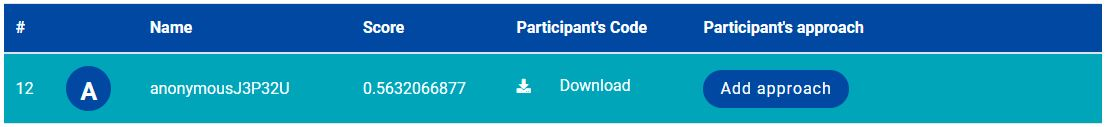

Competition Link: https://datahack.analyticsvidhya.com/contest/job-a-thon-august-2022/#LeaderBoard

Rank Scored: 12 out of 8235 registered participants